# Nodebook - Going multimodal with Google models & APIs

## Prerequisites

### Node.js packages

`sh` function to replace magic command.

In [4]:
var { spawn } = require('child_process');
var sh = (cmd) => {
    $$.async();
    var sp = spawn(cmd, { cwd: process.cwd(), stdio: 'pipe', shell: true, encoding: 'utf-8' });
    sp.stdout.on('data', data => console.log(data.toString()));
    sp.stderr.on('data', data => console.error(data.toString()));
    sp.on('close', () => $$.done());
};

Node.js modules installation
- [esm-hook](https://www.npmjs.com/package/esm-hook) to use ESM modules with zero setup
- [dotenv](https://www.npmjs.com/package/dotenv) to load environment variables from .env file

In [5]:
sh('npm install esm-hook dotenv');


up to date, audited 268 packages in 5s



28 packages are looking for funding

  run `npm fund` for details


5 vulnerabilities (1 low, 4 moderate)

To address issues that do not require attention, run:
  npm audit fix

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.



### Google Cloud access and authentication

- [connect](https://cloud.google.com/vertex-ai/docs/start/cloud-environment) to your environment in the the Google Cloud Console 
- If necessary [activate the VertexAI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com&_ga=2.192934826.129882004.1698758512-1325814304.1691919230)
- Create a [Service Account](https://console.cloud.google.com/projectselector/iam-admin/serviceaccounts/create?supportedpurview=project&_ga=2.259979274.129882004.1698758512-1325814304.1691919230) and an API Key: note the location you selected for execution on Google Cloud
- Install, configure, and launch the [gcloud CLI](https://cloud.google.com/sdk/docs/install)
- Run the `gcloud auth login` command and authenticate from the new opened tab in your browser

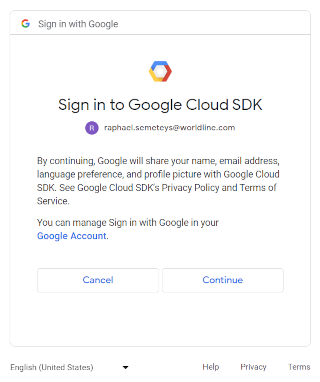

- Finally run the `gcloud auth print-access-token` command to generate an access token
- For security reasons I also stored this token in my *.env* file under the `GOOGLE_ACCESS_TOKEN` entry

I now load the token in my execution context:

In [6]:
var dotenv = require("dotenv");
dotenv.config();

if (process.env.GOOGLE_ACCESS_TOKEN) console.log("Token loaded");

Token loaded


In this tutorial I will stick to simple direct API calls.

## Images

### Image generation

We use the **imagen** model of Google and pass within the URL the information to access the API endpoint: project ID (*fra-ai-testing-noprod*), location (*europe-west1-b*), publisher (*google*) and API (*imagegeneration*).


Promise { <pending> }


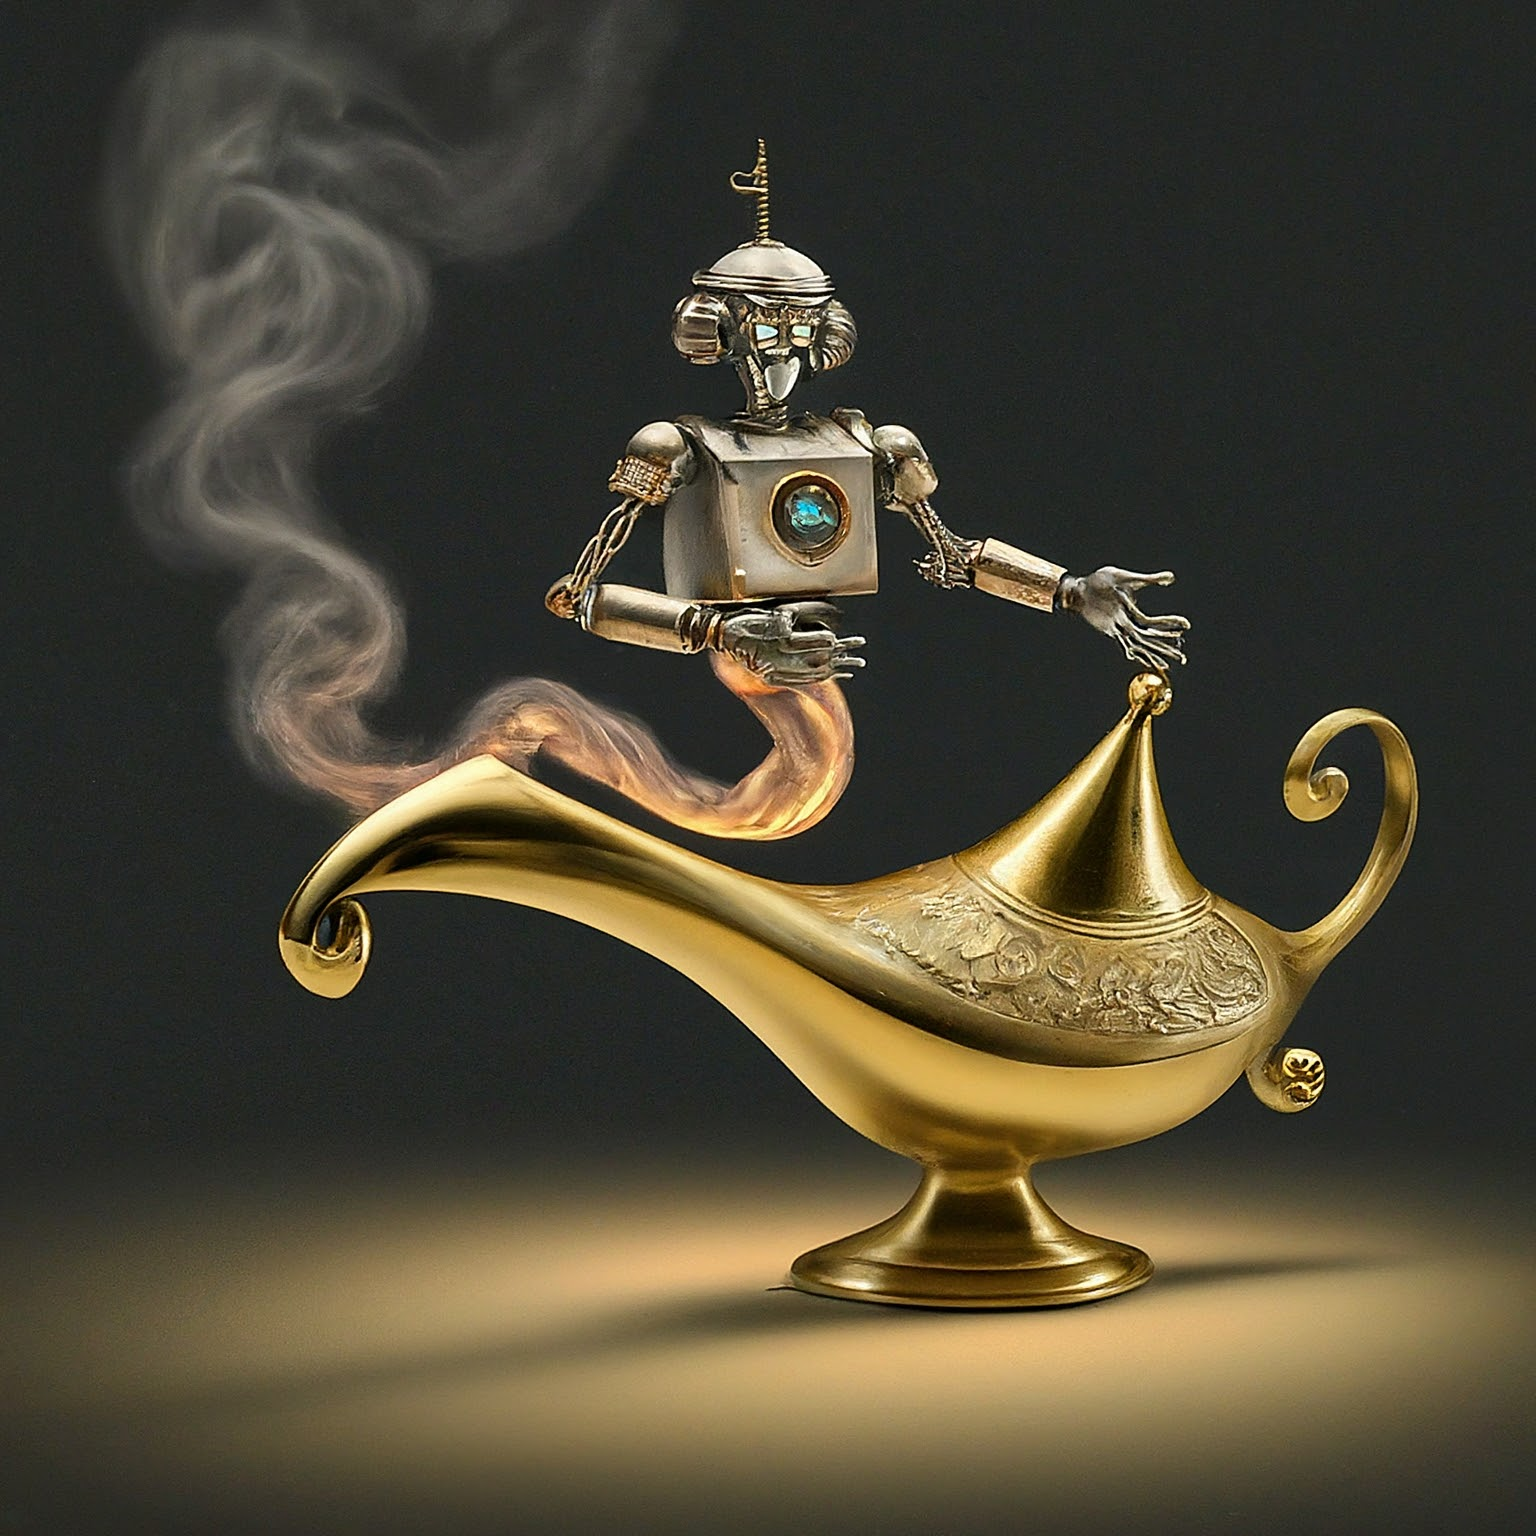

In [7]:
var image = $$.display("image");

fetch("https://us-central1-aiplatform.googleapis.com/v1/projects/fra-ai-testing-noprod/locations/europe-west1-b/publishers/google/models/imagegeneration:predict", {
  method: 'POST',
  headers: { "Authorization": "Bearer " + process.env.GOOGLE_ACCESS_TOKEN },
  body: JSON.stringify({
    "instances": [{
      "prompt": "A robotic genie coming out a magic lamp"
    }],
    "parameters": {
      "sampleCount": 1
    }
  })
})
  .then((response) => response.json())
  .then((json) => image.html("<img src='data:"+ 
                             json.predictions[0].mimeType 
                             +";base64,"+ 
                             json.predictions[0].bytesBase64Encoded 
                             +"' width='400' height='400'>"));

### Image captioning

We will use an image encoded in base64 taken from [Freepik](https://www.freepik.com/free-photo/yoga-group-classes-inside-gym_4757677.htm).


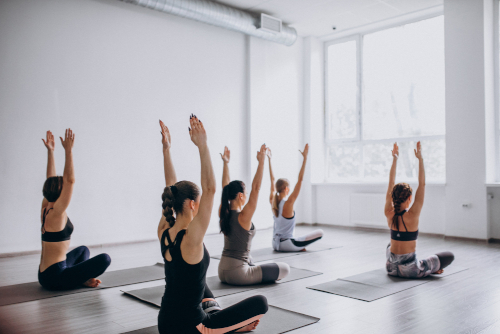

In [8]:
var imgbase64 = "/9j/4AAQSkZJRgABAQEBLAEsAAD/4R5URXhpZgAASUkqAAgAAAAHABIBAwABAAAAAQAAABoBBQABAAAAYgAAABsBBQABAAAAagAAACgBAwABAAAAAgAAADEBAgANAAAAcgAAADIBAgAUAAAAgAAAAGmHBAABAAAAlAAAAKYAAAAsAQAAAQAAACwBAAABAAAAR0lNUCAyLjEwLjI0AAAyMDI0OjAxOjE0IDE0OjUwOjU0AAEAAaADAAEAAAABAAAAAAAAAAgAAAEEAAEAAAAAAQAAAQEEAAEAAACrAAAAAgEDAAMAAAAMAQAAAwEDAAEAAAAGAAAABgEDAAEAAAAGAAAAFQEDAAEAAAADAAAAAQIEAAEAAAASAQAAAgIEAAEAAAA5HQAAAAAAAAgACAAIAP/Y/+AAEEpGSUYAAQEAAAEAAQAA/9sAQwAIBgYHBgUIBwcHCQkICgwUDQwLCwwZEhMPFB0aHx4dGhwcICQuJyAiLCMcHCg3KSwwMTQ0NB8nOT04MjwuMzQy/9sAQwEJCQkMCwwYDQ0YMiEcITIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIy/8AAEQgAqwEAAwEiAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8ArQQDHSr0UHtRDF7VfiiqgGx249KspbjHSpo46spHQIrLbDHSni0B6iripUqpTAzG02JuqCo30WJx90H6jNbaxipBGPSiwHNJogglEsIKMO6mrSvfRDaxWVSed4wa3hEPSjyQeooAy4rmHeTLA8R6Db0q4iQTD5JEkGOh4NTNao3aomsFPQc07isQSaRZzj54whI7is268GQSnfEBnOQVODWwIJoz8kjY9DyKcs00Z5TP0NGgHLHStZ00/wCj3Dso/hkGRQ3ijUrAYurAuB1aM5rs476IjEqkfWnPYWV2pICNnilYLnMad4yt9QlEKQStKRnaq5P5V0Nrew3I+QkHuCMEVzdt4dlsfFrTpbEW/ltiRfu89j710GXQjI5/2hQM0QM04JWdY3c5cx3e1DuwpAPNa4WgCPZSiOpdtMWRWkePDApjJIIHPoe9ADfLo2D0qTIPTJ+lBOOpC/WgBmz15ppRR3/On7g33Q7/AEFKI5yfljVPcmgCLZnopNIVVerKPbrVn7GWP7yZiPQDFSrawJ0jB+vNAGDfIrygjJ+XvWe8Q54re1Yfvk/3aynAoAo+Xh147itDUYQ1zbgj+Kq+0bx9a1L9B9qg4/ioA4iBKvxJVeBeKuxrSAmRasItMQVOopgOValVaRRUiimAqrUgWgDmngUAAWlApQKcBQAm2jbTsUooAZszSGIHtUuKcBQBWa3U9qzdQhaAI8LFG3AZHFbeKo6kuUT/AHhQBOgnQDD7h71KC56xipgOBTwvPFArEB2y/LJEC30oy4lC7uKtYOKrAZuQPcUhhJIYsZycnAxT1WZ+Vjx7mlvEC+Xj+9V6gDPkt5hGXeTp2Bqa0hQwKzDcx5yaluP+Pd/pSWv/AB7R/SgCYUUUUAFFFFAGVqv+tj/3ay3Fauq/6yM+xrLegCD+MfWte/GLmA+9ZJ61sXwzcQ/WgDjYhwKuxjiq0Qq5GKAJkFTKKYgqZV4pgPUVKopiipBQA8daeKaKcKAHCnCkFLQAtLigCnAUAIBTgKAKeBQA3FUtQHyp9RWiFqjqA+59RQBfVeBUypzQi/KPpUtIBu0Yqiv/AB9j6itCqKj/AEv8RQBJe9I/96rVVbz7sf8AvirVAEc/+of6U215tY/pTphmFh7Uyz/49I/90UAT0UUlAC0lICSxHYU6gDM1T70X0NZb1q6r/wAsvx/pWU9AEJ61sX3+thPvWOa2b770P1pgcnEvFW4xxUEY4FWo14pASoKsIOCKiQVOgpgKoxUgFIBTwKAFAp4poFPAoAUCnAUgp46UAGKcBUNvdRXEk0aMd8L7HUjGD/hVmkO1hAKeBXLWXiWVNdu7O/8AKWHzzHCV6qAdoz655Oe3PausWkpJ7DlBx3DFZ+o/eT61pYrO1L7yfWmSaqfcH0p1NX7g+lOoAKpKP9L/ABFXapr/AMfZ+ooAdenCR/74qzniq979yP8A3xU3UA+9ADbg/wCjv9Kba/8AHpGf9kU2bmJwTzTrTH2SLHPyigCYcikXpj0paQDDH3oAROGb60+m7cNn1p1AGbqv/LL8f6VlNWtqvSL8f6VlNQBA1bN7yIT7isc1sXfMcJ9xQBzcQq3GvFVohVxBTAHdYk3MwHYZPU+lZ+ka0LvTJbq6AiMIzIwB27cZyPbH8q0Lq1W7tJIHJUOuNy9VPYj3B5rF8KQpNplwHUYb9xIo6HblScdsjFZyb5lY1io8jvuFhr0s/iiexZg0OXjVRj5WUn+grqlFcF4O01LTxFqMJcubViqk9SCcZ+uP5136iim207hVSTVuwoFOAoApwFaGQAU8CkApwoA5ueU23i1iHChkidgv8QJKc/kPyFdNiuU1dBH4y02X7oki2Mcfe+b+ma6wVnDdmk9VE8x1FJ49eu0lfO2UgZ6lccZ/DFej6TO1zpltK5y7INx9T0NYfi3TIXsm1JV23EO0Ej+Jc4wfpmr/AIVuftOixg9YyV/DrUQXLNruaTlzU0+xuYrM1L7yfWhNYjfXFsEw6tGTuH8LDqD+FGp/fT61qmnsYNNbmqv3B9KWsHxDqz2NvBa2zFbu4ICH0Hc5/wA9a2LaZpoyXADKxU7TwfpS5lew+VpXJqqL/wAfZ+oq3WC97I3ie3s49wVVZ5gR1HReabdhJXNe7GY0/wB8VKSABgj86bMu5B9RUYAZDzjHXNMQ6UqUbkZIpLVgLaMHHSm+Uh6kflQsaheR17+lAFgug6so/Go2lTcCHFMEaEDI/EViaddS3V9qKPu8uKYeX9OVI/NaTaTSKUW032NtrkA/KRinfaU9D+Vc/wCJJ/s8VioZkDzK24dOCDg/z/Ct5RkjA4oT1sJqyTKmpSBxFgEdev4VmNWpqf3Ys47/ANKy2piImrYusmCIj2/lWO1bcozbxfQUwOchHNXUFV4lqylAyTO1SfSua8DyGTTZ2P8AHKXH4k1sazqEWlaPd302fLhiLEDqfQV4Xp/jvXbFRFZTRQx4YhRGD0B9azknzJlxa5Wn1PUvDNwsnjLWMHhpHA98NXdLXmXgVZT4geTYSHjLOxPQ9/1r05ami7pvzLrx5ZJeQ8CnUgpa2MBRTqbS5oA5DxlKbbUdJnH8LP8AzU110EomgjlHRlBrk/HiL9isp3cIscxDMTgAFSSSfwrJg+JujaXZxWp826ePgyQ7SnXsc8n8Me9Yp2mzVq9NHb66ofQL8HtAx/IZrD8DXYcTwZ6gMB9OKki8Tad4l8Oai1hI29bd8xuAGHB9M1g+C7gw68sZ6MSv5ipnJKaKhG8GdZZLF/wmV+g/gRZAMdGIGfzGKvan95PqK4jV/GGneFPFep3d87u7FUWCLBdhtHOM8D3NX/Dfjux8ZySRwWs1vNFyVchgR7EVpDZ+pnPdLyNPxAkMuu6JHtzMzcn/AGcj/wCvW9YuvmXkSjHlznP/AAIBv/Zq4+yuW1b4guxyY7bKKPQLkf8AoWava/4gXwrLqV6U84yCErFnHzEFev0X+VRGWrfmaSi7KPkdfWDbOLjxRdMpytvGsX/Aidx/TFN8O+J4tc0qS9kiNuIxlwegHfmq3hY74Li+YnFzcPKCeu3PH9au92kiOVpNs6hhkYqHYd249O9H2yFlyrhuaDcQMMF6szFyvGRx2xSsPl25AqM3FsP4hSG6tiSS3NAEgXywCXG01heHCLm3vrsAkT3TsM+nGK0L++t49NuWVj8sTkAfQ1zOh+KtB0nTrexur6KO7bloieRnp/Ks2/eRpFe42bHiEI/h+5LoD5a5UkdCOlaGmy+fpttLn70anPqcVk6/d2knhm88mQkFeCfXOCP6VY0G9t00O0Dkhtnp7mnf3/kFvcv5lzU+kI78/wBKzGNXr66hn8sRNkjOeKoNVmZGa3iM2kX+6P5VhZ9a0W1exECJ9oXcoAOQeP0oAzYhVhaZGvFTKKYHN+PLb7X4Nv4RL5bMF2k9yGBA/GvCNG0u7vNUSN4mSKM7pSwwNvcfj0r274kTGDwuqjrJcIgHqTnFcRZb1cIeWkIyo6LxjGa561Rx0R00aSnqzuPAttk3VzjjhB/Ou2WszQrOGx0uOCFgWU5kI/vH/IrVWrpR5YIzrS5ptj6WgCnAVqZCCinAYFNoA8c+MF/dJrNhb+WPs8cJkUk/eZjg/kAPzrymzimnuBbwAu7N8q5r074zxINYs5/KZz5Gxju+UHcSB7HGa5m00F7DXvtEDJJbYDoUbcNrIGHPtnH4VnKaimyowc5JGz4Dg1DSLy6lukKReQ/yk5D/AMOOPeu58GWHm66k7E/ugX+vGB/OsiZfK0+3UD7/AMwOOdpJJ/UV2HgyAhbq4AzhAo/z+FckJOpNNnbOEaUGos8R+IH2jVfiDrTQRNIYpQpx/CFwn4c4/Ou7+HGkwaL5t++5ZVt287J4wOc9Pwry+71CX/hJry6l3NM9025Txn5iefxAr0e01/8AtDTLe0t7UwIw3XD5z5h6YHtxmt605Rs1sYYeEJNrqdt4AhaWW+1CUAySEAn3JJNZXxBvYRNeWtxbFlmkiiV1bByEJBH/AAJh+orsfCenmw0OPdw0x8zHoO1c18RbCebUdHnhTennqHUDpg53UKD5EhymvaNlJH/s/RbfQLB1kurpR5oX+AE52n3Oef8A69drp9stlZJar0jQL9T3rznwxfJ/wlDNMyiZpSqxscNknHT2Bz+Feko2C1FFbv5BiHsvmLbKPKx7mpSoNQwN8n41NuroOYjkQHjkfSoTAM/fb9KnY/N+FRk0AZPiAm30O5dGJJAXn0J5/SvnjUHn/t2cHf8AaBM23HXOe1e++Mkmk0LEIJAkBfHYYP8AXFeKvPM3i6SSBPNbKoSTwOBn+R/GueUrTfodMIXpr1O2tVvNP8D6fZ3DnfPO8hTOdqDoPpkg16Fp8W3S7Ud/KX+VcJayy65rcUZj2QLiONB/Ag/r3r0bAUBVGABgClRfM3IeISilEZtC5qNqlc8CqtxGJlAJYYOeDiuk5RSa5C7Ei6pPjBTcT9DmuqVdi4ycVzl4R9vm/wB6pYzsEFTqKijB9KnAPpVCON+JPlr4chaUYRbqNi390AE5/SuEsNY0i2njkn1GARBgSVbccfQc13vxKsE1Dwr5MrlF89WyvXoa8is/BcE86q+oPgnoIsH881zVlBv3mdNGVRR9xXPQ/BHiq41zx5qf2dH+wSx78MOFVcBT7E5/X2r1EVxXhXR9G8GaXcTm6MSShTJJcOO2fYeta2neMdD1SaSKyuzM6DJAjYZHqMjkVvFpxutjCSadpbnRinis1NUjb7kMp+q4qQX8h+7bN+JpisX6aap/abtvuwxr9TmgPeN1dF+i0BY8b8a3Catrc1lOVEtzMy2+7+ErkBj6DAx71WFzYeH47PTXmLSthQFXLH3PoM1B8QDBp3jPUWk3G4RIZrUhcgHduYewOTWVoMq614nutTkHKR5VCehPH6c1yVKbs+bb9TphUXMlHf8AQ9ARfPj5JIA4z2r0Hw1brY6InmOqvLlzk9u1cBpQaSWJCMKzgGvSbOWC6s4biAARyICuO3tRhoq9x4iTSsfL2v2k9p4svYplYEzuVY/xKScN+IrpfDOpQxTx210Sq7vkcDPU9DWz8XDE3iaEDaXS3UE9xy3FcpoUAudVtYT0eRR0966KkVNWZz0pOnK6Ponw9qc15o8ctxbvHKHZNnGQoJ25564xVLxTO3lQArsHzYJPOeK2LGGGysYYUCoqqPbnvXJ+Pp4pIIo/NQfu3KEgMN3rWkdyGVdDgkuNRBiChlB+cj2P6Vsrpetxys/9pI4P8JiAAribK+v7Gz83SLyOa+QhgkwULKO6+2frU9nrHjbxHdG1FlZ2CqMyPLNv2g9wqnJpy1BM6y3ttYhDL9vtp3ByV2YIH4GpvO1ZPvwRP/u5FP0LQ10jdNcXs13dOuHkfCoPZVHA/U+9boMbjIOR6jmpsO5y9zquowoT9gGf9/8A+tVL/hJrpD+8sG/4CM12bQoe36VXe1ibqin6iiwXOTuPEEd9aTWslrNH5iFdxXgH868bgns4NTu5Vu1UsAy5yMOCSR0r6CvILe2tnmMG8joqgZJPAFeF3vhyylu5o47m4WIy7tgYFcnuOKxq8q+JnRR538C2Oq8Ka1pr6xbn7bGXfOFH0PX0r0P7fascLcxE+zivPfBHhHT4NQmlHnSukXBcjAyR7V1s/hm2lziHH406SSj7uxNeUnL39zXaZWUFSD9KrtJXPzeFZI+ba4mhHcI5GapSaHrsXMWo3BH+02f51pdmNkdSZB61y99PjUZfrVZ4vE8B/wCPkOP9pAa52/j8Rm+ebzAoP8Pl8Umx2O8ibWJcF74qO4Cir0dpcucy3kre2+ooHGBgVfRjQkNs5rxnGLfSYI1YlnmyckkkBT/UiuTs73S9PuYm1C8WIAg7QCzfkOasfFTWLqwurBIQuHhkAZhnByOR+leTea5lMrMWfOSSckms5UeeV3sXHEckbLc7TxxrMmsaxMyTTmwjCC3ifjHyjPHqTn3qv4U8U2/hq5a+mge4nAISJGwPu4GT2H51y813cXJzNM79OCeOOBTI43lcLGpYn0rpukrLY5W23fqd8vxV8Q3OrxSmaKC23/6iOIFcZ7k5J/OverOZp7OGZ4zG0iKxQ9VJGcV4h4J8FyWd7DrGqCFxEd0VuGDguO7EccdcA9cZ9K9PfXLpj8rKg/2V/wAc1LkuhcVJbnU/hTXdUQuzKqgZJJwAK5J9Ru5TkzyD6NioTKwYGWQAnu7daVyrHK/EKXQ21mLUpLlJoru0e1kMRDFGHIOBzyCR+ArzbwvqkWlatvuCRDIhRm/u8gg/pXd/FS3VdKsZRGFbziMiMjcCPXGD0ryk9alwUk79Rc7jJW6HtUPiLR9OhW5kvoHCjcqRyBmc9gAK2/hnf6heeHrkjyyiXb7BJkYBAYgH8a+fYRmVR719H+EJLPSfB1jb7m82SLzHCr/E3PX8cfhSp01TRc6rqM858WxDWNfu7wygF5MA4yMDgY/KrHhPSPs2pJNPGssKfMzKR8ijkkg8/lWJc3jC7kSQ42uVK+hFdJ4e8Qf2ak3klVd0Khu4PrUpvqVZdD1VCk8C3Ky5hYZDFgB+ZrN1HSdH1qWGO5+zXLjOxTLyPXpXl/iXWZ7q0mee7YkEFFDcLyOlY3h2a4u9dsUt533CVWOG6AHn/CtU7q5m1Z2PZ4fBeiQkBdOiX0OKvWnh3TrCQvbWUUbnq6qAT+VR2IuLe1CXU2WLZTccEe1X0kuWOUEhwehAGfzoDYv26beCo/KrQWq0Hn7j5ixhccbSc1O9xFCB5sipn1NAhxQ1C0ZNIb+BhmNhIPVelVpdQ4O0qv6mgCj4jlWz0O4ndtoXGDnvkV4rezwaej7ZGuJA+RhWJI7dK9Q8YNNfeG7uDDSlgCoQgHIII7e1ePJrc9jfyMtpLGpQIVPJJGeT+dKUU90XGTjs7HoHgTVbr+0LiW9tTa2xtyUVvvttOScdelbU/j2zmtmfT7eSVd2wuWAwenHWvK4tfvTem4SC4B2lQ4hYgZGOmMH6VJaajJjyY7WeB5X3PK8RKnnONoxgVSsloK93ds0E8V+LbzxC1hbzNLOsxjAUHBweuOwr2mJGaFPNA37Rux0z3rnPBum2thYyTx7Zrm4kMjzNHsY5xwc8+/411GWbqQB6AUIT3ImtkI+6KqS2ELHmMEn1FaQX608IPSmI8OPinUiMJKE/3VFVpdb1KUHdeTkegYgVLaaUZQN0yL9Fz/hW7a+H7NsGWSV/bIUfyrBM6Gkee60s+oxqrZYqchm6isJdHvGfaqgk9Oa9jvtH023CmK3Hvuy2fzNV4UiU7YowPZcCqUrGThfU83tPBmqXJG5PLX1YGui0/wABzQYLXYU9SpAx/Wu0SBtobYKjfzU+6B9cUN3JSs7o0NA0KdbQQx3duI1YliYyzEnvkEVs3en2OmWr3d3czGNBlgqjp7DBP61k6LdzRT7W6E9AMCurJEkeGGQaaSsOTbd2c1Ya/wCHLtG+wx/asfeWWQ5H1VskflVxfEMUC7YLW3hHYKOn5YqHUvBej6jJ5xgMFwPuzQEo6n1BFYVz4d8RaXJvtJoNUgBzsuFCSY9Aw4/MGnqIwvitrj3ukWNo8gJaYybQoHAGM/rXk5NdN45vnvfEBElu9u8MSxtE5BKnqeR161zNUjN7ktsGNxGE+8WGK9d8Kat/bVk9gkqpNbAhSx5ZM4/SvLNGWJ9UhExIXPAHc9h+eK9S8L66LJYf7TOlWu45SOcKHHGPlVVJxn8aTKgkQS/DoXdy8q3rbnO5vKUnn8DU0fwvn7ajMo/2sD/69bmv/EjRNLZlhuPtk3aOA5Ucd26flmvNNc+Ies6wWjjlNpbHpHCcEj3bqf5e1FgbSOuPw20prkQXOtb5T0iMoDH8Cf6V0eheB9N0C8FzbeaJsY3bz0/CvCre7miuUlDtuDZ619FaVq0r6VZyXNnL88SEuhDH7o5IOD/Oi1gTTN61Cx/dUL9BirkjTMn7h0RvV13f1FZdtqNhM6olygcnAR/kYn6HBrVQflTGUJm1gZzAJF7eTKMn8G2j9aqSSXiDLxyRjuXQgD8eldJGKtqABSA4hkaf5mQP/tdaclvJnhmH1Of511txZW0+TJAhYjG7GG/PrVQaTAjAq8wQdUMhIP4nn9aAMQ2qsuJnBB7HvUf2G0ibMdoob+8y7f8A69dKIYYEPlxqvGCe5+p71iXzHefl/OmAW1qkp+bGPRRirB06BSSIwM+g60yyfnDEZ9K0WIxQBSWIRcKMD2qUEL7USnHtVYyE8YP1pgW1kBP+FXYV3VnwKSwz0rUtxjFJiPnex1EjHzCuis78YHzGvP7NmwOa6GykcsBuNc+x2bo6a6uN6DjP14qGJmZwcj8s1S3HA5qVXYY5NO5NjpbWPdGAzk/kKle2h5yf1rOsGZvvEkVpxcrVoxkrMLaJI5QVUg+wxW5FJhBkYrFjdt4Gabqd1NbWReKQqw74BqiTofMA/iqCa+toP9dcRRn0dwDXk9xrWp3JPm3sxHorbR+QqG3mk8z7x60uYLHEeJbg3PibVJS+/ddSfN6jccVlVo+IABr95jvJk/UjJrNq0ZM1ND0i+1i+8qxi3NGu92Jwqgeppmo3d69y8d1ujlT5GXpx6H1qbw1dT2niCzaCVkMkgjfH8Sk8g17MYkLnKKfqPpWFSs4StY66GGVWF07M8Ps9Mv8AUGAtLSefJxlEJAPuegrqtP8AAEq4k1m9jtEwCYIzvlI/DgfXmr/jfWdRsbyC1tLt4IXQ7hHhSencc/rWZoc8t5c+TPK7RnkgNtyfXiq5pyV1oTyUoT5ZXdju/C+gaITL5OixmGLbi4usSO79+CMDHtxXZ59Kz9LRYrCOOMBVA6Cp7l2jtZXU4ZVyDVRVlqTNpvRWRLJHFMu2RFYe4zUFvB5bAaZPdIQSQlu25M+4Pyj8auaHbRXtglxcoJpG67zkf989P0roEUKoCgADsKogj0gagkLDUJUkbI2YQBsf7WDj8q2UJIqnHVxOlACvnHWoSakaojQAyU8Guevt284OK35elYV380xB6U0AlllTyRn2Fam/K1mW/BwOBVxSdtAhJT61D1bnNPlJ5qnI7AgA9qaA04ZAO4rSt23YI6etY1oAZCCMgYrai4oYH//ZAP/hDHVodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0i77u/IiBpZD0iVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkIj8+IDx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDQuNC4wLUV4aXYyIj4gPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4gPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0RXZ0PSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VFdmVudCMiIHhtbG5zOmRjPSJodHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyIgeG1sbnM6R0lNUD0iaHR0cDovL3d3dy5naW1wLm9yZy94bXAvIiB4bWxuczp4bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iIHhtcE1NOkRvY3VtZW50SUQ9ImdpbXA6ZG9jaWQ6Z2ltcDo4M2YzYzYyMS1iNGI0LTQ4MmEtYjM3Zi1iNDhiNTgwMmVhMDAiIHhtcE1NOkluc3RhbmNlSUQ9InhtcC5paWQ6YjgzY2MwZjMtODFkYy00MDI4LTljODAtNGM5MWYyYjBhZTc1IiB4bXBNTTpPcmlnaW5hbERvY3VtZW50SUQ9InhtcC5kaWQ6YWMyYWFjM2YtNTg4Ny00NGM5LTg1ZjAtYmI5NDc4N2JiYzAzIiBkYzpGb3JtYXQ9ImltYWdlL2pwZWciIEdJTVA6QVBJPSIyLjAiIEdJTVA6UGxhdGZvcm09IldpbmRvd3MiIEdJTVA6VGltZVN0YW1wPSIxNzA1MjQwMjU2MTI2OTY3IiBHSU1QOlZlcnNpb249IjIuMTAuMjQiIHhtcDpDcmVhdG9yVG9vbD0iR0lNUCAyLjEwIj4gPHhtcE1NOkhpc3Rvcnk+IDxyZGY6U2VxPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0ic2F2ZWQiIHN0RXZ0OmNoYW5nZWQ9Ii8iIHN0RXZ0Omluc3RhbmNlSUQ9InhtcC5paWQ6NjA1ODU1YzUtOGQxZS00MTdiLWI4M2YtZjk1Yjg0Y2MyMWM5IiBzdEV2dDpzb2Z0d2FyZUFnZW50PSJHaW1wIDIuMTAgKFdpbmRvd3MpIiBzdEV2dDp3aGVuPSIyMDI0LTAxLTE0VDE0OjUwOjU2Ii8+IDwvcmRmOlNlcT4gPC94bXBNTTpIaXN0b3J5PiA8L3JkZjpEZXNjcmlwdGlvbj4gPC9yZGY6UkRGPiA8L3g6eG1wbWV0YT4gICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICA8P3hwYWNrZXQgZW5kPSJ3Ij8+/+ICsElDQ19QUk9GSUxFAAEBAAACoGxjbXMEMAAAbW50clJHQiBYWVogB+gAAQANABcAHQAKYWNzcE1TRlQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPbWAAEAAAAA0y1sY21zAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANZGVzYwAAASAAAABAY3BydAAAAWAAAAA2d3RwdAAAAZgAAAAUY2hhZAAAAawAAAAsclhZWgAAAdgAAAAUYlhZWgAAAewAAAAUZ1hZWgAAAgAAAAAUclRSQwAAAhQAAAAgZ1RSQwAAAhQAAAAgYlRSQwAAAhQAAAAgY2hybQAAAjQAAAAkZG1uZAAAAlgAAAAkZG1kZAAAAnwAAAAkbWx1YwAAAAAAAAABAAAADGVuVVMAAAAkAAAAHABHAEkATQBQACAAYgB1AGkAbAB0AC0AaQBuACAAcwBSAEcAQm1sdWMAAAAAAAAAAQAAAAxlblVTAAAAGgAAABwAUAB1AGIAbABpAGMAIABEAG8AbQBhAGkAbgAAWFlaIAAAAAAAAPbWAAEAAAAA0y1zZjMyAAAAAAABDEIAAAXe///zJQAAB5MAAP2Q///7of///aIAAAPcAADAblhZWiAAAAAAAABvoAAAOPUAAAOQWFlaIAAAAAAAACSfAAAPhAAAtsRYWVogAAAAAAAAYpcAALeHAAAY2XBhcmEAAAAAAAMAAAACZmYAAPKnAAANWQAAE9AAAApbY2hybQAAAAAAAwAAAACj1wAAVHwAAEzNAACZmgAAJmcAAA9cbWx1YwAAAAAAAAABAAAADGVuVVMAAAAIAAAAHABHAEkATQBQbWx1YwAAAAAAAAABAAAADGVuVVMAAAAIAAAAHABzAFIARwBC/9sAQwABAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEB/9sAQwEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEB/8IAEQgBTgH0AwERAAIRAQMRAf/EAB4AAAAGAwEBAAAAAAAAAAAAAAMEBQYHCAECCQAK/8QAHAEBAAIDAQEBAAAAAAAAAAAAAAECAwQGBQcI/9oADAMBAAIQAxAAAAGNslnKquSWrQtTVUFSYO2GoDS3NRNgnRKZBuwR5SfnwP8AzVdVqKAfkDEEcd2RSY1x2iXDlRaZHraJzyVlzLDikszB0OA6d07o2idzMPS2h6XqBDxuaoLnk4PAKN5MiIYMSnyJJJQkmCWKGOlAq53FcuTC6qtoVblOR4OhsHDRtYLIYBgTgSEeKpqFG9Hnkq8MlTclCIUIkpSzHrMY0mE8WSE8ORvxkn21LLZccv5KvC8nUixIst6MgkNzc0Mmp4yeQUlseAZqWGnEtCJTUEUpyZHQVg5DnXhyuK8Lgui5koqCmHg8GrDUjMhwwGAcENwMCQSgmqp6AbVUL1VrVXJq5osvVukDEqqvjR9S95cozAvWZCmV+bD1CQ2NjJseMhdGZYgFaCIUmDcFmJX4sx5RVAghOE5MmhNDqhzoplcaq6Lt4WphUFEPSOWGgxI4GQyGQYFBTYyZNQNACpJJBVLV0tVUvRzyedLtqJgOEwLodSHWHlMy7XIKbGRnzRzLYNzSYCA0DpNQWYlVT48YI6mIvknhGskZSdEFby5qxzxxZHGovWLNiyKYeFDINhkNBwMhgMAwKCAhsCHjxugJGoEqAFRMIrmklWq8pLkT6o/FsLEItrBUSIr4LJT5hNmF2svmtlBPjB4yeNDJH0ovtCeEEkSUKwFY4Kxz+xZXNaqzaFkWBRkfuOhoNBoOhgNAwMbm4ICG543MmTJ5HjCAyI4iQBfllBuXlN6yYjKRmq9W7FvjeNZW4lRiW7ap2JcsW8ZMHjxgyYGBKLrwRCARTJ1W01NRFGsOdy3osSVkKwo5CgHA2GgyHAyGAUGNwUENzJsbmxk2NzYyaEWxR/TZypHgJUahuIlqk5PWlo6vSXKX8ZGjah6JcEWwePGDxkwYGDaIwsIoIJJJk2sDTClKi+DI5LQsSVkKlihYfDIfDQYDYOGAcEBAU3NzJkEMm5sbgpk1Iyir7S4pkzRvA0DjZtUvMSLS8V3pK1L+MjTtQ4lfrbxg8ZMHjxgYsosuJKkEFFpKqN2hYKMYsq9NVtCvJRsPyPBoOBsMBsGDIMCAgKbmxsZNjc3NwQENjBGUQ/IOWJOQNB0EGRaoM1kOmSL70k6l9jA1r1HiHFW/jx41MmDJ4Y8xFV5JKJ6Si0kVhSsNq0nxZV2S2hWmFK4+HA2HA2DhoGDAKCAoMZNjc2NjYEBQQFNjxF0VkOsumJPhoFMjHtUvMSBS8YXpJtL5PDTvUaIctb5PHjB48eMDLlFFxNRPSUWkSsLVhWaVAxZ1tCyqr2lQtB8OhoNhoNAwMGAQGBAU2NgQENjYEBQUGNzxFaskUl2xJ03PGRk2qBMPyl41yUknHfJ4a1q6oddb4PGDwWmpqLYMjMlE14JIJBNMgVL8k+1KmYsi2sr2qq2KAoCkGQUNBoFBgYGBgQ3BTcGNjc2BAcGBoCw0IotWTqS7IkcyYPDMtXSYe1Lxvekj0vkwN21QxzVt40Mmwm3xqNMmTwzpRLcRQUQSS/qnJJLtSqmLMtoVrwpSURSD4dNgyGQYGBgYGNgUFBTc2BAQEDAPAxRuBkR5IlGh3RPjx48My1dZh60vGs1kitsy8M/JQ1WXJW2DIBMGIlJyYlfHl8eGfKJLiITCY/Kw65IGTHWXBsLMwqXKYoKnw8KBuDBgGBQYGBQQGBQUEBAQ3BAzAegwbAJD+SJTpDsi3jx4wM+1cTDypeMIiTJksjZLUvRQiV6tsgoVDQk3xKtMmU+GfKJLiYRCY+Ih5iHataMWZUvCpMKoooPBwPAoODggMDAoKCAoYPBgHBSM6Z4Y8v27e+rzpmowZAiG8lZTodcW8ZMGRnWrsh3VvG81kCLAoLTVuXhXrLirfQ2Cs1NxYnahytspwNKUR3EkE0kh6xD3QhXrWzFsLF6K4poPBwOBw3DAaBQUFBQQ3BgwJdbV05rtrWdPw+5Dvmezz5+ffTOh/dfOpu9bnzJuAENZKyjSXXE+PGTwz7VEmHZS8eXo+q2EgQtDctVSiXLS+DIAgUynxk8NOUQXFEEgol4xD8mG/atc8eVasVkKobG9r7bI8v3p09zluffJd/fXpuKdOfVHBQU3BTcHBTxQHhfpd4+v4F07elW/yvZoHwH0e3Hv89ejseAOmwXIYyRKVDqifHjx4aFqiTDspdhXo+KXKIEEPJHohzUvseCiC4EgCYVYtka0ojvJYKhMdkRIUww70hKmZeWV1FAOlb/C6ePuY7aauy+c87uJ7/qV2fCTF6viDgoKbm4KDAh457cf3lx/c5mTvU8ls4c3MH5/9BnH1NHoR13DGzcLkK5EpVh1VnRAqfHho2rqPCtmheq5AvMFJJEwZrKiYCskul8Xx7wY+t6EgbOgZgmRaMryAFQoOqKyVMtS1K/1yrotoPB0ivU3II5Pu7b9n875Q/PPqXYX6B8yXs+uODApuCghuCnjnRyXZXr9/nHtvaG5BXl+rTnjew6ifQPnqjakLeT0E1etz8I5IlGqDfB6Vw5qT763PYMjDia7c511xuk5Bu2rtWRLRiHpgBJ6tsI0iaV8V9JtT23zHGHbq1zvX3E6fhziyRMxHkFwoFR0xEpjWvSvNc68hZQoIPidWaOcX3fQPtuD5YfPvpXVru/nanmwjg4MZNwQGBDBRjlOusn6vjS563lDBOk8mvnX0PqD2/FJUxXzmuxu/wBjwEJZIk2rmR86+qXx7Lg509HyMmSGtTdjnzfWtX7vOJ8wjTQ5EjpADYRhukaJozy/a3F6viPa+xR7l+wv31vEG4INpiPILhUKjliJfg18uOuGPZcMwsqqQcQ18WSjfA/Sejn0P5lyH+dfT+ufcfP3Bu6A4YBzY2NgUGMFGuX6l7zNsun5UUEhyY+fd7evoufm72fErHzvT3A6XloRyJMiKMcL9Dtn0/GzH6Hn5PEF6HojInDf88AR5rkMxO4KkkrpLFMlQeb6u1/TciFMUu5Xsbu9Rx5msJdrRFlFwkFh0xEz1NTNSuWPYcUlZRRWNKxVqbVSeA+l3v8Aovy7jV81+q9ou4+fPr1/GMBkFMmTcEBDBS/nejjLxfb6Pd3wI0hTkH87+g2o9XzLW9DzVYuY6u7fY8XDeQ86Tzs+e/S7u9XxUv8Ao+cq5cOxRXkeztj1vHPya6AAnzUKIxI4krBRTCPlexHXn+paDpeTSLUoRxf0G+XW8K5MmNBTEuUVCYEOuImipq56V8x7C4g6KKR1ao69uFutZzano254H6j197r51KHQc4cBgQ2NzJubGCsHi+3Vbi+3sP8AQPnRmJtpt6nJT519FkbLW7vXcZUTmupRu7+b2px+g1/E9yH+e6i8vXcNWbz/AEmdkr0M9nwuePF97evuPnrtpckGzB5AZiWE4RWzwOlFRNXqeMp7mlzu4X6ReLseCfGzqt1MT2ksEwMeCJYqbuXFAlNpeQdQeTsrxt1Y5yzglrxeovjwn03rl9R+Pre7onQcyCmAU8ZMFD9Dc5B69Yy2dUO9eqfme+8OX6dl+f6/Qn6T8u+Yza8Vtbej2T8vrJ05jrZNyYbO+7zPJTmOxizT9nr50vD1m8fo7u9x85YaXWYkDEhCXIlIKG8K8cf2/JDb84HYw9fMuGt/Id3e7v8A5oPsaoUSoTBcJgI2KzA+KxlFjM8raDiDad08j9SOTu15V1eF+m3f8TrOn31T42ZtU4GzJuYBDJkDOAGvFGb6iPsaq/g3LoeH1luuO7GWNvWfH0T5f83mz5Vl+V+gdred7OtOGelHY8EUrHOrm+plPFvM7T3Ll9586ln1fFaQ7zydQuEAmBGxRH5z9S4pdz84Hps9g/H6WF+S67rD9S+OF749DwRCoClrVUx1ruuV0NqquqbDa+6OS/Ed5XPV3bKeD7lsOn5m5/cfPhw4GDIKagh4wFzgVipQy+mEdQPkn6GnXXzs3a566XT8zX3quM4x5tXot8j+53Y9Txql+Z73Zb6p8VbeHPw/5brbCejR6c30F8vpvyVTG2l1mx4LhIANKt5c3Pl/1zmF2/AznyP0LoPs+dF+hudHvp3yQuaieJMGPQ5b2R4isGtc9C5G5RTQakahtLhbyfYqnL9VMGrs9U/o/wAydPr+QNA0Dm4Kbm5oBgJw48rdrffGwvP9HoJwP0+S9TcS/U8ToD2nFcovT8TmRv8AlXq8HqZe4X6XaTb0Om30r5KHDhF4PUbeH2Vp66N1foPzNREEdCBE4AgoAgdG8uSfyb7tQfuPmsvYN2ZeQ7a9vTcVZ7s+FLnhMCIhAgkVms2pc3K5W5jUQ4GrMHCjkuzdXHdrY++OV+8+cXg97wjVhigwCAxubgZoJtZ4scB3NC+04a/3yr66/dH0l31PFI5cnUX6H845C+j5HIvN5tiPB666fzH7L01735harqOR2KLejjq9i3XjfDbTzZWL1QYSDkhQmNzQLQ8Zh4pnxP0biZ7PiWz476DKnm73Rj6H8nkP3+dBNRKCIUAEodVYdPKdtW7W5jUrSdmDENZcTuL7la5Dr5d9bxecn0b5R9COTcmK9DFBsHNwU8agJCHlepx24fth8+q7fM9N34skqZauDewdOvo3zPkBbDxXzedMep6tr+G+k3i6Ll+lfuc+TmKc+tqwXfJO81VOd39ZIIrBAFSXiWBTIgxc0hwTVC0PY5O6PrzfzfXTH5u50E+nfIJJ9HyS0wHBJgnQLJAWRKxVHVzHIr0D9DCohwHlpL5sqaNW8mIe2O4WPb+jVuGwzAyGgcEPAQViYV8v1Pnmw61puS7agHe/OumHy/65OebFajq+WnjquVZ0T80+tGLw58efsPj3eh+55ZuHM72NeBrTd+mKxOpsRJp+rU7DkvRs+XIUwUEwbFZbMShQQaWjyM/Cbd8lhX0l+dnst5XtqWtmRFtpg5aos1Wr0Wr1NK05w2Xa26q+nqqwdVHPHHPjOvhLzvVnbX2umfu+K5+u42HdjFLujugxBu05tHoBzGEnZoozX52vJywPu+fLni+/engvpL62da7vecPP3u8+TPmo83Zjjb1pCw7P0K5k4ZNbJy79fViHUzD3wU4jWsXr7HUyM06VzHDyPJJhMJBcg7S9Hl980+vo+TXmJHSr6j8cbiiBU26ZI8rLEx2ZlcjGx5GrW8CZ9Mot2pyZQ4kGreLqlo5r8d1zQ8TorH6+ZV+mfLOSfU8W6fQzd8vA99i49eTsmWbMUm0CI2RkCPnb8/JWfLrSJ43udFfnf0uRtvGzfoHz3qJ7nixVjfO5rXIZsdh9be7i7uqdz4CcxzvreP1ZPuV8Wa12O86ZddxQMIV4trIuJ6CqCpUbV9XmhxH0J24diaPZ8LqH2Pz/AHI6Xri2H+wzrOFIsR0oFTJg3KIv8z2H5kwP7Nrui8L015AcB3rl8X3pQ6TnKO/T/ltcY1njeXxp3rk1727299AnjeoaRueNhrVnl7pZ+b2uhz0vK6t/K/r00ZI55/TflnYTZvHfl+jzu0N1N29axc26cen5z0yYMyQosqRB643AORyIdtSrWRYYC8iVoKBcovj3KOK1ez+e/djF2jx7tf8AHtV5pk5k38norXJ2NvcRGtxKSahOmtffM3nNei3eqmiN6OUvE9tS3s+BN9D4bwy3ifzbkqNpgWadya+p0H1txKghVlvVJMTH8TQfLpc0tnzS0X2rcZM95afTVh9bmz4fsU4187itk6Jbmo3b4q/TWsvreU8YydTdHfmza0TcQYk7xUgfqNw1AAvJKmG9eOPWLar1W086+81N3Wfd6RPl03zp+2qx5vW/b1FSBZIkzmYEmm8KZ+Z6Lpy4lyaqN61onX4DZ/PBNpjETlGZh9au/wBKIy3Vx7JGI9DeW6Dlgi1Sc2lyC2PLLRfCRpp0GjZ7T6/o8xfO3ai0u7YzT5h2y9LRXtaNavf5uX8G72O0vWmXd8tPVWJOBD4iXBSUMDtVFtCJYhzCEc8NfPzbnCcjKh7Og5sXomprOmvtdeM2CWsuE+kdA4YVHQOjmN4/vFpo17VacUjScXND1PARk5MzG6q9g2bBcr9L6O7GtIfs8irWq4ph53h1zVfkpzFKbYOCubzQotqkWa3urs9KNP0qNVilmXVHXX8eY5EtHNpquXF0Qx73SW93Vaj9gTgHaESCFNUGTXiE2J8gxYfk2ItGy6/c4bQtRAdZUJl9zDqDsDyu6DsQrwP1j5rOf64WYzbEHfC3ra8W7nlNvJhNWrJ1Mk5UyzVTLIlckoZa2k2sLpmtGcMqNLLVZQazrCmmzpcwdnRDTqkVSaZt0y1fVnjHmRZOyaq8y4pF0vi9B5hxDsmrgEdSOlECBVKRFliYGkYkp2LszssUmUuJXVZFimwSuIy9Ema2xeMivFXRjOXFk+ZzwuuUVV6aPjJquDJgbMQt2wvy+NwKj2jMVCrkkLLS023hXslIbw3ohGKNMdnTW9opvyE3fGr1emicJUJxXX5/t777OO6m/wCORiWdW3PrJrUEzaKHaveTD6ligYVhdVULVValQW8eQwhiIZFjNscA7KyvSjfLZjrOZikjHU8ExNuRpaWknaVNV1VOrFLkxX+ezn+wl7JrSdm1ntlw7WiC9bYRL4lScb2y63rYUGLI0SvXrZzaxyveoqRLQQiKwUVKx15dbnlNqZ0T4c00tNh3LB4d62WZTGNWhebRaN8O8wMdVtb2Lu4dhx2iT7RId6Kc1VIhWiVulzBgIgIEAiFeIgySxVnapJVKKwUEe0INpSrDVjgHhQ5sMuKl/nG53uJOtgkHJrvrJrHL441w5062JbtSTNjScGfXTAjAxZMOWsjWg3aBjICis84/nby+WWW1T4GmljoyRbBnTQojZBq0Wu8np7vaXsXF9nml5AIz4lBrdyTWSJWdy4l7Hc8eE4KmoCN/IiG6Pl1euKVIq4woI9iNaCdx6Zc8HBU48UruK/y9eF2klUvJLG/8mst5MDTpkzMO6+KXdnRduxp5tVPAh43h6zCkCy1Q1q3pbOvxF2fNDWwjMTNGj60kanp1U9rk8pk/U9K2/i9TZ7xetY+v7FxOs+byR6fOaoDTsINiySFkpPVS5jupmQgEwILyb10VXhiJXlH5Sq4nUTJhFyCtx5KoL8Hdil0Yb/Jt5HTSHj2ZFxbEiTgccUzaDsyqXwv/AC6kgbOgt5MJm9NFnBNTsq4Y8sUViMscp9bH8mHl/wCj5O018Zk+dT0exXy39BC5NdVz4qRdV85hT0PFmDT9i3ufDb71OdwhOgzZtMdqyxejgkqKrEF/Hc6BBELGoTuQJRfkhm1KkQ7oqrGyEyxGtCbeQrQuryZSHVhlax3/AP/EADMQAAAGAQMCBAUEAwEAAwAAAAABAgMEBQYHERIQExQhIjEVIDIzNBYjJDAIJTVBF0JD/9oACAEBAAEFAmWA2wG2QhkIYCWAmOCYBRx4YgUbcKgoUF1DSgqlMLpzC8ejGksdWyuNa2NcxEySIaY/wyUaK7m6qPJbBtR3VPUcd4SMWa3mYchSZ2F7ElnIKpUPOJ8Q63Oq6QGL6G6SLSKoJdSsFsCBEOI4jiOI2HExwHAcB2xwIuhtkodoyHbHbHaBpQkJ8xcMq5qYIGyRBTQU2MeR+1kbJKTRVsd2I00G2whsNtBDYS2EtAmgloE0CaHaHZBMEPDkDhIMKrUBVYYeq0rL4Z20R12UMo18+yGrKBLHaSpSVuINBxHguohviViyVlOxP92bg6FCVRXMZDWSXtYrFL+9v5cezvISoc3vpT5giHEbDiOA4jgOKRxHEcRxHEeRDkkxwfUDZIdyM0FTBYk6s1IBoCkBaRjiN275HpoEkUJtsNoCEBtsIbCUBKASQSQSASASASASATYJsdsdodkgcVBhUJIVAMLr0mCjvthEyc0abFrdqUkIkpMESHw/WIcDuNMbZrisRpjS2v7F02p1ovEtoB5DDZmR5aHyLzGw2Gw2Gw2Gw8hzQP3DHbMGcZsKnISO7MeCK2Y6bdOwQaix2RkHsogtIUQUkY4n0XyfKia/gtoDaA2gISEJCUhKQlIJISQJIJIJIJIJIJI4jiOI4jgO2QNogcdIOKRhcMHBSQ7UlsJmyGRGvkEG5kWQm6pYN3DxPAp+OyFQXyEltaWrGhJ6VDsJEQyNKi262yrZCe4lJcnFDisbMkDltpHOU6Cr5TgKoaDMNhg/kv8A2UFAwYxwvReJFKn+G0kNpDaQggggkglISkEQIhsEpBECSCIbDYbDYbDYbDiOI4DtjtDsEFRguGRi178BdXKsVRk2ThGmUy4EqaIJkNmlyHDeLkbDDUlbgN1SRyUYNTJA5baQuVKUHO9xroviAiKw3/Tf/QYUDBjG/pvRTkrwjRBtIQkIIIIJIJIEQIhsCCSBECIbAuu3ybDYbDYcRxHEcBkDXlTtF8POOQ8MkwUUgcZ5AaaeWJBelgvNaPJ7mchqsWZJrmyCIrCBapIkVnkx/Tfl+2YUDBjGheitdNEdoggggggggJIJBAgRAiCS6EX9e3XYbDYXidyqS/hbDiCIF0ke0ct1qZ9Lhfzett9ut/G/pvvtmFBQMYz73ZCtb3jtJCCCCCCCSCSBdEgiCQQIF/bsQ2G3S5FV+FsNvIkgkg0eUn6Yf3FfS9+f1tftVv4v9N99kwoKBjGvruxVntGaCA2EkEhJAi6JBECBECBAv7thsLcVRfw+IJPkSQlAMvKX7QvumHf+h1tftVf4v9N7+OYUFAxjf3bsvTWq2jtEEEGyCSCQQIEQSCBAuhf0bdS67DYGQtvepL+FxBJ8iLrNEL7gfL/Z9bb7NTv4P+m8/GCgoGMb+9dfbgLNLLZBAbCQkJBECCSCQRdCBdS/oIEXQiGwMha+9SX8LYEXl1niF9YfL/Zl7dLUv2anyi/Lz9fW8/FCgfTHPv3f2oW/ZbIIIICQkEEF5mXmQLqQIF/QXQhsCIEQ2CiFp9VR+GRfLOEL6hI/6he3SyV+xVF/F6K8iI9yCTJT/W7/ABDBhQMY5+Tc/Zhq2abIIIIIJIIIEEe5l5kCLoQIEC+Ui+TYEXQiBENgovK0+qn/AA/lniF9YkntbF7dLj7NXv4Qz2BHuD80teSfcNeT3W7/ABDCgYMY7+XcF+zE+00QSQQQIgkgkgkGCIF8hfIXXYbdSBAuqvaz+um/D+WwEP6hL/7BeylEY57C1WRs1flCUEF5BJ+sfS6W3W6/EMGFAxj35lt9iF9logkgggkJCQkuhAi6F0L5jMkkQ26ZddHj9JgOcTbZwvkX7Wf1034fy2Ih/UJZf7UvctiBcudq2nsVRF4If+EWxcdnAtvdRe3S6/DMGDBjH/zbT7EL7TZBBBBBJAiBAuhAgRDboXUuhCfH8XDwS+VHh79M6Q29jpJfWzg9q9ZUxdV+1p9dP+H8tiInuJnlZIP1f/d4iSdiRqj1PLwXVYI9yMF1ufwzBgwYoPzrP7EMv2kBBBBAgkhdznKypxDJnLpsXeTzkXldOZsGCBf0k1Kl5BTyTmVo1Lr1SauGTplgct+PeJ6r9rT66f8AD+Wx9onuJf8A0U+3IyWYnlszWK2ib79Xd+DRr4rdNAYfWtXcHebFu62cMwYMGKH8+y82UKWlKCDZBCQRAiGa20mFGxcmouR5vOk0SlzV2tlhTbyceLqRdC+WysvBan4o07HrSFzXnaVbjMmtexPY7ouhBftafXT/AIm4StK09bH2hrQaxJIvFk7sS3jHiXQ4486IrpsteLUQOa6PFyTHxBanikurCu6TVddwLSZ4Y9kRjMW8fhFBgwYov+hOL9qOXobDZBOwSCIZpj7d/R4LJbyI7mpjXlXVVS4l/DYTFjkC6bDboQLoftqUybuaUB86kumdY9CsqmknqjzorpSGPYY7lCJ89fta/XT/AIeod92IGJWctqq62MphC9PpL865ElHJ1vbdbR7eHLbw5dtCEhSScCFJ24Mk3X2anM7QhCF28pmrrcDa8PkqvqLlvbmooJgwYMUf/Qllu2wRkhHkGwkJCSE/8HSFzhJEo+1qEz5tkC+UupjVFCWLvCnyfoQQksJkR64lNSMWkeIpsxmS6quxCucZyNf02n1034c5xxzJkmuKrrmNa3a1WmTCSqQ8ndxSODi3VOls8ZcjWbaeSHN0myrzURb4/XR1ZO6REq1hJtKvFDlY/lJbbpWgXBn4IGDBik/6EkvQ0n0pLzaCQkgQvXyjUmlW6ZYclJl5jXr7kIuhfIXyavlxk6a2HKP1nqKNeadyyciXZNqp9JmknEc9rT66b8PLDYlZ3kiyiOdc8nFBoMLjeEowotzUk1GySkK/cBKb29SEuNLcUcVzi4tMeFp7/Nt3vZt40tZnI7GaNOKcRw4i5M/BAwYMUv8A0Xy9KfIkJ9TZBAT0zhzt4jpz+yifYx2a+qccTPoFc6ggQIENvm1jb/hYFO8LN363ylFd6czeFplz3h8Y0ld2DntZJ3VDkswKrG3lW+VagkbdBCfTJidNTZ6pVxXNkw2D90o9LqyM9lklJK5PqNJmtfJtajTnEpyFjGl6eEOR6Y8H1uZ8pX6qqXFPVSeaBcbnDMGD6Uxf7B76TCCDZAgnprDk8bHMQO9uXyrLOwU8vlGmYmt1dIkF/TqxH72MULPabn62YbXin1rxKyXCmxLBnIUmVphM1TM7Ut3t4Zi+Q02HwXv8pMX8Xj+V1OZQNSbdUDF9L4xSbvMI/i8Zt88/QuF4nrQu5cZeS+zL2v8AU2MZEvuNhb6SWTrWxrZMEtlIN5A77IN9kx4hkaoS2SxrAJEOJj6L2pfUl+Eg9QloTmWNymCofFMC2kMnEBhXSnNJTJDyTQhLyibIIIEQSDH+RFqb2RI9LeKIKXOrY6Xp8NHbikC+UupjXHM149UZVmuQ9xNuqQhFm/Gc0bzg25ObR0R8jxuWaJuq0hEPT+4yC2uVtqMx/jnLdmx9VpKPimjdapuvylZox7VCG+eJ6dQDsbC7uE0mE6YxFLf/APxim6bvFQ4qGygZLCnDSDfHfMdwzGokklMZlm1rLn4jqFZ0zum+UNZNS5BapuslhN9ivM3BxNxW2wMwfS1dWzDLIJ5j4zPMNhCehDYf5F4+btgazGndG/EjYbD8XdbbAgnfqXymNb7a1nagzpC5jbfs7Cn+H0eguzbjIZp3Fzp9UNS7z/Iud4TTZRKUWndUa5eC10SPLyuWdpl2BQ/BY1qLYfD8Ty/M3mntLMZbkxMtySRlVhjFT8GpU/bi/f6bBZbEpDZg2I48NGHhow1Fec+Mze4iWy4tx/TCucxjAaUjW8SOLXEEnY1Awe/S3TzrlMuMWXIyDSQkthsCIEQ1OsXpOXtYhjyrVwkGzpdTLI/cEQLoQIgYIGCCxr1Pku6ivOSXm60u9NjNsJiux1011Cb3b01Y3k/5RWjKMXx6yTERjlcqdDVObwqsqmVqk1THhq3Kqwrakz9s52Q5FYrrYGmlQzKsnlbqQfoj/e6ufSYPoQze0J7IM/jxIuT4PjsJsZdOZp8dxer8XZq8uivZQku9hhNyp4IXyFiW8EkevgGyBECIER9NQJkt7OY8FiIKKOu1mUkdiNWECBdS+VQ/yEmJj5fp7R2OYqq8bkodxhpqS7dKUzArvMtO4nZr/wDKKS5+okvpabwDUSxx6Yq/n5JZ4TSlb3IWklozqldqtQMlld69wCQ7DS6fmlXpYP8Ae5Dcbhw/TuDH/oyCK/8AF83eSeQ6cXN3HuFzLCfYacwDSlRj/wBX9KjC/MGy3v7Cf+Jv+9yCARAi65Aw7H1Nb/dPB4iHLadnjNBqKSiPoQLoXUy6Snm4rGoCpOTxMWsrnHspi16WY9T2okqwWqe9BLZeKR/DUn+VCYyrdn1u4680iwrkG2emLUSND6ZdW1/x29oIV69guJs11xOyKninEu62Shi8rPFolsLBOpMcws9yNSB5DiY4mNT4iWlm6s7uiOO1IjtNJfw/j8EUY3Cz9CjClA1AzE0/4prIn+YQQIECIGMheaVnjTTSBR5fjeKndZdJtshwZ2Y9iJAupDb5NRJiomJ3lwxjx4/hkZuTkGRVdC1S21fawmE7lSVS59u0hDSP8p64lss8kvNp9GI5TH41dzYOZmdgQVLlODIHXXZzi0pVidW9Kdf0wqHjTpxCZDWlkJDz2EuRjKktI4Ju+ZC7DI2im3WQc/1PbshGcTEKbz9wjyq/h29Fb/B3bOa9CjuQnYKDw2zgT6E1jmFuelSwpwwbgNZCcsvCLd/kE75IIJBECBjWCVKdzzcw3y5aZ4inI8pQlLaUmCMJM+hdPIckEDeYIZ601Y4zlzcvJcnxK9ZVhJqlZNkNPWs0seMsu1g1b6DaeULbGqq3Yt6BFZYteQjpGmtROskdsgSCIZnIlPWMPJYLpYdlNFDlP3EKOLDNktHb6rwfEYn46TRnHSYVDbMLr2lB+hiOh3FoKwvEIphzDIhnkuKNt482qHCnblvFYU+vHsasqyheZyNo3LHMI4Tm+Q1wVqg4kk6p1hk3qRjrobzjHHhJyGpeiu5dSImJyOoUlBmE8gXIERjgNQqiqfytjE8TUrHsQxRuRjbESKi2yahpWK/WDBbKavKK5CiyhClfHpI+LWSjOTbOA2rRwFXSVBNUgFWxyRW3ULEs4g3rleNL4Tcq9Nazdjk4acVtUR5YdUSG8kcS7OQKlJOScGitxakgpxBJyR2M67jsKiqW86xiRl8BBa0NqxPRDLsoGJ4Ji+GsJcIE6gd1kwfEGRBRA0bg2xllsto7JMWVLi0tG4unjwokt9nkpyCagum5HKxph9MnDohiRgyFB3AFEH8DdSp7EnWA7hRk4eJuJB5xTNj9fV4VnqAnMLF0NXN48eWyly8jZSozw2M6uVqRqrGxBy1vLi/saNap1niCPG41eanafY07imX43lzSW0jtkOI4jYKGX413NXcurHKi/wBMJXZyJKPVGT6dQcgfxe4rLCPaV2ol2inxCal5a47a+WKUq7CRVSJNfWLsJDgNTplk2F5zZXMbTPUls4eEagxDdwjUC0TjNdkdJXR1PqCYyVBmFHZHEcSCgoGYMZ/MOK3EfesX4CHkPwXotfP4pWPDi/vanHUTNWqFpeMZrR5M+qI0FVzajcqmTDtGwpLuMR1BeExlKjY0yIuNxGzZqW0hqE0kNstJE392xZKO0ip1RwuhRqDcO5Tl89ZkvH7ZnH1X+q+YX0Hme+jl5JYyNJqBGfyWVtV1KdcJEKouc+yatyebWWL9VYYxktbkMdyzqqhrO8v/AFhbaeURS8G1RN2tgS6+E6GcYhSBilHfwnKm0i3DCIsgwtJNBomZi/AKbJpBBTA7BhDQa3IEOI7YNsGggaDBtjUadHZuTdqaxydlCG5uOVuU3E+4zeNQUhasTL2LZWl5k0JCpClaG4fYybotxsY4hTaQ6g9vCpUGeQQRhGxBKkjN7VNViV5fQKSHa3tlcO1EtuO9ZZW3JlOSXHD6ENDdOGcerV29YyF5LWoDmWoIOZbMMfqKzWLGsg3S9Z8ei09KfsErWhS3XXlYlWP3dnVQ2a6DqzN2yd6Wlw4CnDPTddZFaducXx+RmGpWTSY5Z7kCzx7UG6h3sHN3Gpbj7rck7MiJmziLNvgsk+QTt08wZA9iDsyM0F20YawS1Rs2slKhz2GaFJ3d13xdZBU3WMYZDsowReRWX9KdKIF81Ar4kGOtyM2ZOKUfqHE1DsAopGGFhCj3QYLcawdw9PVKMzG/yVOPW91JwvRuvp1LfHdUO4CNQJJmEMqC3osUa3LhSMR6o8z0LYZXmjuXRG1awylvXZSUoEWfxOqvVsIdWhScknsJq2pKBh0NFnklZSFIU4ZJJEhtwNxrB0N0zyhFjNxkFuPi9YS12jQXZPKDj/MOOxw4rcaqt5EcixmXzricjnEHLt5a/wBQmTBZVeKaxL9H+IxRyDHruCnAhtDRb7giMEW/TZY/VtMyF6h1bId1RdD2pt2oXGX2NxBmR/DPjfp5mISmWnKWfEbewYm4FGqzrEqaWb5tVl88GMVv3ks4SszTimOxw2vGawte7ulk4Jv1T76YXLVXOmye0epEibaN9m5YJE2zbCLm0QF3GQupkRMhsBEwLJJh6W4jkOOhtp15MWBBSpJlt4+ElxdxHQHL14O2xqDk6IsnExDM1WCB4uwIJnDxKnCmUy7Af/FdE64xpxijATjuMMKLD654jwan3bxGtZESGzFJJmYT5AjUY32CPMIIEQ7yhzG4UZiSlbiZFKTpnjKzNrFuaoOnD8gV+mLTaYmFxGhHxytZFNiGHz1V1PT1qFPobTk+tUHErGq1RZyUn7yc6RWKEj4kgz1uuyKl6l7tyl1lbprbRclhScTpQxjePOm3hbbgbwSECxLHoyIreLm58OaQG2ybU1uGlcTSsxMqKqzD2AwwvFs1imUHIUg3YiFFGWPDPgoxhEYgiKgG9EjrXImuBTCnRDSy0G2/SbIUjcGgiNKQS9h3ATyd21GoMo3CUFshtALspDEZ6QI+JX0oK07tEo/SUNKmsZpyEaGiORNjZKBzLY5EZAo7Um1w5ndRuRi8xCnu05BoQhTq5+oeHCr1BxOeuDHiSGtTJ3jMx6sJ5LrKrFOOI4/p2238IomELmKSLfIq6lj5Tr6pAuc2yK8crryZFkaX3TmQY4bSUmkvNBK3T5BPmEBGwbIgptDiX8VoXSlYrMQS4GVxVR4FxLS1jrRjwsaIzM5EZ9vlDXuGC8jIKSFFsFOeZrM+jZ7hkvJoiIFvtDq6wQWIbJR3FBlaNpjiOzIce5d5YZYW6bMI+K4ppD8fmPBpSISHG3KdbpoTy2JSTGxB+KzIRkekmO3pOaWZZhTltLcnWPWrkNx5c2osshuYllp5i8hnVrAIldk+v02SLO+tLh/kZggRjRWJOm1aJWX1xs5uy0K/IKOxUREYT5BJBBJCRv0UnoYMSVHxnczM0KNcY0NqjrIxuQUHA6oiG6zDexhlrY2iDJEQT7RJxCLNIRpgZlKD7vNDyUGonW0CO8jlGeJaey6pK4LgVXkYjwCSuuSpITwHMcjHMGNXrQ6zT5z36p96vJfh1VKsmo8x2Q6+vo2hbi8b0fyq8FJohh8ZNbWwqeFyBpbcKXQVU0FT3lcTGY5hWCDqbRuG0ZLJGw3G4WsefRQkH6ZyyQFSHN4jsbeMrYtwpQcPcfSD3DaDDRpIMq3DRglltFkpESakhFn7BicowqQ8aXvUpskCMndURexJ4g3EICniUC7m8TuBszbJDqTHdbId8hKvqWGNZMnqLLA1HufXCsNn5nZah6dvYvK6VmF5Vbqo9DHzFQjAsWbuL7ILVGH0H6couRGPIb7Alh26r2XWGsnsDgYi23JbUYb3MEQPYLBjzCg/7TS8zaLmwaECOZkROEFKMw57KVuZke6XDIIdTuh0MEsJ2IozxiNI2EaWZCPJe27+5Est0vr2YleqLKdMIP0toIy5JQSX0hp1ez88ozMzVOM2c3UjIZBysitZojziI7v/AGVBv1IY9f2GNWlFaMZPVKo6eQZt11VHudbJS1KyS3tF1srJb1GH4+9Dd73IGZidKar4lHZWmWMs4bGcECthV7ReQQG9ggf+GY3M+hhQf9prhbqYUoMEhoIM9kK8tz2cDjhhx/gSHDcXG9ZxmEICDBH5f//EAEwRAAEDAQQGBgcECQIFAgcAAAECAxEABBIhMQUTQVFhcRAgIoGRoQYUMkKxwfAjMFLRM0BicoKSouHxFbIkQ2OzwiXSNFNkg5TT8v/aAAgBAwEBPwE/DpNThUn7ieNTU0ceH1wpSVYY4bqIVGAmflzrsx2hGzYDV07Ds+vGu0NnzoH68qBMZ8KvKG2g6Rtn64caD2+gpCuFXJyNXCP7Vl8ujP51G2fnU/fx1MBU8K3fXxqcetj1Mfv576hKtlFvcSOXz5VCh4YmjxTn5CoGacO812hsnjV4bahJMg+FXTvq8oEz9ZUl7f55igtB51CYwpQAz20RuqawrH76eZrHgK7/ADqRuq8eVCaih0gz0YHZ8emK5fqPjWOdd1FINXVbKI4d/wA9lcqBoKn+9Ryo0HFJVG/86KpMcCY8Kyyru+X9qgih93jurv8AlWH1jU1jV2oH3Boceg4Y1NT+qRjFQOi6N1Fsb6KVDLGgojMGgtJ+orA47qGcncRvrA5EeMHovmr/AFVXo7ETxyqfoY1ju8a745Vhz5zUipVUcajr+dT1RU1n+r47ajw6urSeHKrhHsq8fnWI2Ve76Co31f2eVEIPhQkAcqmax3VPd51hxNXhu+VSegD7sdU5Uno4frUVFRurI1E1FFPCrgNaojIz9caShWasvj+VGh8+mKu1ApVJy+7BmtvUNA9G2j+ubaHz6xrd0K6iqTl92ayHTtPKjQBNRnXnRz/XMjO8UMusaHz6FdRWVJy+8nGs6x7q293zpVJMeNb6xmKP65t5UOsaGY6Dn1FUjL7zbQ6NvdRod1RvoUTj+ue9Qy6xoZjoOfUVSMvvBQ6Nvd8xR6eNb6j9bIxoZdY0M+/oVmOorKkeyOtOMdYZVlWdbf4fmKOXTMfru2hl39Y0Mxz6FZjqKpHsjrDFZ6+fRt7vyo5VNCok/rsbaGXWVspOY6D1FUj2B39QZdCR2vL7nb3UcqiuVRjNRvo/rg6yqGfQcu+vyHwqRl0KpHsjqbSOg4KM/c7R30cqA6AaNT+qWazuWp5DDSVKccVdSEicThJ3JTms+6mTsrSfo1pDRrK7S4lK2W9VrVtmUoW6SCmDC4QsAFRSEkOtwcSE9XbQ+fWVQzHQo7K/IVwrGc6UO7Ckez1Ns9BTJn7naO+lZHpFH9RQbq0qIm6oGDtgzHfXpNo1m0rb0jothIbfYTaHUNwkKQW9Zr0owAVdkOpSAVKQtVyUrJ6NAWg2bS1kdGRWWlHdr0qaHLFYpwNPJfbcU4oOJuPJmLykALukYG8QolKkmccyqI9I9HtWK3BVmRq7LaW0vtJmQkqAvoB4GFXZN29GQHV20OsqhmOhWyvyHQaVl3Uj2fv9o76Vl0TR4dSwWdFqttlszhUlD77bS1J9oJWoBRTgcQJjCvSHQKNGFt6yFx2zL7C7yT9itKURfXl9tipIhMYgdGhrDZl2RkPWdC0v2VIeIlK1hy2hUlabp7CEjG9kIFWyyrsjtxcQtOsbgz9mpSgmeOBkb/u9F2hI0Jo1yCvV66zrKoFwl9RSI7QXqySG5I7LoMA30p0iwLPbbQ0lJSgOKU2DsbX20DZMJUB0aBSyrSLYfOGreujC6pdzJYjEXbxEEELCVAyBRebTejaDdjYoca0/qbRo6f8AmWdaVIO1KVG6tM7iIVG9I6w6yqGY6FZjv6hypHs9UVND7jaO+lZdEVh1NAWJu1PWZ9i96zYrYwu0NKUm6uzFX6ZvAGW1C64g3sClScyBp65aNE6RbbMlpCV5R+icQdu0JSf8VohLL67RY3kNn1mzuahaki83aWwVtKS57SQYUlQyWDBGAqwNBqzst4X27O22pQxSS3iYkZSTsGdekBT/AKipCcmmmW+9LYvf1E/d6IS2vQKmivEuLdA261OtSkYZQCleOGO41plwO2ltwGb9mZJ4HGR3ZdFme9XfZei9qnELKfxAHtJ7xIph9u0APNKvNuDDPsxmCNhmZG/z0nhZrRGICMe/b3T1t/QCFAEGQcQRkRvB6itlAHAxgTgehWyr1TUms86Bipq9Umi25qw6Um4VFAVGF4CSAeVSd9bJq1aMtdiYslptKNWi2oLjAvJKygRClJBN0KmUziRuqKio6u0d9HLoio6lhtjthtCHmiRiAoAxeTOXjiOIFaQtN3R1tdUsTaWSkIiO0VpT2TjvkjLPHCmnFMuIcQYUhQUO75HI8KsTwdsiH04axrWXTjHZvFPGCI41a31Wm0vPqzcWVcuH3fo6i9Y3TmNeqR/A3WkoFseQBAbUUZzMKJJ7yTHCOnRNscs9qaavHUvOBC0HIFfZCxuIMTGYEGrSgLQ80RIcQU48RA+VOJuLUg5pUUnuMdGktCuWSx2W2ttu6pxpv1gqght5SEGZwwcUo3UxhdzOfSNvOvRmwtWq2Ou2htLjNmavXHAC2pxZIReBwMBK1AfiSDsrS1hs/rNvcsr6FFtxLq2rqWko13aW212jrC0fagJ94XewZ6QhS4gT2gO8/nXpEy1ZbBoeypT9o0hV5Q/EQhT2WBvOGZ/ZHQdnOsp50d9XajCgOkDGAM8K0jYWmvQ6zN2lu7a7MgOt5pU248+FKDgESdUpSSFgwdxHRZ7Ou0uoYbi+u9dvGASlJWE5HFV26neojLOvSRwO6N0R2fYs9nEwBA1AlM54EjCid1Y89/W2j62UcqFbamo6RmOdaWZnRRP4bqv6hPxno0EZ0bZgcTq1gbvaUPhVpTctDyfwurH9R+79GlyzbWpiFNrHNUpP+wVplF23OH8cK8sfPpSbqgoZpIPgavXwlYyVB7j/AGrSSNXa3f2je8a0c0w/aUM2lRQ252QsHFKx2kgTh9pBbjesHMCtNaQDuibQxIF19pKQNqQZSY2YA+B6d/OtGq/9LsaELDjYsrc7gpSZWO5RI5zS1a5VuUhKQULWtRk9po/Z4TOIVGWJv4+z1NH2k2W2MuABQvBK0GIUgnHPCRmk7FAHZXpQ5e0ghqZDTSNs4qxPy8OjdzpWc76mcu+saz5UnKjQnb0aU0jaHNFtKm6xarM0yWl4kOJUlQcSqJMhB7s8aNWZ42d9h8CS0625G+4oGO/KtMqZ0howWuyqKkJcC7sRq4F1aCnZcBCsMIxBg1zFT1js50dvUyNHoaTedbT+JaB4qArSKQdGuo3srw5AHDw6NDJ1dhsoiDqEHvWL/wAT9ZVpRFzSFqT/ANUn+bH7v0ZV2rYODJ/7or0iZ/RPJH7Kvkfl1LLKrLZzs1LR8EJrTbYDjTgHtJIVzB/KkTfRGd5Mc5EedekRU3qWQlKUGXCQntKWMIKtwB9kbSekVoALa0I64smFG0rbG5CU3cNw1iFnvJ21YAXDbET7VkdPO4tteHHDqaJY9Y0jZkRKUr1ix+w321T4R31pd7X6StC/+rdHJEIH+3pImhImsdlTPQRNRxpCVLUlCRKlqCQOKjAr0lQGLNoyzA/om1AgbbiG0T4z41nQ+cVotvWaCtqPxLew/wDtJjzrHKTIqO89bannRy6kHpsAm22Qf/UNf7xVrQFWcCOyUqH9P1voNK1gbgypd0Dmq7t44Uw3cCUe5diBhkBH1lsrTyY0k9xuny+79Gz/AMTaE72Qf5Vgf+VaUZ1tmUCJISYPEdSxJHqlmw/5DXf2BWm2ibIlcRcXPcasSb9ssqPxWhkHvdTNelKZQyuPez5jpQlS1hCBeWtSUpG9SoAHeatKfUtCuMJI+xshRIgAqLcKV/Eok8Sa0HCtIttnJ5t9o/xMrjzAq0Nlp91s+4tQ8+n0YsyE2e26QcySCyk7glOsd+LYH8VOrvvKc/Gsq8SeoSMqxFDZR2VjXOtAsh3SlmBxCVF2Dl9mhSx/UBXpWr/irOj8LKiB+8v53fKjlhSTJPKvR1udEq4vunnCUinU3XHEn3XFp/lVFZcesdnOjkept6MoptamVodQYWhQWkxMFJwJBzxjD5UrSekbRrCq1P4GQAtSROXZCY7gMK0W4tb2j1rClq9chSrxJWCoEzJxw7R48aQ125Ps4DunxnZ316UBtOlFBtUw2kL4KBOHhH3fo8oDSSEnAONupPcL/wD4U+jsLn2IJJIwgZ91KsylPOBJSlF9UKKgRE7CCQfEY4Z0LCtUhC21EbJIkzETF0fxKTS21tqKVpKVDYfkRII3EEg7DViSPU7Lt/4dn/tprSDWssbqMzdJ8K0Oi/pOxo/6s/yJUr5T/mvSVSE2FV/C7cuneoe6OJBPDOa9bBUBdAB95Sz/AOLavjS2XG0trUnsOCUKmQoDOO/eAdsV6NWT1nSGsUJRZklzLAuGEtjmCSscUV6Sr1OjVJ2vLbb/AKr5/wBhHfWi16vSNiXutLIPJSwk+RNaXs+v0paClJQgHtkR7QGzYCrPIxjI2UnQ4eaU4zflE9klJnDfhPH2eE0pJQopOaTBppJ0f6JFbgKXLVeKRkftlwgngW03hwislY8+p3jxHRI6ZFeiiSvSl4TDbDqlGMphPzr0kS4vSxQlK3DqUBISkqvYrVgBJ2x3UqxWtKNYbM+G/wAWrVHfu76wGyK9GIXouNz7qfG7+dW3s2y1piItL/8A3Vx5VIqZ6p2c+jH8P14dMTQrbSlC6qcFSCON0KkZ8RTZCWioHt9uYOOISkeRJ516OhLz+j2UJJU2u0Wh+YgNpRdT/UY340mBJOz5bK0k5rbfal73l+Rj7uxPKszybQjFxEhCd5WlSCTwAOW0xsrS+l9Ja5CfWF6lbaTdut3Sqe0DCJMR70nGvX1LG4mAdw7sonHCPiaTalsrvBR7jsx/a8vCiW7ZZVExfHaSY7QOZyJOO2MCBjBrQhLuj7PJ/R3mjyQogf0gU8yk2d+YwacVe5JJ8MMTsqy2v1K1NWqL2qWTd3ylSeGGM1b9JWzSLhXanlr7RKW5htP7qPZHPM76GOFWdTlo0UL/AGtSspTl2QBnh2kyMwRdJk5zXoY2oi3LjAllKT+IpDhUAeF5M8xXpjaQXrPZRmlJdWNknsp+CjwrRab2krCk5G1Mf9xJrSoaFstSLyZ+zc7JGREKJ3GSJ/xWhrE3aGHLyiy0llSgUi84pw4NwkAnPEzsGzY3o71n0gVYSdYhFqWHVJyLbOKzOy9F3mqvTK0hNnstjT7ytYRlCUApThuxw2YVu6Zjr+iLMC2Wg7QhlJ/rV5Xa0/pFz1laWcNSpYWpAAkDBIKgLyxMqgwm7GBma0ZpRaGyu0OuuKTOqaCZCgCDClnKcbvZUMycDWlbO19lamSk+sLdC0JUFXHEqgpmE58EgZRnWhbL6lo5pChDhSXV5+25jHMAAbMRVuJVbLSomSXnCTv7R6MuqKgVHQKJqehdkfeZetDaSpuzwVkT2QRjhygqOwROBrvr0R0a5Z2V2y0Ihb6QlkKBCks53uThggbkg4TVrfFnsloc2IaWe8CRntwgc6UoqUpRzUST3mfu1KWbiGQb90rO/ON+zDGrQ8t5KQsG83hj5/CaE0bJa9Tr9Q4WhgVxlOUjMc4A760BYl2lKpUsNpRPtBUQMvoD41o9gWWzIaTvUqd983vnHdWnbQWNHPXDCnQGp4LMKHemRT/6NR3Ak/7fiRSUqVkCYzgZTy5V6EaJDtt9atLSdWhSQjWpMkkwSkTEbJKc4hWcelVksbVltztmaFlXrTgG0th4TcvgCR9okg3pngDJr0bYFm0XZsIU8FPLO/WElOz/AOXc8BXpG9rtL2o7EFLY/gQJ85r0dZS/pixpVklS3e9ptbid3vJFWnR1netl9RWnWWnWgyMbpMtmckkxgZxFaV0+xo1kMWPVm3AN9mOwhJ3hMdraEyM8d1aD0QnR1nNotBBttoGttDh9yRe1QO5OJWfeXjkERp7SH+o6RddT+iR9kzAgFCPe/jMq7/u/Rlgf6Q2kReeLyjszUUDEY5DPZVqSpFqtDDphQfvOkXihCpKHRGMhKkryJwGE00pS3UJs950lIZszdy77UpJA7XsiFQfnWlNBtaPe0LZS9r7Q+pKrZc9gKCpECAow2QFKOJ4RSjDa9kJJ8qeN551W9xZ8VHrRSc+nfWXQKzwrQDSBo9M469bpjfiW4PBQRkZ8KR6OaFQoL9VBckqul1wpkmfYK4u8Iu7IoGMBlXpPbw1ZBY0KGstBvLA2NJO3P2lCNmAP3kqvBDSZcUDlGQN448Ik7O44r1q0rcUlUJUEqVGAUZgExF6BzMTVjb11qYaOS1gHaInGcR4zXo9Y2fsW3Am4AkAKIj9gSokkTgb0ggQrfQ0ZYksW22JShClpcvFKQ2lTsXXFasJSlKiq8FAAC/MSIoHLfGVek64s7Tc4qcBjgAfnFLZJsFstBi6jUspBzU464Fwn91DZKuBTvrRCrr8Y9u72cIV2rsGeCzHGtGhlLLS8EQU96iRAw4+FaWfT6QWlGi2dYluyWhX+oPlMCEKKUNNEntKVdViYAAmCBB1aWGQlIuJbTdSNyUpw8hFWt3XWq0O56x5xf8yifnWjLWbDbrPaAAbioUD+BxJbX3hKiRxArSj62rIy6iQUrWJ/CVBZBkct9eiGjRa37TpK1BLobVdb1ib/ANsYUpztTigRdOwqkYia9KrWuy6MWlolKnlBi8NiFTfxnMgXe8/eaEbXZ9HWRIOOqvci52o7ioVpxsi3OtJ1rbpc1zgAloBwAplGZVJUpRTIlV1Jwr0X0DYLKht/23VgLUp3G4tSMVISf0eZEbsyavr0xpx22qRdsuj9ZZbJ/wBVaCUqcnxOGXZGytJWgWaw2pwnENKA4qV2U+ZHXNDp39WzOPD/AEluzovmz2B60BnIOWi1KLLE4bAXVlWSUXjhTVkZauuXUm03AHLQoDXOExrJXE3SoSEDsJACUgJAFTmozhjhtMYfKeFac1h0g64tV7WQpB3JyujcEkYR94t1uy2Syuhn7ZwPguR7SS4pBReGfZAwNWJTloslvYeB9XQlt2SP0bxVq0EKwxUJkSfYkARWitCOpds1pVgkrIn3pkwbu76wphTiW1XFFCgiAodmCJxG47iMRVstBTZim+VKfKXVHYb0KUQMYmCTvWpStppRJE5Y+Vekjt60MN/gaKjzUqB5Jq2qA0JZ0D2l6StC1GcCG7PZ0gEcL+FIfDKGFMyl9tZVegEEEpUkQQR2VJw586seltI2zV2Nx1ay4tsNpSlCCFiLplITEETyqwWXUpWq4EuOua15Qx1jqgmV4/iEYCEjdnXpJb/UtHOAK+1tEsNRmCodpX8Ld7+Ip39NrthtOjUupWkSLjzcyA4ADeIyCvagjHyr0QQlGiEEH9K644RPEJHkmvTRSfURtuvNY7r7qG/MKMT95ooMvWGzKSoQWW4iMrokbs8Mt4r0scQ1popUp18Btu8hkEFqSbqCoCLxxJEkwR3aHTpbT99S316P0W0dWlsICl2heKVSpUHsYhRGAJuhNCyps7aGkABKAQLojiT3nE7ZONellouts2cYFxRUrkjLzM47vuBn9xoJKntJNOiSlnQ9nSN17WrRjxELA4TjnUAnGrU4ltlRGd1UCtLLDjzLWStQDyWVKIHC95mNw+7SkqUlKRKlEJAG0kwB41aNFKXov1RoNqcaQFIvgSXAby7ijN1SyVGeMSBjVkbtCLWizXu3aFGzvskXveIurAvJwIvhwYtmHEZTVmaQ2hORgCMIilltLK1Hs3kkDfJygY+VJK7oBUVEJSmTuAisk9899aYd1ukLQRklQQP4Rj/VNPJlly8vsIUkpRvcVIUeHZSm8dwFI9oV6NvNNaWsKnYCdYUY4AFaFISZ4KUKOQ769MHXF25lBP2aGlXBPvFXbVH7urH+enWuIC2gohtSpKdhOY7xO/hvqy6Ut+j/AP4S1OsA5pTdUg821pWif2rsirbpLSGklNeu2t60BKryW4Q20lX4tW0lCSRsvA0G1qEhKo4CihSc0kcxFFCsoNXTu6kdT0OtavVXmiqdQoqSk43QsThuBIPfV9f+uMOOSouWp89raYUlKsd83xsF4AYRVgKWrRbbJdg6xNsbna3aEC/dw2Wht2YyvCc8XB2TXpOf/Urs+y0jumSevFDOtg6R1PRYs2VF9xxubYn21KAAU2VKQyLxzuLWbo95tw0Y2EEVpjSFkstmcDtoaSvIN30lxe8JQDeJ2ZRvIp23qXaS5EhZkpyw2QeAwpw3lXoiUoJ53RP3WhWkvaTsqFYgKK+9tClp/qArSGkrLodvW2mVLclLLCcVrIzO5KRIClqwEgSTAqwaHbFrVpNYKLQ920s3wtLN8YkKuplahnd7KZISVZ1a9L6P0ZjbXQg+4ygFbqxkSEDJI/EqE7JnChbEW9ll9kHUuSpBUm6SMgoggHfG/MSMaJx+FWy0Is9mdeP/AC0FQG9WSR3qwpSitSlHEqJJO8nE08FKZUEgqN5OAk5hU4DdA5TjnSZCt0EUjIKGCsOYPyrQnpO24yiy6QVq3G0Qm0wShxKcBrLoJSsYYxCsVGDnp5z1y3rW322GwAl0FMK7BmBeBuzGyOcDpWZUQNij+XyoGc+eGf1FJ/SDLaeUbMh9b69ZeiL2HIflRtDpEFXw/KvWHDkceQ/Ktcr3gO8CtYk5pTV5v8EfxGvsTGYxx5cJnH6xoJYynxMHu+jWrZVgFQeOfnXq4/EaNm/arQ9qOjnHkqxafaKFXR2gqDdVBIyJxxyyq1v6JftmjLXZbdZCtNtZD7JWWnAlYbZMIWEQEESvZEqvRVvfs1ncsekW3mFahYs1oIdSb1mtRQgkdu7LTurdxBMJVvp15u5OsRdVkorEfzTEcZrTTqbRpK0uNuJdRISlaCFIN1IBuqGCgDheGBzBIg1B6sUaArYKu9Zy1PuJFmW4Sywt3VogAC+4pWMAFUFSoKiSm8QIBipO8xzpQn621ZbNfXrHE9lAJicSUiROeGU+E0cfuYO6tDO+r6Ssq14JKygk/wDUQpCf6iPjWmlPaW0tpBTZluwsm6MSLjQSFhIG1a1KM5b4GWiNJIOhmbU6R/w7BDsHGWAUmZ2qug8bwpOu01pZOsKr9rtIvGf0bUzAnINtjDYbtN2VuzNNsNCGmk3G8ZIHMyT30a9IrSQGrNvl1fEAwjumSeIFTwq+oCAY5QD4/XfVqs6ErDiCYWEqAMTiB4zju5Ck0gmrQ5caCJvLc27ABt47h2R5dP4uzN4/PlnJnKilQF73SOyqQB9bqS4lLgvFIlOA2ycdggTx3YUXBuqz2FTraXVkJCsRy355eG+nH9HWIQt0KXkUNm+QR+Ig3Uz+0rlReS+S4hC20KMoS4IXd2FSfdJzjPfu6kmgsir5rWqphTrjqW03lKXgEjEqMZDbO7DhTkMWhxFpacB7XYIuLE5EhUZDz6GklWGA5/4pt1KEBBAVE+HgfjSXmIxQPD4VNkV7gSrjh861TLqoQQkRM+QETXqY2OT3fkT869TVjCgeGNGyuDEQdmcfXHKtQ4Pd+fwrUuT7J+XjlXZSbl4XtxIoJBGY8R+dZVhjj1NEaP0fbLI0q0Wdp5f2iVKi64PtFRK0wvKIx3xQ9GdCEmbEf/yLT/8Atpn0e0O12k2FlW/W33vDXKXjxFaaQ2zZltstJReVdAQgAXSZ2bopadWm84QgftYeE4nkBTbrLqw2lwXlYJBCk3juBIAk7BMnZNCyuHdxxo2e6MVCtS2M1+H0autDb8a+y3E1eR+DzrW5QhIrWGcIHcK1ipzOBkGdoMzWh9JWayW63rtl/V2pDolIvm8V3gMBMKBIkRjEwMmLe4y27Z0qPqTrusUzheXdBuAqzAPYvgGDdByGPoVZ0u2+02heJZY7OAwLqokboCSJH4qUdmdFJJw+prTyZtSiYvISnacW1YYfuKgE+9rBhh0v/o0TsAzHDyoDu8aa7SgANo+u7OrV+l5CPM/WzpghQ8T9eWeyg1AgZczls40+0pQw9rZieeB391X7UDA1s8ifOI86KLY92Xn3LgEXVLUoAbgm8E57pHwLbCG8hKvxKxPd+EcBh0z1tEidI2SMVa5JAAJyPw4mtTZ3hdfYac4OtpXn+8DR0Loeb3+mWGd/qrP/ALKfsljYs7pas1naAbX7DLaMLs+6kbadVLizvUfjU1eoOEbaDy/xd+dB9WGMxQtJOE/XKk2mTjI5f5oWhBnP40WEyTO2tWN9epOnOB316iRmpI5Sa9T2leG+PhjXqzI94+IHy+t9auzp/a7/AO1aHShNlRq/ZJJzmCVGR3UM+76/xRwbV4/GvSDTJRalso7Skbx2RO07zu2eNOOuWhescUVKyxOAG4bBG4U2JVH4RKY7o+t1JdcWhClE3lITe4nInvInvpdrYQYW4J2wCoj+WfOKSpKxKFBQ4ThOU/niNk9E0T1NE6PRbdJXHE3kJlxcjBUeyOU57MDWl7KbHpG0tFN0X7zcZFtfaTHD3eYIr0NfuaScZmEv2dWG9TRCkj+Uqo9k8KWoTI8K0+6lu3tKOIKVBYnNJN0g92WGBhQxApSbqiM9x3jYe8Y0lN9QTvOPLb5U8lYJlZ3AXr3gDejxpKDvJP1sw+NMIiFq90zz7jIgnCMDxp9SVOrUkQCcAP8AJoz40BRThgbp2i6kiTtmQa+1x7SD/DHwVRK9ob85+u/uqzvFhd/VsubkrQsp8yB3g1aHvWHFO6ttorxKGk3Gwf2UyuJ241j9D+9fX1FXQMYx37fHPqzU1o21ixWhl8I1hSqVJm6VJMgpvGYgHDcas2nbC+A4HlNHIodSQoRhBzR3g05p7RrXt2oKP4UJWo4/whPnWlvSezeqPJQ0qXEFtJcwEq23U3jhxjHzmcd+PQhF+e0kRvwoWbepPiPzw76cb1cYgg4d+6o6ZNX6v8KNpUMb08IE+Y/KlWhw+8fruouk7T3mr23bV41oxBbs7Sd7aFHLO6KS4hCSpxQQkYlSiEgd5itKelGiGUllm0m0Ox7NmbLiTJgfaquNDaTCyRnFaQtPrdsdeCbgVECZMAbTv3/UpbBMn2RjzOcb8tlJUASoST7sbMxjw8+VKfeWkJK7oSlKYRIkDASSSSd+ME7BlV3CrC5C0IEyZCsYF05+Ax4EA49YAmrHbzom1t2ot30KBbeTkpSVfhOV5JAImAYKSRM16Q6Usuk32HLKhY1bZSsuJCVKkyBgT7OOP7W2KsVrcsNqZtTR7bK70TEpxC0HP2kkjLbWj9J2XSlnDzK03hF9pSk61o7lp+Ch2VbDVotDLCC6+4lptIm8tQSO6TjO4YnKtK25NvtTjrX6IG63OBIBzInC9u3YHGaBMJx91O4+6OHwitHolS1kDswkGD70yM4y3Rnxp1lpWBbSa9SRmmQd0yPME+dRqwlJkbjipOGMLTChdO3ERnNPCDx2xJGPEDLKDlU8CfD5kHyrHLAd8/8AtqO/fH1NRw+9bs6tSl6OzeI3YQRI2nGZ+jWuUgwSMcvDMxhs205bPtIQgrUN058too+sPYrBu7iflOA3beG2mULcaWvBNxpbhnBPZ93gThd38c6sSkKAUUA7Dt5dyu+KLYW+Wx2bySkH8MyQeJ891J1hkKUZBiJjEYUc7kyUqClGctoEbz5DHd1fLoPUkJKSr2byb3K8J8qtulbPotF9ztvKT9kwk9pU5E53UbZ25CrfpO2aRcK7Q4bvuMpJDSBuSmT/ADKJVxpYAWInGcvLOfryS2oTxyJxjwoNgeVRRGe6jyqyWfVpvqBvqyEYpB7pk+XeZirtXau0AKEircSW07gaESMKw+vrKkLUghSFqQoZKSopI5EQcacdcdguuLcOQLi1LIHNRPhymrOm8qNkjyz6LGbrGealK5bI8qU4DlSFbNp+u6rUkmMIOMbZ7/ypNiEwtTkD9oxHKcpwg7N1WtlDLOsQgG5go9rFJ94gnOY88KDs7BSHftEApBvKCcOJj+9KYGMHZ8PhRz+6kVepNouhpKjCIUBhmrGeE9oRJq8lq0MLdSnVlwBSVBJFxSTJO3DMAin2rMha+wgkGUFMj+xHPDnQU1iMBhvjyj65UlDQbIWoBt2+U4wSEbBhBgHmasIUFrASQgqBROHved0ZxVlYeefUtptSyMEJTgVRvxGfOAMSatmj7VYVpFouoU8FOdlQKgb5ChhITj70qnZBxoAJyH186Ez9f56T0xhz6N/RaZ1C+741Kl9pSio4SZnZAz4dASAZ29Ef44dFm0LpS3BSrJY3HkoRfUUlAN3MkJWpJOAwgEnYDSdHGzKAtDa0Oe1cWhSMd/agrx96AOGFQKwqOjZU1jt/t4mrYAW9hM4QQeeRjKgMj5dKsqsScZygHxMDHuNRTbiUtXdt4+BA+c1rhIxMYfCkugG8CJB20k3xIz3THfxy+NZJxzyx4CtIKCbK9Khknf8AiEUl0TjFWRGufbjEJVfVE4BOPdiIp60NoSpCYKsoGzmdsc+6axONfWGPkJNd088P7+VY8PCT4nD+mgI2k8/qB3dM86k9RtagIQYVnBF4HzB8KdXaVHFKCAZ7OE57NmdG2OKSkLZXKQBeGMgZTFOPLUogNrjLI0m1pQyAGnVuBFxN4G6njsnfxyJija7Qq6hLN1oJu5woiI93KrLarXZlByz2h5pQJVj2+EG+FgjgQRT7zz7inX3FPOK95avIDIJGwCANmFfUfWPj1J6fVlHGOWQAr1RR94d0z8vjXqyd6vh+dFlP4Z5n/FOIbUhaSAAQcs/GijVkp3HyqMKio+NExnhVmVZ0uBTwmMtqRzTmZ7+41oPSGjbOhZRbW21KSBcC0t9pcgTfIUTOcDKNlekOlG7SzZtHtIafTZ/tfWrp1yVrB1jDSwcWMUmCgG8MsLxE7o54fGsBmRPj8J/OipO8nkPzINXxu88Prv8AAZ3jsgefxn6ipUdpFRyq0gaoz3cxUREdKsp86savHL6+PQ4lRR2Td45/HfX/ABCUxAWNm/686DrwzaVhuNC2PARqVd8Dlxo2y1lN0IOO9eVOC1PC6uLv4ZgDHly8K9RX+wO8n5/GmkaprV3rwzj2R8TeHOox2Acvzmjxx549EHOpFTJo0ak7zU8q+sKiooYHlV41Jrn/AH/OhwPiT9fCpNXt1Hpmju6gOE+VETjRGFLTtpxEjnTlkCjOP1416o5sBI2YV6uTgVjlAoWQbVKPIfkB8aFnaAxbn97H4k+FXQMAlIjkKSmccO7+1OpBGJvb72zhBJ4bIrvw6CpCYvhYn3kJKkj98ZjmCeCRQgiUELH7Jkjmk9tP8SRUVFRVsMJSn8SvgOorI02soSgjAlVNrvpG/wCv7UDz4xWW0D+KfECT5VPf8PP8qk8B54+XzoXlm7io7hPy/OiCMx+feM+iaPSYmfe3jA+NG9kFqzntQv8A3hR8CBRKsZShW66VIPnrBjy5RQI2hSeYvDu1d8+KRQN49kgk4wD2o33PaHeBUdJrKojPD5/nnsmsPrD4/CO+sfr/ACfjSupJoGt9Cj0R0YRlRIG4UtQGf9qU6gCYnl9RRdki6Ixxwk/HDHCru/8AL+/nTiEnODzlXkTRhIwgbgP7efQZr9rLjQJicaXOPj0jnRaSVXk3m1fiQbpE8jV9xPtJ1o/EiEOR+0ki6vyUTmqg62clgK/A6NUr+rsHuVPClBSTCgRzwq0qvPKx9nDxAmO+seHSvd9Y1oizeirVhbe0s5abXbHAtXqVmUsJaQhV0SpIaSHFJhRDr8R7CczVoToA42Bm22MnIvFL6cdipeeWNkQCeWdbSCSvHMkkHiL2w9ASTjgAM1KISkcyYHdnupdsZbwR9qobe0G/DBStuZT+7spdsfXIv3UH3U9keCYHz3zTL6kKTJkTV69jP1x47/E9JyrHq5541AGXZ4AkD+X2fKoOy6f3kxhu7BSPI57aynsGN6VJV5KuR50M5gkYZkJ2d5nf2e81j/8AzI85KvBQHCoAyHSr/PWmp6R0FEmAMM6Wg7Cc8t/PfS045GeP96IoJyxoIT/mricd/wAaIBzpeBwompkRs86Ktx+VKxH19DownokVto3V4KEjjjQBbH2SlBO1tYDrZ/hPszvBBGw17S1K3mfrv6hwN4zgd+Xd+VNIW6olBCREYz724baN1snWugHdAJB/cSCrnOHzBaulfrDN0RN4OoVjuSWkleP4EmP3YNLtyE4MoK/214eCB8VKM/hFOPOun7RfyEHcMh3CsNnTZVkNAZ8+Pl5VKTmmOIwPhinDdFXQclD+LD4TRQoYxhvHa+HQegfdTPzo/R+6HQbpy742UtI2UU0tI3Y76iIpJ2beFKQfaxz20pO368KcRGJx31u76nhRw3Dz+VXjtOHDoJrGagVh0PKutKPD40OorERn3fX500spT7RyKRjB8R9Y0VGcI+P+O7vqO/nj03VLUEoSpSiYAAvFR2AASSeAqweiOlLYA48lNgZMdq0fpCCAQUsDtcwso/O26B0Fohga8v2y1rSS2FuFpO69cZuQ1eH/ADFknECYwgAAAQNg6QojKtYYhQvcTn4zNfZqjZxnCOSv/cKLX4VpOefZOG+ez/VQ+5GfQqdv3Q6EOpPPf9flUA9k5zNKR3UpFECYzpJ2XSOJEUsE7MKORnyp1OHsk7eVK7hy+j0RWHQcSOFY4131FBKvwxzw+OdWlMMqxnLDHf4UBHU0RoO1aadWhgoS2yEl9xZBuBchENg3llREDJIjtK36c9E7RohCbSxftNjck3rjinWQB7Vouo1aEYYLKkiZF0RX+KzwEnLKrPoXStrP2FhtKgcbymy0g8nHbiPA1YfQd1Rv6RtSW0jNmzdtX8TqxcTtmEq/eqwWTRFh7Gi7Mh50XkqeR9sq8kwUrtK5SlSVSC0F3k5auBXqpWnWWx1SScmLPfKUe8tbjoAdcDaQVEIDCVCW1pcmvSLSqNJ2tDdnkWKxN+r2UbFALKnHkgoStIeV27iyopynYD1LqtsJTvWQBxic+6fGvsxE3nOA+zSRwUoKVPAt4/FRnABKU7hPmZx8htih91NH7odDSuzSScOVEYE76MHIbqIg1nRGFFF7Ax4U4iM91KjEgZGPGlHojoAkxvrV5Sc9w+ZNXRn8TP5fCpgDDwr8gfGnUXm3BuBqPOo6PrxFaK0padEWxFrsxGHYdaV7D7JIK217pgEKAlKgFDKtHW1rSOj7Pa221JbtDSVBtwJkYwQq6VA4ztMjdlVp0bot13WO6Osa3ATC12Zla4zi8pM0WrJZ0lTVlZaAGTTTaPCAN++tJenK7ym9H2SLpI1trM4pJCoZaVGQEEvbSCjaUaXtD/2+kQvSAVI9XVaSxYxCpxsjLGrd5uE5JkEgGh6U2tKUpYsdkZSmIALhCd11IuCPrhVr9ItL2lMKtOoF27dsoLQg4YqlThkZ9v49EUhJWq6Ik78vnRuJUU4qUDj7qe49onwTzq+rIQgHYgQf5zLngoVvO3MnMms65edD7njzHQemazqOicYqM+RrZU9H/8QATREAAQMBBAUIBwQIBAQGAwAAAQIDEQAEEiExBRBBUWETICIycYGRoQYUUrHB0fAjMELhQGJygpKisvEVM1PCJCVjgzRDc6Oz0lRk0//aAAgBAgEBPwHUBNQNcVFRUCo1XRVyrsVEakOwPf8AXdQdTtoEHIzqiroooxooGyiyD9fX1nRZOyoWnf3UHCMxSXQdvjV4VI+7w+hqn7nOo5wFK+NFIVj89WeuPuLtRhUVdFXeyrtXaGGVBxW3Gg4NpNAg5HVAqKxE/KsIy+FFsHjRs+ceVXFZ+6pUKQpwqgY4Y40FK/Ek9o+vfQPNJqfuo7Kw7a7vKoO+oFGOcdUY/cx93AqBqCiMjQXvFXwdRAoiNnhWdXRS2kkTupAjw130zE1NTU/cRq7qxqKwq9wqTqHO/Ku/WKjmAUBH6HfNXx9fnUJOXvq6qp2GgniKgjUWgozUEYRHZzRG2oNQNprurHsqN9YVNSecM6jHhUao1H40dYH6YVqTjNBYPWFQg8KukZGoOqT21AqBuqKiseFRvOsn7oa41HUoe7UBzB+knLXJq8Rxq8k5iKJGzH3UKNA6pqak0mj90OafrzoZUofp5y54o6hzBSvuhzVUnZS8D3UM+YB+lH41t1HmCjzk0rP7oZ800nZSxJ7qH6ccqJqeaKOofDmIzNLz+6GfNNJ2UrPu4cyP0s0c+cKOR1Jy+t/MRnS8/uhzVfGkUr4cdedY/phz5wo5Hs1DLu5iM6XnzownmDPmq+NIpWsfpOVTQOo593OFHI6k5d3x5iRjS+tzskDt5g5qqRSo27v0ueaecmjkdQOIG8HyNfnrRtpXWPdzDqJ6PnzBzTSKIn6Pz1D9IPOPOFHLUP8AMA/UJ8wK+Z1o20vrHu5mydWacOYOacqRnSvh+kOOtsoU46oJQgEkkxkJjtOQG3IY1Y9NWG3OJaaUpLqy4EtrEFSUAKChEpxBOEz0D3nnHnClZHUBjPAjzFfM6owmkHOl9buHM2agcI5g5pypFGtv6GoSCN4I8RWhrc62XLFblm+26WmlL9q8U8kVRv6SSowApIvYpA1aYa5bR1pTtSjlB2tHlI4yEmkOPWdTbrcIKVcs0Ym5Kigx+qVDEQSbowgmdCW5dtsqg8QX2HVMuEbYxSrDeMJgTHMGo/XnzhRyOpO2vmdQpGZpfW+6GfNOVJ2UaA5trdLFmeeABLTalgKykDCcRh31ojSnr3KNvXEvIJIAIBWkqVkjP7PBJOM4E56rfa3g+4ptxSSzaHOTmCAW7NdAAMjpEqB8c6s7yX27yTN03FftgC93Y4fd6SZV/idsGKQoNPNhJm8A0AozhdvYcoMekiJPQJsL3L2VlwmVXAFn9dPRV4kTq00t9vR7irP1wtqcMQm+JI74BkEXSQRBq4snE5Yb8N318K0KXGbXieg+gpWN5SLyD25p/e5g1K2dnxPOFHI6k5V8zrRmeyl9bnnV3HwoZ805UmoB52l7Qppp9l67yNoYWGVgGUujNteJBkYpVCciDvrQ5WzpCzKVk4SjP/USqPEkHvrSKlsBm1IKvsXUh1IUQFsrN1QUOqSMCknEHI1a31LdcX+Bx5biU5RynuMACtDSbChZzdW85/E6r4R93pNbidLBV2AEIRJyKFXCo5bekn+xrRTamrOttX4X3Y4gmQe+Z1WhoPsOsnDlG1InOCRAPccafZcszhacTdW2e5XFJ2pIyNWA3rRZ/wAMq+f9uYNStnZ8TqywPMFHI9mpORq6KgVdH1NYClCaujfV1O1VXUbSaC2b5bCgVgSU7QCSPhRubqCkTh7qZt9mfdeaZN9TBuuG6QmcZAO2Ix+OdcpwrlT7NXsY5pypOyj8OdbbM3amFIWAYBKSdio9xyNWFsKt9mbSn/KXeKh7ISVCezq7acbS8hTa+qsEH4HuONWpkptC2Vfhd5ORt6cTtieOyrMyGGGmRk2gJ+7065ctjWGPIJx/fc+VaOJVZW1kyXAF7NowGG4Dx16Vsjdosrq7v2rTZWhQz6HSKTESCJEHKZFWZ1SHWVyRyawdm/H5GkKvJSr2gD46rFpJFoffs6lo5RC1ckB+Nu8rtEoCReM7aGpeY7Pia05a12aztNtLKHLQ5dvIMEISOliMRJUkHhO+rBanSxZEvtKTfQWwuVOE8n0Uqc6IuBwDCSdhnpcy+lMyYhJV3DM5bNsSeGInQbzlptOlLQpXQcWkpHDpJb7ggRdnt40NuoHZV6pxo6yYE7Bj3VY7Q4r0jeWyqWH1lC5jptobVBROy+EqERhGYnU+8lhsuLBKQUg3YJF5QTMSMEzJ4A5nCtDoKbbbccOUenE/6hxu5Yxnnjq7aGY5ppPxozs+HOX1Ffsn3Vop0DSaJ/FeSfAxq0t/420Ef6s+40wbzDKs5bQf5R936RpAcsjm8OJP7t0j+utDLvWJA9glPdOHlrViFA7RHljQTybi0fiSpSe9JIrR6+UsrR3C74VbnHmWFPMAKcbxumYUk9EzHs9Fc7kkZEmtE2RTWkGXMSFNOKKjsUUwoTwUfPWrZ2fE1brx0haL4KV+srjHGL3QPemD50n7IWVCiYcQEJw6rqftNmxSQcxCbkbeZb7MLVZHmybpCVKQofhUkT4HJQ2gmvR1u7YFubXHFT2IF0fHVv7KFRGdYVlR1mrBZWBbVIiX7M+pYcTMLRBSUKTMCJwPdQq0Ncuy6zMcohSJ3XhAPjWjL9ht5s1oF1S03QZkKkykg7b0RjjOGeqaGY5pypNExzn1XWXVey2s+CT9ZVYFXbewr/qJ8zHx1aTVylptS8MXldkJVdHurRy79hsyv+knxGH3fpJlZDsl4d/2daAejlWTkekOZaujbbUNnrDvmo1oV2WnG56ir0cFDYNgwpyLi5yuLnsuma9HiHEPLK1KWmEAE4BJ6UgbyRida9n7PxNaYur0uhKAJAYQsjapRmSdvRUkb8I2VblBv1JZ/DbG09zjbiP93M0o/wCr6PtC5gqQW077znREdkk91aKZ5HRtnTtLd8/vkr8r0d2sGKPM7qw3U4tKErWrBKElRPBIk1oFXKv25+MXFAz+2taonu1HOtJqu6VsyvZSye2HFaxnzTkeyk5ioHOtxix2j/0l+Ypldx5KgclJPn5UpxIZU4CIShSs/ZE/Cn1SlStsyT2mdtaEVe0cxwkeB+79Ik/8PZ1+y8R/Egn/AG1ox3kbSkzAkSOBOPMthm22s/8AXc/qNaEdi0qROCkRGzOrYq5ZLUv2bO8f/bVFejSocfTOaZj9kihqeWltJWswlDZUo7gmSTVmUbZpVDqsnrSFwdibwKU/ugAVpqRYFrAktOsOj915HwJplYdabcGS0pV4jX6RPlb9ksKdsOkDapauTbHcArxFNouMob9lAT4COYAc9WG6gM9em3S1o5+M13W5GfTUAf5ZFejY+wtCozcSJ7En50MxStlacX/zIRhdZby4lZplV5lpXtNoV4pBo0nPmnI0OfaEpcbU0vJ0XT2baFisbV1Is7WUYoB4zjM1bUIDVrSkJH/Dqu4AQQmBEZY4dnClqvIKZgmcfz4d1ejXKHRiSsH/ADF3CdqcMRwmfu9PJnRy1bW3G1eKrn+/6mmF9JPtXgMMNv140m1tpZbJvFRSmQE45bjHdXr7MwpK0cSJH8pJ8AaStDibyFBSTtB8uB4HGrYT67awf/yXv6zWjnuTtbSv1rpnaPoVpdV3RtrUP9KP4lJT8a9HZNrF3csKHBQmeyY8qLZGOcbPo/GkOJWVAdZPWScxXpFaeRsXJg9K0KDfG4JUs+QSf260Ai/bhuaQtzyuj+rbWkkcpYLWn/8AXdI7UpKh7q0a8WdHWZJUFuKSSgKmAicCrsyABHkaVpPkHEofyUR0wnADDMAz37MZoEKAIyNdG3+k3QKVIs90TM/5CemB/wB0x4mjkeznRUGoNQa9IzdsAHtPoA7gpXwrQSmm9G8qtaG0l1d5TigkCAlIkqwGW07aFtsZcDPrLHKkSEFwAkcJi93TUE7RWnxyekZON5ls/wBQ7sqseNlsxBGNnZ/+NPxq6aiObv7KSMakc5eLw2hKfAqMz5UoXl5dGEjwlR9w8a0wvkbPbHVHorQ2y3+2ogny93dREiM5w8fymtHt8lYrKjcyjzE/H7u3tpfZLC8EOdZW4IUlcDeSQJ3CtHaM0fyaj6unlULPSvOXsuicVkAkHZA4V6oEyNgy49po2dtaLpQPD4xNIS5ZnxdkIJhScII/LecRPdWmk8jpG0bA5cdH76Be3/jvVZXD60xG15Aw/WUB8atVm9bsztmJgOJgndC0q+H96stistiRcszKGxAvKA6ao9pWZ92py43bExgVpx2XpyBnMDZGIr0rcF6yInEBxRG4Epg/yq8K9GWehaLT7ZDScsk4q45xnWklXNH2xW6zPf0EVo0uGy2dy6qCHGwYMdFZUIOWKTh8a0o+ppaOiHXOUAuqNxATiVSSRkMBBxp63+r6GTa4KFOMI5JKs0reEIH7oN/fCTXorZ5etFpMm6gNgn2lm8ryAJ58DfhWFYavSl4TZGBn03Vf0J8elWhtHoTZ0KeTJcSCgLxulWKrqT1CMASMSZndWkdHh+ENBLYwvLJiJBGCRHfChPv0W+79rZHkXfVktcmuCkLbUnA4k5RGZ44itK2gWy2uLHUBDaP2U7f3jJ7+FWRITZmEgQEtNiP3Rz1ZTU1J5ztpZatDTC1BLjyTHdEd6pMDbBqK9I7ch91FjaN5LCip4jIu5BP7u07zG+rKyXrQw1E8o6hPdNJSEpCRkkADsH3biU3ypzLopT3ifM5/IRTLYbKik4Lx+X0dmoP2flOS5RF/2Zz7DkewY8K0raBZ1Dq3isARhu7eG0zWkX1Wq1rcVshA3Q2LvDMye+tB2dLukGyUyGpc7CAbp49KDScwN5A/3f7akDMgV6SaR5Gz8i04QtybxSeqBMzhn391aBtNqctdlafX6wjk+teKlNqibqiQOpduxGO8itOPesaSfxlLZDSdw5MQr+a941oRrktG2ce0CvtvKOPeK084pvRVqu5rSlvucWlKs/1SRVkt9pbs6kXUqSzZgwAQcFKH+aADgsCMa0Zoa0259Vptd8WGXACo9Jah7N6egMr28VpfSJt1oDbYULMyeTYb3x0b8b1QAncnAZmdD2L1GxNtn/MX9o7wWr8P7ohPd936QPE6UVjHI8ikdkBeRwzUcKYUlbLLiMQWuhMAlPWQdkXgU7MMzSwEtkuwkYrdUDOCYPDPEZVZNIqtDelHktltplEWcq6yhcPS4dOYSMu+hi4I2qA86bF1tA3ISPADnqyNFMHDGr3O0vK9IPKvQGwhCccRCQoxjOBJxGVO6Z0mGj9t0eoFcmicQR1gkY+fGhiZOeZJ216OWQu2lVqUPs7Om4mZxdUNmzopJniR946lPWWQG0gRO8++bxSKTcSUoCk9IFSROJG3bjBI7KtC+TZdXtShRGWccZ91aTtLkvLQSFqC4iZTvMCMYmLuRxEbHdI2wPWezrUVBCkXL3TKW80i+SpShdukSSYicZFAXia9HGzyzq4wS3E77xHyNcrFqszMGVB11R2JQ2m5j+0tYAx/CrdVtjkjgMJxOacL0g/uitJOPF91tMrvXoA2BIN5XbHjWjUL0JZzpF64t21sI9RaCpMKSFuOOjYlMpwBkzGGYDhecKlYrWqThmSqT41Z2+SYZb9hpCf4UgVb7MLXZHmCYvJkHcpHST5gA8K0ShLtvtDK+qbkTtCSlJr0styrKxZ9HWYlvlE3nLhKfsh0Ut9HGFnrYwbsHOvR2zotekUcpBFnQXbsYFQICfAkK7QPuhq0o4m0aQtSiBdDtzfIb6G/bFaKWDZG1goW2ElttUwshskZnIBICelBwk8dPaVtTnKNiA2MBczWkGQCdowGP96Xd0ZolqyBZVabaEWi0/qJUkEIxy2CP2t9aPZL9ts6AJBcSVY/hT0leQ5pqTxoUrI1tPMjVFOIb/5k4+q6HrXyRc9llr7Rz3JSBtURT9rcevNhRDF6UMgkISBN3o74OKj0iZJMmjs3qMdnGtC3PUGUISE8n0Vge31io8VAg41H3akuP2y0t8rDaAx0J6qrgWFRvkntjfFPpbRabG4ggPrK2gBmpu7fWDwCgnHDrcat+lWrloYkXkonYZG0YSZ3U8sB5vJQKx4YU0L78qAHJShAkmAmUpE54ZD2UgJ2CmhWgG7tneX7bgA7EpB8JUaZSTpN9ZyTYmEpwyvPPKVHbGPZSm75WFwWyIjjiDEbwaf0fYbMVWpLSElKF8opRUoXVdYFJkGRwzq2ulamhevIbaDTScuTbRglEcOJJO01oKyG121EzybP2zm43eqmf1lQP2Z3a7DYhZtJcmpGEhxle24qUxO6cxiBXpWq/pNYI/ymW0DDhf8AeqvRJo/4grEC824COCULX5FI7vuttHKrTeatVpS4mCH3c5zvKPbEZVoBtStGi6lDV5ayCv8AHsKoJmMIGESDWkHrFoe7dZRa7a4LxLh6DaDlF2YkxdjGMzECnni+6txRJUoycz3Dsyz2V6MsS48+fwIuJ7VHHyEd/wBwrI1tPNO6t3ZWlYRYnW8i5pF0n9kAK7x1TShdOFMovuISdqhWhwUpfV+D1gpw9lKQJ7pHdUVH3KlBKVKUYCQVE7gBJNMaTT/iirW+pYbcUQq5OCOqi8kReSgXcIOUgE066z6uq0ASllHLNOmPZm8kmMYMRhem6c6tLy1uuKnrzJ24+NIUtTyBmEqBPAAz+VEhS3FhITfWpUDZJnPvpvZxrRbfJ2FgHMovfxYjyihHKIhPSUlV5UfhScAd/SKo7aNaaacc0fa0tTfuBUDMhKgpQx3pB76KgZxxPjNeiyECxurjprd6R/VSISJ/avnv7NbLTbgaeUhJcQkpQo5gHAxwq16MsNvj1uzodjInBQ/eTB86seibDo5Dy7LZ0tqKCFLMqWUkdUKUSYMYwdlKtDKc1pz3j4TQdbVkoHvoOtkxeHjUjfzJqRX4qPvr0jYSLSw4EiXU3SR+IpMY9xApKQNHuJRCQhhtIA2DomN2ERO2JrSF5xqy2kYgINncx/GyolIO3FpaI7DV6Yr0dH/L70Yl1flA+4VkanHXnqNbq08XXlENoJ5BaiUBJJKVG6pzCclJSCdyk0SqYKVT2GtGWO1P2hJQw4pIzVcIQnZioiOOfETTNmS0ylsfhnHeo4qPeTNNjoAZ5x2Th5fdaadLOjbSpJglAbH/AHFpQr+UmrDYX9JqDLAuhshT76uogHJOGKiRMJG3HASa0hpR02caMaV9i0bi3rpbW9cOAu3jdbTuJlUAqjq1ZtFW3SKoszUhPWcWbjQ4XzmTuSCrbEY05Y12J1bLpSXkG6u6QUgx1QcsNvnTaQRVis5tFpZaTkpXS/ZGKvIGgIAAyAgdgoQFJJwwUMfHPy1GtL+jzgdVaLAm+hZvLs4ISpCsyW5gFO27IUNk1oZg2SwtNudF0mVI2jE57N/lvqKimE/ZJ4p+dAVaFhFmVOa4SO+ca9UZ9n316s3xr1RsZ+816un8J8/yrklD8R8ahwZKNS7voreB+jXKuDMD3Vy6vZB7/wAq9Y/UPiKt9mFv5G5KXWnApF7qkYXkkiTiBIMZ1Z2tIMs2yzv2V8A2d3k1iHEqUkqWMUE4qHVHdVnZfeRa7Epl5JdQbQyS2uA+wCoDq/8AmN30dpG0CksvKKUlpyd1xU4cIrRTRs9hs7biC0u6VKQrAgqUo4jYYjA4jCQKkayamr1XqUcD2Uc6mOZ76nwpDTaVrdCftHOsrHGMMJykATGcY5VA3CgYpxcAJkAkgcccwOOe7fU1P3OmWfWNG2pCesEBwceTUlZA4kJIFaJ5HRmjLClzBdseTj+u9N2exISPrHSliWNLuWZsH7d1Km8P9Yg+AJI8Rso8norRxuAXLKxgMr64zMbVrz7aefctTy3nFC+4ZXAAxiNnZspuAmvR6zg8tajshpHvWf6RWG6rqTmJ2bfnvpl5Sk3VRKMMO2jSsaZReVJPRRwzJyGG7Op1M9REKPRGIjhQdayn31agHEpSib96Y4RxoWdeZIAp59tpRQJUpJidlD1l7qII4xdHmMe4GgkoASSCodYjKeZdFXE7q5MVyKaIQyOVVCQjEk5Ab+ygQtAU2tKgYhSSCD3iRqwirS2XHioHIBPhnRbenAq/i/OpfH4le/50H3UnpdLgR8u+vWl+wPEj4V61vQe4ivWUbleHy+VesN7/ACPyovIyvDxrHMAkHbj8qvcPf8udpW222zWt0Wd9xoSlYAxSZSD1VAp8u2v8f0uI/wCK/wDZs/8A/Ol6a0o5F62OCdiAlv8A+NKfCtClx54OOOKUEpKumok3ojbvmk9MwgFZ3JBNLs1oQguKZXdAkkQqBnJCVXo34Yba5dHHwrl5IupJ/t2VfVu+vCpXu91dOrqtqqucauCrqSCIwIg1pjRr9qslkbst2/ZXW1AEhIuoSUyCcJTgY7eynrEh8tPqA9bab5NLoJFy9HKFO+OlckSLxyUcPS20KasLLKDAfe6WON1sTHHEg91N76CoEba0CR6kI9oz+1h78fDjhqa65g5k5duHzqaXTPU7/PCu46kKTyfGKvAHdXWiD0h7qur/AFv4j88autIM3EhRzgC8e0x78aKyeA3fPXjztI/+Btc4JDC5VukYZ5nsx4U28+1Jaddb/YcUn3EUdJ6SGHr1qA/9Zz/7U1abW861ftD7hLqOs64r8Q3k0kdEdgq7VyaLIVso2cHZ4Y0bNuHjRsyvr6+vdyDgotL2pPdXLKjIYDsrlTuFeuN7leXzr1sbEE9uFG1nYnx/KvWHTknymuUfOzyAj+afGtKrUq0uX9hu5RgMO/dS4nZWbqQM5yrQWjUmzJcVhf628xsHzPhTaEtdFCQlIz39521Z3St0xihvo8Fb/lxq1MoatTyEgXUrMcAcY7sqSytXVSe3ADzz7ppxhxqCtBAV1VYEHvBOzfHP0vbDYrEpaTCllCEHaCrPf9ca0ZaRarDZ3ZlVy4vGSFowUDx294r0rav6OQ9GLD6TO5KwpJ/muUkk5b6QD241oBH/AAaxl0gQeOJB+uyhTqrjajtiB2nD400U4QBlndA8TAonhS1TgNoIximEQ2kEzvPnuHuqBqC3ATuPGMKnd4A/l8aB406FuoKb60A4G70SR9bMqaa5FCW76lgbVm8vvO2sN09tdwr63c+3WYWuyOsFV0LEA4mDIIJE44gU7oa2NEpDQd23m1AgjyIyyjCv8Dt70QzcG9a0ADt6U+VaN9GX02hpx15CeTWFlLeOWy8qAJ4JO+c6ugYbsPDVIGNXkjfQIVlqgdtXRuotp3VyQNerA/2/OgwN3iaDCNwoNAVdqAK0gq+4tX6y/fIooWshLaVLWrAJSCVHsAk1of0X0taHULds4ZSTN59YBT/20hbncUgVZLAbC2mzFV8pxUqLoJUJ6IzjZ54ZVaFGeTQJVtjEirM+LNN4XleyD7yJ8Bj2U4pLjrjpGK1FWJJgndP1xoKxpTiFWN1CxPRBB3KEXfPtkE85SgnMxVvsSdJ2NVnDoSsKC219YJUn2htSZIO0TOyK0Ho206PZeRaFt9Ny8lLaioCBF6SE9bDDhVrsrdssz1lc6ryCmfZOaVDilUKHZVq0ZadGvll9BjG46AeScA2pVl2pMKScCKszLryg200txZI6KEye/YBtkwNpIrRtkNjsyG1xyh6S46oUdg3wAAeMxhSgm8fgSPy8q0guAhsKz6RG2BljA2+6kOOJxC1DvoWlc9IJVxiD5YeVJN8qIGWJAMHuIgyMxTUXAROOIkjFPecwc6n6P5VP1H9/dWXWkduHyoEb/nqmprfqOFSak1PMLsEoz+GX1j3VdvCfl/ektYYmkXUmBAjH699LShLsEqhSwBGJxEk4+c91OwhRCZOEgmD9RRUq5jETj9fW6sImkjbsE951g8wUNawShQGZSQO0iKs2jbRpB26n7NpJ+1dUME/qp3rO7ZmYFWPR9lsKLrDYCvxOK6Tiu1R2fqiE8KsjoQQVzCMdgw249uWBp7SSVrUW2gMIF5R2CJ76U8pRnKc4Ee7HWNlOuyOTBF0Z8T28PrZV4VfFcpwrlDwFcpxNGFZ40wkBRjdWOWpSUqF1QCknMKAIPcZFJQlAhCUpG5ICR4CKOyjmat0m0EZwEAd4n40G1DP3ijI2fXdVmUnpeeAgRS7aoJF1IPwIJ49hw4zVktDi3ihcQoGMMoxjsoTv8hTklCjuBI7qS7jBrHadWOszt5mJoA1dPZVw9KMcZ+FYqbcCCb10kbMRTanVBMqMbZ+ppAmlKMj2k9pzw+ppwDo7SOtB7KtDrbKPtFBA3n8sdlWa0s2q/wAmVXWiE4hSQZSFAyfMYEHOjw19lXqmpoHHUNSesntqAnACBsH9tU65p/SFjs0B99LZJuiQoi8cgSkEDHOSANpFetpdxaWlSRheSQfccPM8avVOrGoqKkbSKaPS25bUkCO8e6ic9YpwwO2r/CrQkl69GaRHaM/KKCSZw8qUjCNlYpoboqxpPrDfaf6aFPruNKJgSLo2SThtpptSjeIgYRx7sx4asdx+fYTA867/AJ+GXnU/WQ8MffXh3Uag0EHhVwbcagDLW4MZOI4Z76QW9ij30G0g4KGJmkwNvnR603hnOY+uFSkfixJ4/Psp1NmelLzd+czfIPdEHvzplLCEXWWw2nYEgDvMZniTP3HKpG3316yBsPl+desHYB3n+1cuvfHYPnNBxyQbxOIP1AoKvAHfs3VPMfDpTDeG/f3GfdVustqdKUlkqCT1ikrwEHC7hlv8a0bYi087alKU0XAUFjAIUlPVdcEYOjpAQoyk47hhvHcZoYjBJ8D8YoIPs/xH5TXJmMwO75x7q5PeonwHuE+dXEbR4mffUpGAjupKpVA+FT56xnTgwomM6Che6Qkbq+xJJkDwottn8YHu8qNnazvigxZwZvT2UksNmUnHurl0/rHsFXlLVeiN16D8oqBtk9/yioie7d79UjLbuqDXfQgbKvUYOyuwkedSe2r1TV29ma5BFBtA/D4410B+EeHbuFdH2Uj90fD50W0HEgfXZE1cR7Iq6KgavfUcNffUY1OOqaSuDOdJtBjLzoWhJ2Y1ywGMHzovnYB40Xl+1V7eTRI/vTRGzPw8KgaryzN26qNijdV3QIPDBPEmi4sGDKSd4jwOR7iavk5mpqaYxk7APr3cwZ0RMzS0CTgYooRw7/zqE7BPYPj+dXJ2Adv5fOrg3+Agf7quJGPv/OsNkfCorLLmbIIBHEAjwNQj2bv7JKfIYVd3OH95IP8ATc+NGcoB/ZUP91348awjHDtBA8cAe7VBqDUagQPr6jvq8ezt+QOXfPCvH64be+dRNSKnwqaOqNRG2lGpOsbMfOrqjkD27POK5MgScK+vrGkqM4SOzD3Vmcanj9d0avOjHDyppV36+NA+7UpAOY+eHGukBGC07lifgaISd7Z3L6SO5QxHeSOFcmoZiR7SOmP5Re8U99AA4jEfXhTYARlnzBVve04u1FuwJYYs6Ckcu+Ab5KZMJ+0JSDh0UCD1juYOkoi0uWV/YQ2ktK7oQkeJFQAMBdOGwZ8Y3dtTtqe87hifrjlQbWrPojd+Lx2eB7aS2lOzHecT50Rzu3WdX1uPiIV51e7feB4gn+ar53g9sp8OuPEir/1n47P5qKj/AH+gI7QaGXPB1DWaVqk7fLD3ULvsjvx99JyoKpShGU+6iqKk4GpikjfUVxqKQKTUnP31hu1ETXJxiglJ4fEUQqeklJPtpNxeW32uwhQ4UMABuG3mDdTy0oEqEzkB+r9fUU2qSClokZzMeClEA0ozk2oHd0TPaQpQHjQaJ6yrvBP/ANvkO+koSnqj64/nzHgDGziCQdm6umPxTwVj54GuUjrJ8MffFBxB/EOw4HwOqfvcOYnUPjrNKxGof2qYoKpJNEyKVQVsoUlU1nV2o7T5fCgMcvjQ1AipoSdtZf3rAmOaKUArMA9tZ8yRBJIAGJJwA7Tsq06bsbBKEKNpcH4WeqO1zq96b1WbSOkLc4eTDTDKDCyEhw74lci9GwARgTEzUk54nXdBrkiOqSNmBPuy8qlwbld0eYw8jQdG1Kh2dL8/L7ueO+jzBqA1GjhSttY7qKaihhSTWyjhtoam+364UINeFT26hrMbqmKvIGZB4TPupDiVKAHH63823aRY0ehKnbxU4YbSkdYjOVZADbt3A1o/TTNvWplYDTyIwKkhDk5BuVX1L3pu5QZxjW7brGx/mWlkH2Qu8v8AgReV5VafSJCejZWVLP8AqO9FP8CekeHST2VaX7daCDa3VoQqCGldAQRgUspgmQcFKTdO1dBxKVXWEC6nFbz1ydoCQgyhF4wJUXSk9JJTWjLIqzNLW7HrFoUHHjtHRAQgkEhXJjo3gBe3bebeGySdyRMdsZd8CulwR/OfBMD+egAMcSd5jygeeJ4/cDXArCjrFCseYqNmM9w1EY0RnW2N1Y6pGoYd9IJ86TiM6GUj6zqfOp1FUVyvCr6t8VMkiThvNEwR3gUhV1aTx/Kp5ltsbVus6mHhgekhQ6zax1Vp7No/EkkHOrZZl2O0usKUCptRlSJg9GQRMEYeBpi2WtCUhFqtCUlI6IecA8AqKSXn1C+84srMdNxZGO/E1ZfR1IAVanp23GMBBiJcWmc8wEDCDeo2FpvoWS7ZY/8ANS1yloOGx9bhWgYZJ3nfQ0PZ5lbrzijOJieMzePfNM6NsbUw0HJxJe+07MOrh+zQ1KUECTPdQClCZAy/W8uiB/NQQnbKj+scP4cE+VbI2eA8K+NT9wNZNTzAdQM6yTR1f//EAFcQAAIBAgMDBQsIBwQIBAUFAAECAwQRABIhBRMxIkFRYXEQFCAjMnKBkaGx8AZCUmKCksHRFTAzc6Ky4SRAQ/FTY4OTo7PC0hZkdJQlNDVUw1VlpNXi/9oACAEBAAY/AuGOHd4Y4Y4dzhjhjhjVBjQWxpr6MWeLMOsAjDKkW5ubkxcn19uM8E0mnkoxIA+OnCxtFvRoZGXlHTS3ToME1K7tpRkVWHADXgdRf3DDOCLIvJIb57dXUPfgGGYDd3fX1DEeeLPqXJGug/zwgcAHlaMLc3XgcgcG5sMQoIyejjpiRd1pxU2+l0enAeNWWRNDlut8vs/rhRTztInzVe49GMlfTyLl0ZgLjt7MC9QqnTQnAtPGftDFhKpPQDfFwQB7cdPbr4fDwvyxawI69caH0H8P6418DUj46sciN29Fh7cRZ1A5J4a21Hg1Xnp7jiDT/E/DDu8MbHvh9WUE+RF+u4Y4Y1UY00xoBjLJErDrHwcZIHeHoC8L9hxZZBLztfkseroxeojYXsOlVHtxdwlyLLmFj1nGanmKDhxuDhsyJKNFuNDhgyZToLEdAxpbVmxdQraX9uLvT+XyDyeY/GmJrR5WW7Ky8kgdFxje0dXUZAbGMk6EcdRjdS3BHWbn88NSUUy76OFpys0m7XKpUWzWOtyP6YEe0aGZf9YBvIz1iRMye0YBKle39fyiLdeOQrOeoaevHBI/OOY+oY8ZKx7DlHsxoov6zjkjEbSKyixy3Vh6r8fBq/OT3HEX7zDfv3/lj/U8PD4eB5IxpjhjVPVofZgbqV0twHEYAKrKnqPb14s6sjdY9t8ciRW9PTizaXsNMCzg89m6sNyB5PEdeGyoLEm4txxv3jCm1gw0ONoSD9maCYAt1vHpjkOwH0Ty4/SDfGaWnXTi0By+koeTiSieUK8eUWbTy1DD2EYBQ5uz9TrjQ5vN1xolvPP4Y5cn3dB68cxPSeUcckfgMeLie3SENvvGy+3HjWWIdZzt91bD+PHjZJHPQCI19nK/ix4uJFP0rXb7xu3txTdsv/R4NX2x/wDViP8AeY4/4z+5P7pw7vDu8MHKuUnnXQ45ErHzscpMx6vjTGWQsvSG1GLKym/OD08TiWlnjzh0IVlOV1NtCjcxvipqqmtEyTRPEkUMZbdg5bMzE6tpryQNeOOQUl6h4t/unT24feRuht85be0aYFaI+UcmtuNkUfh7MLHNTQ7pLBmjGQ24ZujTnwCOBFx2eBTnZUME7GoRagTzGEJAfLkUqkmd15ksL/SGBfVrC4GuvPjkxEdbG2OU4Xs4+vF2OY/WN8WUerHi4mt02/E2GPGSBB6z6hb345Ujt0/N9XPi6IL2tc6t16+DTdsnuXwavtj/AOrEXnjHzv2r8PNTqwP775N8K9M5iJOtvywkzOr5uOluGArxsv0n4+7F7Kw6/i+DfVTwRuUPRfARl59Bbmw5Iy8nmwmmYKg4cbc3swLLYH6XHHk37McVXHLkv6bezHio83YPxxZVCdZ19mGLSte19NBiRpicqZQtj5V1uSefHIjW/Sdff+pp/Of3L4NX2xf9WIvPwbG3jW/lTA/vy6c+IdOn344YF1GNGYduoxnXxnUPyP548YCic9zym6rcwwcJ3AmdguW9gevAZsqeddm/L245Tseyy/nj9mD1tyj7fwwllA5LjQW6MdpH8o/VU/nv/L4NX/sv+rEXnjFhp4xvcuB/fh2jEQ7ff4RxH2jBPVhR9X8cejup9v3DC/HMP1VP57fy+DV9kf8A1Yj8/BsB+0POfor0H+/jtHvxH6ff3B4DYi84YPZhB9U+jUcfAQ+f7hhPjmH6qD96f5D4NV5kfvbEfnjH+0P8qf38duI/T7/BOGxF2juL5jfzDwF+3/LhdNf6D9VF++/6H8Gp8xPecL564P7xvcvg9X96HaMJ2n3+E2Iu3uL+7f8AmGB3RzeX/LhPjmH6qP8AfD+R/BqP3Y/mwPOX34tY+Wea/Mv9/HnfjhO1vCfEXb+HcXzH94wOzu3tcLmv6VxENfIv4WXwE/fr/K/gz/uh/Nj7S+/H2j7h/fjj0jCec3hPiLuJ+7k964HZ3SOlW92IvM7t/T3T1DTwF/fJ/K/gzfuf+rH2h78faPuH9/8ASML5x8J8R9yIdMcvvTA7B3Rbof8ADFP5jfh3T1g4t0dPcPbbwF/fL/K3gy/uT7xg9o9+OHzjzX5h+oH92PZj0j34Xzj4T4j+ObuQfuZvXdMDsGLX1vi3zurFzwytc4pxzWP4eAw7jX08Afvl9zeC/wC5b3jDejH2z7h+oH6wsxAUC5J0AA4kk8Lc58Co2ksUk5SWjgyQJLJMFq6uGmkljSFJJGeCOV5xZf8AD10vhNk7cSnWqj2bQzQ7RgkJgrphG0VYhMm7bfZ4e+f2UY8a0WXxQeTwD2Y9IwPObwmxH3IT/q5R/Li3NkX3YK2Nzz29vZgrfpGHUnkFGBOIeoHuEdy/T7+5mwO7/tU9zeC37lveuHx9s+4fqB+sq6S+Xvmmnpy3Rvo2jvz8M18DZO1p3ElJP3jG05ZjBMkxpjRySG55EwyxM7FVRoV3h3id2vhuvfCx9+wQ58rzDZ8sVRUZBfXLAGLW4Kb8NR3rUxU/e8plgVAzxvHs3aO8izRzIcy5WEcQtZllBKsoXlolXI0tZs+RqKod7lpN1yUkLNrLmCkGU/tCpY8onwD2Y9I9+B5zfh4RxH3IOe6v7hi31EwD9Uj14GXRj0YNtCY3F+k9eIb24a+zwR2eD2Sp+Pg/7Fvww/Zg6nyz7l8KvrolRpaaBpI1kvuzJoFDWINrkcCMPT1+4i2hEM+VHUb+Ilszxw+UFhNom1bmJPK7lbNBtGaE0e2drCmSTlQItBQU1NusjZktLLI54eU+bytcb6BswWR4X0t46E5JB2ZuB4H9X8qqSYJSVSVxnaEcrTcxsZo+dafacIgrFbVo/GU0vjY1d6KcsHkaBFlI4b6PkSnp1dSdddR3Nm10W/EuytrxThoGCkR1dLVbOkElwwaJzVIsi2sw0a6FlNNIR4wBUkz/ADoCfJI58pPJ6D6sbksNxWwskgv5Ui2aF+1bMn2j4Bx6fxwPPb8PCOE7kHmvf1DHXlX3Y5XA6YGVb9eAOez9uoxCD8aDFu6bc2NeGLqp6OGDcW7cc33h+eNWT7wwQGUkyJa2vgj91J+GH7MWVmA6v8vC2xs2sWN6eu2aajY0sUbiQzwSRCejmszB2TMk8cihPFlgw8XnxskymSKoqoJ+Q4BHjkeRowy6/tZLgEEZVHKDCx2N8o4JpxT0VctLtSljY7uqoKvQ3hLCJpopFXcubMC9s+UnFXMCypNXVlYsTiN0Vp6pZ2DoQytnijRXU5lOUadNBJUC09SZ6uYfRepnkmyg2GiBgovrp+r2vJULulng2fQrpfNFu6Vt5b5wZC6k8Ev9XEkEos0VfWKNLArvMykdTA5gevuV+z1cRtV0ssSSEEiOW3inNteRIFbTXTTDbLroe9qygk3UqH5yHyJY2/xImU543F8ylcbOu2U71Sp9N7ekaeAew49I9+B55/DuK6sHVgCrKQysDwKkaEHpGngHAQOpdcpZL3ZQ3AkcQDY8ejuI55g2vbbHNwxfo6FuffjTN90YOZG5/KI/DAQqCR14/Zj1n8saRgdtz+WLALr9X+pGJKcTjexx72RFA5CZsmvRyubjz8DiwlY9Qxvmkcpfhc39QxXUNJM8kmznWOpezBBISwZAT5RjKZX6CcX466HHX0fHx14FteWvgr+6k/DD9mPtfgPCqIc25q6RXrKCoB1hqIUY624xSi8cg6DmGqg42JWzwOK/ZbywyzC2V8sVg0g463sG119GKzZdWPE1kLRFueN+Mcq3+fE4V16xj9EVDAyptP8AR8hHBjvdw5XqI1HPriGmTyIY1jHYun6ujZWEe62bSu7cGyJNUvoec/NAPZijlLZ9/Est+FrqoC+hVFz092r2luEG0tm0zTwVIFnMUHjZYJLEbxDHvMubMYmJZLXcNQyq2scqMTf6JvbEM44SxpIPtLcjuVWzqmoiecuZaQLoTEzTNuyBp4qONTc6nNrg9mD2jH2z7himoKGpXe1tW8NQYJrMggMavC7RnMl5Zot4p4qpU6E42VT11M0MTh6WGTM0zkxymJJJG1WOKR7pGNQqiOxsQPAljdsjRwmc51IUxL5TIx5L5PngElLrmAzLfble7HJVSpIOGsd3WnXpGSMWt3E6zgqdbNlvfBa5HQuM1yBjN6dfj8sZ8ut7ejFwFGXXDFgGI0tbjh5CrqIwzNlBZtNeSq5mPUFFzwtfFc1FKGpa+cxm7jxtOqWvGG1IbJHKpTUp064Jvr+eJ6yozGCAI0m7FyEeRULWuNI82d+fKCRc42+m8Do9dWXG8/8AMPyzH0AZLMedu3ACHTHJ8oc/4cMENxLp77+Cn7uTD9mPT+A8Ks/9JUf8psTRi+WRZLedyc34dzaDEXCbekcX6TNofXriNulFPrH6j/Pu7Hqeeo2fPA3ZBNmH/PIxSa/sgI+wDQe7uzwPqs8MkLdkqFT78We94XaM3+khyn24pj/o7xerX8cfpaleUd7ZoapBvHi72qUeLetCptennMM29AzKiuubIzY2XVJ/aKSWhkeOp+sIcrXPSCbWPTg9mD6Pfj7Z9wxtWRw8VUdsVSyR/QyVDNZfUGzc41xsWme+72lThadwvKgrI2FYUYLoY5lJa9roUa5s4t3aynZzE6QvLDKCVKOiE8qxF43F0kXgyMcCp/xJ5gjG1riIaW+93Iz14YgnlHN7ebGVfTga+jFrnKDw/DFvrH3Ytw9xxyx04N2ygg9uJ6Bheq2TtPviGthzgT08YyNTzxFmCZVyFXWwuMnPqSF10xU0TXtV0k0Bb6O8iZc32Sb4/R+1F3M0gaJ3dt4J++HBhmWW5DCRuF9QbqwVgRjlKRycWQco+jBuNc8evp8GPzX92G7Djhz9PZgeDtec/wCFs6sf1QSYjfm3uX76fHs7m0Ki90fbNRJfmyCpax9QGKV/pQp7F/V/J+W3zK5R6GpSR7cS0jH6yfHZ4G1ouCrtWtT/APky4qqUnWNkcea3R6/ZjaglCmP9H1ecOLqV3L3uOjE0jSytJDyEiZrxKkhvnRbcTax1wezB+OfH2z7lxUJSBEZO84qggAB6ndrndrcSEZUY8bpbmx8l5+G52zBDfoWajqYffl8DaUmbLJLD3rFbjvKjxQt2Bmb0XxsqLnaISntk5Xut3F9OBrrra+GzcOfBaMi2LZdSfb24GW3HW+L7zmv2YPjNbcnr/LEk8+ggheRydcqopYn1C+Nu7TsbzlpL843tQ7gX+OGFbqscDS98ydfbjZTi3i6Sjf7lZM+L5rZrakadOmF+czHiMG4ty4/f4MXY/uw3Z3R4G32H/wCnzJ9+yfjhGbQieNui4+DivqY5UY09JVyizDyoYna3aCOGAWvnkYsOsuff6cUR/wBSo9n6vYlRzR1lTH/vY42t/wAHEJzcksg9Z/G/gbZf/wDdq0+k1T8+DFfkzQqv2rAD2425Jwts2qUdrxlB7WGJEvq0TC3mkEfjg9mD8c+KmsqGCQUqyzyseZI4wze714askFzX7SaoI46Sz3/hBsOoYWrHGh2js+p7MtQsZP8AxMU066iWJGv6O7svYcfBWSolF9HlmYxQr2qgkP2hilhH+FHFH91QO568KcFbN19fXjTgPXgdGI8vXi6ArcDrvjxgykX7MbUdZWO9yU1+bLM4VvWmbG0JGS+bvcdv7Q2xmC9ZHRiYEf4enp4+nFKnAx0UH/MlbFDIQDvaaBiesxL+OLaH8MPzcuPr+d4MXY3uwfDrImAlrNrf2GjivblGzPO31IFGbrbKOfEzfpGrAvcBJ5EHRYBSLDqGg6MbML1VW9q3l5qmZs6SyAyqwz65wS0n0iTfEFTFGXVVXhxU5tdONzzYpGlGUlQRdSuhVTwIvz8/Pf8AVpLz0u0aWX0OssJ/5gxFVZ1jCMCzM2VURCHLsxIAVVBJYnReNsJS00lZtipjQJK1BCqUccyWVkasq5KdHufnUoqV1FyMLHOtds6QtlYzRxywp1s8EjS2/wBh1+TrhKijqIqmFwCJImzDgDrzqbEXDAMOcY24xuLbTr79TCqk06tR8HFHN0yKvtBHsHXjapH+IKWPTolqoVPsOItubbrloaKDPBLdXeSV5kLRRwwxhpJJGymwC2GpYhQSNzFsHa7UZOXvuSSliY68VgDyC1tRmmQ81sfpDZm+j+nTVSolRGLkKxVHkRo2scsiOyntxHs2JrTbXq921jyu9acLJLbzpDCh+qxxTvbk06ySH/ZLYfxt7BbG2Yv/ACbyjtgtKP5MbNmJSt2jXMwoI38lIBqXcAi4jFkAuLsR0EYWLaCJTPnVb2QxG7Aco8grfqvhJl8l1v1ev8ejBamdXp9nypJI1+S3ekaIyrbokzgc174QnQA4/aJ94fnhQCCOc3xYOg6sw/PGrR/eX88aMn3h+eOAPpX88XJF+bUY4j2Y8sWxu4yLzV9OgA82Rvww1RNLHEjy5WdyqKDEoXVmsOONylZDI+XMUzrfKb62+ibHtti6ZQbW+NcFh5L0FPKnqkQ/xIcbIuy//IU9+vxYxoR6xhhmTVl59Sb+DGxIFr8dOY9ODkIY24Bl/PF92fvJ/wB3hbP2ZmIWg2cJsvAb2peRm7TkRMGx1u549IVR7yfRjZNJEt5I6merqCeAp0TTTt07WGKePLcGZB6M2KdLWtEmn2f1dBsqCljqajbEpe8wJSKKikhfQBlu7yOigm4yZ9LkERRQVklPs+ro1dqVUptwzs1p49IFYorRKAsrysBmIcJLlwGN7kC4HAdSjhlza206b3JJ3sUrITxZX93KsObQHENLLVK5qrIYy26XMv8ApI2yxFpM2k0btJmy7watjb9PwSpda6LX/wC9hSof0mSR1PWPXswZCqyVMSFONuUE/G4xt2ocj+y0sM6g/Pkp5onRPtMoHpxnr6yaZMxCQs53EfRu4r5Ft02zddsW1xWpIkd6NWh3wI3jI+Vo0Zc3ksQSxI1cAgjl42RTBs0sGza2Zor+TvnQRHqLGFrebibaEgNyO9wSQRcsGktzgqRY3A+bzY2uV1JopV++Mh9hOPkxtKTexxRd9UjhlPJs5ZNeh11HViBcgFGqStKc4Usd25hPUM9rnTmXnwamImKWSmFNSg+WJJuSCt/9GmaTsGNpbTccFWBWPO0hzt7FHrw3mH3YYNJIdOdzjyj68eU3rxxOPKOPLx+0x+0x5eNmUefjK9S3UEsik+t/VjvekraiGh2bPKIIKeRo6dd3IQkxCELLNK2aYuwvlIUXUA4Wprqut2gkWdI6Fppd3PEbFkedXunEmImKdQ2YFcrYiUN4+iRkms6y5cs8qLHJII4g0qRLGWbdoJM2cDoq6iPlU8JFDAR86KAlSw8+RpHHURiiij5Kx0kCqANBaNceUfZgCTUDlDt8GaaP9pEpZLi4v1jnxYtDf93/AFx5UX+7/ri/g7P21TSbyWPZ+7q6RRy4oYpX3dTx5QbO6kWuoTN5N7dZxNtmrTIaqIRUYYWbcXzPLb5qyEKF6QL8CMUyWzAOCfX8ejAUc1h6v1e1qCRpMmy44IqKEmyR05p4ZiyA6eMeTeFwNWYC/JSyrIpzwaa8QeLjp1Fm6L68+AOjybc2BUmllan4GW3k6aZrcoDUalcpNhe+KSZZZ44oSJH5fAqf2Y4aG1nXKNG8ryhjaVX81pBTRa/4NMgpkYdG83e9+3igaVA60jd8C/DNGjFNPPUHtxXoDlatraClHZvxK49Kx2xoC2U9GmuJK+ogXxCHvbeodZmBEZUE2IzW1KHUix44Wro6amjh2lRxGbvILH4wZ3R5zHFATUAcmYsucvcPJIRnba9SGzxw1ZoYuhY6NRT6fVaRJH7WviiTLbemSY9eZrX9mNoSi/jTDT6cfGSC49IFvTjZOyaujpaqkf5P1FDJTVPKiWeuiUGrCnkiohRFEbEXUFwCMxx+lZMlPQiKWKRlyjRFzFwLWyi3HtwYaO42bQ2goqcc6jk75gP8SW1/qrZBzk0tM4tPIBPUdTuByfsLZe3DeafdhuweB6RjWNTj9iuP2I9GP2ftxUxRg7tKNKVV/ew5iFJ8kkyWzDUAnFZDOfGd855iASqyXyzrbW4Vw/AkG2mI1pg8rG0VNHky6vybgWbydGx8otrSP/a5KSrZ7AAb6kFTTxC9hdxJyWY8bDoxAnOzoOu5OI0+jGi+pQO5fwaodMZwI4RJJA0eZpS4Kq/0OnFvC2lSIpk3Zgo1HzQNwnI6OU7NoSL64jiNPlyrv5U38rBsliwClyAGfTTSxIGAka5VQBURRZVRRYW7Bio2pKpCL4uIkeU5HN5o94/WVlMtGIpotn7PpopFjCyVUO676M7v88KztEGOgSnym2oxLI6SZad1jdipyLJIGAB0yh3SM892CEjhimibyWlUN2dB1U25iQQRzdGKGKRB3tDUUnfF7shpg65lLszFl+a12uQLMdcV+1N2ElNOzk58zNu4t3TXK8lrxpEQ/lFcmblg4ue0nE8wGiRPqfsoPecbP2Tfx81dFVHXgqZ1X7xLG/Nl68bUo3pIZztKCljSWQeMpJKesil3sH1nj3sDdKSHFMKWK80Cb1rcWWPln0WGg6cd9DdtXbYpkOyqbNmy71A01bOB5MUTMAicZHOQWGZlO9LO0893ZtWeSR7sx6yxJxQwcN3Swj0lAT7ScVlNfK6qKmI8fGU/LA7GAK+nGzod5lElcKSV7/s0Pk9ni+Hbii2LQTyU0T0q98pA7RiSG27SJspGZW5RcEHNz3wkkgzrCpqXDagmMgRr98hj2deL9eD5p92D5vgDtHc9Pc+OnE7LbJFVBD0ZICFYnXnynG16XZ0rmA1xqY9yHamENUiTxplfxjMhlYMeUt7hTbEM6ZnrJVJGfXdyFDd0S3JPHTFH8mabL37tZIqzaYFv7NS8iQRkDyXqJV4c6rMT5QONnrGNO+EL+ZG2dj6l8GSYI0m7XMI0tnc9AvpgjvaWIhlHjra3F7rl5hwx24qR/qzhu3w6iOkvM9NV7Sq1iX/GqpJ2pKe/SEs2p0jjV24A4WrkCtXmERzVJAaWR2CmUlz80sOSq8lVCqoAGIKQHKrNy35gvEt6ubFPTU6ZFgXIRzluJZutr3P6xJO9QZhSrDHVZfLiMUQemz/VYs4U8N+SPKx8oPk0Y2enbZR2jEWTMIdoUjqtM6NdfHS071USrnVWYAvdYzijqsjKDUbrhqGDEBhzW9+IqSpiVkdgrxsgKkc4ykWI6dB2Yaldt5OWSmW/liGGUeVqTlSNRCLk6ZV5sZfRiqm/0kyoD1Iuc+1x6sUNOS2RYFdRzWCDm852N8UrQ3SpSQkvYHMpKsOItdXX22wss8H6USWLcCl8XFmz6WZ92bL9nTjhqutjEKII6ejp0bNHS0cesFOj2XeBFa7OQC7sWsL5RTrl8RTlamc2+ZHbQ+e1l9PV3HQ8HUqexhY4oaOIHd1VchaLXIzB/wBproGsubMOZsSRoTamjp4CnCxVMzadrenHfEWQmSr2dRGNvKeKrqBFLk4HOgO9PHkoe4fNwezwPtDu+j88fHTjaCzbzMtZUh14cnesbcofOGubUZeA58PfO4WCnTdQZvEBFASLNyjc8TdieUMRbaRhBs+hvF3syLesYixXeSRyMmUgFpFFx5C2LEiorq2TviorJXeaThyy2gUc0aqAsSDRECqNBierkHkII0859WIPmi3p8Ejpxewv3Kj92cP2+Ht8lSopoam3EjNUVsuXiNCVeS2p01BwM/AYhte2uKPZM1SF2ZU0fe20LnxcFTPOxoZn+gYgAsh4CGpLP5C2uPZ+qnqZjlip4pJpG6EiQux9QxtEhYZK6rqDWU4my8jdnMI4Xb9mxi8Qj8nSyMyhmONk1VHWz0FataKWdYUEzbuSQwTwSU5kSKojkS4ZHcDUPmBAYRhgORrwA5Q59OnEdYVOWKQSNl1LcOSBpq/MNOvThPVFQDNI8mXmjUklY1NvmjS+hY3bnOAOsX7cUakWMqmZvt8D9wLjYJ3WWZaKpMk3+mXexiKLo8VaRyeIzgc+EvrbX8cUe+tlLFbngC6lVPoNufFt35tufEoZ1/SFYO+FjPlmkhYRkr9IJK43lvJzx5uI7slVLAk0lPM0kMrLrDLKiNIEbn8r0X4YMxmn2fWLyVrqN0SXKOCyrIrxTKObeoSPmkYpq6q2ztTbNTT53pBWSRw0lJyCr1CUtOkcbSbtmRZJc1gxy2vjx+0aRNeeZb+++Lw11NICulpU/PG57+pd7byN/Hf345M0Z7HX88cQfT3B5wxbeLfoxo6n044j19yKqjRY5qmGxkt5bQ3uW6WC5dei2IpJSXaSrlYk/ON2UNr0+WObUWxX0EvJJlWthJ4bqpQBrW+jPHJm6MwwgHL1wrAZbzyekLlUfj+on/dth+3w/lVUVciw9+7Ukpc0zhQhobLTw8srbexCR1HOVf051kVkOuhBt13vwxPXbX2jTRmKFtxSxyLLV1EnNFFAhL3J0zMFReLsBriu2xIP/qFS85jJvu1LeLjB/wBVGFTry4+Tk1fnFVLsqkeQSX3ljGDHnvys+6yZr6346/qtolDlacwUt+qWZd4PtRqy+nDbR2o+eSeFo9n0EdjM/wBKRgTljTybyEkqDbV2CY/8UVwHflbEKino1k30NJvkzbwyZF3k5Q20URx3ZVLaPiIV1UqSSgFYI/GVLLwzLGvBR9KQohtlDFtMRS7P75aBlEuapi3LtymXyAzaCxytpcH09ympU/xZlufoxjlM3Yqgt6MJGvJSNFRV6FUZQPUMbBr4jvJw00O6QMz7i2aSYgA5Y433Ks7WW8qDiwwvnW67YBHG18RUm1CY2Wyx1NiyOvACW3KVh9K1jz5ef5NHZUQ/RGyaV0nru+Kfd1kdVFO1bGkSymeSPfd6ovigu9hz3sqk8mnnb7IX+YjFoohD0lyHPqXh68bRWRl8XVOc50zExxgAX+jlscAJeeY6ZVvuwezTP7uvFRHIeVJSytPIvzBbKIUbpGa7kfOsBoMXZGY/WYn8ceJzr2XwZiWiZvnPMR7NTgCOZrWurI5Kkez248XVz6fXk/DGlTOftX/mGLmQm3TGp92NUB7aY/8AcMeMhj/48XuJxyqf7lTJ/wDkXFmhq/RNAw9pGKmWRanfUcEzxeLThLHkk1D20HK4jycUNVQ19O69+wb6Ns0DxoyxRHMsipohUlua3KvbGz9px1VKywSCjqlWeIlqSrKoW0f/AAZt3Lf6IfpxvHraVIhrvGqIQLdZLYp5KCZJYFlniWRTyZWR7O6/SXPcK/BgMwuDjm7nXfudPdn6d23uxJ0Y0x8fn4Pylp5H8RDtaYxpyQNUTUldWOpK5ycmd8uXM1+f24GUG+Nh0+0Yc9EaqOWpiDEmSKHxjB8itljbKFkvk42zDNhURcqoAqqBoFXQAAcAALaeHxxqwHpxq6evFfFC6PJAYavILElaaVXm9Kw7xvRjby0nLi2HQzMBrYU+zAvfIW1+U07zG/PpzWxFtCpk02dTzQVBJuwFIp0txvusrKOe40wN6zGbadcFvqd1Ez2sl/mU8OirzKgxHRU4O6jAQMxubBpGF/vYvibaYNmt3vE2XMeVrIRfgbZV+0wxyqmp7AUT3C/txPHtGl77EtHNSNv5Hk8TLymQdF3VH0tyo0bioxPHHIZEEzhbrZlym3p1uCermxb8NB/Q+zsxpp+fx8XxsmSplEsFFTpJJO0aCZksDFTtMio0/KGjSgyZAczHTuc3DFfUUe0e9IaWepjZN0DFNNms28Z0BvFoQVunTe98RSSV8bM7CMSldysvN4pFUGQvxUJxH0uOG2VWbZ2bBtCohjFPQzSbisYPy1yQukbOHHRn8k68cHM5e30ACL9v9MSrCm7VNDLIQijpu7kDApKatqNr7QYkJQbCgavnZvo5o/FAjoz36sUdTtOmnpKmpTfd6VZU1FOj6ok+XRJcti6C+Q8njjyceQPVjyV9WLtH6rjH7AeknHkIOxFPvGPIQ9qLjbW5hzyfo2rMYQWYuImKhea9+bnxUrteinnXdTRpFrDJFM+iSsHyk7vXk6a682OGFSMcpyFA57noHTjZkEUk1OwpUldOXG6yTeNYZb6WzAa2Ol8eKrqs/wC0Yj2nHIqpftBW94OFNbAKzM2UKV3Vhby8wGPHbIkt9SW5/lx42jrIvsqfxxy55of3kTfhcYsu0oh59094xOItoUrkxNYCVOjrOJIjXRhgdW5WTszgWwCNoU3+8H444eBrj5QrX0NNVP8ApFSJGS0yCWmicDfRlZbWtoWtjxmyfR35Xj3VXDCNDsPZ8uU3tVI9Z6xVvMPZiLcw01HTql8kMUcCKQLWyRqowarae1KSjgBtnnkC5j0IvlSN9VAzHowKGm2nIJZGyQyT0VVTwTuTYLHNNGq3J0XeZMx8m+MvjGboyH8cIsVLK2bNyjwFgT0dWBlg49RxyYrDsxoyp6McqqK9Nh+eOXVTH7X9MctpG852tho92MrqyN1qws3G/EHHynG1Ud6OabbOzJiibyTMtaT5FwSJMhQ66ZtdL4q6KFpP0PU1XfMlE4RjMICzU8MrWOXP4sVGTRsguGAymprZRnNDSmRLj/GqHy59ehBIPtY4cm+EtorML35hin2EbLHVbK7/AKJj5Uk9PUNDXI3STFJSyRqOASbuOznKoViSxAAABJ7AMVrCzKauYofqmRuziOfsx/nimjK7xZJo0K6jMrsFOq9AN+q3RpgLHHkUFUHDhGgHHn/O+OODd1FweJAxtZCVDU4mknt8/d51Ja3EmwF+rET0FHTRTFBec3lqOHDfSl5AOoMAOi2IK7Y1RuPlDs0DvdlkMDTxBg4jE6ld3LGwzQyXFtRcXuGo83ytzcG8ZM6aaaVJZkt9YTcOfEVd8sts19HQOQ/e71UlXVzKdT+1d4Yr/SyyjnGBFsXZkMUtrSVko3tZN59Q/L+yLIOYY5vRjX2nGhv2At7gccPX4HDA2NTUzSmejnqdozjKI6GgCuqvIzEDNPIrJGg5b5GyqQCQUnp4phcjxsSSadPKU4udlbNOvPSQf9mKVKOipaeXfRZO9qWFG8sfRS+DyRc85W54Y8n2D3DHkDA3iK1sFRFfqVf88aQj0jH7JfYMZt1083T16YzKjCwPDN0WwzZ5ASxOovz9Axbfev4OOMjdir/3Y8XFK3bp+BHpwBHSkkmwufyx4mi/4chx+zyA/URbetr425KzZnO0t2xB+dTwRwkejLj53rwOTmTTmOG2Bsemap26sKNNLOCtFQiZA8bFdDVTFLMFBESg8tyRkLVe1K6ermJ1eVzlRWPkxIBkiT6kaqo6MCKPWCmFlK/Pe2regiy9PHqxsmqrFUzmlCySMNZNyzQiRjbiyoGN+e5waar2zBUVaNlak2Yhr5Y2+jI0PiImHOskyv8AVwZdjVJd0XM9NPHuKhU05eQ3V11FzGzhbgNa4xwGPJ9mOHgfKDZM0fijtSp2k9/8SCvPf0IH1clQoPSVPNjaFEy5Y99v6fSytTzjPEV6QtzH5yMObBpr8mso5kt9J4rSr6lD+3A07dDiOMW5uHxbHyG2hRyZZ6SKtY6+VG81KGVx/o5AJEbpUsOyi2nC3ia2lhqY7kaLKgfKetblT1jG26uKaATmlNLFm5Y3lUdxqF6FdiL2XTUjDSNMdT+zVy6C/QM0hA7WxxJ6jb3clvbhZN8sLUkkcwCrLnbI17cm4yn53KRrXs6mxxSQFmZ90JDIwS7bzlcUjRTbyb5QTbXlXJ1kbsBOCyhr/HTjaVds+dYI9oIYZY5BBumi0sQPKVtNW1J58cms2UF+s82n3FIxyts7FRujLVOfurqcGOb5UCmp/JdKTZlVTZxzjfVbwyFT0oVHXik2dUbSgq4aVBFG8yHfZB5KnIZbhRyVu/Dnx42ZB5kVv5nb+XHLZ3+1b/l5cMY4FUsbsbXYnpJa5Prx8DufA7n5Y8n1422VXNIaKJVjV8m8KoHW7cLa2F9BmPXgzQwzBlLq0Tr4xGXRlIvzdXHFpN3DY8rfTRR25+BbNfqy3xsioqaiODe10Kq3ltl3oGa1vnfNXKSei/C6jMGsQeo9WNAOwDCPtZ5IBKcsTSRSLE72NkErKIs5AJCZs1he2mDHDAjD6bSj12Cj34NHFu46uxZU3gYSAccvPe2uPJ9WPJ9NsagX6hc4Pi/XbBOSO3Zf2DF90uv+rRffjlRSH95O5HqzYDCniB7M2Bay+atsan49eLjmF8V0+p762lXT/fna3D0YMs8kcMaC7ySMqIvnMxA9eFijNRtar/0ezocycbXNRKYYbdOR5OoHn2htZqYU6yx0ccMIuSsMVPHlzsVXO+pLHKOi1hjvenBLMLyZBc9mmug44NROgqZrHJTRyc9iPGyAFFGvBM78xCnXEOyG2idnbHghECbO2ZekieNeHfUqt3xUk/PEsu6J1ES9zYlHR7w1Eu0YkYDyWppPF1QYX8kQZ31HMGvdcfH544449z+uIm2lX0tCsz7uI1Mqxh242GY9Gt+A5zrj5L/LvZQoq+KRJ9k7TlpKmN3qkW01OjGN2TOkRlMMltMu7kaxjxRVOz6eoiFPTNHNJUqiu5Zwyx2R3BEXK1uNXIA5zS7Rp/21JMsqjmYDRkP1ZEJRupsLNSSoJQBvqR3QVED84ZD5S38mRRkYc97gd+bUraekgTVpJnVeHzI18qRzwEaBmY8FJtjvyFGioqWMUlAjeWKaNi+eQAkB5XZ5SB5OYR3bJc/JyaSr2lSVL0LPmgqmtkeomeLxE4mgA3ZUi0YuMUeyDtB63vqTviQSwxpMscd1TePHZHDsXsN0lsl8eMpoje2uUA+sfnjxEktO3MDaaL7kmvqYYjanG1ajZsFTAaip2NXvDLANWffbPmSrjmp3T9osEaSWHJkUZ8P3q/ftPTOqU0saM7SQywxSoy5V5acsoTqA6G5F8cijK9crRIvsZ3/gx/aa7Z1J1PMH/nan92JBSV0NXu/LFPNTcnty5nF+Y59enGZ4bjpdmnA9bSAezFlAUfUXL8erH9cc3x146fXgeDzY0Hcgpp4N/QyQPHtAJy5c89LKkXiwQxSNSrvl1XksdBfBeari3k0eXLCTKysUtvJnH9nitkBF5N7vCbJhl2dRu7ROWjVcx3kgv46fQs5tyrac1uGYQbWrEkh2ds+aOtmnqAwjO7IcCMaqQoHJjGZgL8g64pto1Uas02yW2ijM5jppWg3YlpkkRZLVGWRJIEK2mXRHOUnH/wAIp0pVkBiaXeAstRo0Y3nPFKp0bmvrqLHamw9p1bVEFXA273nKkiqIgZaV76+MRlUZh1jGRpHJUlbFjxBtbC/KRrw7P2aWQO1/7TUOhXdR30siteR+C6KNeGPJ9eNbegY8kn49WNFF+gfmfwxduPW5/PHH2ge7GrL6yfyxqR6dfeTjj7Lfhj5QVwkMbRbLqsjgm6yypuorG/HO47DiJ3Ky1UkYNNSIy7x7rfeScd3Fc3LkcrglzgvWTsyA+Lp0OWCIc2WPhcfTbM56cRvPfJEc2ZSFa3RfK1tefK3E2xLNTUCRq0axLvJJXPIULnsWJGbW6h7a82GOi5vKCAID221P2rnu/HsxD8q9uJHFteviz0ENQyp+j6KVdHIaxFTUobm+sUTZBYs+OVWQnqjvL/yg2OQJpetY8v8AzGXHiqNj58wHsRW9+OTHTxfZeT3tb2YP9q4/6NI1t2WS+N7tBZJ5bWEryOzDszHQdQsMbKnpJGKSbQliZG5r05cerIe6GRmRhwZSVYHqI1xmllkkb6Tuzn1sT78UOy4P2m0K6lpE+rvGCM3YgJZupSdMUWz6ZclPRU0NJCvRHBGsSa9ii55ziqEjHJTwU8a9Q3CyHTtc8NerHI7fJb8sC0mTXoW5H4fFiMTSTbuSXK0k0ssUOdUROVmqGG9dLDRXfKOYDnO1dk7OmpKmrZ60QQbU2lHTKy1k9JKI6GKqWjRQVhk3Sw7opI43YAF5aqnq5YIYpx4tSyruJdBmUHKWQlbG2MzVkhv9Y42bNvncSVUMEyZ2tJFPIsUisNQfKzD6yr0aRxyhgpcKecanDvE8TQSZZFjZCModA1lZW4am10ONaaRv3TI3qztHiziWBv8AXRMo++ueP+LF42Vuxgfd3eHc49zlyjsXlexb45Ac9oyj8fwxvJ5HSnrKeKSmyIbM6RtGVznk5r7sanh0Y2dJXRRbp51SWFt0+aFo9XezZwRxUSp1g9KyinoI2gfMhRNxLcAr4zIMsy8o5c91ObUHApkk5FsikuEjjsdNxEq7teGrAszc+mNk7F+UO1Go5qKFzTssbOtfHGmUDkqDvQGSPI2UMbMGbXBq4aN/0JFPFJNNKyJGFjm5eTeMDNuIs2fdhrN6sVtdZQ7CbvKjjPjZWbNkBXSxzNYk8mIZmcgDD7b23MzrHVOrbOSN13jhr5nqTyHgZswtBmY2/arwxHS0lNDS00QtFDBGIY0H1USw7dNeJ1xlL8v6C8uT7ihmt12tjSJwOZpbC/Yi5jbzsp6sG+vZi2OGY458W1v6sC49PH22/LH5D+uONsfKDIT+xpi1r+QKyDP6LcerBLEk9LEk6dp9Hct4ENJs6jaeeoIEaNJDBfrLTyRgC2vHUcMU21flJKm1a+MiWGih12XA62IzNxrXjYfVgB/w5LA40Fuj4Ggxxxz44dzo7Mf2mrpoSeaaeOJj1AO4JOKa3fBmTasLU0gpZ+9mPe1TvV76dEh1iu6iNpGYoBksSynujtxs6tnDd70EdbMoUBi0y0soz9HJLBR2seBGMsNJPJ1yMkQ9S738MLXmPdRV1Onkklc8Sblhc/OAVDzcRphDfRgD68A3wRHLbei0gzWuvlW7GIAPbhJGmzbsPGqnmDFXPrca4rY8y8pYwO3fLbGpxsyMughgqFramR3CxxwUvjiXcmygsqoL/OcDCVjKNywEkbggrIDwKdI5wfJPMTjM7BVUWzMwAAAtx5rDHiDJU/8ApYpahfTJEjRr9t1GOTSbodNXPGmnSFpxVE9jZMePqgOqlgVW7DJO0+btEaejGRGle5zEzSvK3C2mY2RfqoFUdGNcNH39BnU2K5+fnA+l6L48WjP16KPxPsxplTzRf2tjxspPa34cMHlX7Dpg5WNvRinrNmzARUiOpRoUl0cg576PpbirC2A1TFHLlfO2UtytCDxvrZj2YjWWkn5C5LgXJQaAE6nQcDhv7PU2voSjcOy1vjhgZaSonqVgWnieoj5ECBsxKAjW7crU3NgpbLiOjNPMdnpHu2gMzxvKOc3gKiO/QM31i3DEU9ZsL5QmtMgO9p9sVDco9RUcnXgz2txxFT7IoU2dTeVkqGieZmPF5RTZjK553ln3h58eOnkb6qncp92OzsOqRnxyEVB1AL+GOBbs/M/hjXTs/M44Wxzt7B6/yGOAHovjWrV+pEmk9RUFceLgqpTzciONfW0mb+DBFPs+MfWmqWf+BI0/nx4tqOD91AxI/wB9JKP4cVmz9pbQmkpKyCSCeJViiXK624RxpwPKGboxJFnEgRrLIvB15j1dY5j4IeaMtbVbrmS/WOf4ON7FM2+PkQxaXZtLG9n48cgJtjdS7QWGSrbvqehme9NSuWZl73aRI3hO7YJKrF9V/aMOGQ7V2aWPMK+lLehBLmv6MWp6faFUTwNNs6teM9H9o3He+vMTKBjxWwalP9ZX1dFSx9viJqyf71PfHjJdkUJ6F772n/8A1Yv68Xqtt1rdMdHT0VLEfvwVVQB2VN+vBNQr1PSNo7RqqiP/AHM9QYB9mIDFqaPZ0Fuajpo//wAEXvOKmnaGaSolr6QbOlyoqwVaZ5WlN5M4VqRKqHyDcygEWJYHwKWpkULAhFNMedVqlePN51hJIB9GLL9HGbeZucWN9OI1HoxFTxTMqxPvBoDytRzi/bbGRlEyqeT81h1dnuxrRTHzbH8ccmgqPTyfxxljpGQfWbX2Xxu5AxDEHIAxJt78ALTza82R7+oA/hhxUU2zZIZpElzbU2eKmWB1sAYFM0Min1a68cXnrakggXjgEdJF9h0Q1S/+5OFfvaOR14Sz5qmUf7acyP8AxY7Pjsw8RqYt7GQJIldXkjuLgSImZkuCCMyjQ3xyEdz18hfWcx/hxyAkQ6hmPrbk/wAOPGzMR51l+75OLMkMnnKh/mGLwRGmb6VJPNTt/wAJ1HstjxO1aofUqRFUj7zpvf8AiY8buJx0xs8DH7LbweojHKjlTtCyL6MvK9dscgrr129GU64O9PJIt5PN68GaWEknUrmIU/ZBx/8AR6VyOeRc/wDNcHG6TZlDnFvFQUiTTC/AlIo3dR9ZrL0nHJ2LQU6n59THE8nogh0t51QhHOmOVQU8/UYI4oh/s4lUMP3hdvrYGTZ1OmXhliVQPjrNsALlX6kQB9dtPfiy2Tr4vjlEnzsfHu448rHT29zh78eUcc+L4vl9+CLfHx14OYNr0A45O89Nh7TgJ3wm8PCMSo0n3Ac3qGB/Z61x1wSwr6JJhHH/ABYVpKGEH/zlUnr/ALMKy/swoL7NitxWKg3zeiV5IvbDjlVNVboApaZfQY6eKT/i4/tmzYtoka/2x568XvzCoaVF+zYYC0GzKOlA4CGniit6hfB5tPmj+lvwwuzZoK3bEfKE1bFRLC9IRa2+CzRw1pOt9wtHkAACOTfF9jbZojJbWkiiEFcg581NWZqg252jzR/WwVqK2pI51MjoPtIth6xjSZuy+Oc42XshM6tWVZrJBcZTFTI0a5gDf9pLccnLyeN/AGNnxqcvfdTJUsfnncqIka/0fGOq9aG2mDsyubeV1HEGgbeEb6lFlK6al4DlHXGy6cg4MtRBTqq+U87mw7TI+UenA71o4qzN5L0NGauO/XPTwyQp2tKo68cnYkMHXXSwRBh0habvx/RIsZwd+1EinglJRpnH+1neYN/7ZMbyWliyqOVLVSKsXayXSnH+5x3vQ7Q2EZeAgppaA8/ABGXMepVvi1l9wH2VAP8AFiwsPNUD3Xb+LHA/HWfzxxHv9vDuf/ENn0VWRqrT08ckqHmKSFd4jDmKsDh22Xtr5RbGkc3He+1Zq6mS3MlFtkbSo40+pFAi4Y023Ni7ahA5MO1Nmz7Nq2P1q/Zc0lML9P6I0OtubAWv+TtVEct3n2ZV0m1aNey/eW0n6smzT164VKhzSu5ssdfDNsuZz0LFXpTyP9lTfHivXc/B9GOUT8dv541UfHrxwxqo9Ixus+aYWPe8CvPUWPPuIRJLb62TL148XSd7Lw3lcy5upkp4CxcH6Ms1M/Vi888k545EvTQddo4iHZelZpphgRxrHGP9FAq+5McLe0/HbbH4nh6tPbfHT1toPQMaan49WNTbzdfbw9+OH4+38sam2NPWfj8McLfH9NPxwL6/Hx0Y+b68cMcoop6CQCewHGWno6qc/wCqpZiPv5N3/FjkbKMXXVTwQj1IZ29aXxvamr2dT9KRrNVP98mnX+E48dV1Mv1UEca/wR7z/iYt+jxP/wCr3tT6csxkA9AwFp4EplHzY4kiHuTT145Ugv1vfXsSx9RweWfRGf5pb48mVx9aRwvqiUp6yMWZoYuf5t79RzSN/wAPGWJ3kH0iLj75EYX7pwNf4gfdg6X+OvDrU0cZLcWChW9fPg1OxanvSZDnjKuyOrcRlZOBHSLduO9dubOf5TbPQWSoYSRV0arpya5Y5BMLf/cJM/1xgQ1lTVbCqSbGDasBSPN1VcQki6eVNucJUU8kVVA+qTwSLNC/myxlkPrxtsCQyw01V3rDyy6xrTxRQvHHqQqCZJTlXTMzG1yfAXS+o/yHb0AXxTR/KmkrqzasdO0n6IjnlpUo6NIxMDNLHJR5JnhtNKj1pZcwRIrjWj2hQ7PqNh1TZCnee39ovWPFJGHkhl75qmyLNFmiZoJxNG1904IOEqqGgppDbk1c6moquScrB6ir3tSHVgVdXfMrghuVfGpt0Bbf/wChg1e1q6GhgANjO9nkPRDDfezN1RRucPS/Jen3fFf0jWBXc/WhpP2SdRmMxI+YpwZNpbWravW6rLMxjT93HfdxjqRVxHJvn0cX5R6cZqhzNLSS7gOSS25aJXjDNe/JJlRb/MVRzY0sOpbe/XHkn0/1/DHQO5p8e7Guvx0Y6Pj458dOCjxqyHijgOD2g6evD5Nnx0bO2d32c82zZHf6TvQSU5c9OfMG+dfDnZm3Jo3t4uLatHT7RpUt1U/6OrW6y9czdeLS7K2TtWELfe7N2jLRVLt9Fdn7QganHVm2xa+mnlYBGz02YCNTtKaGWZD1U2z5aiOUcxvXQdVxri9bV1NYeO6Ru86W/OBHT5ZnQ86VNRUL043VLBBTRj/DgjWMdtkAF+vnwfIT60vvCjlHF3aSbtvFD9xTmf0lTiylAvQgyg+rU26WzHH+ePzx8Afnj4Ax9Lq5sam3x8fhfAJ6uoaf17MW4ewf1+OOPdfp6BrgXxoPj1HHLhM372R3HqZsuBuKWmj7ET8Bi1wo6lGBmYntP5G3swbR5tOjT16YNsij0Mfdf24tve0DLb26+3HFj1f1a6414edw+5ocaNbrjS1u0vfHK3sv2nt6cuVcciAKfqhb+vlEYHivTLL7h/lhbsg6l/Dyzgc46/8AJR6NO3HD49ZGPmjsGvx6cFJYVkUixEiqQfRrfDsKeOjlb58MaZb9ake62KjaHyY+ULbPp4kknqA80bUTQwq0jmqpam0DqqgsbrJl4jFZWTMrzVVTNUTMihFaWaQyOVQaIpYmyjQDTwIZZLjdMroUCnlgizHNzLx7baYptpw1cNNR7U2fHvatwFWGVYUpp6dYYnzzuESOQX3CSrJ5QHGJ9vfKCv2jWput5BSOyiKSJhLpBsyEtT8sB91WVL34C4JvUVQ2vtcRzM1SKDadDM1XJM9sxo3EaRmOUcoiokVM4z73M74kg+TVGmzYjcd+VASorWHSqW71g7Mk7DmlBw9TtCsqKuaQ8qSeV5W9bE6DmA0HMPA2gwqq6jhienWnqqaeWDNP40yR3jZd6I0MZdHDIN4txri0dXR7YiHza6FYp8vQtRSbnlc2aWOY9N8Zdr7LrtnvzvCorab7yCOo9VN/UCj2nRySHhCZN3U/+2n3dQPTFjXXtxpYdwfqDr6sNYdV24+zX1AduNbljwAF/Uq3/iJ/HA3kgzfQHLceheSvXjQes3Pq5scfj044+v4OOUdPj0409Hx+eNfZi3KN+n226O08Ou+AWsfTgcw6vj3+rujlfj8duBr7dfZgfjr/ANX4Y0Ps/K2Nf5vw5RxwB7df5iLerFiVHZb3AL78X/y9v/f6cABC/p/7c2NIm9QHtJDfw45Txp6M7ezGrVEvUiiJfXx9mL97IvW8rSHt03f44HLt1IoUD0gX9Zxc2PWT/njQey/tOmOb0n4GLBvui+Nb/aNsbflisZKiGGh80VlRFDIes7tmAtrmIPNj0+B0DE0Mw3wmicQxyeSHUApIACDyWQIdeUkkkRNsPLsuGngRhdWWJTIEcX3ec3MbJfI7wbmUsDeQjLlLyyOzE35TM3tYk+snupHGjPJIwVEjBZ3djZVRBcsxNgABcnCTVka7Co3sd5Xqxq2Ui90oFIlB6VqnpOkXxeuFbtl1PLkmq5KaEOoGZESganK9Jjead1uLtY4h2fs6mSloqZd3DBFeyre/FyzuzG5d3ZpHYlnYt3LOFYHpH4Ef54tJTR5ukKPj04zbF25tCmUDkwGUzU4twtTVG9p/+FwwF2hsuk2pGvGSIPQ1DdLFk38B7Fpo8BNow7Q2TJexNTTNNT36p6Tf8npaSOIDibYDA8lgGHYdRx/LHwfj0d38/ANsMTyj0Xyj8z/B24KkiNOfICLj6xGpPnX7cWW7sedLn14Gvo0/LHxf1Y/Pj3OHH1/HrxoLdfx7hj49vRjo+Pbj492Pj4vjjga64AP4+4WxoPcMWsD23P5Ytf1WX3gnBzzA9rFvYDjQk+ZGB7eOB4v0vb+vuwAZEHNZBmb2ccfPbrawx/hjq8s/d0GLJvX6oxl9i6j14/Zqn7w3Pq8rGrN6OT7sp9+BqD5+rffGv3sx6xi2c3+jyU9V73HYTjm9PKPtyjHlAfHQLe84PfW1KSJh8zfq03+6jJmP3Tja1JQb+dzNs5t8Yd1EAlfAT+1Mc9+jxVuk+CaOkmp6WCn3UldVzOpangdsueKmDiapewY5Vyx6WkljzLm3my5ajaWzAkaMTHJLVUzw00b1ktQYIBTpSiRwUlLJlEqRkHKZDgDnOgHT1DAWh2FtBwbHezQmkp7Hn74q9xAenRybc2BUfKba8VLEvKem2by5LfXrqlBDFbXNlp5x0SDD/wDhyghrqiIMktZSWqjmuQyT7anLx6SAiSmpZpZItP7KBbBg3vegmZIaTZOypt0ZnmeJFaatdoauuMTEsYoBRQSRZlnpnUFsQULW74YtPU2ZzaaTUizTSorqLK+6YR3F1HOfi/8AXHxbFvz49dh8enHH34NN3x3xV6f2Kjimr6zXQE0lIk9Sik/OdUQWJZgL2tS7Ig2ZCb/2rblQN51NHsygaaR1PHLPW0TjgygnSGu2jXNtCqiyvHGKSlptnwyrYiSOlyTzs6kBo2qqupMTAPEUYXx+eOc+z49Hd4Y6Pd+WOb4+OjHTg+4YOUC/TqbW4e3+uBdyTxyoLn08wHZ68BVsv1U5Tevhr1X69cDTL1nyvjstjpOONhj8cccclrW4kan8xhVOg4a6e347Mcc2Xj87Xr6B0A2vb19GvNxP1RoTfsF8AkZFGtuLHt6Cx5hyj9XFgPw+O3A44HHmxoo9PXgcoDTmGOVnPpxyUXTnbX2W/HF81hwsoH43xoC3nt+A0wApCeaNfbfAMju1+a+mvpGLrHGLc7ZnPq0XFyXN+YckepSNPTiyJbh8afni5sOz4GHmcORGt2C2uR1cpB68OlHs6pldXZPHyQ0q3W9zeLvon1Lfqwywd60K8xih30wv0vUM8R/9uuG79r62oB0MbTsID/sEKQj0JgBU19n9PRja1C3J3tHIR9ESQ+PjN9TpJEt9L28Gn2ts6TLPAbOjX3dRA37WnmA4xyDjzqcrqQ6g4odtRQvAK1a3PFNlZkYoInUMpIZBurK1lLKFJRTpiKWq2Tsypk71jjzz0FLM3J588kRbEtUlFDDHAmcrSU8EbZQOChRGt/SMGH5O7MSmF7Cs2md9Nzg5aSF9zGRpZnnqV43jx3xt6aXbpPkUtZWSRbLjIJs36LpoEpXYX4uMvShIBwKajbZNJEOQqP3yqoB9BYo7C3NpiJ9t/ozatRG+aKUU1UGp2UC27MlYYWA66VWJ1LaC3x+eOOJKyYSNHGuZhFYvoL6B2Vf4hgT7ESg2fRkaVW099U1Y11H6OphDDw4N+kzra6EYzbY2jtHa5vfcPL3lQDpXvOg3Amj+rWyVXWcCCgpKWigXyYqWCOBPVGqjGvswOb3+v2d257nVj8+5fpwcEAa8OgezUj0ri7vyfoppft/rc9eOStr+v0nF/YMadzXFuv49GNBfpJ0seOlvjqxlucyvHnvqDmcAjW9xY84FvTfBVeTu1LsTr5TWuq9N7jivItzjHkjNpyvnW420CjovZRz8+uPj4/yHc//EACYQAAIBAgUEAwEBAAAAAAAAAAERIQAxQVFhcfCBkaGxwdHh8RD/2gAIAQEAAT8h+BkL7cxoWH0y9/VACY+fPHWl9d0/ON/8jjkfIoUYMYR70G6986djQou1XFWg151+qCnPqPdNnNSBi6Yk5XQseiCxFO24lAnfDx90aCAkxkpKeY0hoXDk2KWKcvRcYQNyElEYk4gT2olF5IUggJGILZ9SgbuuQJEHDiYoMEpIBI3EV5dslLaATFkwjBsmiQEDIMQSmEUoBXsWg0JcvfSiKynYCxCZ60cVgAQmwQvjXDKifBiALSEskMQELailrDc1CyBiEsjdNIpnZkGRGllTWdCAYCwY8/5SCRWMFm9yFOFHpyBZpBxvNLyLgTzsO1D+og9LHr5p5BbWn4OKyLt+elQMuePiv65jvW2kwHj3zWgOfQD5I53rLdmZWtMuzlUMD3f1W336muefl6BG6G9lzPOhqlQE3ObfObHpU+o9Lq6fajYp1iPHukVucMVtxHLGky6Yb4Va6dSH0kTQHu093COlGHZpBxSNgjtUlDOjlhfLmGNJsKCHCfNV71oSOKt6KVwE6XDmtFNcEGCJkNNnqatR4BE5r8pKx5r2pOjXJrQx/lv11ZjnIocR0iBz8VWoWq/eLKtI9ufytDc5dedaByPX3QYYHvfGgOVAS4x6Y4eoojdvvlQNFn55NerQXoY290XIlsIXOXrFDXFYePdFaAzD0P270DUsSQxZy5y8aKgkljJ2AklVl9UUKdLcDqELPsWvXUMEOILTGFqTJcCQM5kY7UGFs2aEkjV0gYhwHse8b0IajYIhWYFxlQvKAJAhGQtYHLhnEDLCNs4ECj4aYwxKlDRFoqbMi2IoMEVZPLgRjmGL1ZpjwyCHAXIIA9TSRfgdWjQXAJNHRGZgGGefHrRqMXlz6o/z0++PPZbG/m1c6c4ZoD034K6uehT8vSC60ZntetYtdPT50q618RPnk11bflI4AvllXHF191/GCnvzCiRnMEXpzRxlLe9Q80MNYkngBQc2iPs3QmwonWvIeSb6VouTK0jF8vRr+eEmQ2UakYoF7784aJK+etYhUZL3UKvvzPSuC+NsKY7APRy2yFQEudceqtRdY3+taxvHj6f9q1sHp4nSPFAwjGCvjm9aHhHPr+Z1b8er/P3XLLnHXPlu1R6Oaivq5zGgaUGNI5Kt8WoJ5+aOgxB7W5hQpjxn1rinPnzQHL15WuelIbjf+CiaEPzrV60KlEEvqw/v6wUwxjnMqEkK1buEDxQKKw/KVAb/AH9UD8BJJTqCZHejwI9zACblYO9qXGOgPrE/dDQAjImEJPTOtqThbdckxtUuHiBGRjE4qjBg4KCUnfWgRx4MJaMENgAd3oYYJe0ZLQ4Q+vnFCbO8WE5BUACoxNWZPsC+tFcOoBkQ+xOC1zpFIdwoTmHLUB5x1ZA76e+TQK57Wv0UVxzmVatK4xr9Y+q2hg2lGtEBmfACd8VE1fXrR4MnanScaL0in5qQOqTidBUZydUFVyeRgq2SMQaIp61z4jnv0CMCuUFkBMhdnVn5qqV3H9Vb4ZBmOM6Ab/NQFc724a6vLOmecOeKGO1dAPfjoNvBi8Dz1QyRIB11rxaPvmdRBxbBe45FAyy4vdafvzXrXOdMKs6z35zHhyfdBQMaRz5rQmOSKLhilznesYhc5lg8v8J5GnOTdV/HnX5rQuuvOOkH4j+fnekwHL50ORz8oaa+C/Lmkyw7c0rSnnOSRg5pPMKMwA6b+atg6rx8VcwZIEdRN+vemQ14/wAX0pmgjHWCkLKBShucJYVgEQcxdA2ElhzWCN0IvF6FC64MglLFgNVQpSHdjAS3IExmMKGikFnk1FxhwpIEuSLzDo4ojZ2oDDByQL4Th1PWolG6yBBXEpNKTzlqHK9QdyNTNMIgMEgCOk0AFunMaAA4DSb58YHyaIlIJ2XCAUS5aKmXMHhAAa0LWLpZsL+rU0RxkgYdRo8ZlhahCZIsgA+KGKjMWT+Q8VJl2T9Q6xwGNKTqPwQ9zVhyAMMxOLnEw7SCa/sUec1OOirrzpV9eY/tDt2dWCgj68zfpRcv6+qEfPMvfRUIZjyu1dIjem6sRJ+Ij40w6Fa3pcy+aLLa0fvou5qER8fXMq7PJHqn76+MvVYPFh2rjfD3Xe1tyPisztz1+Vgcw+8vzkOeKE/6/HxlLqCgxz+1JyOvL1kX13zw6UHoczNAdua/33Q2X5+0Atz0zQ0c5hXbGg4645pXwG9JkMf3ejmA3VEDgFznuiSVzm1BIMcFOGHQD06aUYfREiLNsC0+KlVJCZIoLDoQleQWlxeVFAvAyAZhQcWuVNIkKQQO6AyMJ3igdcBXzKNB0oE0SfUcxkuY0BwowHAbk4UTazjjkiiQBKd7PznQXoncjnFapkmkj4KDIhbLwu7XoihHEcDqAdCRrEgacPLkVPKYZRTKzAlAAiBe1G2lwmGxY1wcX58flc1nWuHOPivXOXdclHg04b48+93vT3z6+aCXTjWoY58fNBoOuFDya1ajG88VWv8ABYfuh8fupJBbCE6jwWlZZ99d/n3VmPn45jppf2re3MB9XVA60ArLb9jmVS9P5jnxVpc/rr4vPDQsvyMvONDxR898nWBzXnBK1vz+1kSOZXocnmFB6iOftAUvo8mh92vv36oC2Xj7pY5Y/wAw6UuLpersa4j9q6/OudY+W70NAAHL1l52PBR0+qOn1yNKdfx9jl5pJ9OYeaM7MOcNX1bffPotRFgXjPqnMxYAN5RJK0Uculiggsl6sknaKGRgCyWnX4/oBhSKd0ffagkyCWZhKnaRQwWAFEjFwGGxC60pVYsIo0R+bUGjN4N2joDxdK6iUAWA1A3PXuLTgQ8zJ8VhXMKu8ORvXB88/a058Cuf2td8P7XOfmdThepDSfQeflBH3xvZ0N5+o99qn65MZUFxzWgtvHHbvnQM7D3RqZH20H4q2jl+Wiat858VAPr37qwuh53yoFeOYZabZVa580G/bgrcp89/ZoTHPGvIrjYOtzDmdWNuYX8UBvzPy/ioOeP7QGP1y7/lAH1hz1Q5+870BxeqAtE884WpcOXJ8UA78yoDg580Oflt/OtL1a/1Wax2t7/KXOfw0BxRxV5IfyXfW+dcac1o6eKklf25yKtb6ypb5Lm3INWA6XXxrSDbHwudab846w0yrmy8UqZ9znSk7pwYUi8BMsaDQkLst/a5OcDD+xXX45zaiKDZHlZHuae3kY596nj62+/dRhUn8046f851qdux686quc6eKXfDnNa52dZZUMmn4dMKty2/tHzlo5NBsR623oOF/n1Qc/Hj5dOOkc+utHOQxQdkFWo8fNWtuLHLDtT+KetJ/mfiLV8WH5B4RVrz+8/B57oC3Ocmg9YW462KDp259bmh4PqTbohQNajk5fdBzjoQf7w7eooYX7Z96Arpl04rcKx8b47VYZ69seZUPv8AlJlZ6/dD+Tz+1vdc6zy9D1r+UA+fOD0M1wxyz/tDZ1jnOugc5FK/XmH5QcBhPygSXd75sJ2ol64FQI7HOaTrkZ+PdH1+fdFcrDnWZrHZF3+6B+Y5w0hBqUaVBQyNiy/EoWekX+pyoefHFpTt14Bv/FQSFHv08OOr7PooTeolcx/a+NKH8jnxXrn8vSD350610n1XLfE/yo1Xxh26UuCm+K+TpS22fOYKozv+8muBzxNP+ceNWeZD0sUEFpzrhzUUUgC1UaAS38xNo80FvjChwld8b/yd6tIPztzpQ4X+f5w1hrK/IrS5hQHOX8TQRbDU6cFdj11VuWoec5jQsfvme9ZPd/X9rxw+NvFB/dea4dhzPbahw8X3XNP5lQ1EdqC58/dZdUV5txUOb860tfrnuuctlrNCOcnjoDxrtnjQG75h11woDP8AcPLvXHAb1YduKgecJcajnS1dy5c9VnXNKgfXun/m/c9Y0oGV1x/tDR9UPbPORU28nerDznFQ6Mv4XMcVBIbaxauKeD9wxgYc5wV3pgcd3IOdE51j+7O5OmbrPNi/bHHJ1yOctXN+ZcGvri5FG6/Mdtcq+p5NeFnlW2POcNcN4vh27146Z91Or59Oa0HPtX3thNXR75yKxfyjhQvb0yat7lakRE2LHz1gZLZ75cNWtrXc2t6ypIB95P14mhL+76fXeh7tPq+NDQ2i/c9Auj61pdM+eM6DJ9Oc99Xfm1B9688qv5+suOgLff3py4qE86UF+c+KH5lw96HI6aS8ZrLEfKG3x6pYUv3Ic8Vr5Az2rVjzmpzpdRzvS8nkUGfvnMXQG2l41oBfmP8AORQomWPLnh3qAxAxPxzxQYGZ305an8WWvx90C/iP7tTg2w5xTS1y3JrSdwOcVbz217vqpdW4TO3O9D2bjQqPfDXO2arEUQACVSLbA+wtJVfdYrnelSTZMQoS6MhE5YyXJbFVu55zwhNZTznMKWvv3Fcel/jD7pSxX99n8rG31zzhWPOc6140w6fVc9y80bd9x6vQZc9+HX15C4qxfzzRIYxP9PP5Q2s7Cy6v+0WgSeCwF2JisTa7/m9Db55r0yqGDnz88NDa1sNcNuGgXjN3tr2WtASFzf8ANainTx04qwcjKyA4KZJ/l8tv7QcS5e1fw4MOY0ALKeW5khSLfPn9qHzz7oX5/HpalvfvQWy581r00+2+lWFDnI5egOfWM0j05NAQvrgoC1AeFfdfhjzfOgOnL9s9a2IvwZ0GfP2oze1tfO1C9h6VzaHy3ehpA34y9qUAPM+f2viW6v1x+o5reu2eX4qD23Wv9ocLBfLF8YVxQ/HO9EEAUzPb4a8BbCOvL1zp/P2vtR/Ioyj2DGRqR4dIAMgloVz1R9aeeL6x5815Lw5bDbWtcfvHrT7zfnMaKgCkYjF7bf2p4e+MecJqFr5+HrXoaUBOTq4/v/aNs/vgrYe8fdP7X3y+tHHrpPcUUfm43oIxPwOCiAktaOzRoyEqTbr9VFhyy/dqDFfFYct/s5+KwF3zvzki48Tjr/etOB55eHztQgY+/V8MH1od8M8b4465UGUnmrofOj35OegHnkRHHWqrhfmAw1oOfx5RQEX684OlB/F+3mhPJnl/dAZfX0aA6c5PdUB4+6A5yaD3vzk0uX/tS035ty44Hnhru+XGtdnm8cNDJ3PPa1NEA0A0EByYjPegz9BzP7XHGrcfBXq/I++lTt55Ncw+ODOjNuRiMuW+aGaTOwsdbH1hSjg/vnuazBmLUZX5evAb2x5EVfkePJp9MedtaCMfeYqEb0h6wjGxDOz/AGux2j0KekHmPn5iiYEoNzT0KQHZK2vSsHzuqOo6gyfzrQ+4+/t1/Pdc5zKohd/qIvTZbnTH8x91zi+a3vUBzPmO9RfB35jhRDfbomB60Ejg1YW8tvQChdKvT37ac6Vo5TNfx50ntVj3zPrX0bR19ChsO3x402xoSnuwPjDWu95069lQZ489/lYW3I8Z70LYc5npX4vfy8/7T+Z+sf2g25fljtQc4vQ80oQ5zBTQZGvegOb6n+6UBzty+jonMfkW+5pfnMaA5lw8yAFsVqHhjzxQ3Pxz0K/hzjoDvoOeDViZ+lyFUG17cyx+awMPfXPXpUzY+v2gjynD8oHp+3HmNAL6oX19ev8AB8Wv7t99a2PMK5W14f5QLczGRvx1zn7+UO5R4y2DxWrjHYYxww6Ot8ufFb7W1osY3BBmBZjh80424evVt+Uo8cnpzvQwBzyw0y4qFHIdwfIFMFCCwgoKs6IDPZZ/pqEIEEBW42651y+54DXNzrc2r9rgTmc1rp505pUn1fF+1zjjf7+aacd+Y/2ogtNy5vTNEngZ4zlSM2xk6mu6LLk9LVY8TXDDky6wrfv3VvRVufmHOtAiFa7/ABUE8dKsffbmU0E6G/ObUAh64z59UM4tz7oM/wA5vWXWNO+VD95w9KA6cFv5QGHvmmVBvguRjn/APs/v1QHT5nCpXoZp6/joA5e5pfnfDXrQRsdB5w870DV9qCw7vvJoAdB65t3pHLxPNaGhnSt7TzxV0n2eY1hGSrD+Rlya4ztgkeb11Gwv38/FT/OtQGzLnaK9ScuL9a62771mAQxGH+lmPmvllnAt+fdZFDUk2kGTHaMKKHlHCwz8UDkQlgshOnFRiQCesdn8qYvEs3vzZ9KBIJF8uvqhloLa7Udk2Yk4g7qQc65hzHDw6cohJXvGR3miJEPi56ozzG2/xrXnj0jDTGsusX49aKIiOknmNqxo834qTtGIvar7fl1nUA/2v4W4KB8FxNpoJfTSBXHYKMMbaPGjXw0wst/dGSyO+vx0oHzrD80Kw75nnIoOYjtSMMv7nR8MR9+L1tPNeRW5J9486nNH1rse+woDQBVuuaUUFn27eNaxGgOPM888qEZW5KwJ2oW6jlqGFunOaUM3lydaKBUfAcSiAAkkITUud5FDjl/igNgMz9fPCW7VED/SbGDYwJUPKkkzFZMzYHI1WHPULxzOguO+VbZYR7dR7fPODoeC/Na0u9JY4all9bDnW1etrLn5X1zHxXW30bXf1X63OWs71Gp+vNWSyfhc6VcOWPV582p5bq57YZeaxOSNk2y0zNGTNcADM4sZ8zenQOjsGGzCnzRuWjEy8P7iSiYNRICkjLv8VYDUmU/cfunS+YfIt80QCgRpHfvw0sGIzm/ey6UcDQeUHKURV/5zixqyyWAdiPcY/Rq8WBj+aZ+nSBaXOcxs8Nu84a+6sY5mGBn5ovrfIftPPNvvEV14wnXPPWlesxdfhMUOB4tpthgKAE5VLoeYCz7UAqOXte9zWXDy+HFRfKrS5zrXvkPdXi4nhrDR514KRyso+Nsh5rB3x591mM750LTPOn1Q2580C9O1DSgNdFx5rvUOc/uVLOeWxoABjpl69UF5EYXxtEtRa1E9MBGt4sm09DQbUj2aZOdFOYEwBMpl4omEgNAIIUxFj8l+ZTFHxDMqZzhENxE0sCI8jLmfce1nJvb8paHF2/dNa8ov58xHeujwda2l6BMcT0rI969fWGGNIYef3Phr+c4cqczGDy5uNKYDaOE/fej8BvodCazXrD8606QKErAEjOYHfakahnsDcgH12og5UEJ4gQ8reaOJMEljfNxGkeKVKQEhEEDn1+Kzua3FIBfDt4pDw7beOF102zenMoqx/Lv51ypCASo/vxTk202UdnRYY0ht6l8zWVZj1nbiil9xcnrvr6oXpZnCOGpxoevNeeqtt/OmXQeKz+PHXz2r+Y5NQXPNz151Y6rOPrgo3aC1QW506eRVqyUwO2FWQhbDnB5GAua531roRpj84e6wI1Sk294CzYEOrhbkGIBquqUoRYT9qOdaBQiwQz0VsgwpAG6S2BBWYCQCBEXoTl5PPVXUBpj3/T00oD+m33y1LkvOyrDtzQdvigIG3zegxlzn6KAenhulp89cqgFKBAKMgHqVqP7xcRwohSDACDKQmHy/IzomzcBcMnZowFcZLCjSOQExrxE0XstrDIiU4kucQ1g8ca99HWFsjn+40uPn5FDmJHPKj8Xp23yr+8nFvr5rxsvzN1yeW4FTl851r1hhVi9OvNakXQcxONZXL1s3pWnr9pmCbr+GiNCENkCScBCMr9NxRQ4yFi5nEP0aNKZwgQJIG5Z7kCFUqMyLNd2y72q0BiRqNB+hSkn1156o783JP7auS/y3zTSahP0PyrquiDa5DF5n6o0TIIJS1SmnbgBptzKgOKmfg49UFsPPMyEzm5F7UbuGBYCSdouemVHfCyDt4zHLV024Pj7rZ4u+eqXzj4z9TXBc2+rGgRGbHnNLuSBZAEhoDAshU2yM2fPNMX2P7zWgdufvapB6+cFir1kYDyvHxQfo5ErSeaPPMjHCglwVg2IodBEtedCiwJp74gFSqp836G1gAQuNJWDaxJkCRYwEYVw5PjXSgI15nztQhPU8Kwrqc/eWoA/mvqg3+ML+NKAz5253VAPqt/v5vQHLn9PIojS7PbHi+2RGK0kEhjgnESUIi3ETMIjRiQQCvXZ05ejsINEcK2UFFZSqIKMpIohIIAAhDVDIoRWiGroIYPFE1f1PzQAWa69cbnpesVc5l+8mm+0oHV0+jW+QVqscexrSAMoC7hdWbLxpQMV1xwSMgCCCEhMira9Oc6106/Vnx0MbevdZDATek/pAQwqTYQhNlq767do7eKHG2QwAoRW3qkmNBY2EYc1qetkB53LcfyiFYAydUSbfelQqMWESxa3CPmgLFYmJID1w0oMFzgFRHl2jfNC3XJeL7Wi9EQCSUIyfMzErrFFCntEoMoLsHgEEEEmCWAkFAIQZNnxzSBIIGcxCMaK6Tm692QgADGgAgIgCG3u1ObqG6YWHVd9yFMhEA2IDYyzgbzRN9Oa9dd6uw1XzroIO9DtjzvSFwtji++tQ2D0nhp5Tnx+IEVPebi6C3zHXT3UQ6Hkk+O2IgBhz1GtAzieXpwxPP7C1puJ0cAqDIEDo0AU5jKcJ2ARIQysyzhgAAPT9liQjkUYsqK8miRf24GRUrhNzAkScMznQMdOw45g0HXwJH8tSeXafDz/tOo78t2oFzvzCgMtD1261gsx09fFAkM+RdXpfs219zauC07bXpcVAcioAV2YlMBRAGQBAjXYsdE2QhVyV+acGtLg5h804RszeYADLFBCrIPQBjnWRBRBjDGU2wxYIA2JXuiVJNgCegkk89UNIDpLQ4CYCJiVXOwWmdQ9XqMfz9OGm51TTpAmNj2BBAgZIyKQQ6hAQUQElH38VlznXtTsVGIhfIQw+qMXlmerQBAUQgCsDbnmwEvgJJIdh+4cHqlSbP1RyQStAW0+ax5iwSGiW4GNGYSMucNzA8UIggsuSLCFsmdUPsaQF7kOwdB20oIjFYB0oOEA6JKQfKvhRDo3IguASQAip4FQ7QSJCJKFCGBgaDIT5v5IDIY4VAXmb4niUBQYABTQEm+YOgLx6SSgGDojK3liIsuChjlcKEchzDMgUkPBdA4tSFXWezzd8q6/usXnLvz1Q/Gd87gZ0o2jwPrXvUwFzfQb7XWtHADvs/BQNq7270Fo5iY/lBCt2teP2aC2z58qidsH030F/mhEsgEOwbM4Z/FAIGYS0oJB08nalzHpzShpwiACFwDAgZedG+N2STDH3eh4yKvsFzT9oD+iOdaAevT77ftAdhb1yAhnQX9v+6fNdXm4779NaE6zjxjPmhzp9agV1HD7jGhJCEaEy8qXtkkaCAe+SQVo4YcDrQjPliMasJ+HzpWoUsBEysQrcZFFygSQI0PYcwhiaG7ZaSxgYWStoUp5Ji44dX6XoKBRACC4XRDckgYGM5DB58FH3vov05FFipbCPUAAbhZBAFEggUX8rErdIZCw41D/S45380DtN1+1eZ8DzHmlkuLjspiMxUiyXnAEXCNxLFO1DnL71cJv4x/pxqSxdCA+5Ya9KWspAApfwBuNXFB5YCFVgMxLUf2iAIJgyAiMwJx46OWxSF2IPn9IjuwaAOxodyMujochDnOh9oUCBnhiQIUgMe6AdLkDGLtkA2ZxWc4CBBZAJreaMgAwXQRFmAIzFGzZiobTVOqqAFJSlCMo3wnTKiACGSEC3nM5ulQAhM80QJ3mKIzTHNOZ0BPPVkdKvnPP8uMBUuacuetR1xa8T8037SVP6JoTQvwZZi+9SSGv9mb0CA76rxQmAdx/EJ4b0TT12sO3bGt+8/OXV0ohWzFKXMrKkFJkRyJ1GRIm9IBmA74IZzSfBcRlLWAjWzdKDV5kAKtiNqfpblqAN9/H91O4oefePZKlD0HOh0tVuRau3OcvSc+9+niuerO/egsMOYUVp3zf7Dv0oxmGRAnrsB6rWr+ogeUo6yOF7CmM+3DzSgQvwLLKiedNL0CVzlYAYEWDCyVxJqECucAX6gFjsmiEUjIzGgpd3oPuyMy6zBsgSEW2MELlkA8dvmnwSXbo1+VlXWXndfxnRJ1w9hQh+CRGomIApoI2PrJtT2nHdLn6o4dObiov226UIB4ezKzGzlWB4KswAqc0jkRPVWHp5f2OlGi2MsLCj4ASVpm31SNKblQdPmRRIsGVuxXo5rpNHiBA5gCxSTZcrOncByg2XXpkrUgAZBEVHcrxNAnEMAJlBubvFTxh4EQskqDSKWAoieYEsbGwIIEC8BAdY4J1gN70M0CNgJ9CAZvoqsGHCgyktMGFLtQUBohSih4YzhRSQwyEAa9tUleKQg4okH7Ab0bBnvznmj5HfP7wozhMW4cdq3HxltI4wXXKZ+RThLFA+UsTQRR2BwAz0oiRYeNZL7RFfIvH8oF2x3+c6CX9M/NAYrmtv71o8gJEAz6zH2wq4TyIQEG5BOILtlfoNQPBF4M3XuKMpYoSTrOhEkzA0YizmQZAXzRdD9zA62/tq7+3TC1ZpfrX7oIWXB4qR04s/NLoIeuluX0oXPNuZVFxE+jxVG48++/BUW56x3qaC4bkjv5puF0ojwCoZgIHYhjGVQyEykYXuHNqB7dHSA15tS8qTLuIODEZ3prT3IRtnGcENSKCbLFRYj/rafFBA08BcgokSBB6ikvHq+iOa0YnW/dz8dWYSTEkMylAlkBJIo1YrEgUIZYIFwlIQqgJZ5gwBpLTK9EAAlAsSLPM9Kc+M9c6PIPOdyqEgXIIByhyMayoRgAwD42xhBPpX4j98xqxp8MVbXgoRLAKtON+a0sQYACwfjpUNbNgsMS8LYdaGPMnIzvj3U1rIMqWlx0AZXEKC7MG+XAe4qFWXaDsOnej4ARSAAk3QUKzyigFCHMAkTv7g10jIbAlHrPFSidFxRKJkXggWWijBChEi4uplzpnrV5maiUwu8TVDhQgFPHrGlAQIsMlmMdh3pFG5uL0Y8RAjLrlUjhrdujL+cibgWozVCRBz86UOk332/b60AjbIHE0Ao7O8+vnS9JUxz+UM3VvvReKfDATA98+Ksxpd/pnjoIMymXGdcAsYpDkEwGG52EWBKQAwAobdKJhVJAHgEaaabcaRMDDlkBBJbAF6RjLMB0pMzBQoAwNFhbx+/wBxq3fxQtpzQfeVXtvixr+HcVx5/fNaHfmn191Hj6263Ub0BzmdMA+dN8e9qJ/GJ9el8UNQEwpxFGZddkJ0JNImIipi0BEoDoyJSvER7pTrcyBkmSjgNBESbARJgGmI0diiUkNCg4HuZgUArHqMUM1HPe5WRFQszdjRT89bZWQexReEk2tjiXAFJEIIO3NEptrDJMrTQThpftiNUQAQSGFGnLNVgpkjDEgkzQ6lYaHcCBgm16EIi2nOSCvgOBqfgX2T8IcrBgCVSOIcQKZZgGQyggLqQe4ZwuMmGLSgJchkSlvdrgBOQzwpGTYdYQz6zXoTPx/aELLQMNC9i9vVAgBWBfJ9t6ZkrNkKurOdKCFB4C7ndoeSKW227Xv++HEBgzCBRKlCw+KkidWJkPMUbZY1bv3obRSiZBcBtTlqKHloXEnMMrUpsUamRCQlxNMAbMTRT5YIgkG4uY0tbCi8jCdICIsCXfo1TqhJ0IREnpDCxmgE38EwZXOtC8A4fAnO8dqKIgg7445nOpWUd+t7Ya71d12528RTnOPGPNB0jB4yF2IQ+emIYs8QZFlCVrjlQWYjZW9KWOt3HUjkVELYj1n631FCjMCf3B4+cqALWJ6CHPSjQ26xH3btSt6BMqBcXSLAEE3o4JNASBa8Uso9CBdKSygrMBASxzFKOMTZYiSOoE9MKQQW4oJA+KOeltPU0uRd98/EIGajXDv3isZfNJdcSPN8aJFtDfPeiCv5jluCiMojnfmVC5+182/LirClOXzztamw/tyBhS4oAlHHTSiioEZhYSYlHAy4ECRQHsoNdQAolxkL2AZBIBEEE0F8BoCYAEdxkn4p1GbAQh5tBQAnEo6lYXCISiYwwBRaBinVkB0iSJvlCgyIhshwBIgEhQQkFAQyZWWIW03cWOVBR5fqBAlcEC4KgCmJCtdi1sqqagKIIhBULYRByoVSREWESQLFaY0xMUzMjcIOGsQYihGOlC4pJLRmF0tF7GuA1F3QF8W1F9ZqoOMMzDcJOYwW+sC2RYmRtSuoBROO8cNf1RXXQ/x0f0Hbhmj1/El9+RLrIPfmuE40aktJ+I69aLgWV/Gwtw1gMGrnU576fNA+9PTnmlhs5JCYXgDcsJUYHGJ+JRB1V4AyLhSdRzi7BzDQbRJCCPfOigJEiha3nFGeuN4/arJu0Rg8GZOtdRE27raLKgRhNKIhAkB2Jg9qy335metAHxPR8FE7cnGOGdaPA8dC8rdsKP8AgXA0QGyF8czFNy4abW2dxvQAZ7f70DsGsDA6/f5aQ8pvmdB9n0tx41aHy+P58UWtfZ6Y/idCQRwCE4SeYjnVRZJJUcbWBzQz62NGsHnCmJCSMm/mSV7iHEWl5BEwSAUtNKCIAAEwIC5kKKdqMxr6pX3jWHxcd89F0rmTXeK7p4tNaIG78Lvew6b0B/BloeXom2dnMZGee67d+uuC5c4y574aLAngH9ghNdCJKE+XgASSGQRgADe8m4sCjeC4lkmXJi9CgkZGkIJEpGuCoNkZcyIMHva4KKmAwT8W6ownAwTTVEiGDixGAYBxK3FO/lBcjgtgEERdqAaLJjJIIhqWafQ0DklxCQSmIpwRLS+V13S65vgo6VGPogSSIASiQQZIAmggAMQARlCzdmiVGcRTCSg6gycLEAqHYF2U9kmQXqohGRkMqoAIM2KDAdEvhJgVscsYplFw5QCWCIuwloTuWNpaQ550EDz17+KG32J89cJFEPTg7Z751sHW3EJoDEDArC6v29Ou+4ptzkUYZbaPnbgpl7GLRxZGM6tRFrFnjPmBe5ovH5kSZspvtpINOsDDSZFBZMpE5xBOx2nWybkBOAlmhXCtpoIISBh6LRIWYEWAAbKx3N7moyAYDxnTtpU/PL0mfMITd+MfOdFB53/ackx90KYiYcX18U/5N3gKmJAZuUTJB03tNpo0gI1rAMUvJOIrErbHzRN+X/U8MqDs05b0qHVqbc5M1kZYfeNMOhoOgUDElGRJK4SIIavLc2OasIEEEYQoCEXUAQIEgoBNWQipi4kAu0iwVk3GpQALXqvf3rW8t8F0oefyh55f4z70H8y058UQ80oPG2WXOlCVr06HM0E4rXHhsKhm9vj8ppSJ5vlltS16znheUTzYkT582ONNyASMgsgIT+NgRAKGEXIGIpJ68MkYRkAMjRkjCCPAxSBSdmbghYNwCLi0rN3d4O42M71jJkgl+oBWNK3IevDGIJbgYoeIUL5t82jJkwc0VNFyFQSZIDEBASFQBMkhX8hkSRIgEBU8ZLV0hTidMSSUMagyVhJZT39ygGVjAVhzbIUFSQVMvE6RKPVKTh0I2oB6VRgQMliCQcGkqkJOTZCVGjwMIQc7LhWdavBPw0wtVvZpqZ5pQPPu1E25353pyDgcv2aJ2HtG/PnOvhe/MZ71dn+r89VIJ2F80f7UjaTPAvQ1kh0TwM4IgogCiVKEJEgITzLYQTHNyjlXCAEBAgp2giRp6lCDYyC15KhFMMGkCzoa6wiKmwIWE8heK217dRa29JMDJ7YWVZtSp5zaiHjN2cI5eJWuNFbbUhATBZDcQyGhimCXi4/t0CwPZjOdqCBiAPobQT4GgpN9ucwikzbz9UzYbDCb0b+xpA5au4x650L9RF/NEJTuRHmJOTswigdVemODC+CQweAIs6JZwjjkMgk4zAO6zgQtaGBOlgBQYnnxzarjg+ePnGrfQ53ihznCKWmf5UuckWrjn+nagFYXnTDmgmjlbt4XNaHzOfOkRUuecvFH4S+UqdNh+ajJNzKkggksmBgEo/muRAWYJOGSbLkOrOdRBpIyiwiCiSZbNNyKBDMtSixioN0HuRnLcpsR1p/DE9kgwgBPdIcqNdRklAwyI4Mbi9JQUAcNjWLgWISWVgQaEAAyAkhoSDAup761JkxyU3TUA5440DS3ryQ2ICogAgEBAHoD8vQ07XRIk2K+XUJvsk9BJkwws6m5kZCUFq6XCFR8RCdfelDIgcbUpdRrQ8IBvReI6bb1NWt1vGPBQ8G3y2zdDXe+WnJpO2Ejt5cd6iY/arE+qPR/LFx7omeZjr8U7OOJ0oFWzs1fjhpcFpAMQgEgBUwQBMAGPWeEpBAxkaGAAfbcTA0TmqoYg1ZhYsODCIh+AihBWXEGCEgHRfGrlsOAdKebuuY96Jbzg+R3qLi0590QAgiH9+eIYHpKM8sY211KBaDuMxllpRBXd2Po/dWPYowl/wAM0dAMa84qHERxYffStrfjPTHajc7890OZEjpPIot2y150Yo+0a0AjMNxo5AkAQNhMItgzog/dAURFDeQr3EJCI+YG2fJtrOqCMZaCQRgy7C7IhjKaB+uLXT9MHGikY8nnmu8ZEf3horPTnXGl6H8H9y3pBcx4O9aX1HDSVjtz790FqdS4RM58dL0B9HJGOoxtoi7Ba6lMxJBX8BRg8ATC2ZKQDkkYg4iiXpqEAlaAYAERswE0CT6iWBgAwYIDAklFFORYCSQLwuISGiioMkxCMz3l4GCEUEZBZgG1sF5AJyUF0B8lsWNytcqMqi26gbQciUAVgae+JkAQGyWFvFoNBaTyAD+3MRNdb1s+55v0oM5DWTxAyiSyVUAlQGlToZvL1W+kODLhqTMpKbnk2GIBSRwQIjsAL0TnwLYpMRO2tSEZGcBeX61UGhwLNXbyt4bVYOkHnM6TMXidY++tJDzMbOnyQ8wh4jH6qXgACa144rsGAX5+DGh0Xnrxa0Jo8UAkgBDF7iglAV5YUqyE02AUAKHAI7BFVQwUM2WVS+RxmRcyPhwJqJa1iAKZg0R52damN/7WKexntOC0rqmL9Y/tXZ50n+USUcDKvzhmpJ/Zx09UlmFd8PlaGstHwjysHjWAZIRewEo8+dAHYl610PrLxy9DbXC+ND65m6iHW32cFhjhUD1uT+/BPmkjUlPsk5PR8kGhQAcySRIDVCzntR8hSJGA3xdQB6TM5pLBdIASEQDM0NhhCBpprhjKDfzzmzr23jhxob0Or5jQXenBrpSYc4qzw5lyKPOuL5jRIzXXmVAzgrUPYPi+lMpS9c0xbBAlIA0QCkKI2FlTnE1j0ueH7EoxucUhn8S2FkFAyueRKCRCKgEpal4u2veU6AnDkCQRg7lX3US8AigAws4KPNIyAgHRuwDlAjcgRAkybabIUJtEINg56fPdSiVjAQMFACljyoJVDEZAEZdRT0QfT7KximjwBuzBA5BLE1MEkuYC8tCbFWxtTCtQAE4XZCEBnSaMVdiCDCnLJWbU0mXFuXHR0dCTJSAIIkZn3a1OShdTLwp6Ke/Vy56BmwIAKNGm0LtYumJouXYmQlgD9Uy6NyOADjfby1GMSEljAY69+1afxOc3HEWuMJihYEMrJbJHegq+XEEMjDshgzUraMeRFBcBvFBJVAJmEMKkTCxDB8RQ5y4VgOZiAJCEFQe1SMXwMLE0KjzYkZUmUhwI4oRI7MjOvVxzeryDaw+PPagEQ5Ihzno4tnpU0gdw9dPyh4kjesFD6jvr0xq6wjpw7M9RWIQNnpeLb0chYBGP3WRZPfX8CgS8cjTrV7Pn8xqHOWrjzl8Xu8KOWIFgQmiEQtxUXQLTTJh6q8Ayoj+b0h5URZPmv0QEZYAUDlAYvAgAAgCK0PHO+GFGZ/ec7TPA5NB88OgMP7/f72AjB5Rzf9owmyZPHqHRCPUggXzfxFfDJ4new802m1CMIAkozvG5ozAliKIA45sxgKCtkZ0MgbIYSRFUg3dqxSKSkATCSXZM/rwUYkZxuZJdzQl4IC+yKlwFdTEC5AUx0lIUQABAQwRAFFmYMm9Ct5daBjNE5EcbEvZr0wYi4K0UiQgAOiQpCBJRIAoBg/bJZkcFkTc5hiiEQd1MMECDRdrzfBnlgGbCoCJgDvzmNTUF6bY5z0pCgaIhGPKDhKCTodxsQ2wFVMqjAiwg6n8OqBiJQk3RALpIgJggICSIRFpGM0OA+kWJKkYkECDlQOZAtMNRS0fEh2lZOQAGsZ8kSBNYNyt9CsQdw+W9OlDJFOGaLa0wIJM4jsRGYc9qlJbyDfCTjlUQPwiH3HRgWMNZoPzSmxhSY0UEYgDQAlCimQMmNjyQgZlFwUCQgTFhfJGKENIpSRAAEFygLpjR7BqlEkAJLZEgDVNiJWSAyxiRyajROuJ3JM6mRlQx6QGYnMBdAAgYkWp6DuJtWh+VBzZMkIvo7MdZpCYrB+nsogDsiBKnTxuITp4AnROGA9k0NqViBIdS4MvLzRwcee+Q45VYg+fP8nECw/NcuaUOT93XFTXPnioyAYkl/wB+H+0SRMYUyiiBkmKgyZkE9gPBHu1GvoBATaGmJxzMVk1k/p4hgAIAUr0pAcqcaoLECgru1LoB4wTwDyAToVXAFhPRYeKakoABEmmF4KT8EyBySrc77UnADDdzGGrKmzS2LDKPNBYY6KchQpk1gAWgBAHqPFP4fLZdkBxat1hwhuxGQsOr+3TcSc9sEBQSooXvf61gAg9VSUGqAgGhgQIAYIqGmUo0ZERKchEyxhQVEtAO4J3gWpG0FTtRsQwpkwscegW2u/mJoUkmq3BJMAEklIXVFvOuzUEENY1BCSBQzoUb2BS24wJkAQsZT4qUCDYcEgYCnWQ9OuAEBgGiYyFWoB08SqFpcLEiDmfG1AT4ihABL2KZZAyUBQ76L5CJcoQAigUBlCR02dC9II1uD3NRtcDoOwuofJAToFAvXBObREmFrwuXUJZe6hhVDjYQ9H9oDJmQL3UUNkpKCTjEtJMZ0OR6PvpVqB2Z+KC+6ZVNFkE4Afl2tavsTLLM6X8xS8OnOPWZlMSgUBRi4MkvBHY43YQWUyLFHFlPhUjBC4dsjK4sZjGafGIJZUAZ13e8UBRA9DhP9qa1JCGmGG9BR4smA/jhoTBjYkM5mHRR7dTldptlI8DtVoKCCZCG7xrE5KkMZUAGAxICXYu0XNEyawxIokwRQhUU2rIDIQGdWaMIAAGV+Id3pTlLtxO+DFpdpanMFDabXQJwFHOnCdGBAOt6m5WlB8QnLI2RgZpmb0CkjgvAAtdOHyEEESE04AgEyzY04C6CR9AMO0RTPRPQYAkTyKO1F3bBBYE1CdVGzKJo4Kg2AaDDEkrSW3AHc2ZIsWShR4JqxyiS5KSITeiWlAIILZ8E8FS6xlFEA973D2+OsDJDwaGAG36U5eMqBiyDb757p8SO8+uOkxWkEwPipsJavlqC4ZqpCZwkQCOkmFFUvJIAEYAZZEC+lR/VVztdDRwUEzUUCTBAthk0YwOFXCFldlNsGJZVI00VQVJMJrRK9BghO1ZxnqyQCJoU3sAytTTBZV2fURhMT4CUcIbTE26JBmOEPLGzF7UKbJZQwjv2ZFCGMIWjhsFeEYKmgxGlyvgH41xo/DNBEElZqMM6GoMNEKQGVM5JSaQiUhB3yTGEBZUMEDAMbIyIIsgyMM2KI+hmEMhu8NFepLKEQMjoZMCAXoCihuClfMIdQ2oHg8gg5Oge5o+2vXtYGtYgQsFAVh0CcL+qOh7HwOZo1Jp+O7GO1AMQOv79VlW0/QGOGFAcCOiD51uThRaop4x8mACbLiQzIzMbRA3kxu6MixRYCLZWaTyFoQDCTRCGDCgcUwQd20oEUgmAEAZkBICGC0eqoNDBV2dgmeb0FCEgUROEA8wECoEgWlhkQDIE6P2nkEWgoABhNjSaASFC/uopKZATjn0U0aMpeZnP9U0IwAguLwVHYULkBhiB0SCe52omPZBAZATWpvvRAVzgi0YwsUqz+AJdQBN80LxaKDIRYiPHRhZfyhKtZlHsg8UDZBDxgSyUhZ42elGjIWOBeKCRCCBAxpbRklzA4F2UXNYRshjJJ3rgsYAyUhQ4Tgw6TTwGUFTR2M64KsAkBKxKGKdQeQUhesi4kRRKAISXjYIOmDzI0DAWXrovqn/tASBCKBJITYSAVnPAHonRN/JePzS9P9M/zOo16DnV1Fi/i9j2tUcaR2lkQgGJYRTF6wYSwJdkaXAhwdGWShQoYQNShQRxvheTmGcb0N2QeNezSnmiBCgcj24pE5JvimAqF2oLoBDVxBrWvazOPQSk8QCyZp88RWaydEMGTCRo4/BlGGbZetaS4gMktlq4BbKg6yrejV8i3c8D7NnjAUWCJqoIMMDB6yYCjd8xQ9FVJwMxZnqpnaAXkgESDlACIQKDkjZIhZkAesKOWQAQ7hUbABPG3egAYRkiflNDiDKxN2N29YoQYMbNac3oWge1v5Q0jnOOjijskrYf2KyuecNv0R9Ofi+lER1LeqOyx3+B+/dCjAFsAJMWKcVETcIaIHciD6ZGtQAlbvaDBMRISIFigPfXNVaqEOClPRS0QlCjjPChIUiACvAvA4glaICZk0Pqt4DGRIFo4J1nRkVVYgwrnBBFGBc6mpcLimUOGQADhYH2TQKkAWYAEnF381YbBxGJ3z0f1TJkklAlmyxh9UoJjm2SOoRGXwqwEWDHhO1CN9pOKeFTSoKEOV7CDvRAGxBHqQHcUMlLFF6c6zQnOo6ZxRLwVYKzVXBGFDBpwOCcnI6EMECLCQOaFgLCRQJyRO4MNBANVFypNBDNKGRUQAio/CMybuG0syWtTxz5z+UC6G2EoLE6JZ2FH9SNNYdsdABQmsAVzLewyv8AzZCRA9TbZCniEYmdyL6A91TcZcSV3D3CDRQQEJdth7+aJCql/uAZZpA24CkoPxJZjBRCCgoipllOMoE46a/0vi/tSNzzcBQDcEY51DFkEiMASQysyoFkhozKOBPNFOQBIAwQUCmJky4RkhMkuoUDIkvRbuYVwDKEoiybmPqkbrN0AUyDRHMLgDiwTQAUG+KhYAHnW3BNEghfcQHEg60AIJAD3BgAEKBIYNwsWBEHh3HxRn3lesICLsQYEaCJ5tFKHeBmDTmlRBCBxIjYAoGn8+ExYtw0FDbktzEyoFEMBGxFLqxVlQiBK+fXFRtn3oE4J08W5NEFiB57/FAxsvl2oJoGpw3woSSyGWEuz1WqwYm5+8QRVBnDPi1RNYVOwioZ+pFNG9vCqACERSzJ5UckVdEAjENGQQLQsYBkkgQYAICAEK5hzVOBgGAHqfmiKhjgwqgAmCjv427YLG1UQBre9ZwWANJOUwiti3YQAGmUiuSpCYUXd8NLNuUTx8kp7BgJYlDGoIS5AIAfJ9ULojsXvOee9KQyWIG/D6iVvQJkAd/iVUoK1b8EY5zQgbwgiQE5D2LNDIIDcB/j+mJrIDNAb780pZNIkaZZdc8VG4cAHCkGSEoBJQAAEIU6JEDAafPymec5pQvz7ofcpQ03l5yCCXhkTBCDck4mjSSSiCw0AAWAAgBAAAWAIGQokNkYJnp1nLem0TgOR0ohoi85eSR5iaJpDHVX14cMaKVwswk6v48UWAs8fMSwjAAc0XyeeKFWtpWpEgJ5PLn3/mhoEsCDO/WyooMu2lAYK+wIYkUypG5cFBnqCqIoeDYsQkGIHhQnHMjB01xFCTILvBUBdJ8wqREgcAEuSjUW1wEUMh73ZjBMBcnwYjg4k49Mih2Qo4INrvPfDftRjDvJQGT2wAsJFFkZh0RQJJwgQgg0kkNIbpI0AABcQnSdgSgWMYGvmgxNKksRNf04fMg0hI9ggFDIQMyWQKjoGlJkIYYMHJlSS4sATZj5+PuiZYdweAmxixdDBLBofuUm6hO6hvTyPhJ8gewFFmA1z5EB0gUCUMtTBlIvgRQhsHXhpLFqFIDKSCgSQhgJYYZojneTtjEgSElrWp2cDMV5AHGJgcRQoL5WnIi6SegM0UT2NKTMsCkRsFT1DkYABmqlrEXRoRD9E7F2VJM5c81S88ITws00GTaKUYMkHLyIcR1DWggXshrzJRnuTQwC7MQB4eqVhA0Az3iY3E5UeSamPIgLoaARUmguZkHbhNfAn8jQCmNVkbq6lGh61yzU3M6tqgAwswpigsQN5FRYldFrlNynqjE+h8w2+cJEgTY0Z6wwymCiRF3EAJEl4fnOKkt/gFgPW1HA5hgEJCQc0lgWBh1ZdBaM8ic5SsCcAOoVAgNhfguL61AkoE8i7Gz0BrAUIDR0nQAgGTM6NLJzaC8BjQGYChk4qAnqkwbIHs6AIrOypRyWUFZg6bSb78iSsLUrbLGmBmQPXdphdWhTloaASqkTwQ6RRWfBXmmTe3Pii+cCSE6IiE5gFgwAGUGRQq0DkKFxOoZixii0QPBtAj3osyglIXgWkAy2SUUgIkGIY3YZAjOlAYIwAPIQDa008xe1KY/eNDppwhIYMGRYGRQoOCbTMduN1EVwH8gZZQQcBgqNNazwAQCHjSISHymTUAAEBYAIG1qAgUoohHIicgAIINMgJQCpuBZRsfJHuNv8qBkHWD9gU1iaW4pLTUyjRA2olJOMBUEOhLku6mYEX6dWpZbi3TQjgWokyTe6LI8G7g4xsU24FegkPbEznA/M0zlJoWBgUYxFCZII4iiSNS0Q9ML+6QNAhMRNpA561ZTRMIaGHADSBTIxDs0QyZCRrKirxmGgAChcdaUQI1Ixf0EDUJWilY+bLqUD0N9RQFXIwk44jTHGoASMSTatGegXxVlYGZC0iRUFIk9kOZP7FJYDmMR25rQkyFquPq7b0Ai86qgKmnJkYYLnqpqTCm5Jx+M89qdQIY1zTL1dbdlkJOJmcMLGgjkb56K4lbLXo2lEmyi7QUeTnRsY2YBABxBl8Z0M+5RSTgxIyITgqLkYQklO97wKxiqFhpZCiBcOjEngQGaTngGplcAeNzmZFwWhhEAGAJA5HUciKkQ6AbmxWIrYAUFQyJwDJIQBtRoLFpaREkOzgCyxCdBjhgiBMUmY5IQGb5w1Pw6MiqVC+8wHvAIMsKIQDMjZsYLJJzL61ZDKZdwce3tVapLlYSszN4QmCb/HMqz5xVzEVaDMUOytRA1XL2SCFxlmc9bQSEUsZ1TEIiQDHY4U3A0SRMESHYgpRmpwRAIAV7pneYXAppjBJu8ufMFuwlRgWQHYDHyOJvkRU9xbP7dtjbGg4EdkA5kTWxQdKNkltrxDwX5qUI4OJC0LOR2lSoSQEA4OTPUwRRWBOTPoCaGhpAFgEVGCDYsaKX9EZMgsyAYAvS4ewymLAaCEMBoAtSBxMSoq83uImwcHP4t+URINAgEAiGJS7oBqIN8qA8JgCO5cu5UYWALlsBjNplnO9HIynGwuzgIwgvR1GJOBRDyyHUzUeQ2BRTKe2xCgRAgsQmbFXQxkMVdtmOASEBBXJFpouUmAI6iM5ko70EyFM8XMKNioASiugyIFMxYosA1iYOBTCGgHWhwARYAPsAkvJ63NGBeakC2Ieh2VJIJ4GSOtgEWhRtQJyIbxZZet6HRyXLDllN8kJypogBhEjcszdWIEustJ8zNoeY1ATSCOo2d0aU0K7m9/zAVDFidXABnLH0dBosDvZePEc2nQUERC3qNnqAaHZfaJIAXQCjhZuVQJN2jriiAHNn90DBCpn1HWSBlnQQ/EBLjJCs9CIpcjwIBSGxRgAHWKABkoyEIaaJ5m1poHg1hBzsQZ5ARQiTGBJqRsIg4kSTMGwq4JbGZABg6yTBmnghMEDCTw0qSAgJBi8HcOKmG1lIcSAJuufNABFRL5JSWZIAb2VCmaE8ACABh4kOKl8UlACimQULkgAyMa4A+KLi0bAiGqV8WUTdKKwFfPMLnzXWoxpTgtC5LCxCSgFFgKFEYo1OiRSBtVcSUDh2CIsMhYJM2yDMkTKqZRwCgqCLSwkKAEW6AZ0vXAQJl0kYUJJAAqIkCC/wCBAh3IJaJwGumICEgwU2xoFp4jzsZeeMYYUODvIUd1CUCUApsGhkHQi3l3xoKIhw+zE7ULbenF5kR4oSDLyE9cSlhRm5vDmJk8daA8PYgdtqEyCT1BbUB+AHzbuaCq1AwN0yQOTa0kAcuQmKicQIAijxUAwTgM31WdqoyhrZ2b0mWKEkIymwHgPssTDMgI0H6CRgABHjJawEUZaEi+cWoRuUlc1cA5L52A9GjEE3A28Ut6glND2JUOb96DYO9C1wNHx90Iqx6l0GPTpQjdjBYC7t41FCGDqEOoRYq7ImjpLPEQG+HeTQOAZgRhe2JhkF3AKxJbxkGIAKTa6JUIgQRAgCaTkz4zFI2KYABNwKBM7AAXsqmNqwEs6fXg1ESBqUe0HfoKSDaCWPtAOMClo46vubTrrSgAUYCg6zt/KlCIXSOyFEk3TaXAZ1OeVJQtFhqNm+DgC80/HwJuQhHGt+EVNBE2CJzwdXLtDbo8GAwMhdpwbC82pjLGENJbY3vekEAMD1LdQEd5ljEAlw32WK80UAIkBPOZbdcSdJHEIwAAoYnEuP4QGYQpIjVkg9hUgJG0grOD3Qe9NEDAgJdQFjjQizwIBwJgAnKKHwIlERYgsbkxN6animbFbocIJAQDU+gUraiGtOCAovH1Rrj5PWj9vQQHjblFJGUYL+0g+BQiM4UM6mBuAZRFLgwJgaoWesiZLKrREBJZPbmhYikMGxiKdHK8Je3KhjGyEUIIA3xOV71q56+D7pRi9x0P7gfusD9qPXqZUBIVID8VPAiJIYFodGwOEsZEEjHgTThgKJ38Q6ygCSu2CATF6t5soB+KH0AFzqVj7709O2i+XFMMLZ/2jAASAWPn4ruGK4jl90WdPJ72Hn3UksnuO04nSiCnzm00SuQPPzRAi78bfVAABA7icsTGiP1REBmS0S2QuRKyBEF0BhsDwn2zVHOgkBS5ohe8AKLzoYGhgWk7LugOtFDuOF/SmlMhpHReSoi4xoQB7otYjvQQggVLJgkv8l0FRgxBQEidgAbgGGrqgMTQIBOEOAmCVgMsAIAJgVLHhhYkwUAD3vGi0BewFgLG5ywNWi8Tie6jQIZCrEVfWOIEhqp/WQoPDJgMPACtLGcqe60YEjrKdWvaopwNQ0AUQArl+6MR2xiwHUjocaLCVSZs7YAAQRmokAQGAg5iTMCL95otIJBSKuxDFICO8070eAK0mYGSnOhescSIBvzuzVEmHydWwec9aJWSzJ6j1DoJdTeMNNCKniQdlBACQt1EDqpNBgGf6yv7tQAJWQI9kmkdaiZAZnfwCSachB8EA+RfSiMmbYZtCAenywDhOYIfuSkfIBCgmTK0kTE8n/Cedq81aJI8nYPmIvQR6wihKSUJOgZoDcjYnYmmyCTCp5CiJRku474jMmSW9TU1NmR7gpSZwAAJQI8TEJbm+CHJGzVKACFaZcATGhIqB6Xj2JciLxViSRbzCG14nM2AOQzrLJQZWLZfrU5DkOcTAzN79BtMEjSXkLwscIFSseCAvCaAQAKMQUbZKEBXHGsMTUwYGmyBnmwAZCyATBZBhjNLUPL5ZDs7Ug58D1R7MuitWAEHEE9hfvCmiSeHrfhXWoV3e+iGgN5/KIIfX75xFGgXBlrDPISdy01SITkueALxhNGAJBAFGEBJK7sDIEy30eEKYCWRKw6xnU2IPF6iSq1kLUs9EKuR9HaO1GeYN1J7vHpRAZ5DvLEQFxE0b4xsAyYtpBTRF6dBwbzMHFIkVLSkCKwmVzKeQ9NbZUGyLIov6Y5RSCGRgMySZWZSwFxYGgAYDvnp2LkEEYViLE4K8943pgA2LE8LsQm+XshRhaxBAhFs6fNLgjXeB0SdyBFEVkzAloRNEfxChYNGwVaQJzjFChEJAWjqIXed7JmckECEJsiSYPnYUe1Ghk6CSQtFFeQ/0OICDwrGt92WAsVZdaPm02IA6q1NhDoADyCeLENuDfSsjBwAADijxilQaoBBWiCzuDBqLEgI4FVpI1BHDBirgje4MgR4mDLNE+BxkLS5Gi+whKJ7l2mAEkAUcx6eRLeABcGDgBrFL96e9eOb0KHrdkRwpAIYL36FTFwqDAMUJ9SD9j+2z70ASQAkmIJGwLknISaECgBqsgeBZfTRQkRxRKpYT0CMY6obqOYjDrLEaqS6ewO6Z104PeA4FKyE9G5JyAqNJCcEQMC4ZdF1FEFDTOxSVAKg8EmkZGRDTAoGoZzB7qwCiKtBYAm94JDxE2XYDPmQuwiKoZVx4TUiQ0RZ+iRUjNzc4hpIplKsDAIYB9Dq+lARkgWodcSNWBFATgDFQNnfrDpGb5xqpFWbdcvqkws1WrDq1oE83RHdz4KrcS8fFESOdkxuY8EPJU0bQktIAkIAQJJEkSUV8/QHMF4QFgBxjUKLRLiyLEsDLHAKSEuIz1lrYA0oT+/M06ZvQAr+DxSahrI8v3CzxARMsUEBGQBK0VrqjYQSWJqC8QWku5dQBEEMRIM3CYBQBRtjq4lcQQIhNYmIuCLCr0Mi+8BDfgSFG0MqKigAApEwWsBIAQOCCox0AIT+QZ6i6NGRaThOYziiTAsCgyd+Klwy2NEgHCJWp+qPMgOj0ZY7/VCedkI7tXsKIuRCTOAF8AdYrA7ECsdWbPpUIJrsWV9r5C1GhCcRWXZgaw8Xo0MoN6B2IBBwBnFUpinbYyOwxivAokQtWjbzhYkNKGIxBJTyYMHdl1q0AUYyMphjMdamcMgILAxOjUmiN6CzAEGIBNYTQsZ02+Dm1uNihqJz6BrWCil7UcwFYagbWUREDm7J0ljqAbZJSSxKRKdKy1rGuOlMNRYmAmC9IQKGMOficYnk0Dy2mRBmskFAsqV2DbKiPK5JaZMAR6yahm5A1wKPMYBkEz+gTKgIiwFkkEAFvq8HgAmJkCBAWgBC0jmqiewjLgTTHAxgkBy1ZEDYFrMqjCBiRxQtqdVotaL3o64xkWAd6TS8prjCGkM0Rgwgkwc4Q+Emy4jiUogH9EAC9QwJOJrykMXm0YzPkNEiYnuaGCMS2aAUU9TJ7m2wQ0q0ahxrvW8XfGr4Lzg3hyTzGiA2vKHzGmGhfMPoodAKIgM2YBEESCbEfPeu9AYRuD5kjA0QQoGGvegG1ixJBDUriwkpGMDRWRI45jqVa07Exec7vbZKplFv0MZ5d6KEBIA3/KJyZwO0WKV+omieYCw65fX9LKIApbVHqy6OiKGe5LhwIQSQjuJPCRpIm/cWgkEwAYHWAASwCohiaSLFgM25Bm2AGwEFgA52DOwOsZ/xDYAQFPCNK//aAAwDAQACAAMAAAAQBnKY1SJfHncH9eq2FJF2WQwgNgGHVmUYhuUkEQg2lCRWPsNkXM0QUQEgcmfYogKAGkCWQEkkl9W0aJgU340EAAc5RNkRMH8iNgQUEAgAAFgHynBGcAAc2to7gA7CBildgwkkkEkAAhoAEOK5g47mD4ggEibmeZMpwEgEAAkAgABkg95KTlf50ggAEQgkLTAUEEEkggggkgAEsCUHQUgKEgkElJofocCAgAkgEEAgkkABUgg+CEnAEAEEwhCpxoUAkgAAAAEgAEAnAEnYwATEAgkjkEUfpwEkkAgEAAkgkkG0AAaGAkcgAgkQJjAF+kgEEgAAkEgkAgOEgn0gAXEEnEmtJuRsNkkAAggggAkkEwAAg6GAmUkEMAUpqyp1ggkAAEggEkgiGCEAiobAoAAhECEkSoEAEEgogkkgEk2AwcgAUE2nEAUpkwkkFPlEkAgAkAgEh6EiLgEGc0TrkjiciBEjEAggAggkkkUECoAxwEE0jJBIg7kE0JgMZAhspgAkgEIE7AiOAkmgxXBAnQ/fkAk9FkeKoAEEkk8vAEwIQAygYix9feFQghiFEhrlEAAkEcgGECK4ED4OGMFkcN2Ek2wEgiCYgkkkAYjlBx2UAhhfcdHSqxEgG90lA0BEAEkgUkAxukJMgNBSqZk8juAkLWlhVpwEgEAGSEZbUKHgHkneucXo2kgmQgouVHggkAA4SRgvaq9Ce6z5kWFYsAEDcNlTM4kgggCCzzvrGwPB7GQG0cHowkiBNMs36kEkEkL9So+k4rrpoEEEG4ZEkheptXFAgAkEEmn7rxTj+XtkggGWlnIARCsIintYwggAk0hbR0KiJgAMgAz6eYAAs2DygmV6QgAge9pZrdUFtX9MDYRgrgkkiAw2lY3wAkkn0aEC/Q1WHhKQdPoJCL9K4ZEQkHqggEqaIF3AkGB1g/gmt8N38J7tiYgDPWOlGAUzJCAwkgfgWicgkpfASPPilplcPPbNMEDGocyFdyURDuANIidUsMXKGoA5ESLBkA5/flN25f0hKiZt5TDBU9CpoCm7vKMUb9wYsg3KA4QCgkoetTn6zgqQY4uBqMpLuOM+PtRa4B7glaA0lGDa5JNQuE0NudcdptJ+33Xp3nSFoQME97YgbVugWi7v5ONAJta2vS3CQVcHQp96gloKVACZzBTyRhTDFDTN7TIgF1RcC+GgGBgCkOWnAC0svLHoBVlWhCVtMYgkk+SgFEiXhVUfttEUtOIIEeQ2CBJR1gAAw8MEx4kqAzthCBXKRGou9ORIRMF3IkgGnncjt0VgqC6juMXAzzbgF7opxBI0wAQgvgmzdA0//8QAKREBAQABAwMDBAMBAQEAAAAAAREhADFBUWFxgZHwEKGxwSDR4TDxQP/aAAgBAwEBPxBK0zVt5c8TZ0qtfpsfDqMDDhU5nff024213Nux/WhjUvnn6imzNW5d3nn/AD0+gxvz8Oqu4OqH4O+u0ns/aTVOEH7T14208y8uVck37Nz4OQCDGTci2dJImxbkQsR5YgFNxuaGSk6b6RKlAEKJl3Nk3ze2llgG6m1pNwTITgO+ko04pHIMK4QnRuoinRS7b4G4NbxgY76UYNsoOBfuH6W6ILEsmd3mlvBMJvnXNOG03SEBXCfh0IgKPEtl3ZiY6/1kIJ6O89qHh0gJXZOvXbFxtnvl0hbmzZdt4uHfz4mk2AXqM964zM8ETwWYap0Nz0wcnpq5SByd27Tg9bpE3A4YLjvj/wA0F7fgn3+2hHZ1DoZ3x8/zUJITpx/L7/N/4peU8O/nUVepPTW2v3rHfvn8HH7004rLMz2s699boJesh7vr8Sq3ALTDTjo96a4BWKDZ5YB699pq1Sg9xx7b/PT6vJ1E2vD8upsAZikbzu+fGnC/RZl20jM+eMef5/rz89/r8+39518/3fV+QPx9O2C8tZPHXvpF4AZ9cQyOOZps2HBuG+1V9L16upMsGKl7BG9Dha5zdOUFkUzN9qALWZzEk0hIVSHky1LSZLRHJgecVtjazcmdwxeHVtQaBszFkxTbMdpR0PAypFyIEmMk8Z8ZJQKUipOcHHfa6QRAiGB5yJ1E5xHvdEVcZFWvsJxUUxN8aRjgWJWB3V7b3qlJBQEkYQ7m+cb4cjoYDznadeiTPP50cUtOK8FVe0OTw8RY567+Wz7aaBGJceYc8ocHtoizLjBl9OveL3mNGWZPW/19/wDqoboedQ7Cdj2mee81liQ3VX8XbbY1jlr3j/enOgNvJ5+eumlPZ/bdUo2SRvPS+tz07STNzdkvD4OnfxoItJt8Hk9ce+g3baiem369tdPk7++ugkwfd6fLpnPDed/TRkUb4zsh0T8XW+hMnRk9j2umkbJ6/vSrRZN8d+rjh66bW78/94MxttqZtroMOm9J79c6SvV0UO+AfbUEaE73F8JvqFSeMfjm+dIYRN5Cf69Xdcq50lqzzvdQ1XkLOB5GKd3EwZcO3jrjS5eMVGePN/fTWArbuAEkmbnL6at4HeGdpcXHWaSTO20Ok3wVpVznOj1jgCWBugbs/NztqGndQyYVntlCy750dRN2CwVbjZvOOdV5D3KvQV6LtqgYsyP3PnPGkWZrnOQ/G/jf/lTjM6ZdVXZ0VPwXHqalyx4gDyufV/yndrtmrHWqn7044I9b+pqvGfaffB876FKob43ez0++O+jmr9v71A2A9D+tbbFwszxen+f3CjvPj7bacidSaCAec9f/AD6SSficuhR8Y+edKm5R3XPrRefoKBvXetvr89NCCuTAbd/605CGx16n6++m3O/iaGZ+nz58/wB/7INMkm2E6ZxcYe2Omr3Fxlm27mY2+Y1gsGW7iof7v7LtrHM8Mz6c+m2laxWVMONIsQ4jvtcPLVrzqZCCNxbScjbOM16XT6AObnIJOs5yu47aRC12zcucM/3jSORWkRjjZqR4vPGhInFAVHsV6QM7vLoQrOQQh4X99luNNLjPTbSCiUcWbYzvLbDeGd46gy+USKHcOm2dbxNkE8P8Cw4G40W/Jm7AcS5yakBWsKcmyE7/AG6zQraPL8g376imeS+Gd3+vfV5tdab9nH21Lj0wGf8Ae2qOKeBJw1dvt66vn8nffeaDzn520AEA/fvv/FkcW4Cw67+Dnv6tDBgbENjYwbbGAhop2xw/PmO/159D8ulmXSte7PGNMbFm++Ol0qlxyzseXMNBWaQHDf8A5IGZnP31FwmZloXiQz3vjTBvQ1wD0Oc79Wfc+sHcur5FJhwTnDH5skNZ+QGAMIO3L1Eek07ysBku8yhvnp1xcmogsBZQvSlKM39dCsMdGscZLcbTOYZo6A1Lm5FhlllwdfTVXCbh2V6YVzkuP1pBIMBTGxu8VM4DwLoUQDIZrV2OOj01RjLuOP8APXVruD3evTqY/vV5vc49lv3MnTQCxQnAHHZ47W8y6oS9+nXpLvzfoTVzx9ufe8agbB7H/Fm7xn7OqSvOfBwavU3YO96L5/8AfrmvgTtv/WvvM/f60kGKZ69jTeGd99CzDOfObx4fotnEJ+f71Vh02/8AmmbiTByfbHQBcdNR0z1co9S6W814J18f1nShuB2jO2XP+69Sem569dAHTNGVkSbkzu/bSiQvV6+nbVNw90PLnj96SF4Vm5mmzxMb166chFNqYc7EGechtjGmOxhiljhDZ166UPOPc1sMbBvU26Zj3d+NedJF8p83O2F2uh8ofd/r76jlft/uuwepfzoYJ3+80J6v0Hzb/n0Cfh8aFw4lMb7ejNC4ERdsibb4d9rgzwH0/q+lmtvrP3+tQJjfv26Dqm1z00sBBhOg07Sb9caAMPU6M2tb51t/9X2w/Pm+krLv/V1GZ1HhMfq/T57fPmf4XMO+HvfZ9ke5oYEeRfe7ev2+m5u09zPT+G2dR/GPzqzPev6n2/5ZvaPvifvQYnMSbZ1QEGOxTznL+9Xrj1/e2v8A320dT2blCdo59e2tp5/ToVYOZ9jufOdKVbf0c4z9tFUNhDY29fHy6VXt7f8A2KwcgnqZ9sQnW62vL7Yn3vyfy2nn9OsJ3HsOPe/bn6ZMTgPTLffGL/A7uye5/mtr5wf8lm7Bfvn/AH6MVuJ1269enQ37aXA5r6HTbp+Nbgtr1Orx/s1gifhPjxvrYeT73SBBfAswdnzpVjYlu+PHvoiDz8c9tBFueb1/+zdezus/V6j7aEJvFz6DJ63nf+W08/P3/fX7g/P0uvBPH/t7+k/gMDmjidxxyf1vrZ8v3/5IJkoJ75n0lQbZ9JP330cN3GeGFj82+nD4M/PW+px4j899XGcubbD9aKVHj4dpoRpsjPc664G5i/8A2fgQ7/B+3fRgeq/afy2+/vGfOsNq6FDufn6SRdynoZ/gsHm+w9ntrZ8v/K/Pf+3Ts6LdqIjmdNbXz8/H0m7uvV5Pv348axPM/v8AWh8eoOtkOEx5HOgKjnbf1/fGnfyfzpgG78e/5/8AroPHTpO51+2trPLDpt+Z8v8ALaef06IivDHXOc/QNLiOPb/2+n8OTpn0+TXuK+a7/PPP8mTA4zbzsYzz/D+77CfvTs84+bavd3nv4+XRN6558f8AvfWAx++T0w6LuaiL1vBxJ8Ca3u396DoPfnPyajUmTpnUAN0AT0663fPz59tXAdPnznvqJuJ5/wDq5ktJ9h/WvzuvQ9Pnn+W08/Pzqcjwo7cV9Xj3efpl2L95j7Hv4vz3+qQhuj+O/nQh9L+d/X9eP5IQcDOdsduvT+Hz89/0/TYz6zSExwb79tQNgNcetV7VfePfE512uRvbJ+dQcnrP3o89f7+cayNoOd/Xpz/mt9IkvO2lX5+v/qRVVXG4bw6LPGe+ns4FjtaDtnb+v5fs190fQ4vT/NO/ofg+twm+Z9tUV4/bPb/369R2RHwk0UIiSxeT/Nb6YR0X1fPR4f5fr6oS81Pc/v5xven5NIcudIzhv0/rr49dC2Jvi2Y/fbWSuB3meNydvOnQm1fHv7+f+ALt/wDG5UuDL+TuSXGtr5/R/Lh6/rW1x39Ppj3segDfN+3lnBPgNUWhR/Gbtjt41zOy+hvpCDeH021gfJcdP7udmYkpr57/AFvUTF739ntnt9MspnGL820NL1/4PvA/Dt6fnW96fnVBwOeVODoabwX9Pft40io/rj59tJcPCl656cacYExOv/Hf+YXbL0+e3dQMv8CeqbswDMqTai+Emwbw8GSEIwKaf4/xmbP8wf399bXy/X8uHr8++sy7/SAVur7HzfVqYDJ7npogwRc+eLve2qkVulc7dtEHAVlcTI7vp+NbHl/ghkQxy7u32Poybiff3ro2MTG38NtCJTx8+P1fg7aXpH7+m2jXxnULj181+Yxq4nG/8f8A38GfVP8AmJQU7ICSiYibm++gvLeW5LRAYv6jNhEaCBUqm6XbEZbqOdakbCSCxAkFrlzO1aALuIE3/wDEUMs2t6Y/onXD11WblufY6dNv5cPX9acbuf19C1mZb64+xHve2jCHc9XjOftxmamR6CTzN/biaIRMNfnzrqt3V78r59dbD1z7xngsOv8ABBM8C/Cl0NB7H2x/H+/Yzn8fRO1jTz9tEzOufMP1Po/hfa/o1uHXF6d/t9CeMcZ2+2dAIre7PTv9NvpJyWKNUgtQUUKJTRDzFQiNorXLImE1GYtmNcNHir2q6gYYEUgQQMrKBHq/8h+Znko/QowErU9FTTVeVBkoJjCn0ahvurkYnD8JwlxJSBUyBA3OBZkIwdFMC0hgwVLkiwwzP4NmN9YXz1vBy/y4ev61994+/b6Njie55zpVlww/GlRBMOzc3xPT+plU2L6zW0DmreefTC/ONi24cxchcnTY4/glE66oJ0WcU66VVBMSp8M7c6LV4k9cavyM99tU6nuao7I+v8X4u2tz5w6nn3f70AcuC3E6d+/276iwSHHkfl66ZXpnb7f39Oev7051xgbRY7GFUaIDJkMq3NnA9ybEWAzUZtoii6QpQwPGwEmw23Co8B058dvxotOq1d25zV/5Dsz1aU05ZbkKxGG4qtwlYoLFFXHj6bC9QkdpxzmM5xqLx1WmpVU0MG5Nx0KGm8t0WEB3dqhhrn+FjjjpeznExjr20b+X6PodY4gKCgFETImEiLf4bMOufm+/2NFXQAgxzGPZfx1+gzXRTzZ+j300DyE5TH9nTS14J2692/b113vsf1oXkN98/hd8akkvl7TjV9DQm423wn51bBPQb+U+23voICwYQOtBCmHPOZ3Hu6jFM2BuN9hwWLxdHxUnIKkCQZApRbamenF684mh7vsTPr+PvNALv89P4uVNhr2Tqc9n963vnb8Ot9Kocobdsc9jtqheSJfS7Z5NRw9dvT6tVhOBxXEqArgYiUTelCJcqIFFKLPYSsRjmVWM3ChspHDobsMIYXUTIUSihloAg+CuTCnOADjJgDB/yrzuuU2xwiVQbxXYmtpOaggm8bkZC4+tADIVgs281A7dEAFT1MqjMEXIKTGXS4sKMtZVPH/jfo45sdACGEQcw0PoOfPvg/8APTQ9yeOQ+Z0+b2JSEpv4SFkalsgpQkFRqnEKT+DlMwXJsEu3BYUl0F0BwABti5KLAFMGuDhF0RDEIM2qH+Pr20XNbcesvrhx0O9e5MC2Pfx50Eq989+MvXnRI4LXjgL+10mS5jd9/U0I54+/50JgFYBVVgHlnTvjSgw/KGMFNoTJXQTr1yu722PQPfTRE1TZcN2UIAoUXoCRnF6BJQxBBRQSjkzg2++L6hpaQyNzj98Z8zj+T2d38vTz/wC63PDtrI4O2/tBNIoR2+fe6aYSPPv1nGsLWdN350yc9tYxjy9fpdDCBOtpPv8A3o4distUc3ZIwuKYLrbtoL9Lmzj5DHDu2mongCHcCH2/5oyhLlw27wnzmmnoHPuqOg6i5vVfqqSBXkQSep5NxN9VeIlzhEeCqP750YiwM4ZALChUXv0ko9VQxYMpbqMjUTbOnot3Q7Js4JT6CVOib9EMYnN99DVd3N4N+/8A7pCCKLEmNsNiuGQ00JpapLQhCtmE9TD6zWrFAgYoYJqRR0VeEBsKs5Y5PWC3d0l9Bexy6DYZG2MOc7q5c2eulFL6bDFB3879ZNAJkQ3NsdLH8e+qoG5JLgZeO5dfk8dOumknf5NJVXh66N9rzvNu+milUVtIT1mCGkQgLK+czxc8Hroylp2WKyYA7udIEuC00UCWVYEApmbkczG7KXvu+l0B5y3zjl/Vz/JRx3i9KP8AvTzosHp/f20AbfRlF4ejldo+el76SHS30+/jUNTseb+Nn2+jE7i9P7hDvommO9UMU3GTEuDcdZPv/uqrkEbAYXeO6YiyQ0wRiNgWuJtLP9v/ADhyWbalavG/fezGRylBffCts3weJQx/BK+WLu4ROzUM7cmotLjY250ojPuba5rxu5nDvhnjfVi7DggPheAUNxPoJTv+jTKjKbMRweGE2jVEo2xNx4BDdRbyxdIijufXDUlWy/UQToVBa5r6QUrAQHWm4w7hJpPXpiev0YYYn+fNnRSgjOa4OA8d99OVhOnXv/l99AUrXYnOd2409pfm+kVvpvPvqgwrxlD96dwB2VIBnKrgvbQhXLAFgrTNBhHwNbGcjnoc74+Y0mHlHnZ/zv21mnBxTCnmpsMqzqhdWlUJxidMQu0dsm+lHcSOMT3DbqW/yfsevR5Mnw208vmF8fwpl+Z25x876QQuDGFeBx5+Zk0FVM7serZ9++sMCNbth4+YzxrLNkVgrJM9ybt0C6W4iMEV7Biq3DbiaYsQAUg4gEYbMEdyGkvJI7xsXIdDPpuL/wA40wm9fVsDfmHu4CyxoYGWiwHE7m1Oij5MP3+oDQ8D1b4O/Cde2NZRWVJ1OMFkB762Kz5yJkjpN/XOosKFROczkwszHJmU+njTrQXysHOVAO7oXA7TDMbDwncFWCj77IZ9ddt39tGlIo8ApjcI4oPUt1fGOx9+vrq/OPbbQL5/GyKcZwGbDRNMsZS4W7wTbH8AXJz0Qdkb6/rrpAwk54dvH70Gqb59P1jrnSRi27HMFz09OZq1g42c9c8TQqYR83HGgfW7kEfRB2MuMu8CqYKV9SJxkm0SLDbpgsuHtjubaYEkDznKPQww61xob8LlBNxYdgQM8UdtIe3CtykJJcVzztoEbHQbc73rPTjv/KrPBeOB/v8AvW44C+2f19bWGZh4n768eu+puvEn0Wgbc+vd9dVJEwIjtLk6uRrSDsn/ANYRAcqAUNi6yzAdKibFqI2kmjJJggbsGAIuAG5dZo4jACMiKBEtHMS/81UqrsJkTKgMNFmYNUlnFDMNhgZuMZ1vsBA1AkCxFAK2CsSJmlFFJiV2Dds6ZMiMOMKilYyyhq1HJrjK02rvefOnbAiLAvJmKW43j31VAze8FftEiywMGjY4ZY39qQZQYkoTQArQAcrkQYGLlcgkXSUhJwolDJFIkTA6EUqtqgy7I8aAzFIcoLMWCZ6kbhwB3ypFkR/oAuss0AgUz7mTnkyMLQRwEMsCREDqBuJwO8ON7cY7x9zVFY+Ig0Yg8hqtBUGCpmn87HX/ADWOpelL7b6xBpzbier11jqeqF8Vz6ax8D86p1PfXcPc++fwPprG9PNx8xpQtdt5mXbZ08SvpH566FhHRII7GAs5u8NWTx0U9sLmIRiDjWW8JbBOoENxUdDMNCzGjDiPjLpJziQ2wOk7vbOCdAXEjwkC2x6jHXXafY/vQKlx1/j7G72er/ulgyVMd/GH5vpeKTrn9I++vntrx1/9+cvvpp0Jh73zqpE2xevz76RAuV2m+06Q89M6ASyjSBSgKi2BJc8airCwEbJ7iHIMzTCn/gw2jTZKSmQRoqSI5mFE9EO70usxCDE6KM4pDHTb/nSGFC9DhUayg5OkyylmBDyFCqQuggIrsghIQQEGSCLc1QyWqK46YHKhtTcgtnV4ZVKAYQ5kFsiGkW08hh1uYEECN6x9dOIkxNERCKUZ2Jou7wsHbmAWaIFnGgmqoVKNKI7JG0UOrXJpvv8A3hzz0xpuYXAvIMKsKCADBUOgMGwibmsjuCzAqLhArHhVwtiEzUOaEZyCDCMZHO2j4YFFqMEcFCO5ZafEP4+bRNvAIgjoAxRPeVCnP8GEmJ/A5SBWQDSAQTNFo6GfU2+3yagbAemgCwn7++kINqYnVUmNvLP2/wApugqmBrFpAoiZwiA0TCcbgbdAJAgDWTCGReiUuMcgWD2Lh4ejqlSqVcaQkaRSQCF3YmCYt0opscqci9+nG2gu2rwbs7c+vn+HXMh79tCvbn5509Kanq/b+tGOcAb/AD86i3a3HNt38dPXSVNj8mhShQA73Hnr/WlBLu7aidyipUEVAACMgV0Vxlc5ZwTztTyTfTPCOA5oeRkhzYAlYMVgFIQmQ6DUWCzdSuqicBy9Dwa3/wCVZQhhleTEDhFHOFVFcvIbYMjksLAUUtRtDNaiZccTPPOn0nsvQCJmqRWIVwKHPdQ0u4FiCY8IiDVqmrRFWuMUDQQ8M0tJAxRnZgS3R2zRIQp2AJD+vHmwdDIGhSJwCBlIOsZohTRiUgotgKlMOi/OkglRWk1FcPR1KolSDIyRhhUd8wBwtjCE4AwwhYjVatjr0zkYwq4EeuG6NnUQ0JkoKlHAEzonhgKTVZxIkdEjZOozPIZo2uEwlKLQX5feBJJ6JwA7azTacjz89NGMdDReSdt/+COdXNKagKIBEOHOXsmU2QUTEA8GbQJb6jUKBLOy7SIUk6jAQtvQ8oBIGgZsuZIXuTocn96dhrZ3tF+/8nCmE3KPzGfxrc8P2z+tDQxHpNv2+u2hOS+qaCHQ2HPJt7edZWHbnyf7rEM5ud9Akwg9Ofjqio+G/fj1+2pnEkgSDMgIfIKRGiDVudzROZyDlkFGkKAAAAAGATaAY6agoPcDk6CccgyZf+bYh3GiwUqATYBbk0dAElyhUU0vAbVOAz+NAMCBsICYTbWTu40YLokB2Bo00JogEiskkqkSUMQAewcO+yA7YMN1fCjK51QCIbi3PRy5whhLibOL2DxtyJZEAmCxoQtGTAy0rNclHJQBZwwGA1a7IShqnxGklhU0R5OBtMyXY6hU6rpmXCXOxu/YdumNEUV5xkO4vjUKSNipuTA4YhmDJqPduRZJMSoKBDWTUMwJlGQW5YkcaOucvImcdfTTOecax6v6/Ev38f8AFVWNxrRYnYLythdS7mkHwQWeDWDFECoaNsY2JfQQZXscB2XdSvLkkmYz6bP8D3K7C7XfJpVVd1X3a/d/htv8+fLo3JnbpzHH41sc2vw8k+Y1N9Mefxtd9ZDs/p/v6VQrnH2Zx4D68b+n76fS4FdKJtiIagwh0TWE5pcJDqA10XSKEQsEgMm5AzC8BpLs2lhLLAUgAHQbf+TJn1+GdA6UIjF8IoEBBxi6wQo+rGcKTAlFDmA1CphoERBzlO4dGyXygkMBBrkGRHY4BxE30OQju0V1QLKs8xcMNs31M76nLYXosHxXjfQ/IKMAEcpKdhYc63YGktBRyg2sRCCykILJgES0A2FdEs2NNOZoIqKLAwrtxJRFOZCy3AOj6GM/jGeNHZEVRjXBAKwyuhIVHQypdS8tuUxo2JUpcPOyiwiKiBu6kx9aVOm/r/Mwi8J356azLt5QHyUU4pyOdb3/ALOjmhULUBXRpQ4MjSwwQCyEULlJQqtEwrLAUNWl/wAPiNxBDJZEAdVx/GuC7bfTEYuHHozW0Ohjw9/7+iIt6/xaBMip2kkDzrg4o0gI4Bu5wvnfvoRxyBlUlN2iG2Z6R/RK24SVhGDaIkKaRFERGI7j/wAkyB0qMAN1QHnUmwzKAdijBzR0p6FWEYCxeodSkRESA4gFArLHOGMzdI4KuViQcipszzvoBmSmUW0wCXBgq2qqSN1ES1SEFwm3fOXRXOcldoGc4X690cwT1QoGEfXiN2IbfIP9/v8A8dCkhS6daEOVwWqAomDg2GSXN770f90I8SiqYbdkV2ANlX6MH6ppFaOVJJUUOaKbgtCsqkuGTIghhyqL0ZhIuoo1pELeEAVVntlOqDm3Zdc1WygU3iyz07Uzoaq2yR5pjEakw6R3Q9GD7Oom4np9ROQ+5qPR9nX/AJ55z86avHT96CpKwcZpuR8GUmWaeSbFU54FDDgJZglJDIAChA4kmN0HSS5UG+cWO23HE0qmkNHlKxjNFPxz/KgVxOPnz97Xr+HSNpus+/8Ann6d+vf8/wC6UvhDz/DgYZsxQZHLugJlNqkoiIj0zG8cZm2dLjQjgBVpyFETOAqbIFDAwAKMKc4ysuhAUMUW0pLVWqqqtzf+Qo1c3vADrpnw/RwkKDwAApTPFhIxao6iBFBNQRBkgzuVQKjbEhHam4HsiIzIANwE6G3Y7MenRXr320rL3AQLba56hsosWrs1QosMqq451WbMBIFgbG7tpCGiqDNO3XHPjRNtqpgPMwp9HsSaSuY8QRIGC0zixph6gazCgVEaEUwGFRZL6zWMc9Tbjr50YRjjo2K8kqMcPGDUJYCRgUXCWO5EDuOspEAER4CtyoqTIhGVTPOgElsIJtw5bRuhFgcTt+yY1ukcOExYNrNwTjpnTzpaokjbMDl3GWZNBAcW4E5uZVnEcd9tWdlYgidypzcXoZ0kYMgxEyapKGYwcIts2mQRQM5AAPCsweM6uoRDgOFytAyREyQyuOZWNmR2CG9nnibaSoCOIiJnloHffwXFHTJUUIKohQpq41fSXIfqCmTAKgXglQASGQsgFAu5YYKBI2KAFnKHrLBlJvuqahIVnWpm26Z2I+Y6STrKnTt8ng0C7GkTfGovHC3qf520UbTo8e17ffgmgoydJ/vE3NRRryptsPdNvOivQA6Yv30V1fH246aZCb5u/p20/r5/Xp/B7oRIElIUCgrpJiAIyVMdSzDmQJ3qiIIYpnOG+cNxi+d6ymSoFKBkNwUpIW6Sld3LP+Eej7avsnxnp08miFQMYFA9AWuYDCgamQOjAhzLAFAqhomVS0yQxizTgKOQoqcU0rKE0pyDLqU6gUDmKIq1S99YrMrtxy2+J1z050J6LDxEB5RInRG+o6L4+ceNGADegDwwCRzvMZNiPq4IFa4CFS7NiGsd9lw3ZDfhiPPZmcAYZGszhDeg9AeegujdWQqRJKPNWXUrfrCNC2Qssqt2ASgmTEPURKs3ADKqVA1kDDoAQIqwlMEMobslNwWJcZMlSgxpcmQ2xdk5BJCd9cooqwAsOkAMoAwYoSYFWEMKxUADpAXc0UCKFj6qNr6M+TQW7fO/mjkhH/bkpjbZjZ1Pni6A2nu/iy929piEqsuqClCibaqYZ0SAKqfaHhbAm4QmnKobuP0LpEGCWmQu8WJcrzohM4bFSuRBuWo6gWCkOSRhAyhskDsmeckDAHkRZGQTHI8C6XAoIS1VEC837bpNczE3DvLQHFMJJdM0tiRD2yCKJlAryaC5A2KvIMwcnwHbTvu7CYJeT95740XGdZUTKoVh0ynvjVoDESkU5qAk65dl1cC5RUsj7vJj20QV+Xjrxrk3InS4wbffmdcfWae/LyQCG7+DIIwXTxvLLh1M415vQ2CUzg9REQQIMoAiQTUM9ClRwSQxxvuR0mxDlFizBC13DK7DpjdnJkAVCJgVAJg6hsKuAb4jtY99nWYQtuSGQxkVyuTYrDTyipiLE6j1bw8Y0mEvFjS5SSQ23r6aozV0zLxjD0yuN+NSsNrmokmSf+mMaQMEbEWw5XeH53zpx6LcBOThcenrpgShbgQBje5HrnOpdmKTckRFRAyKOl9itGvI5ggOipoCoMFQXZFocg5BhdMDwCd8zpjo4w83fUzsgqw6ny24C9tDGGUMgQhEJ0FU8r9N8b4dBSHFJJiOBKERTkjQmnMtCDMCE5W462mijDQTqLKixMlQUEswoYEQ7CZETdGLuG7YJr4+/wB/TTjdPc/vQ5ilOAY9sUWJ0HLNYoCAqjGytQAAV0pbOoDBwCBhhQpzjJeIgDRimK9VTZUdtAGDCT26AiEiKq4NEtbqUezb6D2a32zfXWd4zrwedRQortG/i/ybJA5BKKwQAOQL1jErccowDtMJmTNzG1FBDYpR3ZlnhE6jnR+ZFKlMXAgfKzsl9iyYJUgYkk1Vw8Ys4y4ce9xoXCPfr6mHozQyiHDjejxtnvx6aEIqsqBejlMPHSNmQZeTvznbjnDjDDRjQyO6w8IJj2j20ODAgg3phFbnc47AAECjGPVMKRF7499JK40Ki5qNN++QMgsmpAF43wfZdXTngq3HpNk5cdN7rKuDIFe+GzdwPHDQIIMaBliWELjfBHDjTGLXOVbVwvC7bMMYad5lct0z1Bic1EPKlqyNfYAcDZkd2pYcxF6WHstKqCKcayihClcAE4xW5nQvTRXNkvcqExcQggGuxFrTOzEELEAQkBc50rJmUgkWm4VTiNZBmlWkkYibABs28ObbCioWboxDsNcx2zt+JYCOAhB6MnJjVM5239dBe3nb31R8OHn36c/Rb7B7fQGQJEQgUM3GeQThNGJVso4JLkCrMOETVnGaOuo5omCLHpgCHIlzybb8s0awwEwDIby5Rj4xoWYewDXKFq6SheMCwLAZvCbxCHIMQaaxHQi8zt+rnxmRSXGGIIpQhylSu8bwWJwBLyhUN7hWYmhoAEshLYQTIBUWFjojLrUgYkqZ5mOQDBSzIBtiCdEBt5240lMTwQ+0l5fXVhYBUpVAruuUU2uQbSbipQ27rzg7XGrKCIsCsTI7YXIsTZdXt5EfdXJLMAhQzo6vOpqUHCyHcqdkWyHqtz/TEzO7qVVVXnB+B99CkCmqzTvlfRYbAH1e33x/eh7nZpmGX86TeZz+vbPTfQmMhzcEdssfxoOakYAQGRK5TbOjuIq1zgDRQFiRGIaXsC5AQs9BFIj70OIOOEUilXIxJtpl2SA52ciDHZ2c8b6z/wCGcb4qv61sEK5q54S8bl7wzpd4pl2Vw4OTbDwYdOlYAR6VU4NhTrQmo+fedLzNBOVwCuVDB0MGNs6euyDHLM2y7+m2pAqsMmPX28zttoWW7TKcej0xto616PHG+sMOyplUhkiDvRg34ecA5IgTsYF5m80XlHYok6zAbu+/pNWQZ6rMRwh0rvN8cyol3z7cZ+eWQT7qMM0YiTL048qTqwWXVYAUypzdVs5eUAgSQAgdFhKgZzAMCozBMQpnRjMDYMQhZaioqcgaQRQRgKNaEiICjkgs6iM0tEE4xYBTRAsJwbMu3od8VztqKmmMjMOawmBCCwKDgueV9cPXZt0tV6/wwhvFzyG7tx93GkqiqjIRQYhuAFA7EqgYrhzkQqkVpswCgLiySO1UExcaTGBYxMicGMRCuBCwjJgIooKRCqQCoavAAQooqooKYIyhTdCONC2I1Sd0JktdUjEkAooqTFuCiKIm4RRSRzkTI53Nsdpypuk69pk45GNtW94DIhCbIAGVgBlFZl1hkImsVDK7aVYAm5Bdp4iJszhJqrAThWm9p4GWm9dGGzEmIPfcZ2yDZeNMZRO+T24vaN9JsQwdDB7fVswV1vn/AD5trHP5/wAfqgjzjk7nRfv6Z2htDHXP50l+T8aQQMw4uPX20tFItRMKGAVDJAkUPTtglHAQRTNWecqsEqKShObApdDhrEHTBOhctvMEEQFboJVMDJNC3JTKkWIlKB0XkKykMtJWCAgtzTKekFVsIRckzITAYaSqUukJQQ7JDfvoLm0IpETlYJF5Fv0Db2U9tQzxd3G3r+9KxmekLyefnjVbKKVcZc47geYm/Oq9vUH8mr7Rxtkd97z440m1524748Q2fJtpEXfnO15efnn6XFBd0YK8ZOXBuoXSgNkwQZYgMJjxVTSI7VrKYGiZaNq5zWRBQAC93IKREWWpdERwEgRUqGNKmbT31UwrshzSwAr8bqTBJ2duZGBZC5ejl1DC0zYjznpv65yx01oVBV4MbrQJc1j1u231VIxxuAWUdiAFNKTgXer1uMp3cc451XKemfvqDCZO/wDWgNhfXVEQ4437euhSGdq787Lnrzs6rKUGe4/3OmDOoUyJnfo8O0t47zOiEuyF6o9R3qyHixSjZpXNGsEKMSbJjTwlKBiQEAoUMUyTLFsRRUAC5YzB5vaDr7dukwE4hiAHbRBcMEsQlpuuZxtHfQQUu9RXbbn8dOTR4TEDAWG+4im2KcRzpVoZGSsEctsNNykvBNCyEQIcUlEAjIkBQCh2YJTqGwhjuOhVSFAJ9s7dlWB30AFMAgbB5ZYItLcVVXaECo9AOc14smbEIU339OZg6YfGsd/SftDWOvjD6ZiV874/mXhn246/7yaS3fy7+LqOl84/GgwmcUBYWQoDoJjVKkrKDLRkMY3mDCLiU8OAAUWQSphFyiNCpySYTFxWKbcJqQQA7tQaAkrHA76HvROQFkR2A5iiY20OLiwhbpEpkQhGF0QmPG4ZcIwJG7YKhAtgOV3VqpWq5c1dIQ46iN9CKl3LtF0NB4TfbPYtnkOn0UNrevp/76aVVu/b6YO7xn0332Q7apjOW0jx+NzfVcpNpfnfbrjf6FQp2jnDENzrrEYYRN2C5MBC4cXE1xnwdvnPnjBpQS0ZUxnJKQvMuWIYcu1gdV46qs3Z8Ym67nRh4zz36qbIBCQrG5FxAF3cIL50zABjAUi1EkS1aLSYJgWSYqRPQTe1uKXzx/frdAGWuzjHzjftramM89C4n5yuTN30gCoKhTjpjQxRzwe1/J7aFyXabb+3zHXQNwQTCgYTOxjrUunIJDA+LVYCHLu4MOUYE6g7o5Ycwybb62mIXrbwm8suU7a3yDTG8xJzg52/8koUQYbO6VwSK7V6y5RdwMINROUcApQe8QOyudwknl5xmM1YOpzm9jLQM9FjF1FxEKwlcMrHO85tuNFUIIiNANnJnfrOdXkTdkjNQwhIgDHZpaGVg2IAu+Actw0Ta6WiCciV3zDAxqJmXc0DINo4NtrstC+2c6Q1kJanJTkAVN8M0gA1gxhFERLJ6GDGrFd2b+xx3mlDkcyKx6MTcygd9K8bg5AYj1R4bZxk0jXJvNeqgsb45uUmsjccq+gAB2Aaf13/AH09tXftl6Hl20zYKO6J+f8AzvpxJjeTWXK4vXPeH+aSPD4+kuq8OqVDtGhnKaNtSyy4JUBEK0HaxVghjnxRRKEBoIGFrq4Dcs07mDD3eXRDiMbkQRBSgRQQB1jRJ2cCRA275XfKXRBlpJIFK3Z0g3YfzFbly7IykZoAgBuUBxgQNy7q4SnN1Jgk3ht/7oTIcJtJG7Tkf2S6zXPG0Md/zpCIDMZrj02Ocac3Jxxv9iQ1Doe2kSDFyFipZTA9B6i8zWEGFA/a2qTDkqIhbgM4EtYPA4hm5u5ocyi7pC0hQwxsU6udGCWlZSFWQNyKdYhrI4lBNncIU3HpRpULq8jbaKf5taJvelrIriBSi1fIdNr76yRyoMcuHfOMw6YaXRcVP/oB15mD7azgpbiBpvAhBgMIhUZmPNSjckrTIAun5IUWckmdUGBjQEVUb7B5YNZKROw4Fnpfg41SUnmImR5IJjdbgyts7HfcuKAMmXcrCDpmIgOxDhq2DDbKSEjbDAbgYc3BPZ244lrZQQYDG3Jshk4276BUrvFMDM0xNz023BhbFi0LW7jBeDEWF0ChRp2lu9pnHq/dvaHff7MD35G4dRgghRZS5Gc9j2MaIooKrNR3FxKtg4MVZrGCCWQAGvjbnP50mGdsbEJNxwWZuyAGhNINVQmzDJuda65g6XCJBrd5I53rnh41IB3qpMyl5Oa/s0ihK0uFYYUaDlwzrq6U0VMRRYlBqDKHDjQsWAWq0o2UeiGG13vURWDJJuKACXjhmdQJOgEINt3HPVb0udWvISUgmRBoXdktb9BCBnWM3TfyJ5JrMl27P/vHIaMCBvkWeWuO3TbnSGS46t/boKKpsKZLlNnebfrnUNoHFZ7WfbR1C8md7ufOmW6w7iHc3nrO39aETLHBez/ulDEz0Efxq0byxw0KO1iXbd8aFLgXfCPN3Xf8XVOXiBjJttunVr66Td3S1XDFQMrjh++k1EYcACYgIOc7uUTjRtKU4Mfar7r3uqmSUi7Xsmfz1xpVXjy/PgcH0bFC/wB6AUOrLwcLzmM+OqKuhHsLPm+DO9XECFu9r7H0vn2f60qowYg7G3YG99SQSey+Mdi++iyc3t6ZZUznjEzywEYN9tj18YmjMLVUC8M2kvV6TOrWlbEqjc3oGkGJjtpMZW5LJcomD13UmqIa1Qjjtu+uTfvreiYWgJym4yux5eAxxvZzCIjkJvlh7ZBUQ4wGQxaBOOJmHd0pDngcdQpTfvmhkywqQlo4gQqDAlIjEQkHQG3SB064m+kzLe/XU0BulnNFhFWugQYn3TdTZK4FliW2ca2UMcuN7Oy/eV76uuLN378zrqrE6ZKnvjbW272aoygPdK4ikdAKNXbL7pbjKTKjGTXJlkaj2nUv316cGN592Pnr40AdkBnVcJlsaOxz51SlBXZiw6iCGXOVYyktdrTYAZ7mC8773SSAg2J9GZOu49pwwZ2DIRkyoHOzWSDdKzFZ1oscJvbfN+szYATPqbQIF2TC5MaBBZkGlJJuILBWJOgK4U3JjOhcB2THOyaFQana4y7ZOpx+9PCicvMxjo8mOOk0xMPptduP73y/TZ+9H+uTRps2WRHcjJdmJdCaQQwac2CtpEWGsthMMAtq0MKA2BDZWI5urywWS4Arxs0MIKIJg5J847ttqjCRMxw+2o7md7NwO0z6f3oYj3OvX30quROJNu4ZOTPTzocBNmrjkhng7LOdBQo3ZWViyqwBZWRnGjC5ekEp1ELvyImejUywY5BHYxaeQh5ONIBMGdsVzAA3Vzirnvr51+hjOtjiYJ06t50ixzZzJOk+Y76VYBxHfoXbGMO35dCgJgN/OSJ23++pxy91Z7vyfQTsXRjQDkNlm/VeD04Oo6t1Am6Es3vd50MkHOSDI7yYHu6SBMduV52wkcxkMOpabBPSb0YVhamNzSltVVZDyuwLgehTbQjCm4whkKCsohmTN0JBCgCPL0Qz5L30RCUu9nXcy2nX8TTEyM3LK+m50h10BaRVMCu1PGTx21SCIRIo13SG6YzM0vCUMMRHEs2bhRSO73QQ2nG8McfD/dO78/b+dJvKRN4OTJy+c7O5jBV5zgEcBbVw7KPEMMwyTCFVBjfARkrXQiqwNYRUHEqniIqhC5gaOEOTolHq6SZI4zY4R4OMYedSlw5KwZ1mU2367cIvJ0u+/id3Ius9ua/1v+dDEb0JdysQGt5ZXhd7lnkViDYkvgiVBgpaE3CjHlIKwbIgkDhTIVpjZjsWaACGPT/X57ADWW2EN2DklVSGmr4WYWQBkLmYI9qnQaqDETCAkznKlYpF0tMRuXZxtZv0nRpa4BVDIJwPDdilVclfrFSq4OMOOr1+2+oBOr1xMQPO32eyTvw747Z6/p6fQKg/JnWxOP60gIAdEE9nGiSUDconWlHZZ2wTNe6MmshGxYrVXAdVyYko5epixEyptLoYAhEBR6kmcUDdMCtbobbKyZUBYDiMAFohQFVU3VlVVVUqrV30TnJ5MeSj7DpFseJOczdXtDbd316M3YCo8u7/AHeVX+AxvTjrxv6+udAGhPvDnpv9tPT9/wDH3+n+/hfvNRc78GbSvH0sCAw274kudrticTTq4Vou5zgrkXbDnGmc0jCm4piOld+odkKJFPyaQrC3iwpkTp4491A5VMqbgizAZzx24jgIGCEQimZKWt3zDjTAZEcddspvDOZhdzUsbhSvBNo+njjWRW4SKu7vtDBSZxjQQeKuAhNqxxjbZYvdZkayrH3DHpPvE0Np05uRxcJnZ276cDeDiP301s26FNjy/q6np4x87dNZLW+vf3351QDejje4y8eZo0ClocuVq0yVm/aEfYVcjCoKRV3eQciiQRlBApkBVAoysC27kFg5Y5JTPW7LsOSYK6x82+/x9Cqs54M59r/73dAIWAxCMQpk7LdxFbpCQapQPLVbcm0emiYbmMKpYJ3BdlwhooFlIWc4yw5pagGlKTdIm96b5ARu11nggQCBsA4J0DekxpBnl0yrQ2M3K++qQJk56+cfv6JqQNCNFsiKTgcBcHN4AJFeZRE7hgJMYw6zJuwVlcUnBuqXPO4zkwygz1tC7ZbcMcaS4fCfNnRzjl+509/e/Qi3pkPUy9s+/wDwemc9P74+TRBqee/P6y8F66oEZ1Y/9+b6c4q2K4juD176Mf79c3ic9fnr9drlzudJ0/305+u9zMTeOent9KBHJEDEMloOd9+DRmlBW9KGS5cuxgIhdG3GXe4ffx10G7lgh9irk+/rrmYMtlcmcYzk6dtjQA2iCbFuxeuTG+PFBkI3MRFQm53yN4TgVANiBHF4jBJiFl4rqJ2CoaSxjj8hmHXTMsSYbjDYx1JxqHBRyUPbVKYLQzy6qsSDnQmEOgG/GAOfy9deNQxM8bTfs6OSTt4fXfQWc/n7c+NIOFrjzwYcf57r2Dkh2cPUb/joKyOG+zgemaceeTuDGQz1z36emgxKMbz1Hltt2xztoDaYnXzdx+cc6/rt1KdtvPvraBTcCQIxWg5xhcFDc1XcHCAqQyTDjloiDoDsFN9xMAuXlyBclQ021y2V1AhDjOxSb9NSZADYSHiZu9vQqlumNWHtu45TfnfUjVP0cAEnBReBy65ZlFMRbUUSiNFhoZPN2LiVRJlKOc6IxBULAYgVWGxVQldtCl7k0dbnj7/PXWTUTZzS3I+c55mloAGo30AZm7gMsrVMnNchx1ZlnbBjo6wrByFEyuxHEzc7bLvvE673JOtC0418+T/h1GHXF2epPzrAQljOqnjec65ICsxHL3M8c44/jgAvv21Syl6c+38C28bPr/s+2n58zPGiI0JhbNDpmZt4Z1HTKW5ULuVgdXfGt7GA5C7Tiws++LrNmVMpitciW/k87VUEOTey4J4rjyaOgFtRWVgIYPtyaUyshMrk5W443xbOHRzYuXJ6bGzUPf2aJMjkAMK1R24jZhNBJTchWeu+D1ymT0ToKcYe3bue5d9KlYG/VjN5+EHezU5Oc7ZvjHz8Y+dPPXSNobGXtneeZM9HSBQmZJG+btDjWcWHtzjo7zx164IVW7Avz0NLyovJzxaJATImTg2dKFComoByqEXOF2dQbA7ON0Je3Y47Y1MGytwWk7bZ/XGwXYxfsZ+3W9B05oZ68ENtmQmLN+5pn3kBgLF6g9QwaD8/Jn6zZppHCFTJFPDvsUYOESCkeHQKKGzJcszltcG9UAXeVOACJ2VoTMViMkpAPLgIZYwyMeSBLppxJGbFPAUcMA1jOMKEAHaEHqzWAYoCwoKwA8iauGbj23xu/HQ0v5+nzOslCMjEByhx4KVAFTWTYsQwBWAHEJuGTRS0pZpRuHqbtKBBCbzljVnbP6fOn5858/8AAxvaqhvi9eCT340DO7iSbjulyGemc4zo5sl2ts43VgYLFyyJq79mfPf63Mjtvx8+eMKO8uSQ2+Y0Sqb4ufbxrPp4/d/WgFMpv+OTmfb6DIrjdmUm2O79rrBtg1QrXP8AXpz+ttrTRwR2S5drOmOHtowi8E27b+nrrGcEGXKrymOeDtwOqxjOac9LgzrdN5HPdh6/rQncsXrvHyQ0goINTJam9HjfgUDRUpRuVqLM7evrE2WsAQbbVxJwu502XQqhTYxDvvnfnHBquebN87efnG11Tm1226M+Y+kAQVvx6zPOgHQFSiSSAarHEC4cGk4Bi0KC7FAhv+ybJQA3SAiiNOeZ0IGNLEHnsAieuS/bvkTdbpUbxnMeZnImNFAkNhiY6Mc7m0yeNYC7jO26Xw+/OtrcizGMDHxYYOOkNIm6uDl4H1xj/NMEIamBCsNEXsyzSHay8eDG5IpcuJMEW0krKLWLmXeqCykl7PlMgavbSzjZwYZVChoqADRbVRGdAXSx6NBAOYAMsEuCExmpDQqvCKQUIUUxmUCI0tpWhl2y+q/OdMi05xngLy/vQ5QmFpumUFz0dFSNACHwMBXcFlg1gaQLsBEykCbH7ahdxVCoBVVVV5Vzlc6xCcJv6L9tEpu/JzwbY4rnnW8709j/AM/4mB3Rg14u64OfMxi6NsEocrfNeHgxrHPK74v2k344xtD6sU5zvtjP4Z51wylHZ6P+6wwKXo9E/N648aMQ7P5PHV40wIy98GZ00rAm5nqMPx+po2ZU4XfhzMc8c3QiGJz1f/OPv9P/xAApEQEAAgEDAgYCAwEBAAAAAAABESExAEFRYXGBkaGxwfAQINHh8TBA/9oACAECAQE/EPxYvGlMmKLcHj+IXbppsEVRPOZc9MT5TqIyKO2/v/Og736a6HvqEzF6g4PI0p65J0zs8YH2B0LA44V78+O2dAlm1WeXLgjatFMkm+cPT3XnVFG8qbwHSQKX5S6YskmgSVe4Mf1e2pKgRKGJn1pqdJMcDPjtf0fLTKJvf348dKRIRfNhsoznnQoYYlqSOmcHMz0SnSu7IvG6w/TSDULFyTdSuDCzfg0IlNNqVDNyFy8RDTu6WVROT1aia5jrWlIkI7LcThqnfZNJXCMijJJLHfdxBoUGcxWYntrqHn+7JgO0x8aUMvhGfvh30yFVG1OXx1MW1PWf68vjQyES8RY78TiwMeMwMRIFZQ2n74upNtsRgq+32dMSwR0mf+ANgfGveNUtQ6ZfLfwdIYGazj74ajmOtfd509p1B58/xqCEwPGoJ7x4dfvvoSHZ4Rv5TpwSlQS4CxiDf7g1AJmb8+8RETxdXV9NuPwJ2ft9sddBBH6wuBe22gXB/Wu7798+mqQGGZm+e/BGfPUDER1JnxWdYK8bX1XeOcayoGY6dMd/rpXA9CPmO/hqRsi7j/CwPGk5kuS0iepoxhgotmeKvmO3Om4jJE4CNo8V6xvGsMLxh7wmt5GAYQ38ZxJy8xtpSWIlbGM57/3czp4xO9Qud9+La230gSJn+BO5VYjSMCxG0N0MCkbOBiY40eQbBCJDOwYbiL89ZkhYdwpkhKHojmNnSAiybkjBvFT1Cd+umcKiHUmeWyNqO8s6kwQSlBJEhAIsuQkNq0NQi2yJBjlxmWZ4NNMXfMzGfXP8aOtfi7rtefTXXf7/ABoGgeB2yLIw7VE6lM4e33z0qkLP3nP4lMfc/wA/tC4F1LdHEt+3y6gbvQAR5x77al2J8vTSlNOn9RrmvmenaNYIjeYDwxmL/bYcoPbUdY7BHqOiUNhZ7H86x+AnGb4/nX375fkJY1FwM/5OooW1Mpv5zjpoAwagMAf8diDxJ99LOPv3jUQQSdmy5zqiQIiMkeM+PO+tnsJzvIseXjOiETCxnnvHzqRNkb76VgA632vbwN71CXDHi8tSAKucwTzw+a9NZ6Ycg+0jGq1bGW7kbAlBwyYrRuujl23m7/rSDknvqAVgnn7jrqBsCMQoZxmM1ic68LnE1BvJc9MGb0g38N9T9546bT/nLX7eb2FfI1Leu9ffDUBlnmD5X4dzQxQFje1zsFeBfFavGw3mDHS3x5dBm2S6x/ONSePd871CYF3aPDM6W4Pv3Ealcq92dCVOmfvHWtIkTvPHPTwfH9Oen8GsCdV6P86RqICTgzLOiYvO/wCALC9u+33w0A78/a/TJIlVI7121YuZ1HHVes8/+EUhFIxC99AZvv8AOhIml225zD7u6Q8iAZG69uepLe4kqf3iiHyJ76kCbDGZnMzMzJt6mgZSSoLJEOQMz105A+F+06cPZ0QORGlkRPSbBTi5dLpQQQyRHEkM4Yv01j9GFBM48uzvv16AyLBvSyVtsuOnlqCw7EbxHK+RnVbJ72ZjBTm+MuNRiAOkHtPpo5vWfOTUHKM8w+RqOx7HtOlvv8zpVZV+PLH6+1fU482f91SW6m1bg99542mGtRMvMRxz4xoFwT5fOiQu8x7T9rR9+7aEwdHzrM7fL+YLnbH1v9CLcxk5s3ms8f3j/wA5BZJhsbxTGxe095BIbBnMUbT0DLXbRuJPWOm5vvBvRqUnFNR2566dwJMpl74WO1XqIZJHkXQYDGQzDTN3GPOdWLGVbvPv48agJVut4jsvpOosIsfe0aibL0mNRsB557x321NDqYZjxfk9NQcHl+EGCuv3x1Ly+f8Axze3yagJec6d5xDP3z0QxMOZjw4edBGMceejY7RHvqmEwPHc6asJC5Ew1L99dRP3w+dbjz7Pfme/v+TcpiyzojT7/wDpzdP50EAcfgDCkddbwBczJ7O+PfQxyKGJ65GQoFfWtHzUiIlKimL3q4i+uPZ1g9n21A9HP8/hJgXyD1v0/nU+DXUfPW7w+dZnb5f+Wb2+T9Xt2+vLWD739dLJF123Tnx0MM48J0Kk4nx19/n8BKHOggDgj/05vD3PzJKNRzxzpSKuVUhB9ZPB/OPjrB7Pt+MDsbfpv8PvprI7fL/yjLzHpv8AH64HV+F0JhmX5dJA5DScpuPH8c6A9Fsf346iAzX+bfd/zBbnG3/qMh2Px86nDoR3ufY/Ct7x5fpi1vnnWD2fb8GDsfoVUOkvH2dGIxFfz7/8vafj+uP1xO/w6zlRPXD98tCDWBgcL20CCKmHfOo+/fueXXxoYBC7t/3h40S3UMR8/wBf+qfmvt/saQjmBjhwqkTIp3OuhG981L3q/j9amcyx2p+NYPZ9vxgYwzE7Y34mP0ZZwe4fOoTiiJ85f+XtPufrid/h1e3L6S++jSCaThDLVjoIImfv+/kaDhuRrtz8U6x/6hInMe+vaPd/aceMHv8AOvEQ14P4ou19SFffb9DK4i3ixPbXsh7vz/yz8Pk/VQHWHovxrZ4+FP8Avjo2fIbvFPfw219+/efwEomN8T/nfw30gAGb6EHkzH/s9o93+fX9jS9Y8v8AdbDMo7x+Gy8HhIe36K3aq3kPZf8AdZex+w19UGNs/en6e0+5+okOkvR1l4vt5/a30gSUK5OX8fxnjwftaNr0jz/z/wBKgx7H977D1jTjHifEx9jUkSWYvM5fmPL8e092PnHWdv2xe/37116B9vxk+sCZ8SunfX3y/M0uEfXPh920pXYvr9jz/X50iJuYLVJY75RjtP6Z+Hyfrgd/h1s7vtoNJAkN7JWcnMeH4LTaX7zoAwR2x4G3/oQd+PuNLPQ2JmPwZO57/jM7fL+2D3jwg/l1G7EP9ev4E3ELwFnRFxiYdpY/LsdB8p/nT8r2fPHTr+eIyI8/eNIVT7WsaKMNJ7qcd/0z8Pvf9ce7/Osju+2pEvEF4eAMrtr+/wCtZFTevvn/AOdQLpZV5/Jk7nv+Mzt8v7Yvf4NZPu/4TWIJTlcbJEZrPTTl+lsahAUicY+NffPWfYe+hd0G91n+s71N/mHofH+8Tszxoo5BLccR6N9emmlOPzn4fx+ubp/Ovp4OpqQxEMDuuoWj7/nWtABH2f8AxYlcAr2P0I6loMgK0qGQksGnUdqhKCQ4LFoAOhWIJifj9DJ3Pf8AGZ2+X9sXv8GqN0+fwUWXEZwTMFceuYNRE9jyY8NtMpK0Uf0bemkUV07v8z30iyuP62x/usn0z+k3OvkZ9/xDsX1u5nD9NMTTPXH5ze3yfrm8Pc0L7q56JjbHjp3ga68vCaIYFDJ4Q+/prH7/AH3/AI2/5oNSM8KAnUmuupdJwmAwCYooCYfnlPFARlDEZgUBLNJop4k5LUmAB8BNSGtEAi2EIBYQE2BX9Mjue/4zO0+o+POe/wC2L3+DRntPpceP4xkbO+Yh8PXGmGXeLwH7562jqPlP863jjq0efPvqEBjnvFeGoyjEGJTHL+gpRuh9p0kKRFtcTf6vzD51/fl+ubw9zXhZ9nTvA115eE1FfJ816R9r9ZV1eTciKSaQClCacSmszCVgMUxLBtp3oKg6A7moixEo1LollIhQB1CSCiMf80vVQWIgji4VLqBBpTjKnKzZKEsw3+IRJJ2glkBXOJITVBYpSoXMwshViuEKOiYhJypVjsAkTLO35yO57/iEw3D/AEdj9sXv8GnHY2z+Kq8j6oaqVN03566il4j10RcsV5vGvOQx1Kj1np11GUMkHNdL4/QYR40sq86zqJQQ5np95+dRvXme0zqGY9R7xGggkTuJs/rm8Pc05TiM80z5Om4g7Wh7v7QvRPYgTBMHAQ1hSCjZRE9sR5FAERwNuAUYykEECICtS3bA0wm5YEGWwhZpy/JZi5pCZIWw9bX/AJDJDZRNYqFcbBhgnVmUMqpAQElBTeJY/CqAKQSuC5mOVUjelZqmKnEQIJAKSQRA0LkmYWFDwMIyK9P0yO57/gcYn+p4M/hFIIiiNIjCJsjT+mL3+DSEZsUk2SMee34VEZfaGfiPHQHOV238NE38uPbRbZX1VaLURrAJx7aByKUG2337NdUeBfa/fUGQ4QjzHPgnjjQHooD5n20sRucoAUwWtx6YVTiCdv7dUwYcvQcL4Z40o0IAzQiEnBlC0iFeGszBPGZpXpGkKhLhl9Nn10JKCyZvMT9Xjt+uT7uf5pky2rvUeE6KpBiDZmV6c/tAPhkxKGdgmSoRYgdRKR2BGIEEEIMjAiqm3dXEk4JMgCNydtMFciIEAkQCQhIKZvScqCXoSxbUrFvdz/zgAhQCJZkmcgKIMrepjcjFAiQEoBXMnD+XULFipYSPmEQCSEm1CJVBguRJBpKtkQNwL4B+fxW+OUQGIFMtDFYc5Hc9/wAQoxj8m899o08KFCkkSSAIZjGk3AhYpWaARq4oj81ZKBRs1JowJCARRoO0kSYmUkUpikyJZ/BsdBJ3h/jUrC5ivXt11g9XrjvWhR157NyYeNcUxj1zEdMabMTUfzraq+8fgEWBTdAVYLYLiJdrjUuNhRWoUTKRxJok3Fdq+/OoUlrCXmBg3yQCBWdwgCtDDtEUSQSTBYREhHMOOv8AZqJMHtPpxtvepZKuccV5f7+uD2dLHSHrPzpTopHmvlHX3z/WCKSIp0VPpoEVAwm2ENkETtmfw4lBAG6hZrcydnaTToMnnMqizlvff/nAAWlXCgJvKLTIzzN6LBDgLDbCCBi3NfgwqRwbIoDESQ2LprJ4RuDaRCaW01ypOqM0DrBoDKKrHKpJNpMKQIsyV8WQ4gXkS2uLMnc9/wAZwIOqfk8+dNWQBsDCBAYgUqSUQ6pfjUyIcwJ6CAaz+UozqhRCwikMxBEagAwDIQUpHMi0cK3H4GPEDvWnJHAHc7RGoQVc1HS+NKppJ36u8TGjotBGqL99Znb5fyJEmJImJzWNOOTzhW0pRRIUjzp0nHzo1qfjbTcYg7430D7I0rNesGiwCUATTRQHPTrWe2ikb1GCZxtBXTSq7+1fPr+uTs6ZIdR8K1IiJqc/100EEH68RiFzLiwdw7umkSyGy5mSuLRPNHbVqQCLkhAkpDBnHGgKZk2LokTBufc/8xCeR4Q4b3JhacddTkEhe7AobLM11nKflLUzEXjromAssbPnBGf5rRTqRCSBT3BUFs4C/wCDDuVYiZxOJ0of3dN3FGBFkKWZ0ZO57/iz2vp66YkFoEqAFifsdBqwQJssCOVHhApwca+3t/Pn4/kcWRtiO8CboWpptKYVuM4UNlFXX37/AJ+PAOmMQ4n7Z9jRFzPSP91stQZu/Ai+uNLPtWhIhD6Z551MjZvc+8HvpGqTsNaJ2BykxNaF7acsdDP4C86EEXE+u3330d3RPDVXC7oSTFTubYzcaIgQpB8z7edIqzZUsJtwWd47504JuyzhqYmiaL6Y/X1D20XBOJ8xn0777aUiprqbvXiNXJVbvH653EHPdH0XvohgZshQCyrGxRmJnEacIkoIZ9uNmrGs0QjuLcrQuVw6dyzDfqUi+t9m7/5yQN14PUo6tGkxKUFiootM24QRBMNn1/MwUs5M2H3wY0DbppEkkZy5xdq766eR0SQRw6nFNKGcjuS+ec6yO57/AIAo4sRuowA/E6kyZCik0gslAABGICZ4aGZmMyJCFEgFWCFQBCJiAeXnww6j7Lrnr9vnU7aoc2iHDI1EC1EhEYP3ox6B/M/ogKHqjfSNudZeq+ulgjYImmzr3P8ANAkuN9qfPx0wNMnOJ89MTWOulKoDRDuGbG0zmykQEtysjiCMJMztoEjz/k9mzh0IEuVArw63D5aYZNM0hkDcRSbGPPWaW2d/5jG2OgFKe9Z+/Y0ELaXeFkcmc89/19A+2oz5GJpSXw/e6phijMliWMCDgXZhKmrk9pSSlVqqsSzGpyLAAMIgyhEARRJpKs8sS4QZUErugA5dIFBgG1tC3amY5f8AlFQIee5kqgks0gYWlGFYAkrEAiXLOeCRow5SYLktMUWEiQijIEASKHgOiZwg5SpNkipRM5UPIAJsxNDAOTFLfIHPgRpgCnMWIgRxwdrIdL/TF/eMMc5Yh0HZsBiWqcTUhYgm16Cg5FACwZBjLkEE5dLGiwAF6gpDcIo95BI0UFgRMXIkkYlM5Z8SgzTSkoZmS2rnVJC2UUkXVJfDC6hw25W6JMTJIUBhNU1jrikUG5YCAQYjTlSEjyPHJw76ZCtYgl1JJMOq4HQUDKg7pqHh8nUN010+s6h4fJ1Dw+TqHh8nUuHyf4+7aQkhew/d9dD1NdL1/idSNElJu2gYnlx00qX1G8ZxuaLBApMJIDj1CXkrapYnVCwyWRjmI0yVBIZKSMxZYHZeATwEjNSzk2VIzWMmqJkjv8Z0SCpwWzPlf6uBdorw+86TIaiSysxO22fLGkGFTuI+X7FQiMJdBB0iDwxVyMAyAlBiWJhqhHDJGkhoPhlaGIZhLNJCR0ZYWFKqq1eUIywXvUsXDhFfyiv+cx0BJhCBhgdcjlNCmIcXIlGYhEQAEI6ngqjvkNiLMxSqzVABplE1DkVmBS3cCTBhdLSg2pWBVrfDSoiJ0BwEOHKZEomRaLy51C1MCSZwxEzSCG6vOigqwxgCCMuOHOMNVmIBYQS5e3CwWidLArgt0prNUmRRAQi0rgZNRSGerT3DlgzM94040Yc4URQotMhLcTaodsDNTOgtiZjeNApHIIQtzGUgQUpSrI46ZJIigRU5xojC86CoCBZkDLXC6ndkgLZG1VQqqjJvoi+Yrxz0xz4amgQQnnf7xpRiCOdKO0e3gR86Im7On+T7akeg5Idoufb/ACDTM7vHh/vXTDFy75g26T599MbT4585vVYEItwQr7oybMXrJE3QbtkQgmkRCcOSQ3RRhImkREsmloFIWOkLGVMwik0wskIEzxhGQ5wAnQHwKJoCi1x9WvwgxO1lpHl+tEGEI5ymzV9viFtSdQh/nXW9D+P2WDKWSZgq1QVSiVyACpgdp6rHh4aNmiCaAbhSuxIMaIuRA4QlzdS554hwKBcAATloLVVtf+YIPeBSBxBlREGBkoDwYKM1cKIW0VTQVI0giII0y43nJx251MkoyPuMlhDKMJUFoEFMM2FLRIXIkSgQRG5t6oBIYVCThh1SGSsSRchuDZMILcaZMmpgmyV0CFLFbI6dwGJQmOJ734ahIwA0EhFRAECbvAl3dvw6VslNAUSDDEKLmgAHYuImZXjQBgL6AMqIOARVY4KEHMbIRNSoJsLVI30QaxkFSqIASJJhgXFgInUlICSkIoFQ6eS4cvM1kwCVi4dIdxVREA5NHkmU1MH/ACZcRCFBihKEZCwNtRNwhUGFsBSEhlAaVQ0q4CTtJKQlVnQTS2i5VKgWpkCblJcokzFqAuatuym9e+dYXLdXefxz0TfM7nb70/QSWJIrUxJEHWM4tXrJ6Y7PX+v0ih5nwj/dVVd3nSfZHUjQkEkiiJpl0ZiqCI2ClAJlmfUabcrWwUsq72qyuczM6VdIUQaGdIchKCpmf+aIcmsEUMRJASikQIIaxAaBFAqGACwJRpBdgJMGiACkSChiHTwscdgQxgWorCRGiRjgpdXrIsOSZAmKxuuZW58VlvqWukAhOxySE3GRGJcTRpIqGRJSIxmKdwlHQTSooIBQkhUEwizjRG5sVEiwgLpRiKNKybwEMYCMTHunoehu1LLERbKWDLEFaIcgi+qnqdYxOsfIYmUVuRMcmLjUMiriwKBbgyRTcjMLb5ml9gUhFCAiNIZEaykRmZRZS7f8VCiy1HGPI08zRM+XxpfyshUCUowxcSbzCANAHlAIzBIUudHpRoFUpcYFAAJlREHApSqVwlEgUksBaHweYQwq9HZ5gGXRQHH6JBgV2CJnxg7ztrJgmyvH8940lCuzzr0WphO5id+518/PXP2aNfOpQMZ89I1Pc8T+NCST/e2hAgq22QiNSiJSba0ljfgcJNEgyFJI6BUiC1wFhSXRLurVCogwQ5BUJ5UTKIMBoSLx9dAuP+TEcOMgDqaT6rKQgqyPKaAEicBQokEF9KboBnoRkSSLuGky87uZKN2ZrOYLlg4LgBMiGSSxlUwAvWUKNuts+M+enZIVV3MDqhO/OxaRJ2RokmESDCjcdQWFzqIiQQxe96IMeojCuMUSCWyFXRNCyAHphZOSYlK0ouZdEgIkF5Y33aOkEhw0myNI9zRWmJVPYwZJFFDLCDpVyHqixoJpuKbZGGtNyHQFQsKiSq8n/kQVxft01ZIwQwoM+eLI0dsCJvMghJTBJLsrWByZJKBs2QiwkKXb8WgsoWahDKjoEGnMgyKSKxOE0AY1BugJLnLvcwuUxU/qg5B7/j0Wrg4QPxDKKSqy0RLHp66SInDjrU+FaFmTPn9nTgIV/G3tomUEhbyUDnJ231J1MYieSMlmIUqAWQVmxI5eGqztxh03P1HB2jfx7Z0nyK0boi9RIzBCdNpIBQN5nf5+dAPnr9400pwv/AMipYWRmgFdGOfyQhA2ECCWIAtEwgGDHjE7qKQBp0zFUZCVLVAJunFEaAQoS4kFwgQMMXQwGsUVGyoKhUorGKDGlMgaAwM8Ex0HoTnhSkSvjWc23rdE3qASggA3WTQANl41g9u2pcQIlKQpIGMipg0OlpQbCUJG0cxoUUgpL0pQCHImfyK+YQPIYMoSITcBZ0GEKmRy0NDmCQHhpckdXyBtiBQoQSRjMqstdkiC4iQiYnRE10wBYztpSXQshJnN7/w4dDEg8xfIX/L1Jsj2Z9vygpfR0JcnnrZ1JO0RobB1cEaLqNQJEDiYJyhGDRQYEEpK9RALStXReJzggJGYSPU5EJoZpC4c5Zscn3fVRAlHCkCtghg+I/4ei+/eNMHLS2x3fKWPI/CyHSdAANybjmcfRyc6AK8fWfTTJBmMyfx9fnKsZY5k+Oe2oBsRnkgUIiKZNuogCWGZrBPhv6xqxUCoFgkEuCyqCEMOEnDyAPKhkkOmoFMCx6nxQ1WlDPztqZl6v/CWZ0vASDk8uJwuhVCrRCJwhM4hiAqgayClaUBCDNuFm2yJhRDEJIlEhQI4NMsoVVogyNQRNOdgJd7STNc+nOjKUewg5+KqMSxZNmbgQBQEB2CDUwpLaAEgZbrIJtxjTh4ja9WUevGP80dV1BDIV3cGSBAughYxrWC8NBk6qT6eeomWPvL/ABohSoSMmUPjM58tQPKpnf7vLoilzASEqJiykYl4NKM+pT0ytZ8Xq64oROFJkhmGMTEFTuVoZRhyyO1BMRRmKsuIBAQBqeqd1zeeK1Ik4aUBWIxOWeNDEg4Zv1Sm4zxqHcm2L4tDO01zq4QViDzEZbwm2dtwB3hRRi0h8EfHQDewGR1q2xZfpVCWQDEU94H0iaxehCZKoNUYKDgCjTI9sC/A0y6ABmLsSVapKV6qIFBhgzoT0dBM7halgJE7FppehIIRBrmtiBCK11C+vz+FhDmfTULETz9/2dKXiPMrnOhEEDHKk+jQb3cGXQqknrIffDUyxFt5uID767ZvD21tSG+3z+OmA+/33X8KJOyDO3P3Gi5tDvtXr776hLpmSCGEjaaIoUaUZUeUJ8414DjzjtegJYkZFKgXIAZUhgoQAQAREVHX+tLeD199vX/hJEyRzNeekgaAZhCwZCG6xV6DATXck28RjpDib0dujMAQkEy8IkJkUskyJIAEFEzhyRgUQK2NIBgTAAHZA266kDFCmOVSLwTzp0A2MTCmYxKMgSklQLTFuZ/iNKSORkqlmCUGCRcgjIIuEZikbE20wEys5nTHEzHad8jk8OrqIie/Toz7bJ1dJDICAEsJYFbKwARTod78dPL8QVECMgWTDIYzhiWGcTwEaIiT2qOu20m2nXQLdTNGyEBVlIebFBAS22wE0my7M0zoHZAwTFxLjjN7F6cQAsEiCkwyxJZNE2OhBRkyk0KAwQKALMfooyl3dX6fjOEo4CNM0wKEWF8yY7X3nThLvoGgpmADfBto1RIFoJDcIH1ifxuDENrAwznBHwPXRCokBhWQjNLLmIgvYAp5pJM4ZhRi0mp4aJChcsOk2M55XcdRJBCABHiCyBVM2MaJCV5MTZtmSLjLDsQWABuiXnbCRJGWJ0NFXMyz43Zwua2Eixmmeq6C+bxyaeIlSAhbePIng21KDBIDI3achdk3UE673iDQUZP1PK2AKxshYYDIcHSPKQcyU7Z3dckRpgDNkGxsqUd0w9intImjRlk2DEyQwZBIsOEG8yBxP9U6TodjOsSAtQypDpJTklolDGPCpxeoACVOmTuNyM9emuvJ5/x4Sk6uj4Npws+EDpFhDqnPE2eG2dS/AWY5m+zFW6m5bfEV075dtsaB5eiseU187zpYAqDZERPEXSYtl6gtQSpElJQRkpQ3KBGUmsCEjRL4AhEGZrIXrkTONAVVMc5Rz6To12FjMOGFipnv5aeIgjDE0S1CxlQwxF/BMXIRcuDrvjQsQgzushmZmrTDiNMgOiPWczjy33nTiVQi7ooLXtXLJGI0S6Zk5lAH1rnM6TPmPzXzoGSmkmnUjMWV0ADikAoaXedD0QtoJYjd3YU6TDvrNYAJkkDF1jFTMs7OphHEthAabMxBvnbKLFBgmpm4bwqgxV6mwtuO+xJtggvgKK1O3w++NQuBdRwg5WPRDfr+yBM0SBIASJGAJLAnUzaMzNybBHrXS3RkJAoIKa4ZmR25Z0bAjEyoFY2wEE7EmhjYmNXLATz1xTphsMYr0i/6niYVgZ2g9p+OupiStOw8bPUMOcGlCIVs2I4I3ieTQXk7oVecmYxxoCQGWoQxzCYtWAvMGhUATrSd+9j1iKmCSowwFiOiDYzslychAggIh4G7JMVL250W2XWfcb0iwPGYMNkmG5Sid60OhIDMq+S/Yi3U4DmYRCTjK56vOImPJHMOmC8ZHYxohM4cCrZcwb7nMUmk4QqFAVgkUOWFFN9OgQCxEb9d4rkvkdDfECkOYzDHCjt0NAM1SIZlwqBEMjaQ4UjGAEMmmWVUzasHoSOEVuYRpiJIMMpY0QpFogRHz4MsB3NGigSRKiYpZCX1NyS9+cbBYLQtEnAhP7vPNAoFQwKBhybYaNNZyjTMzQc7Jhowg8/Q77wT1iGY0aC4QAtu++8XnnTUGaFYd0LlZmSPGdtFk4aJISBGFlxIy3hKS534kUTwj7eryRNAlw/qeok6i2RZpXDQSxsBtvoyWUA7wdblDyh9SdBLclCxZBSU3IJZnSPrBmiVcqC56t2VnQGA0RNsdc6kUGYwBWA2MSyTm5XU4okssjjerkmA8rRpxly6Cb7wKDETKO+o1wsswijTDKyFORixOFsIsVhYgTAnrada4Sg9CfJPHUwQB4fzOlq0jejzQE93QjEbzGdv2wmxAGIAgQggkiuhGTAYSESVTRUsFbdEJjN51sltRRJjOmqgHXikJiIShQYKZF4J8Uc+2oDg+86QSYGSYUkiSQSYhvbSCV3TBQbZz1xHXOnmeLhI7wzDy+N7fgXMbjpG8fOlch67+ZfbSeHGa9ffS6sxAOJ5X26HLOlayO23sQbSD5dP3MYVeR4Lzcy2Y0aMxgCTzYkg33nUVjwDwwHL9wh384f41kQAHh60cbZ0EoJEJEJcpp8rs1JnRenAUWYgHUAEwbIKqAcEhpSI1HgoFgDVoFQrLEgUMXJE4AXAQxGVUipidD2xkJsyTgWzYojS4D2BRKVQFxIvk0lpRkhnEXbvcV9XKXMStCMQkRYgSkw/qOJBYuXxQFjliDOzot2jCxECxwplJFkZUjEOzUM7QoMwsazI1BKsDKUpjEgZJ0zC3BTIWQok6UHWoHTSCCLRIiyASBLpKEcbWkncGDCVYacsN1NpuxLOZlU9YyypdUjgKEBJQRlDtrfUTEk8Rke2PXUdAQzJX1iF7p40iogoMtzIMhDMI2y2cKJcIJuiYFRJJWSCABGWbVxEEa6+OrRAqcKA3sRjkFd3SlLTiQbZCBPWNyFL0iCBgibO0KSvZYKorVEvafY1HY9Y1HLIbTvzien00o5VUYevj51P4UqCXM/emup7a+L746J7Phf8foUDKFKkVrccxk5lGiYRUSXhKEGTewwZwqMMCWwUSMTNOCUVHppFSgsLmb5ZcvCWtRQhUDCWEVMqHIcaYEhQSGpgkWxglBGCF5REkQDTMKA3E1E+LTgAkDgw8CM1eH51O7YUxkIg7Tb4RDP4IEXrNeWJXy89SdPHP4qeQzt9J+mp6p0Cvcny1vPHPxHnZtoXMhHLE+SaPPt+NoSS0QE6y9J0eFh1IikEL0GGShJKGIEL3jSJxC7TVYYyRRSQIEKLJW8wUGjGCGSwAAtMFb3J40zSFLCkvLZcZXwNDiaXadTOhCtmvHAd1aDUbMAowc0wiJQHMsogeee2uCe7Ae8+npekk7uJmPQ9Xtqb2AU81X20rkd6g+J6xjQCRbdlc7Kz07VqEdoztDskQcEeKxrgsZiQO+bIefwrh5SMzYJCSSbDqadMrw3aAm24m3ShUTE9rol20lRpVUlUthl5yfGoKGCqAkVryPPyYYAVhJzOF9Y0Nw82x6hfOoZOCTmUBaABG4lsiJCGplUQljcKCpAhSxQyAyOlZkBAzwFFpLHIay35MQWNAKS9Z6XoJYXAhkK4aYImIuUmNCg2JJqZukqo94L0MMgxsYyPjT8ulTaff741oFcMXBSd6x5/hmKz11Z/T4/Ixep5GPuDOl2EXuE4cT5ZzToTKdkPk4jTO6ANUwgGZlIFcgYR0BACBVjCAvKR1nG49SwhQyzEszSIgcBM40skWQPSg5nlus6RBCgImJBlgmmakO0U4iQIgUQphi1JCDeY1HRzMsjaxAaSwXEEq6s0hYjUEtUFgAYlDQA6EG8AbBLoFwe8eg6QHMnIfffU2QDlbfautdDOilkvl8VoL0787/F12NMVqfHTsAcO5OOtZ7868Kq/c8K/q9NGOfx5Y+eD30VGUwABLLBS2Z9b/C0id7DHjfbbjX2iPb8SvliyJ8LDveoUJzGQLH4E1pFgNUjVrSgoUiDA25dKmvXfQjee96WWXLqEYkd+1Z8dDhkuovzxoSQ3HGxEaRkElQoK7Qbyb7+OmCgRspLUICzDls40ki7i318/y0a8XiJ8tbPODEKb4U4fi9PFeL/U+pp2gVYtglJVSDtCREAAkQ0WXmXNSYZum5UEhVvCJPByoxHPXSSRJJbETkBzWirY+GPPmdSiKJVqhND41vuUaCEZhqMrkIWM+96FiKSJAUFWwz7XGrK+SkwhrA7iesawTQFWwYd3toFhKqkN0SCujDoUCQG1zKZiA2OC5uh0hZieCu4ob5fC5mdh0D5yqs1lYuKgIbfen+6EiBRmI6T16RpALDpK+1eToOvUrwh910YAJ4/lvz/JEFwxQTCyd0yVLE6CMGQ7bmeVkIHeOTTRi0WC3MeU9GcajgEQJpndY5zzt00IaMZMqVFTkPAM2DoUtkLEBWUGYYYYSI20IeDAQyTlNEkCCWKzAJEsSrVXAExZXU/X5gJvmcHWbXl1Fwsevt+TrX4nTSKKkyJiIPFucROmGDkbwDxFZja521ZWbyO3ES+8WoXJvGldMDxv10QqSBQMJTAQ3tGIK1VKQGWaY8NIGPPpoTM5xtgv2y/xqRvZnnxzfj+ETAchhjtCjJVmxYQGz1VBQwCBtEBeTGrkf0OBjAUMmTGiSMu1HUM0W+A7u2hmKsYkctkQYnGOdJdkqEBW765mYrRC3mzYOBVnMqjh0EuCmjC9pJ5sOoZgejO9oTTtzvjRHgDsIPAAO8pGowG0Lpm0LWpzB46Ur2T4fnAXDT/m+gVVyIbVx0BDu9NErZnJH2TGNR8UECs2uFiScGb1QEoSEhcEysMcxLjQVIiGY5RlwuOp2RZYoC+JICMHKRbqYZNgPIU4gJe/LWqHGJLJtuLtYJYlzcrqLBwm5Aw0xM0td9mATgEC1uQpxIpGxeigQZWQzvF4O5KIpGiyATRAVxAFnN9J66EbEIkIpPJnrYVDhNFUwLszOJ44vtqCJt0QHwjnrWlsO4XU+Htq63JvfVjE7RnjSkqLvU+YDiu1YrUQsVtKQoLnON5jOg9zuk9pPIOsulQdJ2XyB89ElHJFYmSes9Y/rSjDSwYsJ6+Pg51bKOZiSM9AbOVjbE6GiDOZeCJx4Z0FBKUgJOoRJJJYFxEaRNuO5YiIKk48GHSckNQQGdyBS2o7Td6Kopwgbe+DPU31wgdgnxYnW0t+B6XqCYMG8HHNZwWGk5ezL5zxpXRnf+9tNKRHZn1v30zDGdvv96gbbdl9dUhT3xib1RDjZ4rfx/n8AYu7znfiDbwxvqAlCLOLkemHOfLRBTAQwEZ2u8X4WVqHkcgmcG8k+BHZpSAY2Uos5hT+rni128SFcMQlRcOc40nCJ2CAqODqb+ulMsYjmG+CvTTJFVVhkBc1EGK2MZK0iNhZg6Nh7zPBOjIHjd5vzl73rGhHCgSNSIH4I3assSlFrFQyg2R5RdIEVJaeZFqJzx8uqjD4Smlzmerv6ER00VXwA7rF8UvTt+mDv/vpqYMIIEpS05no7xehSNLKuaYpCehGGbrRIoWkyQwO4jrcOItAyVu2qNywyIPZSA6ILIkkythgIzU+CnQcyF/1BeykrMt6RUHcYxUURQomigosdBWVJJsEdUvELt7lATG8258arfx04Q7x8t86IgjG2fm9TgcE9M+H4YRIUhMBtgTfNQ2M6vpTAU7F3ZpxMVPFAEWzzu04LuuAb5AJCcMjaJCy5iJ4priIKVW8CLQxJxOiNo8D7/lmoIIbYMW+Gs1Y9e22gEO56/hRVsLIVL3AUSRIDbShQKGW17RAVmUiIRnUzmTe8E8wChGUI0SYgA2gCcRFbscewjy9/d14XqveJDt56qxB0G0nhfPbQGcHdzonj79/L8AOrzH3xvRNzHhx1nUIQkuZc+7XbrO+oN4jOfD30zNrLNhv5xqWct2BQcxvuZdBOL7XzmJjGrsAzghc1RPilJm9HtAp3lvqu7AajkJYsdmGN6b4vJqahCTDdz0kB2BkNpkEF1CGOsMNESeupQlySs8uVd9CiGAbxdY3vJl3m5EisMhl9WXxWeNLDCO48swH2NdARjJiLllQvDHllFV1DJ1U2Y3gZq5NTCTEyL3me2c9721td1ek1hcCILhAGXKWfKsiyKgipLTalIm45XpdRIibxgjAERBgRhK3cBE2IIMoBvITT0hHkZJ4bZdFmmtEqDeiBhYWEeLvfYD9DcpVw7HfSBVak6ooDOGRmNGpewMjAi58SguGim+FoJGibEJVGZDsw6k7pg78Rt2n40mYBsgFDkAWKuEHLBOo5jxEUJupIbhJUHdKQPwCmSeFaBJxAp0fg5CJ305pkZinlmZm3PtJf6hsIDDgtu5j66Y2nx+99OHfSlnRWK7V7alZmGWVgR5Zh69HiK5QpUIjswTdjAGiAkQMwfGzcy9HWREbC3GYg0CCThHO4GVCW8KxmoBJMhAcqw6SiWbYKgvAAFdtDNn3z1PE9lrqEQ97vpjWzcG9xj8jDJ9+/Ghc07HPj/WpXLOjO03cxGOvVPzGIkkZjpvRLjgfKxzRsMrRcfE/E/gVFIlMiWJ6J6XpAySQold5S7xmOmlgJA4OsSsTx6b6CTa4iWLqQs3uDvqYhPOKZNzqQm7Gmk4vBGevt4Y0MBLJaLjxvrHTOhKCNiMevAM6kJG3O4g4e9d6qpbMBFAV5zl3/nSQsFfTw5p69dE2yI9J4zpBKBczZ0dl4k5u9YXkgjMFY6dNosNADKSpFDHJVZ3Q7aJC2ZWG21LLMcTXGkIoJqK69tDSCLmKcdrvnHosnUhQNRwM8QG8iGnzd0PIpLJI3DEAcnRVFYCwtFrFS5Yg4DH4QaSTh/CUwJrFpK9q2n30GU1IfIrQRGZYhBkjIBtIlWCQ21RhzE6ixm5IoEQiwiVuYBgTxibIK90CJuAytiiCo2d1gYVlcWld10LUjm/XHlHlf5WNoWAATchJetoCJSZwXKMOItu6rKyyEalCTqxBBMwl5TkvfVCAxPYOBcmJ0PH2ePvXjSkhmfCIzxVh6/hmGM+f7/bx46CD/PgNGDttpJwx9v8ArrpYNm4kw+sejpyxjb8wvnbk6nz8U/iMX2ZzHTP4Jms+81289ItmXY2k5wu8Q+MaSkx2Ssn2/wASJGl3YWJ/3RIE52559qv51xbZOtxcXEbYw6pIxflv02ZWu9akG9vRj40GRIhp5w36BpE2QVFR4em/NboGXivvatQQBUz0OcbEfYUIFN7JXi+FfzGpK2VFRMEbU9Kj203CAugpaCtLicbRdOo7QjCrJrejwh7FyGNoT+aa/nHGu/UT+3Z7bdaFirORMu4LHTF+PhO7M9Kv09nW4hdgXG11H066Yhu7Lh97d9CEWzkGoun2iYz+uYqAPP1+O+nggHYJzvWYl6RhdQBEpEoBId8jCRc1gMaFCCjoB65/BOBb4dRBuUAJMqMDqoG8F6aUUMS0oz0N+WPKNAhmQdymsSGRAkoVyWrEtuQo6BWY0kx0Z/EuEJRpBLLz24cympE0lDGcyZ7zKYguNFPYhlqsZws2uKYsVLDKgQQyhAF2eIs5jDNhmYsjDcjh6Nj+4Kwaxo3OIDtB/ekQwKRV4YIsv7MaBkkmZH7uzzf6Egd755/CBDAmbD/X8BSk6jv/AJ86Eom96iPXQw8eM48Jy9HXQnno8Y4h6iOnJwi7TuscYi7rtogrm5xiZ366k2Gtjwi6220sbdT7Kee2lWmYqNneJk8NbimYqZhzjbK9b30oRmmNoLKy3nPkchLBnET9jvqgEQEmpxLAcVvzvcKgqW1XEE5n710J0dk/g0BpldQEwxNllzEDnQrkjpM/BqcZq4x/vPG2gTEp1mYM4zN5hepGnqTHR34pnrpIqDUZDjiulSvGqGIJiyB8zeMr55dLmUOw5gLG1OS70drZaIMPMbAmN/H8c1j1/BNzHSJ9dTLxaUBaQajZY7pDMcBMNRZzAJRKo27q8VEm+czvLHTUMTFQqkMBasWAWrQWxo6blQKDG47LFhhzoJWSBW+QRmVi0mLNBDYYuVFDM4xgt0QmaRCJSrWGm5mg4ZEggS4hYbRWy7395+D898Ze2/pd6HkiolDljMHq8jMaBizVStvE1uZlGEun5sfOEXKABdlBYQrTvHr868Mfb/Z21n0z+CIIsinpqBlOdpmZcb2vbN6jKBA3xv8Azd6Uq4nx/j8tmLjfMYzx56nJs+e3hqYYJqhiY5uP85nXv/J327eOu3bz1BbhjLUN3kmopneNOCBW5RKtzMFWgDidNsoL1NEI2mPIFru1q4IRGNsxjvoGdJA3hx066UErkmuhzBqcTNK9bj1zpoknCUUwI9InU46knp/OrDxCOIO3Xn21AgYsbdmK6eepgyiq6LGb65H+YiACCBLiQdnM6SBMvVHE34VoltvB5T9zoUx9jUBYXB5sFUb7eurqCpyoclAPjLvURqVAEjBJfdme5HbfUmEuMiNS0yHgE7lugoW9hFs1O1Q+WkrkonRsT1kWRx46kN7UgbtkS+ftvqSQ3f7/AI1mG8e/Os+fs/1ppHAYTI5kiMUFILb807JCJk1RSwOq2TL6EjFnygPK3oTCguSDJIommqiK0tROFJYAJUkCAJUBJ2qgkCRIODFCCNEbxbFSytNFikruDGlhKaBKKgQRTIbglYNIdoj5+3qY9PWvfUYkHAXyUPXTwDlCikYk4BpUTkYsV0CKip6ezb84dFCkAAAAKCBEBIQEFd5rzPgsRHb7uhIjMdiHb6fhZV+/Guen8D8/mGJ+7fyaiUDepx6Xv10IOu/gp+YEraffy0tUoIwFQyVvtz+QmehPeNtbXE+X1dDDPGkEsU+lMHG/njUWnA+n3466PXyrKPIwV9WZauoglUlu0hRVfhCqb8x/f2fx/8QAJhABAQEBAQEBAQEBAQEAAgIDAREhMQBBUWFxgZGxodEQweHw8f/aAAgBAQABPxAEKNRMegwiq2KR+EkhFH6kcMRI4CCDFacsATCk+GFa5VgMXVHDrGD0ArWWH9Qi0II6KgKMn3iT6qVwYBf0hUmDT5g2mr+IfY5fB4/gWSVxRTmuq3cSohs/hwhnHUoFWgzyzBMIr/gm/p2kfiII6EpYNhGJph4XMYvqiGQiLmUUo3mVNoh4SraVpEKJG6kSgQz3QBQUPnQuMxF3E8LjakAFJ0rI34TGeKCCqQLXCEeyfA7WWBLl06BCDREwk8SHJclseBhQlJgCrWxISrAnaVvV8Lm5WfyDbQIFFYlkcPnjoqQI0z6j2EuUF7QVDHBjW+BFyHqEqx8Buw6I2zEQhEAwp1A3S+tYUlhtZIihA+J/IrDhyChRRdVsAKQDdZU2QUQAAGGFVRDS6ZGFOIGEVVdjxIg6BvxvpBTfUlmESFpQDiAXoJ6IJUfxMEYjRkWUPHOGaoAalLbwZX7EDYAdHhoyM1QctdBKkCP3R0FJDhvBAET/AHAJ+DrtSdAtroIJdUo8MfwwKFA2D5XIm/6yVqsDIh3N3bn79cpWxQcGifOtBH6poOJUo8Q66Do6nhLRRDQjgNSkMqoKCTcVTHi/kWCBNd5fwqodRIL4wWsNbIclthkTFESnzPnbTgoahC6OxVG86P8AN6JgQ6qanRQfuEv8DbcQpAP101/UQ5TEj+H08pQQgKgj7bBlxhFCRYVrGCdUVoIfkmOWPgBoU0DH+mjoA6PJqWUVdJIIDOCsIwtSBQgKNLAg1l0U/h4x4qUSJVppX4GZ2lfKBdlFiPTK0M+ZHh3ym2tihgJBGB/1L8rmF8F1B3RAbCv8XfObjgVirVdX6vBlXFG09/gFBUSH6KnLIUMaU0dQrjKqmhAPKAghVv8AFwF3EIV+AKCYyLgUZswH4qFNvJ4ANMFkS65VXidM0BiwK3BK/kKtX/gOh6aKDUIQXQcCiC0JFnoM76xwLGQPHp1AagREAIQpCKT7iMujiCsaGFAQRQvTDm186hAN1ar3pDZZdInPES/ozY7VQA9WqEhr43GMFgw5U/F4X+LufqT8VQU5LLUSUAKKSOlQiMVoksyKFwqG++lZ9PwlOUnP2umPgBmgBM0k0K2/Rm2MEKJR2o4QxRf0PqoFw5iU3q0MD1KrQRgKz1kZhJHttIAUAdAKab7aFSB2p+HS7AirU6gaI2xp9aCtxCIy0qYgwkRklisEjFGH7r5NIVrOHvwXoUlRpcBWqkCwA3Mt5rn/AEG8NkSB1jJTMwYy+XGIWtSRYMzAMbfXlyt8YaWIQCUiJfCaWmQQKoiREVWp4+rqK1XNKX4JGCGEtjiQrRtiFqLCvg4CvsQ5/oyhNaXx/kdGYZp8kjOVBqgj0WIKtTWCEiFSLG3xbqGjCDUX7+eIYhYWKpJwBXB6TxiaoaW7dWPY+59TxkYY4YTJiIFu3gu6/oArMn2rGixVjL6AttL0CJNOCKZKQoIOoeMFc1QAMQnCgplqEFQH1M5gRgFxo2PBf4vucSrRZ2RKdGKobzvoSkF19xCzVErU/wBHgDsOldWvT1PtPqrFDI4fQo/Iyp9ApHUSIhBj9VZ+p+sSYFDQDyWZ0rKjujFODZM4W+G/0wgRzW0Tty0Zy+ENEcgphJoBSKlplzwwjoBQOeM0wG1adni8Sa0ilMGpRtLXPijs4+uHx/jTneMxbVg1AKfrEv1svKNSeoNIT84qwH9UqvF9Haoqr6KAW7iAh1SAPG1wUC0aCgLExpSHT34IlKb83Q2v4N/eQ6pBVyIJsaKawKntI+kg3URT2Yfp0EtqINOKw3cIKf6moazVRnawAqlMGDQER4qJ576yQ/UsaLPBFKg5pBGvIOxVbBoT0hEC6oLE/wAPVAuSTfVVKVwgWwQ1R2IJFTntx/1AAYqfWgdHbjT0G3MG69sPkSDj9dec4GYqddU0YGw/fGVU8a/PHUhCj+AQJDBUGiw6JapK1LpdFhEpoYR0i2TSJMdcG89ATfhqCDAVphp9OOkjQqmpSo8LFVOFyXGP9F/P1BUgNIY9yMkBDwEDH8IINCVgAIzIsUUFAVlEPjian25knSdKS4tF/UftXxwqxRd+UhA6rFz5lMThHQEsEYoX5FkpbvrATSGLdK8BB+sRDFieQKdKzGDLBUCmH6VfCYas6WHHgMSLqhk9UOGdWmsZ+wVQfr8GUA+2KRkRUBsHn4NCixXMhNF4GOafMAHlzKGVVZzosQRT6I0RYWobaEpT91zutnn9cPoyiQcOCH3UE2Cs16IspcHsrLnHCuwGLiMf6BsgtJJNDxCAAQVKH6ureiaSm+/TAUaCQJgMdP0oDEEAQCEgxE3Vu2VfDosDX3sSUIQ1FEoGfVHZDVLU6fgyTmMA6IKRQDXRQlUdsp6gHNqlHX96bL0ZWWQkC4wnFOdVXV+ChrYbIMJNd2eoh4jdbiIW2cqbF8X5sSWAqQiK2hF8ez4ADVg4Ddgj8PExd60HXrlF5KTsBMW2tIdas0KOAIvS5q+wwO1tBNe7JHdgmglkqaB9FJ7cRJY3LixA3Kgy5meEWwCkf7FRTFqYlW8UcCDYamHHBxwm0BG+r+qCo+mHVRkV+Y9ESUGQPgVQQlD/AGM/1ZRYoRcY7Awj2BNpK+4M+E/9YgqIskX6zgpB4aPoXRNUmjNf2+hKyip6xSpLsAT4cQzYwjuoQS4MeSG4AolBLnHYIsqQcytUKQ6kCM6LF4pV763OP0ghz9H5lAzXxC9ihIBzKAS5cEjfQMX1igQYES6Cmj5s4nbfACsxUHINngaetojADMEpqgO+5uFQDpNqLAVv62G/1tqGo/fh81rSqnUOg0cBcJIdPn3vEGA2yzj0gtH0LWBN8MQxUFiTA6Byxg7AS+Pcx3BtPgsMVtH6aqJhTaPhJfoCaT+Rog4V0BlnoifA36kxXEIBxi9i5VU1yb89enqSsIQUDPjQLwghMhIaVw7BQjuhEpngh/0mCFZlfhAA0P2PpouGIfGGibScCO8J5GQICECgrEMKi5T5S00ERiHT8AVT+lzlS+O1JCWS34N4XUlMoxPCALUVCySwvAWKoZGeODAhMLTftuOiUlJqxQBh+qRdEJJhnG79whJyaVbKtqlwTgvhIO7n0Yz+RFaiWHQh4vgowhUjs0a5UolC+Alzv0NSxte6/fgFDiKxEMF+Xhsi14oNX4FNQgCBKmHEY11fBGgLlLOmLGPyy/4+AiAuGt0htfx+MaHKgrDnaCkGFBmtHAjAnkqf9Dgl/wCNCvxR+50piqJo/Dceh1UESecHCAmJv7gNFr8yPPEXS9YYRArBPx3H+DtwUf6gcEjBSfPmLVoxuFWhp/QojelBMKLEoDppo4J0QPIlIvZo4oApEpQJHT0hIpxNsYEqtWsRcOUoCYCcIrWEnTdD7CVFph8hAA1HV/8ApqRq2FRBDjnFh4sgTmgdLjVRWFL7rufQ8NfI8FCrMH1TEspBlT3Z1BgDB7OOmRCeJ+NuwbSoSYwQyYEPJ0JSlTbiEEinhTzsqIx2gJLRrBntrgCqqh/oa511Mxff5EwUIVdoUWVO/ST0QyYzGqc1QQ1Aemj6Ryy/EamUwBupfDRtxgGjUacKID4sBshKXrTJsTo5h5Y4wdQ6Yn/7GFO7KC6wvWW1eEZbpxNhgEmkP6TnVTiOVE4AMpTOj+w2VLFY60BRJymVLh/QeBF5hgr03AC9ESp08xNM+99Ihg6Ia8BMIhTTqx3RDoJEQUgnojeVgElzbVUGlXBA86KBn69qXgRJov8A9YrBeq2YC5TJ/F8f7AscE0P0iEGBJqYP4NQLVeoxQ4ilgzbviWJEyuOfcVSHT3jvpH6KhFIfSU6JFa4ARMEZpFFVKRvfvJNARRkoilY3lTX84De2EFC+Kfg4sRTXHJ5hUliBX1LRcd4B88o4HVRFTn+q3R+g0FkYNNfzY4J9R6/GInQn+/ga9KBKbX6sBePpTmMgKtiQqiIJIj9hc1xmjj39Q44AFMmf6Jf41QrKs8mZVQUNf6QRaRglDd8oDS0gwP8AG5OqlLVx7NrQ+A7UprIcaH5R8FAixJqsfhXkYIBB1nppYCZkArYKVzgegFQiHTVLP5wWfYIAfAR0DYahAbFN1gaZHP0qCBGW2o7xCuB8GZ45MJJVf0H0TYFcyB6C9dQdkr+uWfuNmj6iCln4oTAXUcMlzUvrF1C69DU0SF+6f08GDAMK1X4wXr8aKWi3ymhnOpLaToWxZcgAuPKdCi0OSnEuifosW0c+ko3mVAoxi1s+PxRRpTrghBf8ZtIGqBzFoYwuqKI7WFDsZFIn4KJ1WH7oMgrC9pIpNhA2VLRFrxDp98ajQgKAzXqt6D3l+A2gSvD8uwIj9VVXSR0VdQSjWtV4t2OWQVEVNT7D+5dS1VKrR8E0oZEhVSFKBUZHHsFurOAGF3iAvac+9TZqKtABgsA1FXzq4oeJ0IQijiZTsJJaAFTCTA0yKnkyihYEiTELBWaCQsG0TFFqabDkMnBE/chjZxStDZV21lD1YKDDegIUaisMgUptEWgNdchylVYQd8jrAWFImDqYKAhKhTCmK+QJ+IfbARSh9991aK5FfOmLmdHZonVyArQDqJdI3BHP8AFAgAQQYv6igFp4biJmUX0IpgckUsf7RWEt1CL/AArIH6AyCzQVEzuOGPjzfpjpv1XVq10ADq+mv1isgELUbLTf2MsHj9v4NBhGvEZhGmPmqI4RwP3hgP8A6UG/PH0wDcAH1O8UFqEN8VSwIfCLg6iVWkYEjKBCKJRK0KV1ymbDf0NU/FrFGiXEs/XTc2JG4mJ9WmHK2IWLDwI8GhEaUyZOKFgyGqUUAJaQV3CgtrC/gL01ZaukMf6IdBIIgO3xTg0KAUSPU+Ko9gKeECjtV3imUMa6E7OHlpv1y+hBrBiwAaJ4SCAi2ACLLSLVf4RSkTg4lqapE+Z8zB4R8Sn+YZSDLEWh0k1qB4bOGjrZMUp91uJfTNhAUBmEkhqEuv3RQoJQDRblupov4C9MewLJXE3RD/A+CfjVeep3EOCVevTu2C4e+6MQWfp+RcfjpX9looaNXjgcBt/VUpz1JBpFB0PV1S5UED0A+J0VG4GyJX8GiTwvwHChyoskyja+LtDonkYvHGNcRa3YK0CASqqgOPQNbhtccHfcRXVWrnx4Nyh9NOeu5f8AXpY9N+6DZMSeJNa1Aupwx4ISEWn3wH5n6FJIH6M1A3gg1O1iXAzJXBNB5O30URHhcgIJWwpdWHE8XkxJUCwiRhOPIYtw5XGmWJaqOUuvTMVPJ1jV/hcOqCD+NkQeeCUUtOkS4fhH5ugPK0YmDfug4Q8+gJWmyoDANxxVU+AtR+OGMBHUtXl3qjg3nTRtfTWtUFlIyoQEZt5kb0JKdBEoKNIxsYUibjDLCSqToBsb1/Q+QGwxKeneQEVLEcrsFEKmGD/qjcQB2N0MnhUpCQAHdAI4Msn374XUpsXPgagBQQ7AXHEQISNlQkHwJkHAeiiWSYREfDXAtFEFrENBQf8ABEShoeTAA2YFJ+sKzVKXMIgwdqQH5o6QZT7n18P62UkAQIeA6f7D/EgDQahDUBCBEfWANg0uFCJzGBjkE0RBRoo07Wgv0F8h5BjQsBlQIFJavjrQMVwkcGSVf1j56eL/AF2lxTh0YH0kUasOsjQf0igZKj0D9goxEhsVCUmi4xMPnfZlQeKuovFluK2VbnghQIZtHQauoh8bzow8wyuWRSU6KtQeS/etgcADWv4Q/VmjQIaCI45WufZpIdOqBfrAAAnw+jun/EINlRodVL5KEn0xnFiA6JPi6OmagmfITo4Ph/hwR0Q4HWqqBl6eevSWGuw/Lgf8DCEoVtzrJB2Avy1n6Qx81cKZkz8YzpyOsQfBX8cSjCgJK/6bCUnlVqAA3AlbUPAIDN8oir7Efgf8K4OcFq+kCQI0hD5hN42AOqKrkBOWaokEx0KK6xIr78InRAXt1AuR11ZPCgVWCWrbacLGI4iioF9INqxRlHVflBBlamIsMG4+3QEAgEuik74onTgv6LFhpJBZEk9N9OxvzDixGwsfgnwExRW1gOFjT/Xcm8J6limLEcTMBcPl1xspJpEggGgNU/axRN8IfiLkGLgBSBgBIStSMEBWFocw0h/ja/L7cVgnf1KELVRBXQip82A1YphvFsLFN+HheyNoJbR6GFS5MBowyi7Q3VTGGPWudpbPMlRWZlePz6f+H2Pqg5AgaoV4gBdXVtLvk6KTW0JVadJlKpdrXrGhxVd+a/aDq/zTwWQAiiT+aDBvH1VaizNxbxQhCRFvBS9j539GQUx9nUmUwCaeA0hOYRcdixAEmBz5Bb9GOisgzSkFxtNNbq5HQZTdfR/FLIVHTnPhwWm8+v12ZU9YoH6GKVKLVa7IG/RvobbwSARg8pbW2ITzrDPw3APLg5J9Dj57A4Q1rXafrcKd4eA4kwIZXRROOqmzTCwNBhz6FHfxtHGVCMRqUqpECiQSEHiokoTy7o/wUouYLclcju88XOEpIPH7VRqlly4PkBhEGopVQqYdgVEBV86jp8CmLkIJQXQXmiUIRQGk8uypa8p+rQB2Ikqn5bB1NjrvscQk1H9CdRNABaG+LsCb2qOk+VF6NChIO5kirUI1ZqoF5pGpM9NIRJY2hdtKcbTzQQhxE+jVQI/4phx6pn6kkVjkUxkN5qQF4B+pKrGaAtKFdijMQVqg9TdtlJT4IL+JyY6BrDpNf5Nen1pdYcD4W9GySCnUV2D4FYoAcH/Vkz+aMIjCsSK8+9+lVImRykNvqYh9CMdNCMO82Q0FfWloDVR1Uq1kGjfjRY1CB1LTYPDuP62YsQO2K6Wg6D9CCRDS8eTt/owgi1EYHE4XVPXUw4AELWLUcIu6BTwIfDCZkQ3VUylBTolVyk4+1S45dr+AHmj41eWvOemy21/BqEk6KVTQCGKDOmrr4EowQ49NjtTBelOkHIq0nxCvsCggFWrK4vhhg1/q46ohWjVKfSwgFSLxgavJewcHpRCyAfD/ACLXEP2lmFfBhaLuhrQigTqadbTC3yVXkjetwG7C0+HzoQ3FAoc1yVDSM2mUHNP2KA8th1wdEb89W21GOu/THonwBMRJCvXihWGCnoFq0RMffiCDoCRCgdEJiLBO+sNv+5E1X+I6X9dDQcGIrx8PpX+kiV48JUqK8ScUXB1orD5BWDECKh8zYyLNQBkjl8DRQAdWYPia6fikevgk6sKAp0D8X/AJRw8HB4qgZkQz43m0Vs8GD3dAVF0BconI7GwUpE+KqAGrA02DsP8APDAPuKBlILg1m7QEYvkFgcHor2KOIBwEkm+/B8SNHxJeoSRspvA+4BBBUCZeF/QSs0fEIRdO3XVwN7C6vTw36R4tJA65/wCA2Gr4YRKf+Fg/RjDSw/y+SC0EAxomaokb9EH1VoyToS6QUitBVwEreecCTHQGwNBljk75Aa2ItiUgE0vbBWa19iXBhQ1RShY4q1EfD4qlOaIv67wZOJ2QSqgg1AKI0NYBbR0z90HAVFLEt3VTpBzXcCAHEXEFcxEnR2Jho34LhSTVfqTbdVXGBVSPVxpcFSvGITaWgCQeloikqLBONJ+ukSwjDNGKvgi9Vc33wpw4wGtaCyqJ9WfuGM6eosDApRVCvVJfZgop3SCAAR1W6M1FaBQQL/SBayHEr99iBLkmvVDvbHGsXjS1CiOvtRBn8Po8iA+Q2yKlfr+TqowxxA3xWvYT+r8jJFXohpsPUixg+HJqV/HHDr81rERFv6CUWb9YKN6MUFfl6J+Sg/DfxMF81jUVP3VAiSCOO/CLwG5WhpERVDiEDVKHAVASPTHBHBgxq4830jgfp9mMBTYWzCCX3QRuhVQBA2Pw5jQcDxG1B/8A2n7kwpPdZ5q49lJi7dNW3H/VaVVLsAaKYQ7ZTclSnwaqFUSMV/d6/h1Y2L4+FiooABn/AOgyiIrAEpEKmjDaRkAFkLesgqev2P7gW7pKSYFxpgIOfF2LgjPUYKLFwMIXNhQLjxEVaFAmqtACxuqBbo1YlRYCmDImiWhTrSmnoCUl50ACk/6cznGenk/52YFysBRThDMjDH+gZRym/wBaWQ81vI7N4Uj9oAv03DUbpPsaNwQppVN/F6Q4wuYfmjoFAhPp/QNTnFQifBVDE+6TDwMEoOMaFidKUHB+88oWwv1ka9Al3RXFDwY2DtVaiLSxgT9rqao+5s0uw2oLBYDrq18ChvENkTRp9PCo0ZZQGhwWuB3Wj9xL1JPL6RWalZkpHqnwjIi0iUAqQJhIhcYm/BFLGYCANWNYrKi3mU4X7QAmty1Eu3mBU2NrntSgLFEzEmnxBeuK9bBBbEg/ulZrudGK55nJxxQs6KOmtStQwuIBF+cqsFSRjBTUC+Uihpi/X4Z1AI9HkPYUhEbCyXiA8UJ3QpWEnxEYj+hi9S1lh0tIzDKLC4k+nap8OuwZRSn6gqAuK1Q1tSFNAKikz/Bcl6hvfVMYlRIoiACAD8hITl8YBH+sMmBSIfVAx1PBSn4fdJXBu2cQndxwIA/hBU6YNdGfuejxIDiftvxPg8G0wACCgr9OUQ/OglN2Wa4QoJfvReZpsZPoEQ1wQsqDLUNbofAXsvamU6KwtCnJqMK4LSiLrWHGY4+XQKY80kGZQNe7Zln4RvCAToghIyN1WJCCOHx6RQEJsgIgswCkRRCvIIughMNWRSDf157SFfoCQ2uIhVciofiqdFcfhWpMZF6v7IBfFF0T+F/KfAlaYG/V9qg7W79GBCwQ0ZKXtooyrT2JXUOqopvQKBbiAaENCPTY0Gn8a+4LeJ9sHh8vb/3rUotFqaWoFtB/4zinQJp1n4YF0RiwRk2NQIfrUgogIluIVOMoPukRpZ1eWF0RwxKgoagY6CNJuSYqGptKh4FgIqYGhga4LSEnIlfIEAUGmO2FxCfU1RT0CAUYs+2oUty9Lu+wnWUwlKhIiSf2tq2AboNhbRBotb/VBfdSJEfgACT9GMDCfXzYimoETsfIIRQCDeMAgMIGLiWNCzZCPxSufANBWvZgxfn3avszqCd5MtDInDKkjqkoCobDoEBKDiBORSop8HIKCSDidE5qjA0BAnA4EepCutYAJcPBYX64dBI/oyoF4oxiofASBUgfyA3ivDJ0GNBtOmPVSU/ljMRPIxPxUFmXEkwSmDBQHPGI4up8pugCSQhFvv4BDjEEmT9a2roUDwyhAvCqqoHOkw0oHz05+pgaFwMpA0A7gX3NCmHJWD05WlQ0zzQVlyWyRDATSTEfi6VvwIvpl7XIsxBgZAFAfRYP6fhJw/ArhKlQgFr8e1/BFIuX+Cph0t1frM+g6GEm0IkaQorYtEURlP7F/SMdLJ1hdSLFVMHlp6zU61wMusa2Gl5B1kv0w0Mf9p9GLXsJ4upImcLpGiDS/guYgtNxhQ+zLIU+sCuNSqcDOFlBbrF16uxSVQw1SuXYTbXLkST3wNBXqT8hCs4Rqq+RF/bFBVql/QoLhmz13kI1PqRpST8W0gHwhuH59TStSGnxsgKAHMEGgDcXTuBVeaLuzDVzSWowYBsoIApAiIxzlqIHFAmkoQe+VQd4IlIRuHR+EPiv9B1eT+Q6sJXdQh4FgaAls27CEjGWJDyru82z8EaEoKRemngkRC/VLDrVwGOMtroH6YGWR+Z/iwfhTwCCmMCG6EKKHMGFPUlLdQ6JJEg2pZgnjtoItSQUrIzbV4a8MBEHEoTZI/5nxaitFQYAU5B94VktKXtZ4+0EGKY/DAEyLVkHjzDAMIN1qsCCw3G4M+xc6KreqfBIDwxVRtX14IRFDdcGn3nHWLzYYxYhcqgELPqs1Lo+ZVRiEPH+EQ+4KfCJ4K6UJuqlUhg0l/Sad7EtxjpzNMBn3baHkiD7cMqfnTg6AkCl8A+tQWQtxCAX/UcfI8W0WXirABX8wySHSYLzhOLV/gU5hR8bmMg/oQQRf1SahIDgbyNJRAApKd+wiEWKvUeliCalIwObXS6AARlqCqTXSx/EAC0glCJBLQq/MhhuHEmomlA4Ni04IGkL6rhhjWACLQNjEJdX2AFaDwqSELxaBCIDPXDGqyKHw6uAImoVmJ0FthVuJroRqD9GMg4OSh1CU10SKu4CeRVgNrQn+i3iqgVSgXwwiP4KRv5gF/h2m0zFYNMVf9b/AIj0nACAiotKowgyYsWoqcYQXaaAVwiaAKpeoLsvi4Z0s6KRAkL5warNQwZSgVES6/j/AAQXYUX0VDogod+5/KGIpBLT3b0ZwgZig6DBI64PkQVr84hBoULRQeyUHEsZZWmAKfIVkt+Lra+SPf0UdoHCY1KIY74+SRjYInwItqkLompBd2fYCTXLA6NHKL8fCajyDZ+pThaCSJVm+EiSAvAQy0aTDqp8Avgoog6F0QAoBHOh1TXzpYK4gpisU4oIs1ziRf0aBuPEWgsXoCZPNBGpXOGglVEH5DeoPmiQGoBQKXFIi1DMh4KuINkJhlB45NCoBGj+diIHZmNJpzEbDAuzuLEDopGMUF53kiC4MSrFSAw0Pgs8ANcaSS8VFCk2k79I+CugjokV3SUC6nJteaXOkEdTAdwJyXgvkbAsnb0CAVB+8ZDYI0D1wPQqUD4UOMwfReIZUfSfQgBxRgkZrpJzEHKO7Juv/u4MTiFyzahJU5ayou9XmCoXrEv4elRcEXtDAY7zREYZKfMMa8Mo1EBSoiNKfAxbSA5YsZLeLRIrmLqnCCfBgYwAm6Icfbp4KrLpq8E5EgEmOfVKepV1NafutKlIkyvg8Igige/0QWtTe8m1zSgrQiEqGaEadzJEfBZUSMdAaKh8DaqBr3BdfsCssYkKMRSUVLj8rsMAK4xUoNKbEfbrWAVS/wDSabWn6nc+xhLAWLdMqOPDjwVDoJn2F1IoGByLHtBq0KiYIzTA1NK8woecIaQRH41CEn5UT9FJeutZVI1P8gq1KEz1nFWsC4a/yLRcfwUUViGuNjUAkIQtxgfABRzRDzBBP+dvyeREsLcESSKO36VnT2K1gpyRwmKydc/j1ZBaNtH+Rh+ky/Z0OGRoR1PtP+giLyIbQEJhKV4jQA1kz+HhjxiYsHDiIclsRaLMtkWQtVBDV/KjvQXxQktLSMJrgYPhHyP9X4wYGj9UD8EON8UqfEaW6o0jbOqD45GZoURtF1rQVheGHltCnArb+f0EMYFH6UaB5lMV/wAoK1G6csoiVaQtZ+h+BGuMu30EUUaPcXqvAADD+9fEiigOOO7xqOVRhrg8YEEwqBGFN5RUDI0oeL+H7j0LrxEP/wDhQFpiiUlDRCKUdIfqI58pDBVdLzcLYqdMH0QYEawXUOV0w2waZ66l/C12oJz6hj8x+CpIuFeMVauLyhgqwhdfoFtXhhmKGoDFZrHwXCBkosGOIUNa7mA3yScG9Ckf1D9KJggovgdhFFkChYovYNaSy+RdPgiGNnE+gi7kFvooBZsOxnHp1BU8MPAUCFodjlUPsbYGDg0qRdgIrcKMG9IA550lrAppIo2g8JfnQPJRDMreElIkA4wHTjEYC7gCqYMnD9PyZkfFBe4AQEsu6QEJD9eFVxsGUhJCCAxEHmiw84QbsFR+tBQlUvXaL6BQXGR0slSnAa3iFA2EgaA0qcAHPrD6hNmA1MBjk/iFZEaCxEEGEdPHxeGCkMfbQGvG5hFK8pMDTujih3OLGBGCWidfu6KJ83pb0NgEQRr4DQ8iUVUFQAYoFFZsrTuL8jI+gf45AAsFiQ0AbYz/AAhoUjlAHR8ghHBK3arhz5TD4dFnJqYbOjaaaIQNSBVhEWlXiognBiSin1+iQuAQhX4Mz5dgrjYBF19CIJhUX9ABnh1HfoyIowUd7gdktEls7QNxBRCavQU3eetEoEMoNyYQ2I00EaUSMrYLR460f47lHnmCgyiIx36oAhVqfGpzTi2DVasQTK/AQHHxcMlTC8QaUWvApkJPIWluoZNJYzpKI6eAMWWCRxwAFWsLIxECqCh0MbZaKGqAcqL5uJVHDsX6HzgS/uqJLSx4d6ZA9dRAkYngE4mADFv0CEOJpIy+BCn4/H0sQ14oqV1RF+A16cEB+bo6vzj4FlZ1XVHGJISwcAMH8hsUtzIbsB/xKLBH5uCoOYbVHGWaDGFEIsSraMEQcxPzFUSKZaMbWtlwpM1YopIMCDgUoIAh/DKTDNMhXGZmP7zQlyBnDPGIUDRp/MnSVeaPAepiVZHVdGoJ+C9VD6Slgtf/AHFLtcLDA+gYpGjav3isP6yH/UMaJaxFT4oYUxiJW99AHYtf44UibC6RbjCsYdxzq0DJwVNE/Q9MVWUf1zYMu9KkZ4ERAukKprEEiCLAwq+vZfgkgzsYgFmpQV2+zIWP5P0f6av+2884i9g/AA2gQNDADCvIDCFU+NWjmI1GtAWvlVhRQcOsxtNE6UW6euxDFGmSG8vyhX6y+tiKD9oOmN7OnacGv1NAKEyrBUMcM2Xw1oKUEj1qxXJUsUr4piH3Bf1TTLxLOaHsgq8lBFMo2SJDEeDqoUAaVI/PAwcgqiKL5BlXdIHGE+ApmKlN6imcGoVJcVFo7RTTQgydYNZLdXRE1ytNGwIrYBRjW8UMawCIAzwB2KSksuIVw+4oVBeJA1JbQQq8C3N/UXp5cv4clxVGSd1QsOHl7Zp0BZrhAY/aZwlDPqfS1axEMcX4oaYtS5rA0UrWb3nQXyEsAA0bRy3J9NNtXvQIBmKiBAW6O7HNBfOWQrCVQBSo40lC+KNyACKl3gLSEa/dvhRiq0AX9LIL8EFqqLCa/rBiyrAmxhQR+eHJm6sYrkFDjQgOXxYuIIhKjSCI/sKygAMCaEAjdClFX+/PocJAOLo/hVgkkbHEBZPrMKH9EEwKLwzijApd4rB7YBFx/H4DWDENcWWxz9AAlAUoiC4mKBFEaTOxo0P4nnMWOENkrsqBLumWBQ1AT5KaKo4MAkMASzxBMecsSuqJaoW9aFPFNGbwZ/mj9V47SU9FBSgm5I45XFmfAzwXx7RQCL+j5AoEFPS2OYEkMWyjn/XVfAxdgqC1QWlFXMCwq+YZifolfj+NfgKQsX3JgGXjBE2E+AizrTzJUGG/HAjfogD+P98zGQVWDmFgLItmX7PQAo3iLqPQwvNtosvtkKlMhicG7AkqmWoWPoLrHa6MmH4FjpGFIhlREdUuKK4gjg1XyR9w4MeGCgfBVygiIBD7cf8AM/6BjYEDSTgxKWksCoxiCDeJR7J0+jCwQbKMAGUgqIiaWjlII3Thg/8ACeIQ1rAtAUWCUdjoJQAoT/oAQ3RKty47G3Noi1GMoFhEEW0wmn+KAiYpGr+QaQilA5+nhbkDo69gBsTX6tvT1VIuKa1aQKsEBS/WAqC/hcDG2K8FNjV21vlpFEfpE0jpE6OvK1LpqI3CsQTeSZLrmHkh9Mo68cSPFRCM74lQKDACQyoBSEYdjvlID4jQ6vMBBMLgsXnlvwWadGsV0NfjyHpI5wUF/BWZtTUWUTyleIucVWtF1T6sRWTzHJa4n0M4kaC6QAeeKGiBtI/SU4FGA0PLOAf/AETjBCoOqJTfG11EC8ejNysAlYEvpEDNbgF8GJkn4WCGekCEq2nfrAKvZGaMBRBClIGd2lYT65wvnoMmyuJWcoBxeZovhgVprvFn0/fhVa9UH7mptf8ASqAVhSAtg+Tcrj5idrfg4hwDDyAqgkXGwyQH2OjY8bXHuGhZX+5q1Np5d2YBI1QKNCJEqq65gsnoDqljQDi9nq3bpE/YhgWXBXpUSOj90jZ0KqTAC1fRoqMMQPK/8j8LVXhl3YTY/Djo0HrkUKim0KjKO0gKytjplTpND0Ba6RRlSOTSqEv7Soyh9qVIaP0fRwgr2UxikOCJqJTesfISiXgDZci/TX2DTNRuIatoQi1cXDoOyhVsAHKqpKI/q00ArMhYGxQ+OE34iiuiKgpbFAC/iQClJCIjSzRi6HNRAoV6/wDCuL7HKqJgPhE6bl1RqS/g0mGH6EUKOpA0Iusy2jVDfX012Vac8FY9ULIWoCh0KKrJ6y8+Sv8Axrn/APtVqjBSx4IhokRQFGhmeAASETGn4M1gKYpOnokRw50xgH8vNO8mYhidNwqgoMtc4X4dSDUQ5QghKLAErsTVSrHZ/ZQysxu8QYqKLpBg3PhpA02mvzvio5QPwdkomuUBxCsgoVGhWQ6EQKtz/o1hafUJVouDtXKENaR8LGTI1j5oDTWgDKqHljRMc0aVqWoPwlbU08xf0CEGCjYlEjpbsYGguPX7BvNCKdEuNAOEoXB2yMO61RASkuFGKgMsVVGCRQ9ir4DUug5H9SKvVKuBGgkMMMFKDSydTG4xIEVEISDWrA4TEdfc+88/936l2aKIEWEQCZEqkRWsilMp+Z/3/Jwg5QfgtxNB0MJ5O3AIbrXvTBj6zr5ko3CSdRxEiDwqqjEdFj6q7WQdglBnECEs1oPCReUOW9MSC7oFZDC2HgspATcLZHQayxf5pYgAiMBQrriEGtChazELQE0CvH+4204IkEj0EOjG/h5eKnLxMVqAkQ2AkQFuPKQpSsag3q7FJwF41kc5Bnmi2A0A16teFqnYkYOBaDocSchqBwHtU321EWxAb9AHWfg+zh6JCpYVOnV6VK/RRP4ACKmHdfw1Su/yECeNBoh/xrFfWRBi3nqIJlUwR4sEQRVZox8Q8pUbDtAfzmFUyevCgCQqFDhWfAlEL5U68kxkUgBYr/EejEsGEKAgUDFFywaD1HdhxDsMTXaAxREgIgYoWF0dMFRSJHlDDAaQNFCfVpLJM0eBtwpV1rQZDMFYkcHmIXpUoqn0URBkd2uMACq3hndIM+/6jwSLJSEPvcQFSGtIJ5JgRCOQ0QUgxgL+HkodCKAQIVqAxTgaUL0FNKBWMctPx4BqQ75oAAMRZEeFgUBw5Uq1D8U1OH4RUldtmeISwKpR18KVPxALvmDOVWd0GhhDaYYJfWgURSkGsIP+SPzfs9R+awJAVHq5oVHDRM8kBhVhaVwGjRgGVnrmIkBcLsOIuFaVbzzGpBMu71eOMv0DxdKjUwQX6dulQDRdR5QU1IiUqk+kKE3PBKFICi/kSMN1nzvhRQE4j8UrAa6KIbjW+IyEhMiThxYfMoQr4FqAoOh8gCk/Lv8Ak8xRoDaRzIcQs5RqO31CiBEAlHNWxUQX+XBE4LALVqwWoNYQWnj4hrSGnVByIhjsZKVHgAFOKnA7F/26Vzx6lAAU6JVdLVXs/K1LGRR4ydzgQyk+fsG9t1NIC0lwln8Qm18aH626FLyKRamv3d3AVc6bZoESCOoDq3whqiACsD9oyaZAARwQQRRcGyo/0xXmNbHPGcUkFpzYBFSrhWsTKuSCRWChjMNdrrNTFOhZzSNHxQCfowTS11Fxk/hIgABQjwHQvBglmnUW89NqHCq6uqPJbhKdkaIRW3sVoid48zGAQjdBhIq22Wj/AK5IcY8aeBOiixAAawjzdRAhh5hoEBET/ZTwIxB/PG0/gtXttUbsGijh4WtU95ghR6jmypZuPsPWDVKKZIBUCE1rPURH50dDSXsd1lfonhglSB79wawiwkpBozhTp0c5zU09fgKj5VIUdAqsmyIHSrqNIwNHoYOgH/8ArSo9QGFNJVFlqjQtDXVNNQ9tfFQpClTArLZBoFJ90BWkDSSLbIAArFo+0aMkEEscBRtLT6BEdEkCIAAcDFKdPnYAWpX6QgMWRqdqvyhaYgFC4qXJFehuNLBuo2iloMbhyMnAiUEBwTaQMpHxhxvAGj/oPpU3VSBaMmgdMoggqb91f9AQgoB0NOyiN0Baz4/DLFoKAmVUn2LgCLUjKAoEpStqQhSNyt1QcaRU2ocZqnQDQSbjiIvH8Bx2BjQJF4CTorEYtKo65Tg0QZHyEjPtAUNvwF/WA4lOL9LAcGtAhDRIpVnrRD6mNpbi/IuPM54zFP0baCMgv64LEBHjaCLYuG9AdcCBzqDy/wAwwzOhFiB2fv1LWqKoVKztAahXub0X0oABQEGkbUQBFgLPpT32CosVmSUkApj30xhVWI0im1CgCBXQqFqLChiAAKkNRpqoIHXxTU/SKSpoVAQuvH74ApYE0tgsFQ0LkFxUXzBKJGgvjlhhI3v9I5dcktWCrEn67xifLN6tUULJZ8KlEQIQQpQBnRY/su+HEINa2+yDoXxBl7b91rA7I0gwZcAGugyEBKlo4ko0FAhcRE2zNEZGKL8AmqVMwJyp0JdaZ2jI0XpydP1KqaJbxGnPJFdhtaG1q13UV/Y74+NVRXEwGnENHRkRidEOhukWMIsKIRL9UaUCCFcE+4bxqLGyQ3x/iKYQAo4Gz/XgJRUhGFvBYrgVTVBUMhivtTm9oHEjf1/bTPJSiCCYPwIKICqrloDU1BURRNiX4aBf9+iXWSVD1gaEKAqPU0oBqBQ1BEAH7MGqJCirqRnwcbaapEV1oNqAKmNETS6JiwNQi4VC+jj11iYo8UH+SVOHnqHr+IN18ScMR+JXLq13mSaQ6x0HxEdkQFRYaDDVREcUTMFDwgDQDuWugFSYVIsalti6psoleYWVVxKPSK1V3/CppvxqZ1WwJ6zX4lYNqWL95VR7cRJm6qDEiLyC3o+zvgwN1JYUT6CwSTWI4SPPVn6JjAEXQwC8hVTdruEQI4B34o59ejEIm35FBhdAbLdj5o6ggUQ/BacxaWh4BsAOO1AosIIkeDqgl96FFZ2i/FCWnhcsJpoL8SiVJf0PaTvVdoAkKCiDoJcfXkknBwsQ6FOH/LCe+oJEHj/lFzIEqitBvFAM0HnwEIb9ronkimFDqYzoQqTWVDfOSMqEI0AGhVvTgR9o0SXgsI+DY/KmVqeIUVWMU00dUtgKzU9Yg3KERhIGrqMAIIUdEFTEIA6JiQLcWwddUQadST+00iPJIKT84KRSu0WKiAnCicEtIx0DMEmQ8QFQxX4EIqtGu5KdUX0oTabhRWBuj8TB8Ijn+Qjav8iUARCQgCCjKXYlGXA+ED7Yg48KQghGiprMFsjgnu4+gUVF5F/fqjJtVGFsI1kUQGtHDkm75AOsUfkcmRW1c+JXSQgxABU6KEXUMGg/fOwE0LGwi8ME/E/1fMOUnt8uclZvtbV9Bh/RJtLZ9oo1z+BzoZoAh2oKEc1M0Hfd7Ri0xn0Co5UJACR4sBPw/wAY5SHxnmi2GM4H2qqJ95bFoAiBpSIYowIHAoP2jj6GwUsYVOZYmk7sgeOKiLyn6TlBDq7VfnkVZSsmq9QtVp1q92vRqvZracLGCLwQ5rybaEGvUtKv6wcROXNN69WW2xNNCs/IrED4Ao0KxaOZPrv3xi6cmiv48cpoPFfK5pP2lQQwBdLX60hYD9nDwmyywZJyydfwTwO4i4g5DDQQNnp08DkMkELYBzGNAfB3Gz9D9VLe7QSojYHsgCkYAaYkCfSjUGQIbTcw4XiUzKLElO2fGKQYaNwM7QutROa2xRQD4BbOj/rBBh59NLRKn6MA5pnAe4SroXi9CDQ1AI2kY23zCqLiKKVPVDr3iLAmkgodFpSMHjQANaBPjoIhYYNfgr7R0Md1RKGBdaDaWgh5TA3ERjUhQpGAyFYKiUa8BZgpEDWseOkPoSWKK70RUa6xUFMCAGB0EUXwcDZB4Vt6oYh0SlpS4o08MMuITk0Bih9OVDfJhkQKzKrb1RUmGh8FhGI4FLTLAD7DpSc5JkNMFGuPCH08LbEUk0C6ERmgZqPjWLBg4NjMalLMdBhYqLbhgHyVRM4CPVRoq+BZwpI54Bh0BYwEhkzqIoku0AE3EqKUcLKom+iYvy8j1YFdXYJ9CiMHBYDA1r6POmK2NKSjExQBKgCWkETR8SpT+AhFZqAgxLxiBA50hqovnHb4qpQjuIMIBREY+gOH0DvMqkrx8EGlXxBIEcCIEiuCPErv8aACOlJpkZC0dpfgz04Vi8IghFBUDGg2TAYi7i8hAQEAJL/r4SpRLR1IYZP1NPEmoJGioXApjgUyj7AIeEACoi0FRg0Ej4vM2Q6aCoiMLuL36AOqeBGNAeCOj9rBhBE0t8ySpxQ1BBdPwUaRzWemdIhASXiBr5bigDxkAYiDCJxJExHsY2avnhsERDhC3RYDpakkZiWmg9AGN4KXZp66miEgoAgLozGZ+7QCWAClqIA4FtEClYjwNECkxAJ/GL+IDUPEOlEGRGaUHeZj0PGgsUDAtoDgKxLTaIzADgVuFVdut4p0wjtiQqoVmGW40hUtgjKjCyq2hQnwDNEpgSwr4DrotAK3DUxLErSLxrYEwqzr+t17VCusgCRSnfQ5wk7VhpABiqSHOLhCVW2IJ2CpjzoYbtap9QvrktLFCTAj7xobmYiFRJh6Yde09JHQkLSxIGAw3wY5TsY6HJq1iWZ4cGAZirJKeqybE/VkkFFrNy7jU6epWoJ9fJ0IEIpFleed8BOHFcugMc4A1/dQQI/nlC8ELxcIo61c/wDwy+GOuxiCcDjBS3rIKD++JEEOX638vCO/TNYpsF8IwCJOn0HVZRB7iECSTi8KRE8exnmjOKTwbqMeQhQTiI5d2ozgCc1vmjFAuiJBAoKai7SDOhjTECuAi/RHGxHB8Qc3VU/BkFBPiqpACUolhX86FR6mn1KFNAgPn+hZsSYnh5+LADMFAa10x6Ck6yXBAo1TnWymiCyrAzCoQqOaggCAQ6wiez5xXqr3ptuVK48U0lA/qcvIBmJ9MUAokF9N+MRl719nPSuEY8JZzyAUZiBeSagVRnMlWiORL6k0wZkliAqJGNg74h5IYwMRhbNvVWjTIjRcDkCxVJ+kfrD3VMfRrV0zCMWwqp+hZSkgKCFRHj4z4uGNNoqlBgagrBYmKfhOyEY/AnSZMr1r5DqYFphLcE+B+gOlmEDJdKAteP8AsVSypPGF40BUivEYMYy4quSTIZoLRkFSFC/02180hQLBQaOC7YvDmgS2iCgsmkC3X/XAGbUR3TFo38fB0MBshAzKgZW+grTwH0XydNkYBqCKJAoq1pag9UFPgpcV4Es5DaGhvxjSzpKGWKUYAVl0mo2HXoSTJ7IbBLYOAuNLtXHApD3QYAvHpzj7r1auMUW8VOjYBIaiVEP/AC30GvZBF5Y0yQrDmV5Gw0Uf+i3Wi/gb4AKmY9EQYVWCUUecQBZE3VFE6NFtB+RohAkhgwRslLJQrWzQXwtT/IUgCRYohVBabk1CJtLCjFGJGEgol2eOBGiSXZNiNItCEf0RQBoZmgFQLwiKKC3sA+owMrkLRcvoYWsYCDcmiGXH266bwBEGXlUsKgPgeRrXHjqxMbWHSSGeTSxb0izAACAKLVUnCDuR4ECk9kS1ACMa7lA4PFC00ENnCkQJ3LBkRk0tso1UI0xHrQYq4BTVTtDaCZtVFMGiHztUX+A+BXFRhHziZA1vLn+yrCAaGDr7RI1f6YHQoMqMNN6BaAm6QC1bi2hCqKAUCT6Cfqj9DxSzvzxMLf2rj8COZUCwRdAsG4aDB1kqo0IIkaEBESon2eAPDC1BkAGg0P8AgFnmBbmT/CvxBZxFak7MCLJG6cTND6hEOjiYfYILUfSjqFeUai3Scog3TJZWecQFMAgKgodzMbTxUVTEP0VKIM0DjHw7fAXUfRXlsU0R7hnWhSAbDWIlIqOrZsZE0nnKlaeQWGWKoKAMCIkDpjA+nrMwES6YLJR2K4BK8UhDfkTpYPO4BfwF2mVg6gQyWBMqmwKqs656J9YsrSICgTSE5oRvoawtsvTDhosKiXlRRBn6UmsDqEBLDVgqUUUpRC3ESAS/UVfdKx0Y3sRBr86XkQ9CSh9NA25qQAg8LGKSzalLCCd+xgIUxHPGvVVEIySRRHNHPYbRMadJaQMMQEmgniWup8Six2JUSurhHeYb8H+AKSKMEriQeYkBGAVBaFIda8CJQ+QVNI/hv4CoTIhr8yaN6qIh+QsT+BVfBSuauLJrLFQKnKeBFCCGIBrVEC8B+gb4AZ/OSYQqVrdgR3IinVqQwFRTQsuCkxH5GgfXLUqxRQ7p5wJIEOkgN2gkWhYoKYYLIgOmHDYK0WE+vgVpWgAgDLd1BVCwqMoK/RFoWDFqv9M5/wDjOKkjiBCUqtkBEEG2eYIlObv8zEvWY0XCPCFaCHQaaT6Zx2pHzhK7G0s/VBx1RJQc9ZcQGdDMWEX+Bo0g861KX8VDaub1wXoCubKrUyk7QIRSvjRUCIomgC1euF69UT1oGfOFAgVh7BMZbK+sCljqVNoClDawglOh74eGrDaULUsyeg0Sl3DpqsVuEaIDHGyIC9UGBMZg+tHTJqpDpTCpHmAwEmkI1GqsNyNlX004BuX4F0Upf0ij6+k0qzEVSm0TTDFxUuDYSuAC83ZXl3HMMIFtcEhIwaCgTBXWIlw0GyfzRReDSKBpBOQ9dNXAcKKX1iH6UloEYh0IRcpjzyJhsgaJFrQK9vhEFIiwBowG9gDEVn6QwCOt40YAGx4HzDTRUopm6k/usVKhosgEi5KysUclml8zG+lUEVyFUU/X8fCIm7Dmhdi5Cv20IcFG6JTQaIinFLjBbCLVhVnRCjVUIwWiIMaoNhI6sK2CetoJUCULkF/lSob7EMtghwDUQMIYGHD+MsRV+oOa/Epehu2rEFFTcr3zsQnfVRFpYVpBCfAKAPcbRrA4IUIV8ONMC6dLAoygIVa+rpiXYC0KFxilR6GcaAj0WEsLQEk41yw3tGCWHyA/65PBHAxbBCl0TSVYyCjnptcJUV6u7A50G/noVwV+g4RygoA0EZoeThHsnyQVWZRHqFrniE6inRzhND5XMee0CW1O4Rqvuoy2eD/EBdUBgBC8PiDWmgBcgY60gDCtDIFVzwI/fsJV0cNh00SZ31IGAUHEA7BFY21+fW1k5I3ovU+GpphLPH7qpLrY3GUKaXT6ITlikQAQqh2i8FSNoTZlD6oH4Hz0BhQDW9lLSIQFZkFLlxFdIb9W7NdDj9aAAKg4ZUpqPaRglKkKSJn01rc7VsyNnPit1KRsUgnJqNJkDCaLITLWp+KEFZQZiKXQJSCRYpAdPgBM/BD3YLH6ol/roYhpVIiuQDyJ9WHWeIaaQ3eB/UUGjF4rBwKREckGYkKpARO7NKKHTgBSWv0RAI+gG2d0pqhdQgE+Ay1TlSXAIym/NQgAqBwXGgYIJtACJDGkfFxQ0hdCiSnMU6DwnglGLuoAXs+lIjHlaC/QkXAl6r2CBUJyyYhiBmgApdsQomlocoAv8ejKqunHjFOBS3wqXKsDDVYQrVokJZBoIwh3F9/FlIBoEweT+pLwHjOEqg1BBW4kQRbkk6EaQewgAQ/AAD8iZsFOkAcLoXTkyHOPxSmv1qjxQESIB1BYQTgajGq6HkIqRsRTdLfpFxLRHDx15vMGybUsElLxxC0aIwgpfQATJgWiqUFNLOLOtUFSB+eBHsrds40qJw8RUiSMC8E2EFfyoL9EaqFJgAS5VhVkKG41B4rZGlMQEIPoYqXT4VkMAAETQ9CKXGU2goEiYsQCgMgCI4I+SohsAhUkpcZFX74S0ULErEPoEQoDmCAWJR0GWToIhTQWQjIZQkWFIlOsSU2ETEI/tCLWkZIFvlemOUEITUan2M2OYHlkIq34WEV8iYgnQG6Qp9AsWvgAiCmFLIwbgsrP7XcDAgf1iKUALWrDyp+LCgFU7ZdphJQRRDAsV0IIvShEp0GgWaCKRIABmbkN1uFWeql7AK/oDSxedWd8T8QgmuWKKIWgQGEfcEgAoARQVdzqsNUMA19odhC1SVHPnPK0SkTAKgy28muAngFFIiEgoAbqGKNR5dAOVFdhguxWFnVZUEunClDW5Dyqf3WD4LotD0bdSNxS68Br5yU5JwMwY3z7e3I23JRYWaC4Oe+HJFaw1VLPVVB2OqFUkoAAFVWsYLwRAKpgKe46BZQCVVYYc+FULh8KJtI3tGGO3RsEy8fclHTFH9zYxLqlEq31xaVKWAgQmuzhyDgKU1UVRIneoi/AFK2xGQiCosLIMGNE1FDfAAt3AwqrRgqDOGFLBCjgvF+QViE1aKRm4pIfohA0DEjDfh0qf0RQAAv/ANBIJbrSYj4kR2GGpgo+gQABfNlsuoW5QVO8+OiNptC8DiTHjhFnpUhCsngC87N8mtdI+nsCh5AXA3hUUKEGoFTz0l2LBOS0aMlkEt72rKdAFCSqlSoCR2csCqqA/My2NmXgPBvOgrCqbKNAOxZcBIv5R+X9JHAnxIzPqaSy73qLX9AQLX24LON0Jqky6UlYBQIm+zZ0bZfYPor1Jk9ZAUN+DOduiy0ICtDRFEXwbMx3BNA/2CQnlFgnvKacH6ICnAg/0MgIAgXDBQhDE0gZzGfHCNAASxNRgfNLJIDuSke9KvVggtgCQQUbEiGRm/T8A4qgNpwohKBqVTwpCQmfjqla1iwuL5CU0SFCcQaXInz5If02GBkaURgItpXfS4po0HQ7KX6MF4Z5HJBb73wFoUY0Ewwy6JSznMRqeCPzXZKs0mIoYXg6bFQBwDURv0ikgWE2bkktvA4BXhJN0VkCq2ijAQCEZWiFKaCfAlEUpMUcD0W5VXgnSlZFR8EVo2Mi6SIwgAKkn+vobhiz/tjBGj//AARfZS9X9dBh+AWxceAWhiAQTEhlNgqrUVoeHZblRNCtXJgtfrxu8SoAoXQpcVfCjsAqjo1wbLLv+pPKIJ3QTGawRmaDEhA8tD9EESiehAlKbUt8BQkRqP4glssjhQDhBW1DDA+AmqtPEomhoIBxpSI7WrAENYuhLuOnBoAhjiwoHz5EAULwEYiEo8VMdNgeqVQBJaKZALZAktEgwtpUh4jsEkRIAYbUla6zDxQo4McYUT+AIc4A2ioMEQ4P6VG2ICORvho2BGqP6iqCihOaj4cUJxbRphC+WotDToUfwfr6IvzCEpUWUPVaqIyZFsahek6HRGBA5wUaM79ie7T9IDQUNFVI8OsdLgpKPlCX9oU2luoUijMHTxREH64T9UBKPx71D5P+moOPeNlbSe3jQXD12tfus6mwKiMKphoFeuhVhdw0C6wQqyKhwELCXUglArCUPDA7gAAGNcZPDFEsOADqnRiAglNxTadzQr6IukOFCNVLJ7yLDzXgthSxQa3s6CEanjfDKwAy3daUcoIARlTWGOFJHoJO9ZN0RFoSfhD6s6nMBbRGCqjSJJrE6gQaAdB7cXVOgrfEIg+nu7qWktbak1wrMDnQFK9F10hQ+J3Cwi0yRKAOOBVc8bHFgIgEXoAGglHU8yv4rugI0p+lI0RbDoBHc/GcMimqMQ1b8v5MEqUrGNIFRB0OXgVbWo0Gi1+F1hqfDo4aFfrOLoiIK4UIgz4AVc1JTUzBwYFYNUAeJXSDpAhDVDwgpiDWBlJWGXdLhBfEMpInYc63kgjPKYClEXY68mPN480CBVLrSghmHvRHQB+lflPou1k/BwVGu1HlDA8wKeKqo9SREgBQV2AO0VlSAEVDFgfG6AA3oAAFYtYX0hqClPjiX7AMH+Fz2UkUYVXlAKJotaMxQVtZHq5OlSuQUDA3TKsHEusI4cFU1W/QFYNkqiHJEg+qdLsmIGxqozovRdEIUDUKGGH6j36iEEEnnRRZHRoUCMR0gDUQfOhC8GHBWCEiEBOn5roVUArUBtXI/Gk5fLcSmsOFCDRp0RzPgHRBBBDSgtCVRMEVFgN7xCvVF/Zrt4hQYRvGQcQFAZV4cNDc4YeNYR8hEh9dQxjNBxiSrPFWeDKgyEW6S740SgVGCLYY5b+s0HPFKtAHAKw7glKtqNF19lyBGhdGFpGNisVW+Co2uaSit1IjqImDzX/R4tNcqBdMNA03WhdlpjX4Zfhg/wAfPMV5DErRlDOwN6XB8A6+uA+A6DNdC7j5hVo06A2kCoUo6n4nnQtC16lRuIEcu1UfijAHFl4x+v8Az0TsmGIAavpAADw0YlUiy0CCmkUHw9auVqpi0Cqp0IC1ZKg2c6pUssGjbPCxaoMYRaCEVLklq4h6ToTpnpHT88A2CPivS3Ayww7ylWLgqL5TimDdczwAC9Cyy8R1avwkr0PgiZJsZgX15G3clUVE2rWwu0JptxGMAkQmiTZ4KaVAv6DnChMelTbp9gpZMAzCDYz0BUC1oU9YzY8+jj0QShVyzx/7leFqIdDq26ApTzum7QiOtClqGR1IniI6D8UwCfhRDpijK4oU1kZFQj0LoikK9P5tsY1A2WMCNmoIJ42k/tBofU1fC2g7TaG0+IwuG53H5IuHV8A1mHuqUyERBXII1EJUhBA9C+2lpQgHEDk80bFpBSwDhOaUg4QiIUZpcDmbPeQ2kksD0gD8o+KI01UGEftgaPRTxTFERcBGUGtoDUoEFXDw2uGKJtoVZBKCiah2MhFLpOFogrEMTonprJW2JAqtK1gq6OiAseqTigV1oF0RqTPChgejBm/xSGHzoQ8RPcQHCR0rQQD0YlsSqoFXQKAJTaRXEOavm1wYgAgBEI7BaqpDpLwsKW2DVIIq5ExHIH/IafjefjgqrUmKJQFiKwFTQ1Iq8oTCRBlSlgv9BYp7kkIIn/IWnFn3A+1Hj1C0LGMwMKpFjIFjykso594aAw/WKYfuVXfjszaT4VgfNwkiFIND+aPgj4pyPEJDAMAnhQRKtcsgkIqg6hqEwvVJC9EFOcCXjaaATwxAwTAFpRyRYeeABOnfwtppTXnPm+DNr0JaNdoC3icXlClYNXCYQmmgrusGQI8ELQ3G9WqofJSpkKKx58a2KMhMP/NWSao5VDFz4Ag/0dCP/vg0qEBA18m0WihqgfQArgfU9yg/tIQCI0voGAFCSbSkr6okw689FY0TcH8AUg9Drbpiq4OJPn0mbZFUub6AfcArfMDT+W1xxUeDXAdJuqNfTngY7Whu9BBrMC1Ans0RAJh0dBBT8l4JhUAU7ouwLiKQCLOQCQD+CFqfFlHY2I2CNpUfpiAKdLn++E2HqtsDIztYhr0oqDr1MzEKSaiRa/0eVoWKQBAsgkQnjlFVnRMBjDidFscFD8LLG30heYVaSiDWGiFABklhiwIBAgAHvzcCxUAAYgK1VJC0F6EjR1yIAAgyrQv5kKifA88PsHUFfkWvkGMf6J5DRLM5P6A2BUC3IKkwP0KqqFEDKQoW4dnhUmKIAUNUzL/az+lFESqfQksBPiAoWrMoiKIs0Ia+Du8V/UedCtRj4DFFDSkAU6+oZScX9IUAKcYwDsoAKa6TwFsFcgUQxqiHBafdjxAKLK3F+wnSii1fkMSVpc5QxWNeNdsHAw+jgxoLVA8adIVjlFZTSB/4sbCojPh50hwOqz9CV8CCNQjahUjpISKiA/VL+uAtEf8AtEiqPzGYjv7MgtZK0QRaDxrTZCnaWg3VQx8AYEDKqUU6HN04Re1gu0yqhZFaEDj8NgbhcMAoJz0VhD8K0kFGLgWrx0lCcJKA+A0CCs4xtXQLZ0T+eIkET5BOC6Xso82Z7M9FV1C8BlRBcNXb6Ze4ACw2WYKoIK1ESxL2qUEYVhRRFK9C6uiWUswD1iAKABAclxIRcLvPasyZykAdY4iMxk4ecNDszQovTAFk8REwLTjP4IQaDj+k0gtHCwWS7qLoVz/wUUFVHWq0qR35XTVRUfZTgoMBBuq8M6jU17QhiY6mOnFlzEjEbjEauUSK1zR2gKHltKakxrUaqfZdZqamTfhnRilIbqmxIwmkfhMVOMKUZUClkBEL+E8XIBURiWo5iRWUQiFmCWKK0wTYM4Z9ZuCoEzgqNWLgRE9DeyPNsMge4AgaALa7GBdgBBHztn4BL6Wg8IdwUGynNkC0SUQGsE6XAqMJIALmnGNxvxVKBDoWLN8HQxdKRlmNNMkTPwrFfrqgIjEh4p8ZX6DPFI0dgdJKD5Dsvade7LXEKHYEEkKNpHgYwgBhABEhAmIIkkV03cn5eowwrCQvXgbKsEUPmq2Qp8SIo3FKFGIQiFl7WAXgvKQGgBgV74yzzEWCdkPu/sLFG+AAxrJRMZxzQ7elfwOv2gomCyoIJRkiGqh5wf4AYuijeFQGjoAoCi0evL8JO+SSXS9BXCmcisdFaCCrTNxPoUZP9SBLZ2KDB3LQyxYD9ITr5dWbYAJGgAhj2oThKIuIqSqtARa43AjGmFVCNM6NA2LvVfv4aN0UkuHU3WCXzIs2WP7UBrEV9w1TK2GiMMbfJzhwDiBAJNFIBO5fpOQ+bUKdIr34FXGoioKLoKcKz8oTUgnwvIb+/q0UKAqztE10rrYaZ1Ux6Kl3gUfgVgHXUlV6Aqv7QVwEflUQWUghRl8iOlUBFKK+stq5R4GEgkAABYqaS0LW4m+QhVTqCJwQ0AMlwF0HSgIRDUCFt1GUwgIOhIBWqv2OM/LUOkD1FQDL9nAj1pOrSfiWkNtWtWgggkFU0wR5AXrHbJgsb9/y2UKA+iSMhQIIhpx0TJCh+EykiBoVbWa2JmjIvnAdfPFoCgB4bcWBSDUQ1aiGwkCEHaT4LHBBLArSB6SITyGIRQZsPUmwJiYqnJRQVpEfiU+qOjkiawURVqBjj4UYqmMMdJ0OKEHKh52B9HXiQrRNZ0mXEAoqhHwBk2fVrJjQd9goDGhrMdvRRhZW18SlDYGRfiRx1DQRKPhQCV5OfBgfXGUAhKeC1jHEK0qY0eBs2GYn4AiBUGDJZUcpp1IULo3EdTIGhCuFUDcgBJEzOB72wV5H3+ACD/p35jG6grFCTl5CSIzV/wA3XGCJGb3l84ubUHflor5N36RNDACGAAwBpR4h9sGcuikYIDSdupUCtc6FEgiYwiQwSIRiYg4QUKAYjheJSIOsmAFiZWAlp/MIrwAb8OJugA+xBza4HX8c/gwQMzfraC8TZ4J9A+iKQ/aYSOCBCr5S+orqLVgCCj60pV9EZlit/MtEzWiCZdB3kCKiIpsj9VpBDSkvmAeV1aZnW3qgS+G5xsIgrdthqnOicpWMmzDZxWLbHcb5Ec3H2kzgrLPrSoDtD0PsA5HpQxY5GqAEeoAqkZwMwsldOzG8IgWqkMIsnR9Pq1dqiYIcFrUg/pEY/dC/VHVAoTCi6Kp5gohdS0VE5AA062oRgewGSCkloRXW1itfGgZIiQ8zW+QPuQBFSDqJh5ONGQwsKRIWoCKyPjBCJP5E6bpQJ3/gGu2fgJD7MJb5boGdoP5dKrr6xAD2r+DPJAjE/wBq4UbKFJruEg6Mfh5bFmqrgYCmn7m4WmXta80CEqVoPpAih/CkoLvlwSuh3sEDUrQb/ADSSnZ0pcbQHhOoINSQkpQMIgyscmoFr426yFdqDCUBEwgfm+YMQEX4FET3ABLBOi+MkXFWgcO1bvw38KvpJJmAFFvFuwByOsQD3IgqtHByIRLjUvDWwDjhGwGrZkTKBnYLckQq8eA9DSfQpmQHySuojoJrAGjmmzwJCoptQ0VfqQw8Klx6gxdhatuQNJq9pXobvyvVKZNls5I9BxGDrbgL+NytOQEF0rGAfy4FaVKJmMnHPWdgdgBMNOuM5cTRD1IGWpVb0Q1oUiRmXGBmFoKx+EaXpF3fwmkNGfNELRWM1IdUIpMm0lhFqoSnBYCBXb4DIW0EW/zrTggEX7RykJiZpFhqySI6Iw6Ti6kJC1+FnqzGhJLpG/iZvwI2mOKaXD/8K/NDz1d7qk8+p4LKSMnHocXaRg8x2jFhql06wPrEVWehfQwBviP0wEGTfKpI5o/n0COtEFQSqokFHBoXGGCokdSoKlL+LjEeDFhLCM+hmyoL4mInwhESuPZ+CNXIDo6GGI0TOqDVnUC0yIFYfxJB+eFC41ilDY5Q5a83+UMHLDoJDYtQmjGg02nJmB246M52cqiq1Kp3EXBWV8nUQNNqP0tEPKrOmUyjFQhCqBQnjaM+JYvooFNEUX40HoqhvBIiMG6cTlhGAiwZEEsAarCkepHFNeWLKHig46Cku7OoANtQwgBeAKYymrJSYkpoLcKhx/gi+qgdYg4VqSgK6rIRNRBmJH4EPHy3wwiUqovUI+B0QF79jatKg+EP/nZSAMEFDIy/yohGPFAgBq1ysoVYv49hB6rnHUqiJBZA1Pn7yKGBAK0UEw0OGB49MgeLjwkBqK1AHJxMAZb5CLiGrwJkGMLDF+FnpEVrTCJtI3VSc/RExl/OBFcMsOJJLRR9jUkCCqdymHVrVjKt6FSUANmcKhRwrEfMGNBITBUiqu0khfhWBREW1bQlRFPizw6KqnNT8aIAlP5IeUU48CvEGFBlA5hnfNrBADizK/HNSkSREUIySoN/9OUro/nIeZduNVzD4IHK9Qg8EANUvSNwNjPAFE+IKguSAowxO6ge40ECprjVK+UdQ2TxAdyc/wDcMzsfhKMaeRCLOQg/VZQ1GBQWuqFCLG9agYgRAypYlyA8R4kWynkIBtiLDUNDoWbXKEXzeqFO9RZCVFgkyFP9U1u/ThmI4U/BKsY+R6ScAGgIBQIQ1syCQBpFcBHRLuBDQj9ILiESoRXS/wCUmDBeZoixdw3a+IMOQ4pmh4asfEobWaEcDBEFgRboBn/W55zZjKjoA+kQmXwzIcJYoIvB5KhR/U0IstEqeMtRLmwWBBDCZQCniw2Rq2EcKxOovnAa1Q1bUUZYQyeNuJ27C9NaqT2byKDD0wL/AONr+koKUIIWqyAq1d17Lm/AZGAwTa0hbBofsJFYQ8CKtYBrVTAyp07EzTwidi2MhYMqP4VIpZ58waW1bgDyEcXnSgLgEegOg9pOOLTw83loB9qDngalLFlRXokImzVpLCQUCZ4leNpsvP3YREgVRnmtdKTXXrXO95aCWqJX+ZPOgusEN84jARzomcxBiRTU0BZnJgfwxCn9yiGl8xQVIGi6uIQAOF7RSKgSea4bEc1rVuqI+PUjwkaWKja1XzzLVSoiyIBjuWkIgZJYP0SU/RW1L1fbPT3o1HikiWINAOhAAagTS/AvPLUzpG0gsDVcpYV50A19XN0tNeH6BgSBoMEDeLXF7jiiEUV6oaUh1B11fKe61VgYQteViQ4SQ6CgP2VOvfVSBEwrG4AjdQf6OMWEEDiKmN6KBYfXCtY6J0APAACcKpbs1SLAlC2ND+hRp1xmqMEiVhboHgo1RRaIAwMR2/fXYjCo5jTTIZjqnA8kE/wDriNQs2fTPocA4My2D6wR/agWeWjekfjDIQCrd06VT3egBHiV4wRrQsYJ4Pv6w7YuPlc8ItCHJwqQagWFiggfKXALpI3kdIQH6BFPlkCL4IgLAxPQFILajNULgMzzjSMujyZfWL3DzoQqegqA4AKicYH3ZrcMjQLQFFor47TZiaRFLfiItjgg/S3MhYloMRPoBRPMgBqKChALWlKBoMlXIcqhPoWMLca2ES+qvzUskogpxutMeq0WDJJiIm5MZ+PHwzk2VlISFZZmEMlRCuco+jYMAQr6IZCtip/tJ0pK4sAZlI2Z4KnZap5NQZYL+Qb6Ks1/R0tyUKgQ8eZVAgMdNZ2gDyxiXxP9C2/H4krAghh7VIwLjSNYQAqoZtv6rUqAAfR+iCSipqgwrHchTw/RfSrg2o1SJfhTerI+/wAiaZISqhimFRG0ddihYNeLvgbIS8FKxBaBVMA+YfV2UajcbBT2g4p0QqXgfUGA8yZpr3OYCxBryxcEO1oWnrJAuSHDRhwDASr0oKSTbX2MNGBCEM9mcxvwPhwbKtDZUIMKSFACKqoJmqbFGDWgU80hGgw1AAsTHNMCnHCwU5VPrJpPFYa4AQ2WAOUTGBp3weVUEJtCoI4TF02oQIGvV4Gv0qgv8AnXw/ARUTLWCd4A4GRHGsfvq+dbqgC8SZiFdkTGwhqC+NSKwayoQ+1BTiTw0NbAwI13IB+ml9TMgNGMzwQgiAl7gE1SxpHKSFfquHzorlq7dHQsLJrd3zidowwagIW7qChxABQsDxKCYdYIpNzz4tBMIqzFiLWhBBt1Nu4wqgqUdVoMfOCgRRowYC5RxVE68PN/gLKSFQeQ0xkhWJBDRqojC6BM4IL7uoTXYgNo6kI1pqKRtlGYZAiND4H4wUm4KRor4Aa+PNrEjqUcQmKA1b5kokDLZEqkT4RaSUCVA5K11khsF1Q3wb1tn/ZkuGKQWGUgvNUjoRDkWELAeWZCMjRPApWQISrfUlHeuGBvwGRYl6JkYWX1aErv7nnJ0CjARXBFzpIm46GubpUqM3tS6uWz4DjQzTyZVHSm1v8AgxXDgoDVIcVbhRasT2aFwfofqYiLHV/gEKWC5I7KpSCujW5zxR4aXOCqYQSKEh+KIBqXzQIYK0x8P7hUKKOgUHce1YSUPhtHYKzg+GSp7CMWwfCEMgIDakEENCzMmayNzSo1FCVmBAYUMOIwFYKhESAftwqa/KVhaljswTXCncpXkvhmAgKYtIc6DhQfBKUHKSdhyhYZyxKfRX5VXQzx6yQCEW0Q6f2L8siJW/djgAjX4IRdQXCGY8XweqKRUmrd7GDuqZIDAUuLbEjhqgQERPqNH5JeM4LEiuA9i5iEg1T6iGpwl8IjanFxHiSEhLXx86YhweHYjNWhQgIDcIS4F/4FAAoMCoU7g/g7TPX4inCxgkhZGp9q+T3S9YC0gAKBBCeCEbIxIiwlNHgxawc0AxBBWgRcUgTjfkgAAEWwnBFxh/Doj9qJsze1FpYL8yVpf4VsLrACd5J/S9OPgNoo0BJqsSQmk6B8hXX+AUNiSHH1OiB927VZ0ztF8Hc7hFov4ZwWQUNe6+QyvSol6/8AEkWF2RESjrgUVMiSzGY6dnCKBp4n9ilb87didnkgE5Mm0D8DAo6MLQUJvdmFCQi3PNmRMJqDUsX+ISNNPPEC0iYKADAwAzi9KIAutrZiKii8BVkXxaNFFWJaljUYq2cupjg3yKXQZpKsXEBjCEiZWYOSfoA+JV4GuSKVjKPrSIB93NgMYhDTUEYpEpSYE+BURFRCkYL4KC44wCR0c+IgLk8SQsCAjoMAsKA+BA2hjAAc0WlgIJD0D+xctTEqiVBGmZBIQsxyZ5SvK/zruzlS7rF+jjdm2W1hImCEwNhyiq1vbdUsA3r1tjoqkJi/1QNiqW6QasVKFj8BwMAWlKYYGakVFmzuGVZ9Si8u52NCFDXBRqlAOu6JYHy1FVs0tbgUgeumfd8S9Q8gV+4af+HE6JG/oSokL/ADj6jIPo0i0a0pDFqC8KR3WQGLoFPak09KRTOth/xgi3rEIjncIggAQeCYtJAYVUS88Sz0ET81dJBT/oOTjCLAsegAph6u7hSg2aODcpX1FFfidwCVQj4PpoftNsPGqLycNjEo5gMLK/TKM9vIWfu+3iMHuIM1wRP2FbSzUrKUMXNUBlmFQoxfgiSKF2VpMCqyUSSptE0pPBa0Up4pERed0tEajQI7d8t+q3MREAsNiKaM/TtGUQFGNOs+d1LomtCEGv0/GpVETUeu8ScZ/T4GBjEPgloTVw4JpqE0wig3yUW0wfEecDCwT5SPjSCABGLFXFTcOgyqteDYwcMFEYThKka/FY0oCyoPwLSi4EMoBDwBJSxdFeAEAtsRhfTgiws4NoRtmACZPzWVm0EjbAUMhXeHVtm6tGJyc8LYI3cTOFxy3NKeUD3JVktTxzbwXEbIabKIRZIHcJc0qsi4+rnHFidMfQUwfKXZ3PLIi8dQRQTtRkeO/wCRJ9gxDtXSlPWrSkxc9qIERgWY4UAKa7YYeEBo6kG0DZQAbawIKEQmMEcbo4J7ocVkppKXRgFg3qH/ADwNqEOGRIuFAVFn1zbqEIYCEJJMDf8APHKgMOChUH6VcrYutilBBOu4ChIi27Xx1OHQIaJIPwhVaj5gYnBFI6PFp12CwwgmKBHMzBwEBZ417JGOhDBM+T/ECEG81PWQzHMeApu0wA7sRWMk/WTxOMXgm4AU804UrgJFSCpv5lun4BYaU11Qt+gSeAgHTe1/KxEw+Z/Dg6pWhqrMABN/RqCA0D1cc0vSKY+d6RSBVsQMQDoKM07fKi2gHzCBB05iWbKTeWT64AShYCxHhSvMUr+vMp8Yh2moHMa86SPwLJ1XltCqQ4bWQFwPW9BVZNMp8KqBPBCIUAeAB0DikA1g+DgXI9RSRx1q/wDyZUwGmFGozrK46aPGSIdvhLcKYIcd9aTcxM0MHwGHjRx3yDNwq4Fyo8QeimX+6V6iIEPh1sgm0JEy2m/mEh6FxkhEzLx0UXofMX8SHJnY0aPXLOSEFLkgGcv433MwerKY5xS8YlWJ4mYRe8BAaOK8SaqgmhCB8GpPshfPaiwWDhlhJgWvM++WxwNsAeNB4Mw9IT04Fkx8k2BQwYlIIqVYRPGp/v5LLGP0/OuAYBaMVWgOp+Lz9M8JAv3ApB1gCfrodmNYo3YwAtKis0r/AAROkaonLq1p/wDQAqGLX1bRUsGHqieBhctzEAlAGuhGlwLl38tWHjw3QBY0tqTrqK9QygIdoRwAQUq39XzBZpdbTu5FQYLWN4OQISnxCx7wbRj3nOK2oiHh5uxKqtAHIiXg0z+iv7aA9kXGn6r6lnNCPem8EFSW+uUxarQ01bUsEScb3wgnFlP+BOBiiPpW8EHizQRCEA0MmhPDRIx6K6qi75ZENKXZtUiQNr9kPMgDRAypBYldE6EkiBzaDBNQ/wBgqjYBbPhcg4z4GqIPRdtTNyyQu/aiiMSCMog4UlAppw9PoiuKvmIot3D+iRgGy0AV4pEz4eo0cQSqCEfrzG/MuGCgirsKMb5kbBOAcaHFwyHiLQ5asqu4DT/kTEW+vQEiFKh9leZ0FCi9o/lcC5EUh7L2AV/AhExY0NW/I9OfJgH0l1b9v6FyxzflPueDQxk8hqgIueXgkFYqe1i2xiJMocBOXgJAEA4AkixWaZNugaijgb4yYn0oCpYomK8pv1H2MZyspP0G9w5YFnyThd6JCtasbGkpXxdALUIAX8FNAoC4QFPuA3hgZwBNqRnrrf8ARdUrDMYeO5dyo0QIhMYH5CBCvqVKswpN/ianHq0xWePvBbXQR5XtHeWSGe4PFYUBC3hgPQZ2aRPE7fgyLOgHcEC/jQFBi1sDXw/qddIkMosyEAqShGhVQNSKzYCP4Hi59FkOpRamkI0eE0GIM4jIEgB77xX5SLsDZZZpWOvlOOnFIASgZSSBZuMMNRjWxpR8OCIKHmWcIzpV/XiHxjyxFchrXhgZ6PrKBR+XXweGq4TXNOyidfMYKw7sfBoGO47MTYJ46gMn7AaON4zvhCUxBmSkU0/iAcBCn30XECvA9wfEF0sMeFtrhFEApgrwbOVRuLo6BnqQ/cwdNfVlp+jgWVpoBXUnwEyUPmeEJVxdK5Rp0AINg+TwUSFnWXCOrJ9GeVVVBVcpfEIKzLU1l61tWXSgI8If0RgBp9kAGxEwSpEBDKYQsP0wKk6NEMKhhhEvizMz1dxUOsIHMpoBkSzJ7BVZD/mADZA/gwOwACAo+zCUo5gdRo1eVLi6pYzZZSY+LiQwO7l7iYpnXPFK7qm0iaPDMEWCAMQIapDVDVOaAporAF0IeAATRgRv7OhtAbmXfrCt7gfz0wB0UskoqMQKYAIrPrp4ThPTE1dB45w4ubihBbymVaYrb3uo1QrKf5oH0bwVAI5MTegLQFMzGCIhQyED2kag69iP9sG/XH6Xwz9biDODGtvS7c+AlPiBn02c/ebz7lCi6jI7WO5WAtwyhi9WcXFkHFqAFTAH5DAV6kc1CQWgJ71jNk//AD3siA/G5hmjWkBkO7VCKRo7OgJGCCi4MTts3FRB4IfDGoAnQcNsn9gOmilCP8a1GqpqoIiRhkKKYRKCZqwEQh8+EDRZF36AHfWvnoFcV4+QFuTfcVbVrHpQ1AnDg34L8SsEia4azGWuFlMq7RemsldUl7pp+NI5PFhFEKGZXOif1hHkUfZHrWqGsj89eAphLcJZStEK6rTxO+YNqWYCYMI2XxFsNHKqA6iYIlcPMzQAAoRoX0WUOHTIcv2gqv3BTpfs8IWzpQwdhR8YCYh4MEAuaIWZCI2OVSv0R1o/ISPdCb1UXkQWS/buTA+DjiRd5pXk6gnzdTISmjwpNRSgpfB/EA+khAAvX5TcozPGhcLVUmqwBVREAoTNYYsQQPoOmSoVNZ74issY8OPFZQhaUYpBARCa8f0rxUokNElAqK0qEFFBfVLItHBgVJi0FVQpVA0ZgW8LyHIgdb38Hw5fNJIBsTV94iAjEd8jwYVRiDVgxFMeAAkk4RTDdRGgoaeFCZesKIg0JOwc87OyUvwCUAo2CMvrurTyEDA418pPHiBChdRPytWQJUlASt9H5RQkVTfAT0gZYCDOiCUMJ5mtbAWIzaFaOkInhmYoTXRCBsgLV/HtAcVVk1ifSh9Gw8NIrUnodQEHIRPzHwUig/CIEBVcjRj9PAAVKCIXFmq6aqi4nOxCiiABlN10uhSQ8AwZgCpBsBOrz/Hb4xFX2oMKKKq/wMYB5XLVoEUH+VQWAFXfUgDqiFoqqhwlP95I4RgFNXRJAxidofvoQQwCA1qkBqjoSonAKrZFBEH6o3RWAACCEQ1Eoj45oEnj+QNo6HBIm0G0WnmbA5IPVQsfCh829n9whbgoJ4YnfLyhawAWAXPa94hvweDOUKBZq8jQzoFNmBBYgCFG/OFIAIAASIQA8T1yATeHLlSA1QUWxVc0fPp6FMZqTO2GFM3aAzuOnnZVIFlQAoMUFEl0TU2kQKFItS0BnErDRGHbwIosEErajPJqWqYsk4Hiygq4CGQwZhXyPWs8s1nISke/V1iCP16nqaKwWT9G2Je4v+u6tbavw/8AwD3E+jYfqQ2Gqk6MWuQYy8PxVzm+N6baQ86YGATmoYpAkVEa+Vu1x2WrKkPWhIBtwJQYYogQNH4jzwAeZTvopjp0e35/Cg6OnssKHkc18tLuTBWKOFlqOliwyQHEJlKApipgUUCdgq2XRV8IMmVcSogYzCSOZnhw0M5BqQDUFKZtHr8XcOdA1CAUl2DLwZhjn+uitCp5wVEYWPsi2R4oMIq7Rd1ByITkOSSnrFd2QsAgfWi8easqFWSCw3zhgp5MERIBUTBS+BjhW02sAF1zhMmsVRECxdqDvxCW/DAfPRU6gqUYBanpBbaNWMkPo40Sjd9HiRThBm0CJbJVU+Es6RNimVxJ5OTApWJVSQNcJXLxgShYSiJXe1fHkEGSYHeqCN4KNqlpzRroD0Sggk+IELRzRI0QUGhIPmF8QS6n5pmBdGbasMKMXvaAcgjoo5Ar5O6FRHvSACSMdVccB8aKjtFERGhNhyQ3AVCiIh6SBgUdeBoFmCIX0f4oRh8w/iI4hZtFQRgbAPItQyo+lUF3ZyR0fSHUC0liaQe1CHAl9Vc0OS0UD4QKrCM8wYUtSEaYQRnChTzwwqMUAI46IhZp4t1W4dnFghS1np4PQNlhgnxAirisPLKyImsVCVRfsAx8NMJ0cBgExES6FiwMT80s0o7XgQeYDlozIATCSqD6IWgELth0iwLAUjommGYjopDg6PsfEOC1DgUeEEcRsCH1FJM0AALlpsPufGAUgp16bIHOmTwl/wB/l+3Q0KyxJg3hXoWez2IEXhQeF/NCAIKiaz/sHAI2VKoI8+HsQ91JHSX4wUDuH+mdDWi5fnNljzf3W4L+pGT68fJDiXiCIfywlAII3R6B2vkjp/qMMLh9y75NRCdkVCSizIU0MtbF4J3OzZk8PDHsBWd8ZnmKtHxYQArRinKSIz4QBaqzq4DRQJEXXXAgQpaCEkgcmNyOQFjGMewYBhf4+wZlf0sWLTgAVUC8L8KYiWRH5aAWVgdPn+eICi3R/wAEdJWsQLGKuZAWQFAP4i+NIAiKxRFQviJupoeDqB0SANxCiRKUI6V4gs0s6VMDK3eC88E8OhBUp1QN0tLRFPBCCSojfiRykB3lp4cUt5UN4bVwxg7ZfPzhzNwfmIHfjxcBlRKUEAHYXjp0kmbdyhpirabARNSCEgQmmI+aTHMgR9P25+UFxmNRBROpgdCqylCIalsk760alnhEoAsRhf2rcF859SH1mIRRU+TVFBuoNwIrHw021DabpBGw+qCCKf6QkAozVE+gLv0QJxJl1vjUQCgNQnQSIWEJ0BjTYgCUDQaiBijfh6QArEwT0IxyUSAVSDkgVXIEVAWBzEJ5RQADQDJOoKgUpVpszQQAFUKUcwlXVrQcI+UIbUghOD4XVgCLAACKrjIJGyq9fSgwa/H/ABIf3h6wrgfnB0zRCVBqg7owhQMqmEP/AEAJEIigh4aCQYNXigkD5agfp+jLAyxQ8C2sulgoJTUHFOsEG+Tu7CYXgBvThu0+uilBnapfkV5EEBIFy6/VAUgIMwGvWcJi7FTAnDqFRSZglUnJSWAGGrSw9RagOjuiuJGAKjoeCWQ10LUQh0uyij40aALkNBSmlF6iiIXMQwUITKVQKnPGCF0zCqGgCEEJU18NSDeQwF2ILJJQaPrD1BYJ8+dJCkAfqztNkTtMUYDHL7RzJaUISgeOQtPJuCx/AexDgshXTrqH0p/RjJAiBW/tGhyX7qyN1fUyw79/wn79/hPuX3ZL1fxCD8xAKRncwDpRvOx0AywJY92pNnzc2RksU+jRVlRXOJShv+hOmiVKc0wN9yQzH0kB4FYUOBN8CE6F3IK9SIaFm0sARZTcAmk5h4KxLght4FKjqVRG6M8UUBZ0A+EjuIw0VVQ25iGpAArA6X4JUDlhWYaoZSD4dqAsAjQ1Oesq+qF0vsSUONgBUKoMwUi2sBY1EA0Yo+OAI36QeIEEMg0RQ0TSDDBVaxABMsBqMCPnOioYFCfCoDRYzOfrUUB1ZAqgkEqsotOehABZoCiM40R3rMEQUmzt+FJEfwA0gYGweAVMbV4IDQEhYWEbMBgXUlr/AG6lI4Bn1L8Bf2NbmoiAnVJo+cRQgvFp9OCsBB+v3wKqIUlQ0VR/o4bRpFBSJoCqqJQxSGTdOd0EKiG4yDzSYQRCAjYImYexhlQQ51iCKd4FzEdFKcoxEquGteixKmNKAwGAUJAbVBAey+e5UqSd/HRvxR0wVj0b6oE+w6RIfDywSyCoyhPll2gS+ACJA6KDgRgvuzR0QEj8AAzrWgAnitgkCSYsBq0TUOKw6aK76KY/TBNEp6l90tUrn6hf/D8SiuEMhAqXaOAEADDKKCGpUHVQ3+Dq1cbMCVWEEMuXUMIil8gAAawWU0M6USWoJTNAwBoaMBlSQ6J88xUIklEFAgQCKorskAnjagfWgXSrY8TPsRwRRwQqizAh5iILIGFYQuCF/BJ5XLR3shCBsqFGq+VJLoPgFW6t4Fhxemx3oRSgwjCpAKoXmAMdDFYggiC70OlUBCZrRAM706Jj4jVQAzIKLSQTEvQ2uWepgQDBIJIKffgJMJugJTFSkFLeiAj8h1BH7WW6AlYoUlFfTBZGBkDlkK4viFehjQXEDinC8rkDBorS/laqrUmHl3LpugGOwpAgsyzOehGxKpnNW0/35TLcRJj8Z/P8V0PzOZ4AWiNUbIsotbEB47h+SHsZQ9UQlI9K7n3CzELxVCE8xXnexKRRWB3eVq2Hdw4KcpZIJkXL4iR3GV4GD8g7+cNfEl57xAVeIix4AQrO1T8JB6F3nNls9uMBgfAmc2Qur+BiczKKhgiVaMKHBhckCUdNsGQakinKxskHh3SID5DYGAq7JD4B0fpBWZgbFURBvq4B9gLHNcbQb0eS1981QkBtEB8FXkFk0LlCgVxAfQp6bpOBoMXAQnCqIoHP1hCRq/BF4ZgkA3hxpX9Cq1J97HZN7hFED4IhOZ6BEvgKYmRWtVAiXnZCzR60AJqqC5CqKCgO/pb78VWxaYK4B3phrREDC1fAQCouhKqJKs0QAGOzVSqmlAeKjoiPTQULjIrRPA9B7XympQFB0kIjJPibCIQvoCKUUdA9/wDQVZ8AqxKwFa4AqqFGjKDVkBEHaCbqhBgB5N96pYCYhJeMpHWkKaATtIvHaSjbdpblKU1KGkgdYqgzUyWqTBCdBVeGqTllK9VaJGKMYkQqX0rbsqgESrAqRPWpjlcVAIhWlBo0AFI49RFx0RDRPgfishe9q8O4X2B+ikIKAkIgIqNDXb4VTlMWdDDsoQz4qrwwkFU4ETtauKBQRBqAQFOlVAjKYi7AxJq5vRm/CIsUKsVsMKCBFFcVPReMXGlKCsYZal6HfBj5QiIgCKRJqOSzbwyC0hrIIIgCVU8ghURKXq6IOgiqgPiJXRQckI5vPGugUV5TUFLFdmNWmAPFEyg+0oiIoWhX9UUawKR4hGfUnYw+B1dnz4UEoagMCEgxIH0gokstpXAPTAcCEKmmWzpMyWeD6Y3GkkS9Eey/B3VC7qkSiIYMuk0D7mFbH65fj0/PRU4OWRZzU+P4Jkf0bewNi/8AcKT/AO5tS9B/f7rc1QF+BH8o+WcllCqAvGufIN8Yi9JXw/SxURHf6Yd+kXwlyrzRZGPs0CbTgqIBp5OP60g5VSbYA0xUsgk3AsDhpUSpcJF8NKFQTvOb1xe+UqJiHMwqOJc+GuD8nkiCJGJQsg+iUIqugxbTP0EC0pKtQUQFFBqWmBBKx6VDK+AAQguxQ/aNroQkV8dBNMHkqJfjHsXIOcZrpsF2qPjw/jRhPAyIQ+EaBRVRpWLpSIdgg9UHmJGqYnTWC1EDR0MSgrLiEKBFENBXL6BA6DHHkVBcg6fDAvlpFS4iXEij+Ymy+lViHB2OAUU+oXH4tuL5XobeBQ4AuUiesbUaBY0jdw+ouFmp5R1DQHWl9lEIVaCeujopEGQSsjiY8x3VRRjEI6cACARRqzZKLSzoDAIOByVaI5Et2sFwGaPAhOghcARSizpDcp8LohvI+aIaCrcfJ5lKQ5ijgyA7VbyfAYuBQUOjhF2nRBQYV57WKhKKIJUWUsIb79NDisXC/QQU8TAsTzAdAADwcDQgFeS6K4hCIqzXWtiwD5wCxec7vfimtlfqo+qPidaWLFQ2kkiAg5gbk4jTxCCgmIKLImqq1qoFQIRJ117QhTpGmBRUlSJalmRmGeFZFGwtUAdBkJnyggJWnoFDYrFuIihQRZ0BDnBgsNaM8tJiobiD4KE0GhL4wS0LbBB7LZWyrIwSdV4JUNm4qBVS1pFaYgsHAUkrCEl5F2VLo9ldoG3wES6IaE0dHp/r36YwBiSVOyf0TOLnmzOsImpN+HR/F6DjDjFC8uWGJ4bdCycAognG1KBVIFROWmwJdANCKMVQ23Ug7AsqFTfFfbByM9ZWN0MvDMqv19ZsjnyqI7N6tdPaT79esOmYZXvu1UuzJ8X/ANt/2/tF2ZKGGUlveDlixeeJcnBWDUV//iDlPdv7UwK1gIh18vj9oB34c/8ApejT7aPMKNv0aIabLVGmtIqBr6Ejxgnbto6v7vlDx5IFawEgIDwhatlIag8MLnjo50EcIFFCKpBmRaUQRICiBbIa5DqgjnNvti8TXEtSq99t0SiKW/A9Eufdf7r7Y3exfrFcI9kLvVUruNSutSmv9QWUEqgH0kp5igDhWZBjkYMtaD7VazVrExECtiHwO+6FkB9A+VMU7A2z4CzQBvHBUw1DLx0nrAghFWAQBQRDBiobH3ZbwAzBq0G1q2AS75zioQBToxChd/NDVBaghoGgbYCoRVnDJR+zKETQNBhAlB+gkbKKE4p+Fac/Ew8jKAUoqjy5hVAgtAOBSTKyBTJP9qWDBtpVqacX5N4DwhASOCLlBL+v+v1AFiJGNtml24Fk+1xtoFwoh0A9KRb5UugJaaCKYFdOjGlPOWwRAMnU0QoWxoaqxJCjB7ehEDEs8NTmiOajFHXJeDcUERIAG6m/e+jRj0Gicb8z5aJ8AcS1o60Vrfik4I57iDMKRkEzf399/9k=";

// Let's visualize the image first
var imageInput = $$.display("imageInput");
imageInput.html("<img src='data:image/jpeg;base64,"+ imgbase64 +"' />");

Now let's ask the **imagetext** model to caption our image.

In [9]:
fetch("https://us-central1-aiplatform.googleapis.com/v1/projects/fra-ai-testing-noprod/locations/europe-west1-b/publishers/google/models/imagetext:predict", {
  method: 'POST',
  headers: { "Authorization": "Bearer " + process.env.GOOGLE_ACCESS_TOKEN },
  body: JSON.stringify({
    "instances": [{
      "image": { "bytesBase64Encoded": imgbase64 }
    }],
    "parameters": {
      "sampleCount": 1,
      "language": "en"
    }
  })
})
  .then((response) => response.json())
  .then((json) => console.log(json.predictions[0]));

Promise { <pending> }

a group of women sit on yoga mats with their arms in the air


### Visual Question Answering (VQA)

The **imagetext** model also supports image question and answering. Let's try it !

In [10]:
async function VQA(question) {
    fetch("https://us-central1-aiplatform.googleapis.com/v1/projects/fra-ai-testing-noprod/locations/europe-west1-b/publishers/google/models/imagetext:predict", {
      method: 'POST',
      headers: { "Authorization": "Bearer " + process.env.GOOGLE_ACCESS_TOKEN },
      body: JSON.stringify({
        "instances": [{
          "prompt": question,
          "image": { "bytesBase64Encoded": imgbase64 }
        }],
        "parameters": {
          "sampleCount": 1,
          "language": "en"
        }
      })
    })
      .then((response) => response.json())
      .then((json) => console.log(json.predictions[0]));
}

VQA("How many persons are they in the picture?");
VQA("What are their genders?");
VQA("What are they doing?");

Promise { undefined }

women
yoga
5


## Gemini multimodal models

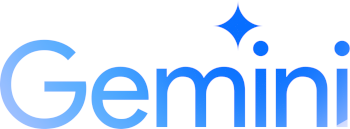

Gemini a is new model family released by [Google DeepMind](https://deepmind.google/technologies/gemini/) for reasoning seamlessly across text, images, video, audio, and code. Models currently ouput text or code. They are still in preview mode and a pre-GA product.

Multimodal inputs are composed of several parts which can have different MIME types.

Two models are currently available:
- **gemini-pro**: only textual parts are supported
- **gemini-pro-vision**: textual parts and up to 16 images or 1 video (of maximum 2 minutes)

They are also embedding models:
- **textembedding-gecko**: for text embeddings only with 768-dimension vectors
- **multimodalembedding**: for embeddings combining image and text with 1408-dimension vectors

So let's begin without vision and the **gemini-pro** model. We use a textual and a code parts.

In [11]:
fetch("https://us-central1-aiplatform.googleapis.com/v1/projects/fra-ai-testing-noprod/locations/europe-west1-b/publishers/google/models/gemini-pro:streamGenerateContent", {
  method: 'POST',
  headers: { "Authorization": "Bearer " + process.env.GOOGLE_ACCESS_TOKEN },
  body: JSON.stringify({
    "contents": {
        "role": "user",
        "parts": { "text": "for(var i=10;", "text": "Write a Javascript function to count down to 1" }
    },
    "generation_config": {
        "temperature": 0.9,
        "topP": 1.0,
        "maxOutputTokens": 2048
    }
  })
})
  .then((response) => response.json())
  .then((json) => console.log(json[0].candidates[0].content));

Promise { <pending> }

{
  role: 'model',
  parts: [ { text: '```javascript\nfunction countdown(n) {\n  if (n < ' } ]
}


The API returns a stream but here I only get and display the first chunk.

Ok let's go more visual with **gemini-pro-vision**!

In [12]:
fetch("https://us-central1-aiplatform.googleapis.com/v1/projects/fra-ai-testing-noprod/locations/europe-west1-b/publishers/google/models/gemini-pro-vision:streamGenerateContent", {
  method: 'POST',
  headers: { "Authorization": "Bearer " + process.env.GOOGLE_ACCESS_TOKEN },
  body: JSON.stringify({
    "contents": {
        "role": "user",
        "parts": [ 
          { "inlineData": { "mimeType": "image/jpeg", "data": imgbase64 } },
          { "text": "Give instructions to take the yoga pose shown in the picture" }
        ]
    },
    "generation_config": {
        "temperature": 0.9,
        "topP": 1.0,
        "maxOutputTokens": 2048
    }
  })
})
  .then((response) => response.json())
  .then((json) => console.log(json[0].candidates[0].content));

Promise { <pending> }

{
  role: 'model',
  parts: [
    {
      text: ' To take the yoga pose shown in the picture, first sit on the floor with your legs extended in front of you. Then, bend your right leg and'
    }
  ]
}


On the other way around let's say I want to get the **multimodal embedding** of the image with my own instructions.

In [13]:
fetch("https://us-central1-aiplatform.googleapis.com/v1/projects/fra-ai-testing-noprod/locations/europe-west1-b/publishers/google/models/multimodalembedding:predict", {
  method: 'POST',
  headers: { "Authorization": "Bearer " + process.env.GOOGLE_ACCESS_TOKEN },
  body: JSON.stringify({
    "instances": {
        "text": "Instruction for this pose: sit cross-legged, straighthen your spine, inhale slowly while raising you arms to the ceiling, palms facing each other",
        "image": { "bytesBase64Encoded": imgbase64 }
    }
  })
})
  .then((response) => response.json())
  .then((json) => console.log(json.predictions[0]));

Promise { <pending> }

{
  textEmbedding: [
     -0.00447330531,  0.000845476461,    0.0259477571,   0.00152088422,
     -0.00712243654,   -0.0380525589,    0.0405327044,   0.00304073445,
       0.0141994562,    0.0116239805,   0.00697266543,   -0.0173647739,
     -0.00210742746,    0.0204725601,   -0.0350144878,  -0.00964311883,
     -0.00258815638,   0.00773168541,    0.0284317397,    0.0293855872,
       0.0269038975,  0.000798309629,    0.0249484032,   -0.0120837241,
      0.00765866926,    0.0242304094,     0.013370024,    0.0331882164,
       0.0269777011,   -0.0237915311,    0.0269119069,   0.00286096428,
       0.0137129119,     0.018362077,   -0.0113142086,   -0.0106179295,
      -0.0132519538,   0.00906665158,    0.0109949131, -0.000837399275,
      0.00118377327,   0.00533142546,   -0.0340799466,   -0.0144593827,
       0.0152222561,   0.00906560384,    0.0160250645,    0.0115363915,
     -0.00723531237,       0.0165272,  -0.00092842005,   -0.0191055574,
    -0.000852690951,   0.00683636405,    0.

The response is a combination of two associated embeddings vectors, on for the text and the other for the image.

This allow to imagine many usages like image classification, search or recommendations As said earlier the video format is also supported but we'll stop the tutorial for now.

## Thank you!